In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
from scipy import stats

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [5]:
df1 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_ph_sphs.csv', index_col=0)
df2 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_ph_sphs.csv', index_col=0)
df1 = df1.drop(['4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'],axis=1)
df1['hr_sin'] = np.sin(df1['hour of day']*(2.*np.pi/24))
df1['hr_cos'] = np.cos(df1['hour of day']*(2.*np.pi/24))
print(df1.shape)
df1.head(5)

(15763, 11)


travel time   distance  hour of day    1st ranked    2nd ranked  \
0         1163  21671.733           18       primary       service   
1          347   2047.629           21       service  unclassified   
2          720  10175.882           19       primary  unclassified   
3          355   2337.951           16  unclassified       service   
4          356   3083.625           17   residential  unclassified   

    3rd ranked  1st dist  2nd dist  3rd dist    hr_sin        hr_cos  
0  residential  0.942077  0.038438  0.019485 -1.000000 -1.836970e-16  
1  residential  0.329781  0.247697  0.233717 -0.707107  7.071068e-01  
2     tertiary  0.848450  0.070327  0.036221 -0.965926  2.588190e-01  
3      primary  0.458768  0.292752  0.165359 -0.866025 -5.000000e-01  
4      service  0.351629  0.270712  0.208898 -0.965926 -2.588190e-01

In [6]:
print(df2.shape)
df2.head(5)

(15763, 19)


travel time   distance  hour of day  living_street  motorway  \
0         1163  21671.733           18            0.0       0.0   
1          347   2047.629           21            0.0       0.0   
2          720  10175.882           19            0.0       0.0   
3          355   2337.951           16            0.0       0.0   
4          356   3083.625           17            0.0       0.0   

   motorway_link    primary  primary_link  residential  road  secondary  \
0            0.0  20416.446         0.000      422.271   0.0        0.0   
1            0.0    386.602         0.000      478.566   0.0        0.0   
2            0.0   8633.723         0.000      179.300   0.0        0.0   
3            0.0    386.602         0.000      194.331   0.0        0.0   
4            0.0    291.863       228.532     1084.292   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0  833.016     0.000    0.0    0.0         0.0         0.000   
1             0.0  675.270     0.000    0.0    0.0         0.0       507.191   
2             0.0  278.634   368.584    0.0    0.0         0.0       715.641   
3             0.0  684.440     0.000    0.0    0.0         0.0      1072.578   
4             0.0  644.164     0.000    0.0    0.0         0.0       834.774   

   others  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [7]:
# df0 = pd.merge(df1,df2, on=['travel time','distance','hour of day'])
# df0.shape
# df0

In [9]:
df3 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\dijk_distance\\tripdf_ph_sphs.csv', index_col=0)
print(df3.shape)
df3.head()

(15633, 6)


travel time  hour of day   distance   est_dist  similarity  similarity_dijk
0         1163           18  21671.733  20073.456    0.810945         0.895604
1          347           21   2047.629   1580.690    0.791667         0.863636
2          720           19  10175.882   9638.610    0.681159         0.758065
3          355           16   2337.951   2967.050    0.406250         0.309524
4          356           17   3083.625   3980.025    0.387755         0.452381

In [10]:
df1 = pd.merge(df3,df1, on = ['travel time','distance','hour of day'])
df2 = pd.merge(df3,df2, on = ['travel time','distance','hour of day'])
df2

travel time  hour of day   distance   est_dist  similarity  \
0             1163           18  21671.733  20073.456    0.810945   
1              347           21   2047.629   1580.690    0.791667   
2              720           19  10175.882   9638.610    0.681159   
3              355           16   2337.951   2967.050    0.406250   
4              356           17   3083.625   3980.025    0.387755   
...            ...          ...        ...        ...         ...   
15628         1649           21  24589.872  24452.640    0.771654   
15629         1385            1  22240.005  21654.960    0.809160   
15630         1217            2  22198.850  21917.507    0.796460   
15631         1189           22  22353.817  21695.570    0.794643   
15632         1112            6  14764.019  12441.354    0.788732   

       similarity_dijk  living_street  motorway  motorway_link    primary  \
0             0.895604            0.0       0.0            0.0  20416.446   
1             0.863636            0.0       0.0            0.0    386.602   
2             0.758065            0.0       0.0            0.0   8633.723   
3             0.309524            0.0       0.0            0.0    386.602   
4             0.452381            0.0       0.0            0.0    291.863   
...                ...            ...       ...            ...        ...   
15628         0.748092            0.0       0.0            0.0  20475.622   
15629         0.828125            0.0       0.0            0.0  15143.198   
15630         0.841121            0.0       0.0            0.0  20475.622   
15631         0.824074            0.0       0.0            0.0  20475.622   
15632         0.788732            0.0       0.0            0.0  13722.194   

       ...  road  secondary  secondary_link  service  tertiary  track  trunk  \
0      ...   0.0      0.000             0.0  833.016     0.000    0.0    0.0   
1      ...   0.0      0.000             0.0  675.270     0.000    0.0    0.0   
2      ...   0.0      0.000             0.0  278.634   368.584    0.0    0.0   
3      ...   0.0      0.000             0.0  684.440     0.000    0.0    0.0   
4      ...   0.0      0.000             0.0  644.164     0.000    0.0    0.0   
...    ...   ...        ...             ...      ...       ...    ...    ...   
15628  ...   0.0   1674.394             0.0    0.000   903.493    0.0    0.0   
15629  ...   0.0   1266.655             0.0  100.130  5431.190    0.0    0.0   
15630  ...   0.0   1491.485             0.0    0.000   179.465    0.0    0.0   
15631  ...   0.0   1674.394             0.0    0.000   179.465    0.0    0.0   
15632  ...   0.0   1041.825             0.0    0.000     0.000    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0         0.000     0.0  
1             0.0       507.191     0.0  
2             0.0       715.641     0.0  
3             0.0      1072.578     0.0  
4             0.0       834.774     0.0  
...           ...           ...     ...  
15628         0.0         0.000     0.0  
15629         0.0         0.000     0.0  
15630         0.0         0.000     0.0  
15631         0.0         0.000     0.0  
15632         0.0         0.000     0.0  

[15633 rows x 22 columns]

In [200]:
# # category reduction
# option = ['residential','tertiary','primary']
# df_merged.loc[~df_merged['1st ranked'].isin(option),'1st ranked'] = 'others1'
# option = ['residential','tertiary','secondary','not']
# df_merged.loc[~df_merged['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# option = ['residential','tertiary','not']
# df_merged.loc[~df_merged['3rd ranked'].isin(option),'3rd ranked'] = 'others3'

In [201]:
# # feature (mean) encoding
# te = TargetEncoder()
# df_merged['1st ranked'] = te.fit_transform(df_merged['1st ranked'],df_merged['travel time'])
# df_merged['2nd ranked'] = te.fit_transform(df_merged['2nd ranked'],df_merged['travel time'])
# df_merged['3rd ranked'] = te.fit_transform(df_merged['3rd ranked'],df_merged['travel time'])
# print(df_merged.shape)
# df_merged.iloc[1:5,2:]


In [11]:
# outlier removal
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1['distance'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['distance'])) < 3)]
df1

travel time  hour of day   distance   est_dist  similarity  \
0             1163           18  21671.733  20073.456    0.810945   
1              347           21   2047.629   1580.690    0.791667   
2              720           19  10175.882   9638.610    0.681159   
3              355           16   2337.951   2967.050    0.406250   
4              356           17   3083.625   3980.025    0.387755   
...            ...          ...        ...        ...         ...   
15628         1649           21  24589.872  24452.640    0.771654   
15629         1385            1  22240.005  21654.960    0.809160   
15630         1217            2  22198.850  21917.507    0.796460   
15631         1189           22  22353.817  21695.570    0.794643   
15632         1112            6  14764.019  12441.354    0.788732   

       similarity_dijk    1st ranked    2nd ranked   3rd ranked  1st dist  \
0             0.895604       primary       service  residential  0.942077   
1             0.863636       service  unclassified  residential  0.329781   
2             0.758065       primary  unclassified     tertiary  0.848450   
3             0.309524  unclassified       service      primary  0.458768   
4             0.452381   residential  unclassified      service  0.351629   
...                ...           ...           ...          ...       ...   
15628         0.748092       primary     secondary  residential  0.832685   
15629         0.828125       primary      tertiary    secondary  0.680899   
15630         0.841121       primary     secondary     tertiary  0.922373   
15631         0.824074       primary     secondary     tertiary  0.915979   
15632         0.788732       primary     secondary          NaN  0.929435   

       2nd dist  3rd dist    hr_sin        hr_cos  
0      0.038438  0.019485 -1.000000 -1.836970e-16  
1      0.247697  0.233717 -0.707107  7.071068e-01  
2      0.070327  0.036221 -0.965926  2.588190e-01  
3      0.292752  0.165359 -0.866025 -5.000000e-01  
4      0.270712  0.208898 -0.965926 -2.588190e-01  
...         ...       ...       ...           ...  
15628  0.068093  0.062480 -0.707107  7.071068e-01  
15629  0.244208  0.056954  0.258819  9.659258e-01  
15630  0.067187  0.008084  0.500000  8.660254e-01  
15631  0.074904  0.008028 -0.500000  8.660254e-01  
15632  0.070565       NaN  1.000000  6.123234e-17  

[15599 rows x 14 columns]

In [203]:
# # standardization
# from sklearn import preprocessing
# min_max = preprocessing.MinMaxScaler()
# scaled_df = min_max.fit_transform(df_merged.iloc[:,2:3].values)
# df = pd.DataFrame(scaled_df,columns=df_merged.columns[2:3])

In [12]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df1['distance']-df1['distance'].min())/(df1['distance'].max()-df1['distance'].min())
normalized_distance22=(df2['distance']-df2['distance'].min())/(df2['distance'].max()-df2['distance'].min())

normalized_distance3=(df1['est_dist']-df1['est_dist'].min())/(df1['est_dist'].max()-df1['est_dist'].min())
normalized_distance33=(df2['est_dist']-df2['est_dist'].min())/(df2['est_dist'].max()-df2['est_dist'].min())

In [13]:
df1['distance'] = normalized_distance2
df2['distance'] = normalized_distance22

df1['est_dist'] = normalized_distance3
df2['est_dist'] = normalized_distance33

display(df1.head(2))
display(df2.head(2))

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   

  1st ranked    2nd ranked   3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary       service  residential  0.942077  0.038438  0.019485   
1    service  unclassified  residential  0.329781  0.247697  0.233717   

     hr_sin        hr_cos  
0 -1.000000 -1.836970e-16  
1 -0.707107  7.071068e-01

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   

   living_street  motorway  motorway_link    primary  ...  road  secondary  \
0            0.0       0.0            0.0  20416.446  ...   0.0        0.0   
1            0.0       0.0            0.0    386.602  ...   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0  833.016       0.0    0.0    0.0         0.0         0.000   
1             0.0  675.270       0.0    0.0    0.0         0.0       507.191   

   others  
0     0.0  
1     0.0  

[2 rows x 22 columns]

# NN-based modeling

In [14]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [15]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [16]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [17]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [18]:
my_df = df1[['travel time','est_dist']]
my_df.head(3)

travel time  est_dist
0         1163  0.297385
1          347  0.023418
2          720  0.142794

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

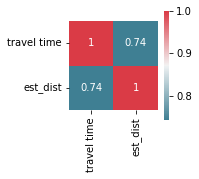

In [19]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [20]:
x = np.array(df1[['est_dist']])
y = np.array(df1['travel time'])
# x

In [21]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 1)
(3120, 1)


In [23]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
390/390 [==============================] - 1s 861us/step - loss: 1314961.8750 - mape: 99.9231 - rmse: 1146.7179 - val_loss: 1279829.7500 - val_mape: 99.8230 - val_rmse: 1131.2957
Epoch 2/500
390/390 [==============================] - 0s 673us/step - loss: 1310273.2500 - mape: 99.6244 - rmse: 1144.6716 - val_loss: 1273121.5000 - val_mape: 99.3920 - val_rmse: 1128.3269
Epoch 3/500
390/390 [==============================] - 0s 741us/step - loss: 1301850.7500 - mape: 99.0846 - rmse: 1140.9867 - val_loss: 1263271.6250 - val_mape: 98.7557 - val_rmse: 1123.9536
Epoch 4/500
390/390 [==============================] - 0s 687us/step - loss: 1290536.5000 - mape: 98.3557 - rmse: 1136.0178 - val_loss: 1250782.0000 - val_mape: 97.9440 - val_rmse: 1118.3837
Epoch 5/500
390/390 [==============================] - 0s 744us/step - loss: 1276681.3750 - mape: 97.4632 - rmse: 1129.9032 - val_loss: 1235923.8750 - val_mape: 96.9719 - val_rmse: 1111.7212
Epoch 6/500
390/390 [========================

390/390 [==============================] - 0s 723us/step - loss: 274062.2812 - mape: 47.8823 - rmse: 523.5096 - val_loss: 251728.5938 - val_mape: 47.0845 - val_rmse: 501.7256
Epoch 45/500
390/390 [==============================] - 0s 685us/step - loss: 262397.5625 - mape: 48.8349 - rmse: 512.2476 - val_loss: 241359.2969 - val_mape: 48.0957 - val_rmse: 491.2833
Epoch 46/500
390/390 [==============================] - 0s 710us/step - loss: 252318.2344 - mape: 49.9582 - rmse: 502.3129 - val_loss: 232530.3750 - val_mape: 49.1665 - val_rmse: 482.2140
Epoch 47/500
390/390 [==============================] - 0s 719us/step - loss: 243780.2031 - mape: 51.0727 - rmse: 493.7410 - val_loss: 225202.9375 - val_mape: 50.2575 - val_rmse: 474.5555
Epoch 48/500
390/390 [==============================] - 0s 735us/step - loss: 236678.8281 - mape: 52.2551 - rmse: 486.4965 - val_loss: 219243.7812 - val_mape: 51.3468 - val_rmse: 468.2347
Epoch 49/500
390/390 [==============================] - 0s 660us/step - l

Epoch 88/500
390/390 [==============================] - 0s 700us/step - loss: 177439.5312 - mape: 53.2081 - rmse: 421.2357 - val_loss: 165191.9844 - val_mape: 51.8555 - val_rmse: 406.4382
Epoch 89/500
390/390 [==============================] - 0s 677us/step - loss: 176388.2656 - mape: 53.0031 - rmse: 419.9860 - val_loss: 164150.9531 - val_mape: 51.6364 - val_rmse: 405.1555
Epoch 90/500
390/390 [==============================] - 0s 710us/step - loss: 175334.4531 - mape: 52.7706 - rmse: 418.7296 - val_loss: 163123.4844 - val_mape: 51.4473 - val_rmse: 403.8855
Epoch 91/500
390/390 [==============================] - 0s 694us/step - loss: 174290.1094 - mape: 52.5740 - rmse: 417.4807 - val_loss: 162105.4062 - val_mape: 51.2613 - val_rmse: 402.6232
Epoch 92/500
390/390 [==============================] - 0s 689us/step - loss: 173248.6094 - mape: 52.3444 - rmse: 416.2314 - val_loss: 161079.5469 - val_mape: 51.0169 - val_rmse: 401.3472
Epoch 93/500
390/390 [==============================] - 0s 6

390/390 [==============================] - 0s 668us/step - loss: 142711.2656 - mape: 43.9078 - rmse: 377.7715 - val_loss: 131756.8906 - val_mape: 43.1322 - val_rmse: 362.9833
Epoch 132/500
390/390 [==============================] - 0s 677us/step - loss: 142252.1094 - mape: 43.8581 - rmse: 377.1632 - val_loss: 131325.0312 - val_mape: 42.9231 - val_rmse: 362.3880
Epoch 133/500
390/390 [==============================] - 0s 691us/step - loss: 141806.3750 - mape: 43.6238 - rmse: 376.5719 - val_loss: 130913.1562 - val_mape: 42.7431 - val_rmse: 361.8192
Epoch 134/500
390/390 [==============================] - 0s 699us/step - loss: 141376.3438 - mape: 43.4097 - rmse: 376.0005 - val_loss: 130513.0703 - val_mape: 42.5602 - val_rmse: 361.2659
Epoch 135/500
390/390 [==============================] - 0s 714us/step - loss: 140955.4062 - mape: 43.1963 - rmse: 375.4403 - val_loss: 130131.8672 - val_mape: 42.4228 - val_rmse: 360.7379
Epoch 136/500
390/390 [==============================] - 0s 683us/ste

390/390 [==============================] - 0s 669us/step - loss: 133960.4531 - mape: 38.6552 - rmse: 366.0061 - val_loss: 124097.1094 - val_mape: 38.0012 - val_rmse: 352.2742
Epoch 175/500
390/390 [==============================] - 0s 697us/step - loss: 133915.9062 - mape: 38.5260 - rmse: 365.9452 - val_loss: 124073.9922 - val_mape: 37.9691 - val_rmse: 352.2414
Epoch 176/500
390/390 [==============================] - 0s 736us/step - loss: 133876.5156 - mape: 38.4974 - rmse: 365.8914 - val_loss: 124050.3906 - val_mape: 37.9284 - val_rmse: 352.2079
Epoch 177/500
390/390 [==============================] - 0s 697us/step - loss: 133837.5625 - mape: 38.4770 - rmse: 365.8382 - val_loss: 124015.7344 - val_mape: 37.8336 - val_rmse: 352.1587
Epoch 178/500
390/390 [==============================] - 0s 717us/step - loss: 133801.7500 - mape: 38.3669 - rmse: 365.7892 - val_loss: 123987.2188 - val_mape: 37.7563 - val_rmse: 352.1182
Epoch 179/500
390/390 [==============================] - 0s 711us/ste

390/390 [==============================] - 0s 730us/step - loss: 133345.9062 - mape: 37.2281 - rmse: 365.1656 - val_loss: 123802.9844 - val_mape: 36.7239 - val_rmse: 351.8565
Epoch 218/500
390/390 [==============================] - 0s 734us/step - loss: 133345.7344 - mape: 37.1603 - rmse: 365.1653 - val_loss: 123807.7500 - val_mape: 36.7265 - val_rmse: 351.8633
Epoch 219/500
390/390 [==============================] - 0s 768us/step - loss: 133342.4844 - mape: 37.1852 - rmse: 365.1609 - val_loss: 123813.2109 - val_mape: 36.7320 - val_rmse: 351.8710
Epoch 220/500
390/390 [==============================] - 0s 698us/step - loss: 133341.0156 - mape: 37.1282 - rmse: 365.1589 - val_loss: 123812.6641 - val_mape: 36.7164 - val_rmse: 351.8702
Epoch 221/500
390/390 [==============================] - 0s 733us/step - loss: 133341.2656 - mape: 37.2501 - rmse: 365.1592 - val_loss: 123808.5859 - val_mape: 36.6828 - val_rmse: 351.8644
Epoch 222/500
390/390 [==============================] - 0s 736us/ste

390/390 [==============================] - 0s 731us/step - loss: 133323.0625 - mape: 36.9103 - rmse: 365.1343 - val_loss: 123842.1016 - val_mape: 36.4622 - val_rmse: 351.9121
Epoch 261/500
390/390 [==============================] - 0s 712us/step - loss: 133318.7969 - mape: 36.9618 - rmse: 365.1285 - val_loss: 123842.0938 - val_mape: 36.4584 - val_rmse: 351.9120
Epoch 262/500
390/390 [==============================] - 0s 731us/step - loss: 133319.2344 - mape: 36.9391 - rmse: 365.1291 - val_loss: 123838.9062 - val_mape: 36.4420 - val_rmse: 351.9075
Epoch 263/500
390/390 [==============================] - 0s 724us/step - loss: 133320.0781 - mape: 36.8927 - rmse: 365.1302 - val_loss: 123844.3984 - val_mape: 36.4599 - val_rmse: 351.9153
Epoch 264/500
390/390 [==============================] - 0s 725us/step - loss: 133319.2188 - mape: 36.8726 - rmse: 365.1291 - val_loss: 123847.5391 - val_mape: 36.4653 - val_rmse: 351.9198
Epoch 265/500
390/390 [==============================] - 0s 725us/ste

390/390 [==============================] - 0s 703us/step - loss: 133319.7969 - mape: 36.8116 - rmse: 365.1298 - val_loss: 123851.1094 - val_mape: 36.3993 - val_rmse: 351.9249
Epoch 304/500
390/390 [==============================] - 0s 763us/step - loss: 133319.0781 - mape: 36.8432 - rmse: 365.1288 - val_loss: 123856.5312 - val_mape: 36.4180 - val_rmse: 351.9326
Epoch 305/500
390/390 [==============================] - 0s 735us/step - loss: 133320.6094 - mape: 36.8829 - rmse: 365.1310 - val_loss: 123856.2266 - val_mape: 36.4138 - val_rmse: 351.9321
Epoch 306/500
390/390 [==============================] - 0s 726us/step - loss: 133319.4062 - mape: 36.9204 - rmse: 365.1293 - val_loss: 123848.5859 - val_mape: 36.3854 - val_rmse: 351.9213
Epoch 307/500
390/390 [==============================] - 0s 728us/step - loss: 133319.4531 - mape: 36.8546 - rmse: 365.1294 - val_loss: 123844.2266 - val_mape: 36.3672 - val_rmse: 351.9151
Epoch 308/500
390/390 [==============================] - 0s 731us/ste

390/390 [==============================] - 0s 740us/step - loss: 133318.7031 - mape: 36.8999 - rmse: 365.1283 - val_loss: 123851.1406 - val_mape: 36.3760 - val_rmse: 351.9249
Epoch 347/500
390/390 [==============================] - 0s 759us/step - loss: 133319.1094 - mape: 36.8719 - rmse: 365.1289 - val_loss: 123846.8906 - val_mape: 36.3614 - val_rmse: 351.9189
Epoch 348/500
390/390 [==============================] - 0s 702us/step - loss: 133322.2500 - mape: 36.8954 - rmse: 365.1332 - val_loss: 123843.1484 - val_mape: 36.3434 - val_rmse: 351.9135
Epoch 349/500
390/390 [==============================] - 0s 667us/step - loss: 133319.9375 - mape: 36.7788 - rmse: 365.1300 - val_loss: 123858.2500 - val_mape: 36.4064 - val_rmse: 351.9350
Epoch 350/500
390/390 [==============================] - 0s 713us/step - loss: 133319.1094 - mape: 36.8448 - rmse: 365.1289 - val_loss: 123855.1484 - val_mape: 36.3956 - val_rmse: 351.9306
Epoch 351/500
390/390 [==============================] - 0s 732us/ste

390/390 [==============================] - 0s 686us/step - loss: 133319.6250 - mape: 36.8206 - rmse: 365.1296 - val_loss: 123856.2188 - val_mape: 36.3989 - val_rmse: 351.9321
Epoch 390/500
390/390 [==============================] - 0s 694us/step - loss: 133320.4688 - mape: 36.8694 - rmse: 365.1308 - val_loss: 123855.6953 - val_mape: 36.3925 - val_rmse: 351.9314
Epoch 391/500
390/390 [==============================] - 0s 664us/step - loss: 133321.5312 - mape: 36.8689 - rmse: 365.1322 - val_loss: 123849.0156 - val_mape: 36.3615 - val_rmse: 351.9219
Epoch 392/500
390/390 [==============================] - 0s 727us/step - loss: 133318.8281 - mape: 36.8455 - rmse: 365.1285 - val_loss: 123854.7812 - val_mape: 36.3874 - val_rmse: 351.9301
Epoch 393/500
390/390 [==============================] - 0s 651us/step - loss: 133320.7812 - mape: 36.8901 - rmse: 365.1312 - val_loss: 123850.9531 - val_mape: 36.3729 - val_rmse: 351.9247
Epoch 394/500
390/390 [==============================] - 0s 680us/ste

390/390 [==============================] - 0s 748us/step - loss: 133321.3125 - mape: 36.8522 - rmse: 365.1319 - val_loss: 123864.8281 - val_mape: 36.4275 - val_rmse: 351.9444
Epoch 433/500
390/390 [==============================] - 0s 713us/step - loss: 133322.1562 - mape: 36.8252 - rmse: 365.1331 - val_loss: 123854.7656 - val_mape: 36.3876 - val_rmse: 351.9301
Epoch 434/500
390/390 [==============================] - 0s 718us/step - loss: 133321.2188 - mape: 36.9027 - rmse: 365.1318 - val_loss: 123862.3594 - val_mape: 36.4175 - val_rmse: 351.9409
Epoch 435/500
390/390 [==============================] - 0s 731us/step - loss: 133319.7344 - mape: 36.8578 - rmse: 365.1298 - val_loss: 123860.4688 - val_mape: 36.4079 - val_rmse: 351.9382
Epoch 436/500
390/390 [==============================] - 0s 696us/step - loss: 133322.6406 - mape: 36.8555 - rmse: 365.1337 - val_loss: 123864.8125 - val_mape: 36.4279 - val_rmse: 351.9443
Epoch 437/500
390/390 [==============================] - 0s 701us/ste

390/390 [==============================] - 0s 721us/step - loss: 133319.7656 - mape: 36.9344 - rmse: 365.1298 - val_loss: 123844.0625 - val_mape: 36.3436 - val_rmse: 351.9149
Epoch 476/500
390/390 [==============================] - 0s 688us/step - loss: 133319.7344 - mape: 36.8090 - rmse: 365.1298 - val_loss: 123853.6328 - val_mape: 36.3852 - val_rmse: 351.9284
Epoch 477/500
390/390 [==============================] - 0s 671us/step - loss: 133319.2812 - mape: 36.8114 - rmse: 365.1291 - val_loss: 123858.4688 - val_mape: 36.4050 - val_rmse: 351.9353
Epoch 478/500
390/390 [==============================] - 0s 737us/step - loss: 133321.3594 - mape: 36.8258 - rmse: 365.1320 - val_loss: 123869.2031 - val_mape: 36.4461 - val_rmse: 351.9506
Epoch 479/500
390/390 [==============================] - 0s 736us/step - loss: 133320.8750 - mape: 36.8902 - rmse: 365.1313 - val_loss: 123855.4062 - val_mape: 36.3879 - val_rmse: 351.9310
Epoch 480/500
390/390 [==============================] - 0s 737us/ste

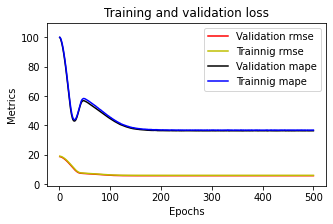

In [26]:
plotme(model1_1)

In [24]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
390/390 [==============================] - 0s 889us/step - loss: 1312738.8750 - mape: 99.7958 - rmse: 1145.7482 - val_loss: 1274587.3750 - val_mape: 99.5037 - val_rmse: 1128.9762
Epoch 2/500
390/390 [==============================] - 0s 723us/step - loss: 1300028.3750 - mape: 98.9932 - rmse: 1140.1879 - val_loss: 1257040.6250 - val_mape: 98.3796 - val_rmse: 1121.1782
Epoch 3/500
390/390 [==============================] - 0s 716us/step - loss: 1277632.1250 - mape: 97.5598 - rmse: 1130.3239 - val_loss: 1230489.1250 - val_mape: 96.6544 - val_rmse: 1109.2742
Epoch 4/500
390/390 [==============================] - 0s 722us/step - loss: 1246871.3750 - mape: 95.5547 - rmse: 1116.6339 - val_loss: 1196428.6250 - val_mape: 94.4044 - val_rmse: 1093.8138
Epoch 5/500
390/390 [==============================] - 0s 717us/step - loss: 1209200.6250 - mape: 93.0476 - rmse: 1099.6366 - val_loss: 1156159.3750 - val_mape: 91.6912 - val_rmse: 1075.2485
Epoch 6/500
390/390 [========================

390/390 [==============================] - 0s 744us/step - loss: 189627.0312 - mape: 55.6683 - rmse: 435.4619 - val_loss: 176775.6875 - val_mape: 54.0403 - val_rmse: 420.4470
Epoch 45/500
390/390 [==============================] - 0s 716us/step - loss: 187704.8594 - mape: 55.1712 - rmse: 433.2492 - val_loss: 174880.1094 - val_mape: 53.6711 - val_rmse: 418.1867
Epoch 46/500
390/390 [==============================] - 0s 686us/step - loss: 185791.3125 - mape: 54.8829 - rmse: 431.0352 - val_loss: 172977.8281 - val_mape: 53.3009 - val_rmse: 415.9060
Epoch 47/500
390/390 [==============================] - 0s 683us/step - loss: 183880.1719 - mape: 54.4589 - rmse: 428.8125 - val_loss: 171113.3125 - val_mape: 52.9859 - val_rmse: 413.6584
Epoch 48/500
390/390 [==============================] - 0s 748us/step - loss: 181998.6719 - mape: 54.1036 - rmse: 426.6130 - val_loss: 169266.2500 - val_mape: 52.6391 - val_rmse: 411.4198
Epoch 49/500
390/390 [==============================] - 0s 695us/step - l

Epoch 88/500
390/390 [==============================] - 0s 715us/step - loss: 136162.6094 - mape: 40.6052 - rmse: 369.0022 - val_loss: 125813.5625 - val_mape: 39.9348 - val_rmse: 354.7021
Epoch 89/500
390/390 [==============================] - 0s 694us/step - loss: 135875.2500 - mape: 40.4619 - rmse: 368.6126 - val_loss: 125576.9922 - val_mape: 39.7580 - val_rmse: 354.3684
Epoch 90/500
390/390 [==============================] - 0s 719us/step - loss: 135605.0469 - mape: 40.2298 - rmse: 368.2459 - val_loss: 125347.3047 - val_mape: 39.5252 - val_rmse: 354.0442
Epoch 91/500
390/390 [==============================] - 0s 712us/step - loss: 135365.2812 - mape: 40.0909 - rmse: 367.9202 - val_loss: 125141.3984 - val_mape: 39.3128 - val_rmse: 353.7533
Epoch 92/500
390/390 [==============================] - 0s 733us/step - loss: 135145.9844 - mape: 39.9183 - rmse: 367.6221 - val_loss: 124960.0859 - val_mape: 39.1158 - val_rmse: 353.4969
Epoch 93/500
390/390 [==============================] - 0s 6

390/390 [==============================] - 0s 765us/step - loss: 133337.4531 - mape: 37.1331 - rmse: 365.1540 - val_loss: 123793.7266 - val_mape: 36.5385 - val_rmse: 351.8433
Epoch 132/500
390/390 [==============================] - 0s 727us/step - loss: 133340.2656 - mape: 37.0509 - rmse: 365.1579 - val_loss: 123811.6484 - val_mape: 36.5930 - val_rmse: 351.8688
Epoch 133/500
390/390 [==============================] - 0s 794us/step - loss: 133337.2344 - mape: 37.0523 - rmse: 365.1537 - val_loss: 123811.4766 - val_mape: 36.5732 - val_rmse: 351.8686
Epoch 134/500
390/390 [==============================] - 0s 768us/step - loss: 133332.8125 - mape: 37.0323 - rmse: 365.1476 - val_loss: 123833.3828 - val_mape: 36.6399 - val_rmse: 351.8997
Epoch 135/500
390/390 [==============================] - 0s 806us/step - loss: 133336.3438 - mape: 37.0594 - rmse: 365.1525 - val_loss: 123827.6484 - val_mape: 36.5977 - val_rmse: 351.8915
Epoch 136/500
390/390 [==============================] - 0s 787us/ste

390/390 [==============================] - 0s 721us/step - loss: 133323.7188 - mape: 36.8234 - rmse: 365.1352 - val_loss: 123846.3594 - val_mape: 36.3818 - val_rmse: 351.9181
Epoch 175/500
390/390 [==============================] - 0s 709us/step - loss: 133324.2656 - mape: 36.8405 - rmse: 365.1360 - val_loss: 123855.2031 - val_mape: 36.4170 - val_rmse: 351.9307
Epoch 176/500
390/390 [==============================] - 0s 723us/step - loss: 133322.8594 - mape: 36.9002 - rmse: 365.1340 - val_loss: 123841.2812 - val_mape: 36.3539 - val_rmse: 351.9109
Epoch 177/500
390/390 [==============================] - 0s 696us/step - loss: 133323.9688 - mape: 36.8162 - rmse: 365.1356 - val_loss: 123852.0391 - val_mape: 36.3994 - val_rmse: 351.9262
Epoch 178/500
390/390 [==============================] - 0s 716us/step - loss: 133323.0000 - mape: 36.8851 - rmse: 365.1342 - val_loss: 123842.0938 - val_mape: 36.3540 - val_rmse: 351.9120
Epoch 179/500
390/390 [==============================] - 0s 736us/ste

390/390 [==============================] - 0s 672us/step - loss: 133328.3281 - mape: 36.8970 - rmse: 365.1415 - val_loss: 123867.8906 - val_mape: 36.4427 - val_rmse: 351.9487
Epoch 218/500
390/390 [==============================] - 0s 716us/step - loss: 133325.9688 - mape: 36.9663 - rmse: 365.1383 - val_loss: 123856.4141 - val_mape: 36.4011 - val_rmse: 351.9324
Epoch 219/500
390/390 [==============================] - 0s 709us/step - loss: 133322.1094 - mape: 36.8392 - rmse: 365.1330 - val_loss: 123856.9297 - val_mape: 36.3981 - val_rmse: 351.9331
Epoch 220/500
390/390 [==============================] - 0s 656us/step - loss: 133322.3438 - mape: 36.7621 - rmse: 365.1333 - val_loss: 123860.8750 - val_mape: 36.4170 - val_rmse: 351.9388
Epoch 221/500
390/390 [==============================] - 0s 699us/step - loss: 133322.5938 - mape: 36.8946 - rmse: 365.1337 - val_loss: 123868.2969 - val_mape: 36.4438 - val_rmse: 351.9493
Epoch 222/500
390/390 [==============================] - 0s 697us/ste

390/390 [==============================] - 0s 679us/step - loss: 133320.5938 - mape: 36.7316 - rmse: 365.1309 - val_loss: 123865.5078 - val_mape: 36.4261 - val_rmse: 351.9453
Epoch 261/500
390/390 [==============================] - 0s 720us/step - loss: 133329.0781 - mape: 36.9074 - rmse: 365.1425 - val_loss: 123863.3047 - val_mape: 36.4235 - val_rmse: 351.9422
Epoch 262/500
390/390 [==============================] - 0s 690us/step - loss: 133323.4688 - mape: 36.8789 - rmse: 365.1349 - val_loss: 123866.1875 - val_mape: 36.4294 - val_rmse: 351.9463
Epoch 263/500
390/390 [==============================] - 0s 736us/step - loss: 133323.5938 - mape: 36.9478 - rmse: 365.1350 - val_loss: 123831.2500 - val_mape: 36.2813 - val_rmse: 351.8966
Epoch 264/500
390/390 [==============================] - 0s 732us/step - loss: 133326.0000 - mape: 36.7988 - rmse: 365.1383 - val_loss: 123833.8125 - val_mape: 36.2920 - val_rmse: 351.9003
Epoch 265/500
390/390 [==============================] - 0s 678us/ste

390/390 [==============================] - 0s 739us/step - loss: 133320.0156 - mape: 36.9517 - rmse: 365.1301 - val_loss: 123842.3516 - val_mape: 36.3322 - val_rmse: 351.9124
Epoch 304/500
390/390 [==============================] - 0s 692us/step - loss: 133326.0938 - mape: 36.8488 - rmse: 365.1385 - val_loss: 123843.3516 - val_mape: 36.3312 - val_rmse: 351.9138
Epoch 305/500
390/390 [==============================] - 0s 672us/step - loss: 133323.8438 - mape: 36.7911 - rmse: 365.1354 - val_loss: 123846.3828 - val_mape: 36.3480 - val_rmse: 351.9182
Epoch 306/500
390/390 [==============================] - 0s 713us/step - loss: 133321.3125 - mape: 36.8249 - rmse: 365.1319 - val_loss: 123851.7344 - val_mape: 36.3720 - val_rmse: 351.9258
Epoch 307/500
390/390 [==============================] - 0s 734us/step - loss: 133323.1406 - mape: 36.8378 - rmse: 365.1344 - val_loss: 123848.4141 - val_mape: 36.3606 - val_rmse: 351.9210
Epoch 308/500
390/390 [==============================] - 0s 723us/ste

390/390 [==============================] - 0s 685us/step - loss: 133320.6562 - mape: 36.8940 - rmse: 365.1310 - val_loss: 123856.3203 - val_mape: 36.3941 - val_rmse: 351.9323
Epoch 347/500
390/390 [==============================] - 0s 750us/step - loss: 133323.0312 - mape: 36.8374 - rmse: 365.1343 - val_loss: 123849.8906 - val_mape: 36.3698 - val_rmse: 351.9231
Epoch 348/500
390/390 [==============================] - 0s 728us/step - loss: 133324.4844 - mape: 36.8459 - rmse: 365.1363 - val_loss: 123868.5000 - val_mape: 36.4410 - val_rmse: 351.9496
Epoch 349/500
390/390 [==============================] - 0s 734us/step - loss: 133323.8750 - mape: 36.8725 - rmse: 365.1354 - val_loss: 123855.6016 - val_mape: 36.3890 - val_rmse: 351.9312
Epoch 350/500
390/390 [==============================] - 0s 691us/step - loss: 133328.2969 - mape: 36.8490 - rmse: 365.1415 - val_loss: 123852.0859 - val_mape: 36.3789 - val_rmse: 351.9262
Epoch 351/500
390/390 [==============================] - 0s 707us/ste

390/390 [==============================] - 0s 697us/step - loss: 133324.1719 - mape: 36.8579 - rmse: 365.1358 - val_loss: 123859.5469 - val_mape: 36.4042 - val_rmse: 351.9369
Epoch 390/500
390/390 [==============================] - 0s 690us/step - loss: 133324.3906 - mape: 36.8948 - rmse: 365.1361 - val_loss: 123850.7578 - val_mape: 36.3737 - val_rmse: 351.9244
Epoch 391/500
390/390 [==============================] - 0s 703us/step - loss: 133317.4688 - mape: 36.7263 - rmse: 365.1266 - val_loss: 123875.6172 - val_mape: 36.4658 - val_rmse: 351.9597
Epoch 392/500
390/390 [==============================] - 0s 687us/step - loss: 133322.0625 - mape: 36.9056 - rmse: 365.1329 - val_loss: 123866.9922 - val_mape: 36.4340 - val_rmse: 351.9474
Epoch 393/500
390/390 [==============================] - 0s 712us/step - loss: 133325.3750 - mape: 36.9333 - rmse: 365.1375 - val_loss: 123860.7578 - val_mape: 36.4108 - val_rmse: 351.9386
Epoch 394/500
390/390 [==============================] - 0s 684us/ste

390/390 [==============================] - 0s 660us/step - loss: 133324.9844 - mape: 36.8471 - rmse: 365.1369 - val_loss: 123846.3828 - val_mape: 36.3520 - val_rmse: 351.9182
Epoch 433/500
390/390 [==============================] - 0s 702us/step - loss: 133328.9219 - mape: 36.8282 - rmse: 365.1423 - val_loss: 123847.2812 - val_mape: 36.3617 - val_rmse: 351.9194
Epoch 434/500
390/390 [==============================] - 0s 688us/step - loss: 133322.0000 - mape: 36.7995 - rmse: 365.1328 - val_loss: 123863.5469 - val_mape: 36.4233 - val_rmse: 351.9425
Epoch 435/500
390/390 [==============================] - 0s 686us/step - loss: 133323.7188 - mape: 36.8350 - rmse: 365.1352 - val_loss: 123873.6406 - val_mape: 36.4648 - val_rmse: 351.9569
Epoch 436/500
390/390 [==============================] - 0s 743us/step - loss: 133322.2500 - mape: 36.8609 - rmse: 365.1332 - val_loss: 123863.1094 - val_mape: 36.4252 - val_rmse: 351.9419
Epoch 437/500
390/390 [==============================] - 0s 728us/ste

390/390 [==============================] - 0s 699us/step - loss: 133325.4219 - mape: 36.8791 - rmse: 365.1375 - val_loss: 123855.2500 - val_mape: 36.3914 - val_rmse: 351.9308
Epoch 476/500
390/390 [==============================] - 0s 693us/step - loss: 133318.8438 - mape: 36.9329 - rmse: 365.1285 - val_loss: 123827.3984 - val_mape: 36.2614 - val_rmse: 351.8912
Epoch 477/500
390/390 [==============================] - 0s 700us/step - loss: 133321.4375 - mape: 36.7682 - rmse: 365.1321 - val_loss: 123858.4844 - val_mape: 36.3996 - val_rmse: 351.9353
Epoch 478/500
390/390 [==============================] - 0s 754us/step - loss: 133323.2656 - mape: 36.9034 - rmse: 365.1346 - val_loss: 123847.5781 - val_mape: 36.3559 - val_rmse: 351.9199
Epoch 479/500
390/390 [==============================] - 0s 723us/step - loss: 133323.3438 - mape: 36.8284 - rmse: 365.1347 - val_loss: 123842.9453 - val_mape: 36.3364 - val_rmse: 351.9133
Epoch 480/500
390/390 [==============================] - 0s 685us/ste

In [25]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
390/390 [==============================] - 1s 923us/step - loss: 1313930.6250 - mape: 99.8637 - rmse: 1146.2682 - val_loss: 1277211.6250 - val_mape: 99.6621 - val_rmse: 1130.1379
Epoch 2/500
390/390 [==============================] - 0s 729us/step - loss: 1304110.0000 - mape: 99.2411 - rmse: 1141.9763 - val_loss: 1262641.6250 - val_mape: 98.7284 - val_rmse: 1123.6732
Epoch 3/500
390/390 [==============================] - 0s 758us/step - loss: 1285313.5000 - mape: 98.0337 - rmse: 1133.7167 - val_loss: 1240285.3750 - val_mape: 97.2782 - val_rmse: 1113.6810
Epoch 4/500
390/390 [==============================] - 0s 722us/step - loss: 1259432.7500 - mape: 96.3488 - rmse: 1122.2445 - val_loss: 1211622.6250 - val_mape: 95.3930 - val_rmse: 1100.7373
Epoch 5/500
390/390 [==============================] - 0s 712us/step - loss: 1227618.1250 - mape: 94.2627 - rmse: 1107.9792 - val_loss: 1177570.2500 - val_mape: 93.1168 - val_rmse: 1085.1591
Epoch 6/500
390/390 [========================

390/390 [==============================] - 0s 731us/step - loss: 194673.7344 - mape: 56.4037 - rmse: 441.2185 - val_loss: 181779.9219 - val_mape: 54.9413 - val_rmse: 426.3566
Epoch 45/500
390/390 [==============================] - 0s 732us/step - loss: 192758.1562 - mape: 56.1266 - rmse: 439.0423 - val_loss: 179873.3281 - val_mape: 54.5806 - val_rmse: 424.1147
Epoch 46/500
390/390 [==============================] - 0s 750us/step - loss: 190837.6562 - mape: 55.8482 - rmse: 436.8497 - val_loss: 177972.8750 - val_mape: 54.2375 - val_rmse: 421.8683
Epoch 47/500
390/390 [==============================] - 0s 684us/step - loss: 188917.1250 - mape: 55.4975 - rmse: 434.6460 - val_loss: 176071.8906 - val_mape: 53.8535 - val_rmse: 419.6092
Epoch 48/500
390/390 [==============================] - 0s 685us/step - loss: 187003.3750 - mape: 54.9640 - rmse: 432.4389 - val_loss: 174196.0469 - val_mape: 53.5803 - val_rmse: 417.3680
Epoch 49/500
390/390 [==============================] - 0s 703us/step - l

Epoch 88/500
390/390 [==============================] - 0s 699us/step - loss: 136819.6875 - mape: 41.0503 - rmse: 369.8914 - val_loss: 126334.8125 - val_mape: 40.2379 - val_rmse: 355.4361
Epoch 89/500
390/390 [==============================] - 0s 731us/step - loss: 136453.6562 - mape: 40.7791 - rmse: 369.3963 - val_loss: 126064.3281 - val_mape: 40.1609 - val_rmse: 355.0554
Epoch 90/500
390/390 [==============================] - 0s 740us/step - loss: 136120.3438 - mape: 40.6704 - rmse: 368.9449 - val_loss: 125757.4766 - val_mape: 39.8467 - val_rmse: 354.6230
Epoch 91/500
390/390 [==============================] - 0s 710us/step - loss: 135820.3594 - mape: 40.2935 - rmse: 368.5381 - val_loss: 125528.1094 - val_mape: 39.7372 - val_rmse: 354.2995
Epoch 92/500
390/390 [==============================] - 0s 709us/step - loss: 135543.1406 - mape: 40.1579 - rmse: 368.1618 - val_loss: 125323.0938 - val_mape: 39.5951 - val_rmse: 354.0100
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 745us/step - loss: 133338.1094 - mape: 37.1064 - rmse: 365.1549 - val_loss: 123778.6016 - val_mape: 36.6171 - val_rmse: 351.8218
Epoch 132/500
390/390 [==============================] - 0s 672us/step - loss: 133339.7969 - mape: 37.0200 - rmse: 365.1572 - val_loss: 123796.5234 - val_mape: 36.6638 - val_rmse: 351.8473
Epoch 133/500
390/390 [==============================] - 0s 726us/step - loss: 133335.4844 - mape: 37.1744 - rmse: 365.1513 - val_loss: 123803.4219 - val_mape: 36.6677 - val_rmse: 351.8571
Epoch 134/500
390/390 [==============================] - 0s 760us/step - loss: 133333.2344 - mape: 37.0706 - rmse: 365.1482 - val_loss: 123807.6172 - val_mape: 36.6635 - val_rmse: 351.8631
Epoch 135/500
390/390 [==============================] - 0s 728us/step - loss: 133334.2969 - mape: 37.1736 - rmse: 365.1497 - val_loss: 123792.8750 - val_mape: 36.5871 - val_rmse: 351.8421
Epoch 136/500
390/390 [==============================] - 0s 720us/ste

390/390 [==============================] - 0s 720us/step - loss: 133329.9375 - mape: 36.9736 - rmse: 365.1437 - val_loss: 123831.1562 - val_mape: 36.4252 - val_rmse: 351.8965
Epoch 175/500
390/390 [==============================] - 0s 695us/step - loss: 133322.2188 - mape: 36.8573 - rmse: 365.1331 - val_loss: 123825.4453 - val_mape: 36.4009 - val_rmse: 351.8884
Epoch 176/500
390/390 [==============================] - 0s 754us/step - loss: 133323.2656 - mape: 36.8517 - rmse: 365.1346 - val_loss: 123838.9062 - val_mape: 36.4541 - val_rmse: 351.9075
Epoch 177/500
390/390 [==============================] - 0s 700us/step - loss: 133322.2188 - mape: 36.9667 - rmse: 365.1331 - val_loss: 123826.9219 - val_mape: 36.4011 - val_rmse: 351.8905
Epoch 178/500
390/390 [==============================] - 0s 727us/step - loss: 133322.9844 - mape: 36.8400 - rmse: 365.1342 - val_loss: 123820.3203 - val_mape: 36.3758 - val_rmse: 351.8811
Epoch 179/500
390/390 [==============================] - 0s 707us/ste

390/390 [==============================] - 0s 677us/step - loss: 133324.2500 - mape: 36.9394 - rmse: 365.1359 - val_loss: 123832.7578 - val_mape: 36.3877 - val_rmse: 351.8988
Epoch 218/500
390/390 [==============================] - 0s 701us/step - loss: 133325.1094 - mape: 36.8685 - rmse: 365.1371 - val_loss: 123826.5234 - val_mape: 36.3629 - val_rmse: 351.8899
Epoch 219/500
390/390 [==============================] - 0s 712us/step - loss: 133319.0000 - mape: 36.7771 - rmse: 365.1288 - val_loss: 123846.7578 - val_mape: 36.4473 - val_rmse: 351.9187
Epoch 220/500
390/390 [==============================] - 0s 691us/step - loss: 133324.5938 - mape: 36.9327 - rmse: 365.1364 - val_loss: 123846.9531 - val_mape: 36.4419 - val_rmse: 351.9189
Epoch 221/500
390/390 [==============================] - 0s 685us/step - loss: 133325.2344 - mape: 36.7986 - rmse: 365.1373 - val_loss: 123849.0938 - val_mape: 36.4491 - val_rmse: 351.9220
Epoch 222/500
390/390 [==============================] - 0s 685us/ste

390/390 [==============================] - 0s 728us/step - loss: 133324.7500 - mape: 36.8865 - rmse: 365.1366 - val_loss: 123831.9766 - val_mape: 36.3777 - val_rmse: 351.8977
Epoch 261/500
390/390 [==============================] - 0s 700us/step - loss: 133321.3125 - mape: 36.8882 - rmse: 365.1319 - val_loss: 123812.1094 - val_mape: 36.2842 - val_rmse: 351.8694
Epoch 262/500
390/390 [==============================] - 0s 715us/step - loss: 133321.9688 - mape: 36.7542 - rmse: 365.1328 - val_loss: 123832.0000 - val_mape: 36.3721 - val_rmse: 351.8977
Epoch 263/500
390/390 [==============================] - 0s 699us/step - loss: 133320.7031 - mape: 36.8692 - rmse: 365.1311 - val_loss: 123842.6562 - val_mape: 36.4212 - val_rmse: 351.9128
Epoch 264/500
390/390 [==============================] - 0s 739us/step - loss: 133322.7188 - mape: 36.8382 - rmse: 365.1339 - val_loss: 123848.6250 - val_mape: 36.4376 - val_rmse: 351.9213
Epoch 265/500
390/390 [==============================] - 0s 731us/ste

390/390 [==============================] - 0s 747us/step - loss: 133325.2344 - mape: 36.8493 - rmse: 365.1373 - val_loss: 123830.8125 - val_mape: 36.3711 - val_rmse: 351.8960
Epoch 304/500
390/390 [==============================] - 0s 711us/step - loss: 133320.4062 - mape: 36.7870 - rmse: 365.1307 - val_loss: 123842.4297 - val_mape: 36.4174 - val_rmse: 351.9125
Epoch 305/500
390/390 [==============================] - 0s 719us/step - loss: 133321.6719 - mape: 36.8837 - rmse: 365.1324 - val_loss: 123852.4375 - val_mape: 36.4488 - val_rmse: 351.9268
Epoch 306/500
390/390 [==============================] - 0s 740us/step - loss: 133323.0156 - mape: 36.9568 - rmse: 365.1342 - val_loss: 123827.2188 - val_mape: 36.3528 - val_rmse: 351.8909
Epoch 307/500
390/390 [==============================] - 0s 744us/step - loss: 133323.9531 - mape: 36.8180 - rmse: 365.1355 - val_loss: 123830.3281 - val_mape: 36.3671 - val_rmse: 351.8953
Epoch 308/500
390/390 [==============================] - 0s 742us/ste

390/390 [==============================] - 0s 756us/step - loss: 133322.5156 - mape: 36.8640 - rmse: 365.1335 - val_loss: 123844.5625 - val_mape: 36.4214 - val_rmse: 351.9156
Epoch 347/500
390/390 [==============================] - 0s 715us/step - loss: 133319.9375 - mape: 36.8151 - rmse: 365.1300 - val_loss: 123843.6484 - val_mape: 36.4129 - val_rmse: 351.9143
Epoch 348/500
390/390 [==============================] - 0s 702us/step - loss: 133318.9844 - mape: 36.9867 - rmse: 365.1287 - val_loss: 123824.4844 - val_mape: 36.3374 - val_rmse: 351.8870
Epoch 349/500
390/390 [==============================] - 0s 720us/step - loss: 133322.4219 - mape: 36.8337 - rmse: 365.1334 - val_loss: 123831.9609 - val_mape: 36.3630 - val_rmse: 351.8976
Epoch 350/500
390/390 [==============================] - 0s 670us/step - loss: 133322.1562 - mape: 36.9314 - rmse: 365.1331 - val_loss: 123826.3516 - val_mape: 36.3463 - val_rmse: 351.8897
Epoch 351/500
390/390 [==============================] - 0s 708us/ste

390/390 [==============================] - 0s 696us/step - loss: 133319.2188 - mape: 36.9267 - rmse: 365.1291 - val_loss: 123825.4453 - val_mape: 36.3269 - val_rmse: 351.8884
Epoch 390/500
390/390 [==============================] - 0s 701us/step - loss: 133322.2188 - mape: 36.8233 - rmse: 365.1331 - val_loss: 123833.1094 - val_mape: 36.3592 - val_rmse: 351.8993
Epoch 391/500
390/390 [==============================] - 0s 718us/step - loss: 133323.7812 - mape: 36.8843 - rmse: 365.1353 - val_loss: 123833.6641 - val_mape: 36.3612 - val_rmse: 351.9001
Epoch 392/500
390/390 [==============================] - 0s 703us/step - loss: 133323.4688 - mape: 36.8251 - rmse: 365.1349 - val_loss: 123842.0703 - val_mape: 36.3990 - val_rmse: 351.9120
Epoch 393/500
390/390 [==============================] - 0s 691us/step - loss: 133322.5625 - mape: 36.8615 - rmse: 365.1336 - val_loss: 123833.6406 - val_mape: 36.3550 - val_rmse: 351.9001
Epoch 394/500
390/390 [==============================] - 0s 706us/ste

390/390 [==============================] - 0s 726us/step - loss: 133324.6250 - mape: 36.9237 - rmse: 365.1364 - val_loss: 123831.7656 - val_mape: 36.3526 - val_rmse: 351.8974
Epoch 433/500
390/390 [==============================] - 0s 728us/step - loss: 133326.8438 - mape: 36.7848 - rmse: 365.1395 - val_loss: 123836.6641 - val_mape: 36.3661 - val_rmse: 351.9043
Epoch 434/500
390/390 [==============================] - 0s 725us/step - loss: 133325.7969 - mape: 36.8099 - rmse: 365.1381 - val_loss: 123858.7578 - val_mape: 36.4552 - val_rmse: 351.9357
Epoch 435/500
390/390 [==============================] - 0s 713us/step - loss: 133320.5938 - mape: 36.9365 - rmse: 365.1309 - val_loss: 123832.3594 - val_mape: 36.3497 - val_rmse: 351.8982
Epoch 436/500
390/390 [==============================] - 0s 729us/step - loss: 133322.1250 - mape: 36.8948 - rmse: 365.1330 - val_loss: 123831.3750 - val_mape: 36.3491 - val_rmse: 351.8968
Epoch 437/500
390/390 [==============================] - 0s 714us/ste

390/390 [==============================] - 0s 703us/step - loss: 133322.4219 - mape: 36.8558 - rmse: 365.1334 - val_loss: 123838.2188 - val_mape: 36.3686 - val_rmse: 351.9066
Epoch 476/500
390/390 [==============================] - 0s 685us/step - loss: 133321.0156 - mape: 36.7969 - rmse: 365.1315 - val_loss: 123847.6484 - val_mape: 36.4093 - val_rmse: 351.9200
Epoch 477/500
390/390 [==============================] - 0s 697us/step - loss: 133325.5156 - mape: 36.8239 - rmse: 365.1377 - val_loss: 123872.0000 - val_mape: 36.4959 - val_rmse: 351.9545
Epoch 478/500
390/390 [==============================] - 0s 723us/step - loss: 133320.2969 - mape: 36.9712 - rmse: 365.1305 - val_loss: 123836.0234 - val_mape: 36.3616 - val_rmse: 351.9034
Epoch 479/500
390/390 [==============================] - 0s 713us/step - loss: 133322.9844 - mape: 36.7593 - rmse: 365.1342 - val_loss: 123840.8750 - val_mape: 36.3821 - val_rmse: 351.9103
Epoch 480/500
390/390 [==============================] - 0s 694us/ste

In [26]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
390/390 [==============================] - 1s 866us/step - loss: 1307231.8750 - mape: 99.4511 - rmse: 1143.3424 - val_loss: 1252281.6250 - val_mape: 98.0993 - val_rmse: 1119.0540
Epoch 2/500
390/390 [==============================] - 0s 770us/step - loss: 1221063.3750 - mape: 93.8449 - rmse: 1105.0173 - val_loss: 1097373.0000 - val_mape: 87.7507 - val_rmse: 1047.5558
Epoch 3/500
390/390 [==============================] - 0s 722us/step - loss: 986315.6875 - mape: 77.2829 - rmse: 993.1343 - val_loss: 797328.7500 - val_mape: 65.0235 - val_rmse: 892.9327
Epoch 4/500
390/390 [==============================] - 0s 751us/step - loss: 654289.0000 - mape: 53.3754 - rmse: 808.8813 - val_loss: 470417.8125 - val_mape: 44.2570 - val_rmse: 685.8701
Epoch 5/500
390/390 [==============================] - 0s 761us/step - loss: 375295.7188 - mape: 44.2631 - rmse: 612.6138 - val_loss: 268117.1562 - val_mape: 44.7869 - val_rmse: 517.8003
Epoch 6/500
390/390 [==============================] - 0s

390/390 [==============================] - 0s 763us/step - loss: 133054.2344 - mape: 36.7817 - rmse: 364.7660 - val_loss: 123586.0312 - val_mape: 36.1490 - val_rmse: 351.5480
Epoch 45/500
390/390 [==============================] - 0s 768us/step - loss: 133036.8281 - mape: 36.7371 - rmse: 364.7421 - val_loss: 123727.2578 - val_mape: 36.6717 - val_rmse: 351.7489
Epoch 46/500
390/390 [==============================] - 0s 718us/step - loss: 133000.4219 - mape: 36.9454 - rmse: 364.6922 - val_loss: 123583.3203 - val_mape: 36.2922 - val_rmse: 351.5442
Epoch 47/500
390/390 [==============================] - 0s 731us/step - loss: 132968.8906 - mape: 36.8754 - rmse: 364.6490 - val_loss: 123525.1406 - val_mape: 35.7440 - val_rmse: 351.4614
Epoch 48/500
390/390 [==============================] - 0s 716us/step - loss: 132963.9531 - mape: 36.6382 - rmse: 364.6422 - val_loss: 123619.6172 - val_mape: 36.4903 - val_rmse: 351.5958
Epoch 49/500
390/390 [==============================] - 0s 713us/step - l

Epoch 88/500
390/390 [==============================] - 0s 725us/step - loss: 131850.9219 - mape: 36.2644 - rmse: 363.1128 - val_loss: 123025.3516 - val_mape: 36.3012 - val_rmse: 350.7497
Epoch 89/500
390/390 [==============================] - 0s 730us/step - loss: 131853.3125 - mape: 36.4717 - rmse: 363.1161 - val_loss: 122970.9297 - val_mape: 36.1356 - val_rmse: 350.6721
Epoch 90/500
390/390 [==============================] - 0s 745us/step - loss: 131814.6406 - mape: 36.4592 - rmse: 363.0629 - val_loss: 122972.8125 - val_mape: 36.1519 - val_rmse: 350.6748
Epoch 91/500
390/390 [==============================] - 0s 728us/step - loss: 131726.9688 - mape: 36.5383 - rmse: 362.9421 - val_loss: 122842.0000 - val_mape: 35.4934 - val_rmse: 350.4882
Epoch 92/500
390/390 [==============================] - 0s 728us/step - loss: 131757.7188 - mape: 36.3469 - rmse: 362.9845 - val_loss: 122832.9922 - val_mape: 35.6325 - val_rmse: 350.4754
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 722us/step - loss: 130970.2578 - mape: 36.0324 - rmse: 361.8981 - val_loss: 122557.8125 - val_mape: 35.2360 - val_rmse: 350.0826
Epoch 132/500
390/390 [==============================] - 0s 771us/step - loss: 130927.5000 - mape: 35.9162 - rmse: 361.8391 - val_loss: 122624.1562 - val_mape: 35.6969 - val_rmse: 350.1773
Epoch 133/500
390/390 [==============================] - 0s 721us/step - loss: 130894.2422 - mape: 35.8957 - rmse: 361.7931 - val_loss: 122713.5312 - val_mape: 35.9251 - val_rmse: 350.3049
Epoch 134/500
390/390 [==============================] - 0s 730us/step - loss: 130888.6250 - mape: 36.0115 - rmse: 361.7853 - val_loss: 122602.7656 - val_mape: 35.5756 - val_rmse: 350.1468
Epoch 135/500
390/390 [==============================] - 0s 728us/step - loss: 130884.0234 - mape: 35.9481 - rmse: 361.7790 - val_loss: 122566.9453 - val_mape: 35.3953 - val_rmse: 350.0956
Epoch 136/500
390/390 [==============================] - 0s 729us/ste

390/390 [==============================] - 0s 719us/step - loss: 130548.3750 - mape: 35.6551 - rmse: 361.3148 - val_loss: 122707.5312 - val_mape: 35.5489 - val_rmse: 350.2964
Epoch 175/500
390/390 [==============================] - 0s 735us/step - loss: 130541.9375 - mape: 35.8709 - rmse: 361.3059 - val_loss: 122656.9141 - val_mape: 34.4581 - val_rmse: 350.2241
Epoch 176/500
390/390 [==============================] - 0s 723us/step - loss: 130517.0859 - mape: 35.4321 - rmse: 361.2715 - val_loss: 122811.9062 - val_mape: 35.7785 - val_rmse: 350.4453
Epoch 177/500
390/390 [==============================] - 0s 733us/step - loss: 130558.1875 - mape: 35.7246 - rmse: 361.3284 - val_loss: 122625.8594 - val_mape: 35.2775 - val_rmse: 350.1797
Epoch 178/500
390/390 [==============================] - 0s 764us/step - loss: 130549.2422 - mape: 35.5682 - rmse: 361.3160 - val_loss: 122657.8594 - val_mape: 35.4778 - val_rmse: 350.2254
Epoch 179/500
390/390 [==============================] - 0s 738us/ste

390/390 [==============================] - 0s 761us/step - loss: 130475.0391 - mape: 35.4774 - rmse: 361.2133 - val_loss: 122792.9609 - val_mape: 35.3597 - val_rmse: 350.4183
Epoch 218/500
390/390 [==============================] - 0s 749us/step - loss: 130467.3125 - mape: 35.5886 - rmse: 361.2026 - val_loss: 122730.1641 - val_mape: 35.0114 - val_rmse: 350.3286
Epoch 219/500
390/390 [==============================] - 0s 742us/step - loss: 130460.0625 - mape: 35.4159 - rmse: 361.1926 - val_loss: 122855.6953 - val_mape: 35.5092 - val_rmse: 350.5078
Epoch 220/500
390/390 [==============================] - 0s 754us/step - loss: 130442.5781 - mape: 35.6161 - rmse: 361.1684 - val_loss: 122768.8750 - val_mape: 35.2305 - val_rmse: 350.3839
Epoch 221/500
390/390 [==============================] - 0s 712us/step - loss: 130460.4531 - mape: 35.4657 - rmse: 361.1931 - val_loss: 122814.6484 - val_mape: 35.3668 - val_rmse: 350.4492
Epoch 222/500
390/390 [==============================] - 0s 780us/ste

390/390 [==============================] - 0s 719us/step - loss: 130459.5234 - mape: 35.4611 - rmse: 361.1918 - val_loss: 122816.0703 - val_mape: 35.0592 - val_rmse: 350.4512
Epoch 261/500
390/390 [==============================] - 0s 719us/step - loss: 130447.4141 - mape: 35.4633 - rmse: 361.1750 - val_loss: 122821.0703 - val_mape: 35.0472 - val_rmse: 350.4584
Epoch 262/500
390/390 [==============================] - 0s 721us/step - loss: 130457.0781 - mape: 35.4413 - rmse: 361.1884 - val_loss: 122812.7500 - val_mape: 35.0155 - val_rmse: 350.4465
Epoch 263/500
390/390 [==============================] - 0s 745us/step - loss: 130436.5234 - mape: 35.4620 - rmse: 361.1600 - val_loss: 122801.2109 - val_mape: 34.8813 - val_rmse: 350.4300
Epoch 264/500
390/390 [==============================] - 0s 747us/step - loss: 130444.7188 - mape: 35.3883 - rmse: 361.1713 - val_loss: 122838.9219 - val_mape: 35.1770 - val_rmse: 350.4838
Epoch 265/500
390/390 [==============================] - 0s 705us/ste

390/390 [==============================] - 0s 698us/step - loss: 130415.3516 - mape: 35.5052 - rmse: 361.1306 - val_loss: 123087.2344 - val_mape: 35.7105 - val_rmse: 350.8379
Epoch 304/500
390/390 [==============================] - 0s 767us/step - loss: 130462.5391 - mape: 35.4906 - rmse: 361.1960 - val_loss: 122896.9531 - val_mape: 35.2172 - val_rmse: 350.5666
Epoch 305/500
390/390 [==============================] - 0s 738us/step - loss: 130432.1875 - mape: 35.3862 - rmse: 361.1540 - val_loss: 122946.1094 - val_mape: 35.3623 - val_rmse: 350.6367
Epoch 306/500
390/390 [==============================] - 0s 730us/step - loss: 130442.3984 - mape: 35.4080 - rmse: 361.1681 - val_loss: 122887.7109 - val_mape: 35.1989 - val_rmse: 350.5534
Epoch 307/500
390/390 [==============================] - 0s 697us/step - loss: 130426.3828 - mape: 35.4682 - rmse: 361.1459 - val_loss: 122902.2578 - val_mape: 35.2408 - val_rmse: 350.5742
Epoch 308/500
390/390 [==============================] - 0s 712us/ste

390/390 [==============================] - 0s 715us/step - loss: 130450.9141 - mape: 35.3816 - rmse: 361.1799 - val_loss: 122874.3516 - val_mape: 35.0140 - val_rmse: 350.5344
Epoch 347/500
390/390 [==============================] - 0s 747us/step - loss: 130433.8438 - mape: 35.4293 - rmse: 361.1562 - val_loss: 122885.6172 - val_mape: 35.0460 - val_rmse: 350.5504
Epoch 348/500
390/390 [==============================] - 0s 701us/step - loss: 130430.6797 - mape: 35.3898 - rmse: 361.1519 - val_loss: 122981.1094 - val_mape: 35.3553 - val_rmse: 350.6866
Epoch 349/500
390/390 [==============================] - 0s 741us/step - loss: 130411.7500 - mape: 35.3732 - rmse: 361.1257 - val_loss: 122937.8438 - val_mape: 35.2782 - val_rmse: 350.6249
Epoch 350/500
390/390 [==============================] - 0s 678us/step - loss: 130423.0859 - mape: 35.4828 - rmse: 361.1414 - val_loss: 122874.5859 - val_mape: 35.0019 - val_rmse: 350.5347
Epoch 351/500
390/390 [==============================] - 0s 687us/ste

390/390 [==============================] - 0s 723us/step - loss: 130424.2422 - mape: 35.4227 - rmse: 361.1430 - val_loss: 122876.5625 - val_mape: 35.0535 - val_rmse: 350.5375
Epoch 390/500
390/390 [==============================] - 0s 741us/step - loss: 130418.5391 - mape: 35.4187 - rmse: 361.1351 - val_loss: 122873.2422 - val_mape: 35.0277 - val_rmse: 350.5328
Epoch 391/500
390/390 [==============================] - 0s 722us/step - loss: 130429.3828 - mape: 35.4491 - rmse: 361.1501 - val_loss: 122857.4688 - val_mape: 34.9102 - val_rmse: 350.5103
Epoch 392/500
390/390 [==============================] - 0s 693us/step - loss: 130435.7031 - mape: 35.3901 - rmse: 361.1588 - val_loss: 122861.3828 - val_mape: 34.9347 - val_rmse: 350.5159
Epoch 393/500
390/390 [==============================] - 0s 746us/step - loss: 130411.3828 - mape: 35.3269 - rmse: 361.1252 - val_loss: 122972.8750 - val_mape: 35.4398 - val_rmse: 350.6749
Epoch 394/500
390/390 [==============================] - 0s 730us/ste

390/390 [==============================] - 0s 747us/step - loss: 130407.6016 - mape: 35.3168 - rmse: 361.1199 - val_loss: 122893.9297 - val_mape: 35.1855 - val_rmse: 350.5623
Epoch 433/500
390/390 [==============================] - 0s 722us/step - loss: 130420.7578 - mape: 35.4470 - rmse: 361.1382 - val_loss: 122889.7422 - val_mape: 35.0943 - val_rmse: 350.5563
Epoch 434/500
390/390 [==============================] - 0s 753us/step - loss: 130425.7109 - mape: 35.4212 - rmse: 361.1450 - val_loss: 122920.6016 - val_mape: 35.2063 - val_rmse: 350.6003
Epoch 435/500
390/390 [==============================] - 0s 729us/step - loss: 130411.3438 - mape: 35.4948 - rmse: 361.1251 - val_loss: 122879.3359 - val_mape: 35.0145 - val_rmse: 350.5415
Epoch 436/500
390/390 [==============================] - 0s 770us/step - loss: 130424.7109 - mape: 35.3889 - rmse: 361.1436 - val_loss: 122883.8984 - val_mape: 35.0377 - val_rmse: 350.5480
Epoch 437/500
390/390 [==============================] - 0s 696us/ste

390/390 [==============================] - 0s 705us/step - loss: 130405.3281 - mape: 35.1693 - rmse: 361.1168 - val_loss: 123145.1250 - val_mape: 35.7584 - val_rmse: 350.9204
Epoch 476/500
390/390 [==============================] - 0s 721us/step - loss: 130448.1016 - mape: 35.4760 - rmse: 361.1760 - val_loss: 122950.4609 - val_mape: 35.3563 - val_rmse: 350.6429
Epoch 477/500
390/390 [==============================] - 0s 770us/step - loss: 130413.7031 - mape: 35.4329 - rmse: 361.1284 - val_loss: 122889.9922 - val_mape: 35.1210 - val_rmse: 350.5567
Epoch 478/500
390/390 [==============================] - 0s 738us/step - loss: 130434.1016 - mape: 35.4852 - rmse: 361.1566 - val_loss: 122919.9297 - val_mape: 35.2424 - val_rmse: 350.5994
Epoch 479/500
390/390 [==============================] - 0s 734us/step - loss: 130399.5234 - mape: 35.3538 - rmse: 361.1087 - val_loss: 123026.4531 - val_mape: 35.5339 - val_rmse: 350.7513
Epoch 480/500
390/390 [==============================] - 0s 723us/ste

In [31]:
# plotme(model1_4)

In [27]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
390/390 [==============================] - 1s 928us/step - loss: 1299828.2500 - mape: 98.9672 - rmse: 1140.1001 - val_loss: 1220603.3750 - val_mape: 96.0295 - val_rmse: 1104.8092
Epoch 2/500
390/390 [==============================] - 0s 708us/step - loss: 1110379.0000 - mape: 86.1900 - rmse: 1053.7452 - val_loss: 886732.6875 - val_mape: 72.0352 - val_rmse: 941.6649
Epoch 3/500
390/390 [==============================] - 0s 703us/step - loss: 675745.2500 - mape: 55.1657 - rmse: 822.0372 - val_loss: 428651.6250 - val_mape: 43.3435 - val_rmse: 654.7149
Epoch 4/500
390/390 [==============================] - 0s 722us/step - loss: 317036.9062 - mape: 45.9484 - rmse: 563.0603 - val_loss: 221136.9375 - val_mape: 49.4203 - val_rmse: 470.2520
Epoch 5/500
390/390 [==============================] - 0s 735us/step - loss: 217632.2500 - mape: 55.0874 - rmse: 466.5107 - val_loss: 196653.0312 - val_mape: 56.0313 - val_rmse: 443.4558
Epoch 6/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 735us/step - loss: 132946.7500 - mape: 36.6561 - rmse: 364.6186 - val_loss: 123869.1094 - val_mape: 36.9655 - val_rmse: 351.9504
Epoch 45/500
390/390 [==============================] - 0s 696us/step - loss: 132960.2188 - mape: 36.7763 - rmse: 364.6371 - val_loss: 123817.7969 - val_mape: 36.9233 - val_rmse: 351.8775
Epoch 46/500
390/390 [==============================] - 0s 739us/step - loss: 132899.4844 - mape: 36.7138 - rmse: 364.5538 - val_loss: 123861.0078 - val_mape: 37.0387 - val_rmse: 351.9389
Epoch 47/500
390/390 [==============================] - 0s 719us/step - loss: 132905.0625 - mape: 36.8906 - rmse: 364.5615 - val_loss: 123526.9766 - val_mape: 36.2459 - val_rmse: 351.4641
Epoch 48/500
390/390 [==============================] - 0s 748us/step - loss: 132908.2344 - mape: 36.7681 - rmse: 364.5658 - val_loss: 123513.3984 - val_mape: 36.2297 - val_rmse: 351.4447
Epoch 49/500
390/390 [==============================] - 0s 794us/step - l

Epoch 88/500
390/390 [==============================] - 0s 802us/step - loss: 131801.8438 - mape: 36.4631 - rmse: 363.0452 - val_loss: 123050.0547 - val_mape: 36.3369 - val_rmse: 350.7849
Epoch 89/500
390/390 [==============================] - 0s 758us/step - loss: 131754.1719 - mape: 36.3739 - rmse: 362.9796 - val_loss: 122851.5078 - val_mape: 35.7476 - val_rmse: 350.5018
Epoch 90/500
390/390 [==============================] - 0s 759us/step - loss: 131720.7344 - mape: 36.2125 - rmse: 362.9335 - val_loss: 123187.1250 - val_mape: 36.6320 - val_rmse: 350.9802
Epoch 91/500
390/390 [==============================] - 0s 888us/step - loss: 131732.7969 - mape: 36.4902 - rmse: 362.9501 - val_loss: 122914.9844 - val_mape: 36.0854 - val_rmse: 350.5923
Epoch 92/500
390/390 [==============================] - 0s 772us/step - loss: 131694.2344 - mape: 36.2915 - rmse: 362.8970 - val_loss: 123090.7656 - val_mape: 36.4712 - val_rmse: 350.8429
Epoch 93/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 780us/step - loss: 130918.7188 - mape: 35.9666 - rmse: 361.8269 - val_loss: 122797.3984 - val_mape: 36.0393 - val_rmse: 350.4246
Epoch 132/500
390/390 [==============================] - 0s 777us/step - loss: 130878.3750 - mape: 35.8747 - rmse: 361.7711 - val_loss: 122781.6797 - val_mape: 35.9984 - val_rmse: 350.4022
Epoch 133/500
390/390 [==============================] - 0s 773us/step - loss: 130903.3438 - mape: 36.0092 - rmse: 361.8057 - val_loss: 122582.1641 - val_mape: 35.4108 - val_rmse: 350.1174
Epoch 134/500
390/390 [==============================] - 0s 815us/step - loss: 130894.3125 - mape: 35.9303 - rmse: 361.7932 - val_loss: 122552.3828 - val_mape: 35.1698 - val_rmse: 350.0748
Epoch 135/500
390/390 [==============================] - 0s 770us/step - loss: 130862.5547 - mape: 35.7898 - rmse: 361.7493 - val_loss: 122584.8203 - val_mape: 35.4364 - val_rmse: 350.1212
Epoch 136/500
390/390 [==============================] - 0s 781us/ste

390/390 [==============================] - 0s 746us/step - loss: 130556.0703 - mape: 35.7225 - rmse: 361.3254 - val_loss: 122602.9453 - val_mape: 34.9482 - val_rmse: 350.1470
Epoch 175/500
390/390 [==============================] - 0s 763us/step - loss: 130554.6797 - mape: 35.6045 - rmse: 361.3235 - val_loss: 122639.5312 - val_mape: 35.1911 - val_rmse: 350.1993
Epoch 176/500
390/390 [==============================] - 0s 749us/step - loss: 130552.0000 - mape: 35.6883 - rmse: 361.3198 - val_loss: 122604.6797 - val_mape: 34.8566 - val_rmse: 350.1495
Epoch 177/500
390/390 [==============================] - 0s 764us/step - loss: 130572.8047 - mape: 35.6158 - rmse: 361.3486 - val_loss: 122644.1719 - val_mape: 35.2430 - val_rmse: 350.2059
Epoch 178/500
390/390 [==============================] - 0s 747us/step - loss: 130541.3828 - mape: 35.5927 - rmse: 361.3051 - val_loss: 122653.2109 - val_mape: 35.2609 - val_rmse: 350.2188
Epoch 179/500
390/390 [==============================] - 0s 756us/ste

390/390 [==============================] - 0s 769us/step - loss: 130470.3750 - mape: 35.5094 - rmse: 361.2068 - val_loss: 122886.3203 - val_mape: 35.5851 - val_rmse: 350.5515
Epoch 218/500
390/390 [==============================] - 0s 769us/step - loss: 130467.1406 - mape: 35.5004 - rmse: 361.2024 - val_loss: 122809.2578 - val_mape: 35.3409 - val_rmse: 350.4415
Epoch 219/500
390/390 [==============================] - 0s 785us/step - loss: 130444.3984 - mape: 35.5633 - rmse: 361.1709 - val_loss: 122818.2188 - val_mape: 35.3594 - val_rmse: 350.4543
Epoch 220/500
390/390 [==============================] - 0s 740us/step - loss: 130450.4844 - mape: 35.5960 - rmse: 361.1793 - val_loss: 122741.9609 - val_mape: 34.8784 - val_rmse: 350.3455
Epoch 221/500
390/390 [==============================] - 0s 739us/step - loss: 130437.1406 - mape: 35.5390 - rmse: 361.1608 - val_loss: 122740.5547 - val_mape: 34.6930 - val_rmse: 350.3435
Epoch 222/500
390/390 [==============================] - 0s 743us/ste

390/390 [==============================] - 0s 775us/step - loss: 130445.7734 - mape: 35.3645 - rmse: 361.1728 - val_loss: 122861.8984 - val_mape: 35.3231 - val_rmse: 350.5166
Epoch 261/500
390/390 [==============================] - 0s 727us/step - loss: 130429.2578 - mape: 35.5177 - rmse: 361.1499 - val_loss: 122832.8281 - val_mape: 35.1452 - val_rmse: 350.4752
Epoch 262/500
390/390 [==============================] - 0s 737us/step - loss: 130417.7969 - mape: 35.4231 - rmse: 361.1340 - val_loss: 123054.6875 - val_mape: 35.7528 - val_rmse: 350.7915
Epoch 263/500
390/390 [==============================] - 0s 760us/step - loss: 130444.3672 - mape: 35.4966 - rmse: 361.1708 - val_loss: 122827.0703 - val_mape: 35.0995 - val_rmse: 350.4669
Epoch 264/500
390/390 [==============================] - 0s 728us/step - loss: 130439.9766 - mape: 35.3437 - rmse: 361.1648 - val_loss: 122943.0469 - val_mape: 35.5870 - val_rmse: 350.6324
Epoch 265/500
390/390 [==============================] - 0s 730us/ste

390/390 [==============================] - 0s 799us/step - loss: 130396.2812 - mape: 35.3945 - rmse: 361.1042 - val_loss: 122887.1797 - val_mape: 35.1682 - val_rmse: 350.5527
Epoch 304/500
390/390 [==============================] - 0s 894us/step - loss: 130429.4062 - mape: 35.5297 - rmse: 361.1501 - val_loss: 122848.1875 - val_mape: 34.5422 - val_rmse: 350.4971
Epoch 305/500
390/390 [==============================] - 0s 871us/step - loss: 130448.8750 - mape: 35.4115 - rmse: 361.1771 - val_loss: 122907.6953 - val_mape: 35.1320 - val_rmse: 350.5819
Epoch 306/500
390/390 [==============================] - 0s 763us/step - loss: 130440.7812 - mape: 35.4668 - rmse: 361.1659 - val_loss: 122841.1250 - val_mape: 34.6828 - val_rmse: 350.4870
Epoch 307/500
390/390 [==============================] - 0s 751us/step - loss: 130444.1484 - mape: 35.3594 - rmse: 361.1705 - val_loss: 122867.1719 - val_mape: 34.4340 - val_rmse: 350.5241
Epoch 308/500
390/390 [==============================] - 0s 721us/ste

390/390 [==============================] - 0s 744us/step - loss: 130443.3047 - mape: 35.4482 - rmse: 361.1694 - val_loss: 122855.5000 - val_mape: 34.8939 - val_rmse: 350.5075
Epoch 347/500
390/390 [==============================] - 0s 736us/step - loss: 130449.4688 - mape: 35.3409 - rmse: 361.1779 - val_loss: 122955.3125 - val_mape: 35.3469 - val_rmse: 350.6498
Epoch 348/500
390/390 [==============================] - 0s 735us/step - loss: 130443.5000 - mape: 35.3884 - rmse: 361.1696 - val_loss: 122897.3516 - val_mape: 35.2027 - val_rmse: 350.5672
Epoch 349/500
390/390 [==============================] - 0s 686us/step - loss: 130413.4062 - mape: 35.4052 - rmse: 361.1280 - val_loss: 122944.7812 - val_mape: 35.3485 - val_rmse: 350.6348
Epoch 350/500
390/390 [==============================] - 0s 736us/step - loss: 130445.2969 - mape: 35.4330 - rmse: 361.1721 - val_loss: 122855.4453 - val_mape: 34.9358 - val_rmse: 350.5074
Epoch 351/500
390/390 [==============================] - 0s 747us/ste

390/390 [==============================] - 0s 742us/step - loss: 130412.1250 - mape: 35.3099 - rmse: 361.1262 - val_loss: 122916.8281 - val_mape: 35.1855 - val_rmse: 350.5950
Epoch 390/500
390/390 [==============================] - 0s 759us/step - loss: 130430.6875 - mape: 35.4824 - rmse: 361.1519 - val_loss: 122980.3281 - val_mape: 35.4178 - val_rmse: 350.6855
Epoch 391/500
390/390 [==============================] - 0s 725us/step - loss: 130443.1172 - mape: 35.4516 - rmse: 361.1691 - val_loss: 122890.3672 - val_mape: 35.1255 - val_rmse: 350.5572
Epoch 392/500
390/390 [==============================] - 0s 721us/step - loss: 130437.8906 - mape: 35.3568 - rmse: 361.1619 - val_loss: 122889.9453 - val_mape: 35.1281 - val_rmse: 350.5566
Epoch 393/500
390/390 [==============================] - 0s 790us/step - loss: 130464.2266 - mape: 35.4406 - rmse: 361.1983 - val_loss: 122870.3047 - val_mape: 35.0314 - val_rmse: 350.5286
Epoch 394/500
390/390 [==============================] - 0s 746us/ste

390/390 [==============================] - 0s 741us/step - loss: 130499.4531 - mape: 35.3454 - rmse: 361.2471 - val_loss: 122909.2109 - val_mape: 35.2561 - val_rmse: 350.5841
Epoch 433/500
390/390 [==============================] - 0s 759us/step - loss: 130440.5156 - mape: 35.5368 - rmse: 361.1655 - val_loss: 122853.6484 - val_mape: 34.7177 - val_rmse: 350.5049
Epoch 434/500
390/390 [==============================] - 0s 719us/step - loss: 130448.0234 - mape: 35.3948 - rmse: 361.1759 - val_loss: 122970.0000 - val_mape: 35.3529 - val_rmse: 350.6708
Epoch 435/500
390/390 [==============================] - 0s 695us/step - loss: 130376.0547 - mape: 35.3062 - rmse: 361.0762 - val_loss: 123239.4688 - val_mape: 35.9690 - val_rmse: 351.0548
Epoch 436/500
390/390 [==============================] - 0s 767us/step - loss: 130436.0000 - mape: 35.5693 - rmse: 361.1592 - val_loss: 122852.5859 - val_mape: 34.7062 - val_rmse: 350.5033
Epoch 437/500
390/390 [==============================] - 0s 751us/ste

390/390 [==============================] - 0s 785us/step - loss: 130458.7578 - mape: 35.5396 - rmse: 361.1907 - val_loss: 122906.7969 - val_mape: 35.1950 - val_rmse: 350.5807
Epoch 476/500
390/390 [==============================] - 0s 825us/step - loss: 130414.6484 - mape: 35.4858 - rmse: 361.1297 - val_loss: 122893.3438 - val_mape: 34.3821 - val_rmse: 350.5615
Epoch 477/500
390/390 [==============================] - 0s 773us/step - loss: 130439.1406 - mape: 35.4922 - rmse: 361.1636 - val_loss: 122861.3203 - val_mape: 34.6614 - val_rmse: 350.5158
Epoch 478/500
390/390 [==============================] - 0s 810us/step - loss: 130475.9922 - mape: 35.3192 - rmse: 361.2146 - val_loss: 122859.6719 - val_mape: 34.7233 - val_rmse: 350.5134
Epoch 479/500
390/390 [==============================] - 0s 764us/step - loss: 130460.1484 - mape: 35.3911 - rmse: 361.1927 - val_loss: 122859.4453 - val_mape: 34.7635 - val_rmse: 350.5131
Epoch 480/500
390/390 [==============================] - 0s 804us/ste

In [35]:
# inputs: distance
model1_7 = nnmodel(3, num_hlayers=1,Epoch=500)
model1_7

Epoch 1/500
390/390 [==============================] - 0s 850us/step - loss: 1315120.2500 - mape: 99.9300 - rmse: 1146.7869 - val_loss: 1280203.2500 - val_mape: 99.8451 - val_rmse: 1131.4607
Epoch 2/500
390/390 [==============================] - 0s 724us/step - loss: 1311906.5000 - mape: 99.7271 - rmse: 1145.3849 - val_loss: 1276308.5000 - val_mape: 99.5926 - val_rmse: 1129.7383
Epoch 3/500
390/390 [==============================] - 0s 747us/step - loss: 1307202.6250 - mape: 99.4244 - rmse: 1143.3296 - val_loss: 1270906.8750 - val_mape: 99.2422 - val_rmse: 1127.3451
Epoch 4/500
390/390 [==============================] - 0s 697us/step - loss: 1301042.8750 - mape: 99.0256 - rmse: 1140.6327 - val_loss: 1264147.0000 - val_mape: 98.8028 - val_rmse: 1124.3429
Epoch 5/500
390/390 [==============================] - 0s 673us/step - loss: 1293588.3750 - mape: 98.5432 - rmse: 1137.3602 - val_loss: 1256179.3750 - val_mape: 98.2834 - val_rmse: 1120.7941
Epoch 6/500
390/390 [========================

Epoch 88/500
390/390 [==============================] - 0s 729us/step - loss: 207095.7188 - mape: 58.4144 - rmse: 455.0777 - val_loss: 194592.8750 - val_mape: 56.9257 - val_rmse: 441.1268
Epoch 89/500
390/390 [==============================] - 0s 742us/step - loss: 206248.7656 - mape: 58.3438 - rmse: 454.1462 - val_loss: 193754.5781 - val_mape: 56.7984 - val_rmse: 440.1756
Epoch 90/500
390/390 [==============================] - 0s 744us/step - loss: 205402.7344 - mape: 58.2338 - rmse: 453.2138 - val_loss: 192916.9062 - val_mape: 56.6727 - val_rmse: 439.2231
Epoch 91/500
390/390 [==============================] - 0s 705us/step - loss: 204555.1250 - mape: 58.0169 - rmse: 452.2777 - val_loss: 192086.7031 - val_mape: 56.5778 - val_rmse: 438.2770
Epoch 92/500
390/390 [==============================] - 0s 680us/step - loss: 203714.5000 - mape: 58.0195 - rmse: 451.3474 - val_loss: 191252.8594 - val_mape: 56.4213 - val_rmse: 437.3247
Epoch 93/500
390/390 [==============================] - 0s 6

390/390 [==============================] - 0s 712us/step - loss: 146870.3906 - mape: 45.4829 - rmse: 383.2367 - val_loss: 135706.9062 - val_mape: 44.5380 - val_rmse: 368.3842
Epoch 175/500
390/390 [==============================] - 0s 732us/step - loss: 146444.4844 - mape: 45.2936 - rmse: 382.6807 - val_loss: 135308.5781 - val_mape: 44.4175 - val_rmse: 367.8431
Epoch 176/500
390/390 [==============================] - 0s 676us/step - loss: 146028.3125 - mape: 45.1963 - rmse: 382.1365 - val_loss: 134918.7031 - val_mape: 44.2870 - val_rmse: 367.3128
Epoch 177/500
390/390 [==============================] - 0s 697us/step - loss: 145623.8125 - mape: 45.0420 - rmse: 381.6069 - val_loss: 134543.0000 - val_mape: 44.1736 - val_rmse: 366.8010
Epoch 178/500
390/390 [==============================] - 0s 698us/step - loss: 145227.5000 - mape: 44.8886 - rmse: 381.0872 - val_loss: 134170.0000 - val_mape: 44.0416 - val_rmse: 366.2922
Epoch 179/500
390/390 [==============================] - 0s 707us/ste

390/390 [==============================] - 0s 711us/step - loss: 133621.7969 - mape: 38.0389 - rmse: 365.5432 - val_loss: 123895.4375 - val_mape: 37.5262 - val_rmse: 351.9878
Epoch 261/500
390/390 [==============================] - 0s 713us/step - loss: 133605.1562 - mape: 38.0096 - rmse: 365.5204 - val_loss: 123888.4844 - val_mape: 37.5032 - val_rmse: 351.9780
Epoch 262/500
390/390 [==============================] - 0s 727us/step - loss: 133592.1719 - mape: 38.0146 - rmse: 365.5026 - val_loss: 123880.6641 - val_mape: 37.4749 - val_rmse: 351.9669
Epoch 263/500
390/390 [==============================] - 0s 720us/step - loss: 133578.5625 - mape: 37.9641 - rmse: 365.4840 - val_loss: 123872.0391 - val_mape: 37.4419 - val_rmse: 351.9546
Epoch 264/500
390/390 [==============================] - 0s 700us/step - loss: 133564.6406 - mape: 37.9583 - rmse: 365.4650 - val_loss: 123860.5547 - val_mape: 37.3954 - val_rmse: 351.9383
Epoch 265/500
390/390 [==============================] - 0s 729us/ste

390/390 [==============================] - 0s 696us/step - loss: 133320.9219 - mape: 36.9844 - rmse: 365.1314 - val_loss: 123832.0234 - val_mape: 36.5056 - val_rmse: 351.8977
Epoch 347/500
390/390 [==============================] - 0s 734us/step - loss: 133320.3906 - mape: 36.9927 - rmse: 365.1306 - val_loss: 123829.4219 - val_mape: 36.4900 - val_rmse: 351.8940
Epoch 348/500
390/390 [==============================] - 0s 729us/step - loss: 133321.1719 - mape: 37.0119 - rmse: 365.1317 - val_loss: 123829.4453 - val_mape: 36.4844 - val_rmse: 351.8941
Epoch 349/500
390/390 [==============================] - 0s 687us/step - loss: 133320.0469 - mape: 36.9370 - rmse: 365.1302 - val_loss: 123832.7812 - val_mape: 36.4928 - val_rmse: 351.8988
Epoch 350/500
390/390 [==============================] - 0s 686us/step - loss: 133320.0312 - mape: 36.9716 - rmse: 365.1302 - val_loss: 123835.7656 - val_mape: 36.4991 - val_rmse: 351.9031
Epoch 351/500
390/390 [==============================] - 0s 725us/ste

390/390 [==============================] - 0s 716us/step - loss: 133318.4531 - mape: 36.8535 - rmse: 365.1280 - val_loss: 123850.9766 - val_mape: 36.3926 - val_rmse: 351.9247
Epoch 433/500
390/390 [==============================] - 0s 689us/step - loss: 133318.2969 - mape: 36.8778 - rmse: 365.1278 - val_loss: 123851.2031 - val_mape: 36.3959 - val_rmse: 351.9250
Epoch 434/500
390/390 [==============================] - 0s 703us/step - loss: 133319.7500 - mape: 36.8585 - rmse: 365.1298 - val_loss: 123850.4922 - val_mape: 36.3901 - val_rmse: 351.9240
Epoch 435/500
390/390 [==============================] - 0s 716us/step - loss: 133317.9844 - mape: 36.8340 - rmse: 365.1273 - val_loss: 123851.4375 - val_mape: 36.3945 - val_rmse: 351.9253
Epoch 436/500
390/390 [==============================] - 0s 730us/step - loss: 133318.4531 - mape: 36.8837 - rmse: 365.1280 - val_loss: 123852.2344 - val_mape: 36.3971 - val_rmse: 351.9265
Epoch 437/500
390/390 [==============================] - 0s 712us/ste

# sub-problem 2:     ******* input: distance & hour *********

In [36]:
df1.shape

(15599, 14)

In [37]:
df1.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

     1st ranked    2nd ranked   3rd ranked  1st dist  2nd dist  3rd dist  \
0       primary       service  residential  0.942077  0.038438  0.019485   
1       service  unclassified  residential  0.329781  0.247697  0.233717   
2       primary  unclassified     tertiary  0.848450  0.070327  0.036221   
3  unclassified       service      primary  0.458768  0.292752  0.165359   
4   residential  unclassified      service  0.351629  0.270712  0.208898   

     hr_sin        hr_cos  
0 -1.000000 -1.836970e-16  
1 -0.707107  7.071068e-01  
2 -0.965926  2.588190e-01  
3 -0.866025 -5.000000e-01  
4 -0.965926 -2.588190e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

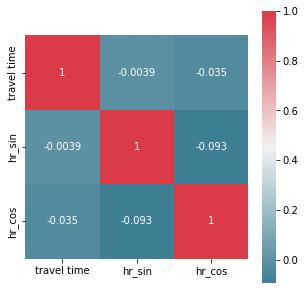

In [38]:
# run correlation matrix and plot
my_df = df1[['travel time','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [39]:
x = np.array(df1[['est_dist','hr_sin','hr_cos']])
y = np.array(df1['travel time'])
x

array([[ 2.97385102e-01, -1.00000000e+00, -1.83697020e-16],
       [ 2.34176744e-02, -7.07106781e-01,  7.07106781e-01],
       [ 1.42794495e-01, -9.65925826e-01,  2.58819045e-01],
       ...,
       [ 3.24704428e-01,  5.00000000e-01,  8.66025404e-01],
       [ 3.21416466e-01, -5.00000000e-01,  8.66025404e-01],
       [ 1.84316708e-01,  1.00000000e+00,  6.12323400e-17]])

In [40]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 3)
(3120, 3)


In [42]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
390/390 [==============================] - 0s 875us/step - loss: 1310633.6250 - mape: 99.6307 - rmse: 1144.8291 - val_loss: 1268009.1250 - val_mape: 99.0268 - val_rmse: 1126.0591
Epoch 2/500
390/390 [==============================] - 0s 768us/step - loss: 1282954.7500 - mape: 97.8240 - rmse: 1132.6759 - val_loss: 1226271.8750 - val_mape: 96.2847 - val_rmse: 1107.3716
Epoch 3/500
390/390 [==============================] - 0s 763us/step - loss: 1227915.2500 - mape: 94.1793 - rmse: 1108.1134 - val_loss: 1159308.5000 - val_mape: 91.7549 - val_rmse: 1076.7119
Epoch 4/500
390/390 [==============================] - 0s 758us/step - loss: 1152126.8750 - mape: 89.0219 - rmse: 1073.3717 - val_loss: 1076639.7500 - val_mape: 85.8950 - val_rmse: 1037.6125
Epoch 5/500
390/390 [==============================] - 0s 685us/step - loss: 1064164.1250 - mape: 82.7431 - rmse: 1031.5833 - val_loss: 984947.7500 - val_mape: 79.0520 - val_rmse: 992.4453
Epoch 6/500
390/390 [==========================

Epoch 88/500
390/390 [==============================] - 0s 705us/step - loss: 131107.2500 - mape: 36.5811 - rmse: 362.0873 - val_loss: 122902.1406 - val_mape: 36.2469 - val_rmse: 350.5740
Epoch 89/500
390/390 [==============================] - 0s 732us/step - loss: 131086.8594 - mape: 36.5081 - rmse: 362.0592 - val_loss: 122892.6641 - val_mape: 36.2314 - val_rmse: 350.5605
Epoch 90/500
390/390 [==============================] - 0s 743us/step - loss: 131059.9141 - mape: 36.5611 - rmse: 362.0220 - val_loss: 122914.9531 - val_mape: 36.3036 - val_rmse: 350.5923
Epoch 91/500
390/390 [==============================] - 0s 738us/step - loss: 131029.1641 - mape: 36.5742 - rmse: 361.9795 - val_loss: 122880.3047 - val_mape: 36.1844 - val_rmse: 350.5429
Epoch 92/500
390/390 [==============================] - 0s 732us/step - loss: 131007.3594 - mape: 36.5716 - rmse: 361.9494 - val_loss: 122815.0703 - val_mape: 35.9884 - val_rmse: 350.4498
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 723us/step - loss: 130094.5391 - mape: 35.8064 - rmse: 360.6862 - val_loss: 122498.8203 - val_mape: 35.5236 - val_rmse: 349.9983
Epoch 175/500
390/390 [==============================] - 0s 760us/step - loss: 130080.0859 - mape: 35.7635 - rmse: 360.6662 - val_loss: 122499.0156 - val_mape: 35.5569 - val_rmse: 349.9986
Epoch 176/500
390/390 [==============================] - 0s 746us/step - loss: 130074.2812 - mape: 35.7816 - rmse: 360.6581 - val_loss: 122512.5469 - val_mape: 35.5720 - val_rmse: 350.0179
Epoch 177/500
390/390 [==============================] - 0s 746us/step - loss: 130069.7656 - mape: 35.8049 - rmse: 360.6519 - val_loss: 122521.8438 - val_mape: 35.6190 - val_rmse: 350.0312
Epoch 178/500
390/390 [==============================] - 0s 745us/step - loss: 130059.3359 - mape: 35.8036 - rmse: 360.6374 - val_loss: 122514.3672 - val_mape: 35.5494 - val_rmse: 350.0205
Epoch 179/500
390/390 [==============================] - 0s 781us/ste

390/390 [==============================] - 0s 710us/step - loss: 129509.2969 - mape: 35.6692 - rmse: 359.8740 - val_loss: 122240.8828 - val_mape: 35.1456 - val_rmse: 349.6296
Epoch 261/500
390/390 [==============================] - 0s 857us/step - loss: 129497.3984 - mape: 35.4500 - rmse: 359.8575 - val_loss: 122279.1172 - val_mape: 35.3297 - val_rmse: 349.6843
Epoch 262/500
390/390 [==============================] - 0s 733us/step - loss: 129492.4922 - mape: 35.4698 - rmse: 359.8506 - val_loss: 122276.0000 - val_mape: 35.3004 - val_rmse: 349.6798
Epoch 263/500
390/390 [==============================] - 0s 745us/step - loss: 129483.2812 - mape: 35.6547 - rmse: 359.8379 - val_loss: 122250.1641 - val_mape: 35.1310 - val_rmse: 349.6429
Epoch 264/500
390/390 [==============================] - 0s 760us/step - loss: 129488.0781 - mape: 35.4162 - rmse: 359.8445 - val_loss: 122276.2500 - val_mape: 35.2606 - val_rmse: 349.6802
Epoch 265/500
390/390 [==============================] - 0s 683us/ste

390/390 [==============================] - 0s 754us/step - loss: 129123.8516 - mape: 35.1796 - rmse: 359.3381 - val_loss: 122226.9531 - val_mape: 35.0947 - val_rmse: 349.6097
Epoch 347/500
390/390 [==============================] - 0s 793us/step - loss: 129124.3359 - mape: 35.3482 - rmse: 359.3387 - val_loss: 122209.2734 - val_mape: 35.1209 - val_rmse: 349.5844
Epoch 348/500
390/390 [==============================] - 0s 742us/step - loss: 129123.4922 - mape: 35.3674 - rmse: 359.3376 - val_loss: 122218.9141 - val_mape: 35.1072 - val_rmse: 349.5982
Epoch 349/500
390/390 [==============================] - 0s 730us/step - loss: 129116.5781 - mape: 35.2561 - rmse: 359.3279 - val_loss: 122224.3359 - val_mape: 35.1208 - val_rmse: 349.6060
Epoch 350/500
390/390 [==============================] - 0s 779us/step - loss: 129104.6406 - mape: 35.4427 - rmse: 359.3113 - val_loss: 122190.4531 - val_mape: 34.9575 - val_rmse: 349.5575
Epoch 351/500
390/390 [==============================] - 0s 770us/ste

390/390 [==============================] - 0s 771us/step - loss: 128899.3828 - mape: 35.0559 - rmse: 359.0256 - val_loss: 122250.5859 - val_mape: 35.0668 - val_rmse: 349.6435
Epoch 433/500
390/390 [==============================] - 0s 717us/step - loss: 128895.9609 - mape: 35.2761 - rmse: 359.0208 - val_loss: 122215.2109 - val_mape: 34.9618 - val_rmse: 349.5929
Epoch 434/500
390/390 [==============================] - 0s 733us/step - loss: 128901.1719 - mape: 35.1606 - rmse: 359.0281 - val_loss: 122233.3750 - val_mape: 35.0324 - val_rmse: 349.6189
Epoch 435/500
390/390 [==============================] - 0s 767us/step - loss: 128894.7500 - mape: 35.2420 - rmse: 359.0192 - val_loss: 122195.1562 - val_mape: 34.8733 - val_rmse: 349.5642
Epoch 436/500
390/390 [==============================] - 0s 717us/step - loss: 128893.3125 - mape: 35.1579 - rmse: 359.0172 - val_loss: 122224.6641 - val_mape: 34.8938 - val_rmse: 349.6064
Epoch 437/500
390/390 [==============================] - 0s 748us/ste

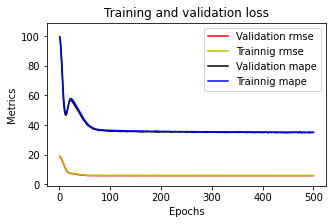

In [43]:
plotme(model2_1)

In [44]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
390/390 [==============================] - 0s 835us/step - loss: 1305885.7500 - mape: 99.3172 - rmse: 1142.7535 - val_loss: 1252605.2500 - val_mape: 98.0202 - val_rmse: 1119.1985
Epoch 2/1000
390/390 [==============================] - 0s 715us/step - loss: 1242285.1250 - mape: 95.1520 - rmse: 1114.5785 - val_loss: 1153673.2500 - val_mape: 91.3718 - val_rmse: 1074.0918
Epoch 3/1000
390/390 [==============================] - 0s 777us/step - loss: 1116518.1250 - mape: 86.5378 - rmse: 1056.6542 - val_loss: 1008574.7500 - val_mape: 80.8598 - val_rmse: 1004.2782
Epoch 4/1000
390/390 [==============================] - 0s 727us/step - loss: 961346.3750 - mape: 75.1837 - rmse: 980.4827 - val_loss: 849093.4375 - val_mape: 68.4825 - val_rmse: 921.4626
Epoch 5/1000
390/390 [==============================] - 0s 752us/step - loss: 801420.6250 - mape: 63.7864 - rmse: 895.2210 - val_loss: 694878.0000 - val_mape: 57.7591 - val_rmse: 833.5934
Epoch 6/1000
390/390 [==========================

390/390 [==============================] - 0s 718us/step - loss: 130421.6328 - mape: 36.0152 - rmse: 361.1393 - val_loss: 122606.4141 - val_mape: 35.8450 - val_rmse: 350.1520
Epoch 88/1000
390/390 [==============================] - 0s 763us/step - loss: 130408.9531 - mape: 36.0587 - rmse: 361.1218 - val_loss: 122595.7656 - val_mape: 35.6827 - val_rmse: 350.1368
Epoch 89/1000
390/390 [==============================] - 0s 720us/step - loss: 130395.2812 - mape: 36.0167 - rmse: 361.1029 - val_loss: 122568.6875 - val_mape: 35.6690 - val_rmse: 350.0981
Epoch 90/1000
390/390 [==============================] - 0s 768us/step - loss: 130385.1016 - mape: 36.1502 - rmse: 361.0888 - val_loss: 122532.3281 - val_mape: 35.5180 - val_rmse: 350.0462
Epoch 91/1000
390/390 [==============================] - 0s 712us/step - loss: 130367.1875 - mape: 35.9344 - rmse: 361.0640 - val_loss: 122545.3438 - val_mape: 35.7259 - val_rmse: 350.0648
Epoch 92/1000
390/390 [==============================] - 0s 722us/ste

390/390 [==============================] - 0s 747us/step - loss: 129523.5391 - mape: 35.5506 - rmse: 359.8938 - val_loss: 122280.1562 - val_mape: 35.3808 - val_rmse: 349.6858
Epoch 174/1000
390/390 [==============================] - 0s 735us/step - loss: 129522.6484 - mape: 35.6292 - rmse: 359.8925 - val_loss: 122231.8359 - val_mape: 35.1259 - val_rmse: 349.6167
Epoch 175/1000
390/390 [==============================] - 0s 743us/step - loss: 129503.4453 - mape: 35.5914 - rmse: 359.8659 - val_loss: 122240.2891 - val_mape: 35.0135 - val_rmse: 349.6288
Epoch 176/1000
390/390 [==============================] - 0s 726us/step - loss: 129510.0781 - mape: 35.4240 - rmse: 359.8751 - val_loss: 122274.2188 - val_mape: 35.1653 - val_rmse: 349.6773
Epoch 177/1000
390/390 [==============================] - 0s 735us/step - loss: 129497.8438 - mape: 35.5479 - rmse: 359.8581 - val_loss: 122283.4219 - val_mape: 35.2212 - val_rmse: 349.6905
Epoch 178/1000
390/390 [==============================] - 0s 749u

390/390 [==============================] - 0s 750us/step - loss: 129044.6172 - mape: 35.2151 - rmse: 359.2278 - val_loss: 122216.7109 - val_mape: 35.1491 - val_rmse: 349.5951
Epoch 260/1000
390/390 [==============================] - 0s 702us/step - loss: 129024.7656 - mape: 35.3906 - rmse: 359.2002 - val_loss: 122144.4219 - val_mape: 34.8479 - val_rmse: 349.4917
Epoch 261/1000
390/390 [==============================] - 0s 769us/step - loss: 129017.7109 - mape: 35.0737 - rmse: 359.1904 - val_loss: 122273.0938 - val_mape: 35.2940 - val_rmse: 349.6757
Epoch 262/1000
390/390 [==============================] - 0s 716us/step - loss: 129018.3359 - mape: 35.2565 - rmse: 359.1912 - val_loss: 122251.3750 - val_mape: 35.3079 - val_rmse: 349.6447
Epoch 263/1000
390/390 [==============================] - 0s 757us/step - loss: 129022.8281 - mape: 35.3685 - rmse: 359.1975 - val_loss: 122227.9062 - val_mape: 34.9568 - val_rmse: 349.6111
Epoch 264/1000
390/390 [==============================] - 0s 733u

390/390 [==============================] - 0s 749us/step - loss: 128778.3828 - mape: 35.1404 - rmse: 358.8571 - val_loss: 122274.7969 - val_mape: 34.9472 - val_rmse: 349.6781
Epoch 346/1000
390/390 [==============================] - 0s 737us/step - loss: 128807.3984 - mape: 35.2722 - rmse: 358.8975 - val_loss: 122240.2500 - val_mape: 34.6373 - val_rmse: 349.6287
Epoch 347/1000
390/390 [==============================] - 0s 730us/step - loss: 128789.0156 - mape: 35.0791 - rmse: 358.8719 - val_loss: 122263.2734 - val_mape: 34.8162 - val_rmse: 349.6617
Epoch 348/1000
390/390 [==============================] - 0s 748us/step - loss: 128779.1094 - mape: 35.0877 - rmse: 358.8581 - val_loss: 122211.5469 - val_mape: 34.7565 - val_rmse: 349.5877
Epoch 349/1000
390/390 [==============================] - 0s 756us/step - loss: 128773.3750 - mape: 35.2255 - rmse: 358.8501 - val_loss: 122206.7188 - val_mape: 34.5476 - val_rmse: 349.5808
Epoch 350/1000
390/390 [==============================] - 0s 700u

390/390 [==============================] - 0s 729us/step - loss: 128694.7422 - mape: 35.1617 - rmse: 358.7405 - val_loss: 122335.9609 - val_mape: 34.7949 - val_rmse: 349.7656
Epoch 432/1000
390/390 [==============================] - 0s 701us/step - loss: 128689.1406 - mape: 35.0085 - rmse: 358.7327 - val_loss: 122301.9453 - val_mape: 34.7299 - val_rmse: 349.7169
Epoch 433/1000
390/390 [==============================] - 0s 759us/step - loss: 128683.3047 - mape: 35.0686 - rmse: 358.7245 - val_loss: 122313.1797 - val_mape: 34.6471 - val_rmse: 349.7330
Epoch 434/1000
390/390 [==============================] - 0s 721us/step - loss: 128691.4062 - mape: 35.0580 - rmse: 358.7358 - val_loss: 122319.8125 - val_mape: 34.7450 - val_rmse: 349.7425
Epoch 435/1000
390/390 [==============================] - 0s 693us/step - loss: 128684.7109 - mape: 35.0033 - rmse: 358.7265 - val_loss: 122300.2578 - val_mape: 34.7336 - val_rmse: 349.7145
Epoch 436/1000
390/390 [==============================] - 0s 699u

390/390 [==============================] - 0s 730us/step - loss: 128649.5312 - mape: 34.9427 - rmse: 358.6775 - val_loss: 122451.2422 - val_mape: 35.0006 - val_rmse: 349.9303
Epoch 518/1000
390/390 [==============================] - 0s 747us/step - loss: 128663.9375 - mape: 35.0649 - rmse: 358.6976 - val_loss: 122410.1250 - val_mape: 34.8178 - val_rmse: 349.8716
Epoch 519/1000
390/390 [==============================] - 0s 754us/step - loss: 128651.7422 - mape: 34.9320 - rmse: 358.6806 - val_loss: 122412.0938 - val_mape: 34.8857 - val_rmse: 349.8744
Epoch 520/1000
390/390 [==============================] - 0s 746us/step - loss: 128636.7656 - mape: 34.9409 - rmse: 358.6597 - val_loss: 122500.5859 - val_mape: 35.1520 - val_rmse: 350.0008
Epoch 521/1000
390/390 [==============================] - 0s 727us/step - loss: 128657.3750 - mape: 35.1813 - rmse: 358.6884 - val_loss: 122429.1250 - val_mape: 34.7857 - val_rmse: 349.8987
Epoch 522/1000
390/390 [==============================] - 0s 729u

390/390 [==============================] - 0s 681us/step - loss: 128633.1406 - mape: 34.9754 - rmse: 358.6546 - val_loss: 122491.5625 - val_mape: 34.8064 - val_rmse: 349.9879
Epoch 604/1000
390/390 [==============================] - 0s 704us/step - loss: 128622.3594 - mape: 35.1162 - rmse: 358.6396 - val_loss: 122437.8047 - val_mape: 34.5021 - val_rmse: 349.9111
Epoch 605/1000
390/390 [==============================] - 0s 742us/step - loss: 128628.7344 - mape: 34.8272 - rmse: 358.6485 - val_loss: 122464.4922 - val_mape: 34.9307 - val_rmse: 349.9493
Epoch 606/1000
390/390 [==============================] - 0s 727us/step - loss: 128650.7266 - mape: 34.9897 - rmse: 358.6791 - val_loss: 122451.4688 - val_mape: 34.7557 - val_rmse: 349.9307
Epoch 607/1000
390/390 [==============================] - 0s 738us/step - loss: 128626.4609 - mape: 34.9769 - rmse: 358.6453 - val_loss: 122484.9062 - val_mape: 34.8521 - val_rmse: 349.9784
Epoch 608/1000
390/390 [==============================] - 0s 754u

390/390 [==============================] - 0s 726us/step - loss: 128617.5078 - mape: 34.9930 - rmse: 358.6328 - val_loss: 122448.0859 - val_mape: 34.6236 - val_rmse: 349.9258
Epoch 690/1000
390/390 [==============================] - 0s 777us/step - loss: 128629.1250 - mape: 34.9533 - rmse: 358.6490 - val_loss: 122451.5781 - val_mape: 34.6422 - val_rmse: 349.9308
Epoch 691/1000
390/390 [==============================] - 0s 731us/step - loss: 128616.0625 - mape: 34.8286 - rmse: 358.6308 - val_loss: 122470.6875 - val_mape: 34.8639 - val_rmse: 349.9581
Epoch 692/1000
390/390 [==============================] - 0s 721us/step - loss: 128624.0625 - mape: 35.0378 - rmse: 358.6420 - val_loss: 122431.4844 - val_mape: 34.6363 - val_rmse: 349.9021
Epoch 693/1000
390/390 [==============================] - 0s 737us/step - loss: 128618.0156 - mape: 34.9764 - rmse: 358.6335 - val_loss: 122466.7891 - val_mape: 34.7550 - val_rmse: 349.9525
Epoch 694/1000
390/390 [==============================] - 0s 732u

390/390 [==============================] - 0s 733us/step - loss: 128619.4688 - mape: 34.9198 - rmse: 358.6356 - val_loss: 122520.8281 - val_mape: 34.9985 - val_rmse: 350.0298
Epoch 776/1000
390/390 [==============================] - 0s 756us/step - loss: 128613.9766 - mape: 35.0689 - rmse: 358.6279 - val_loss: 122505.4219 - val_mape: 34.7812 - val_rmse: 350.0078
Epoch 777/1000
390/390 [==============================] - 0s 741us/step - loss: 128623.5703 - mape: 34.9098 - rmse: 358.6413 - val_loss: 122515.2188 - val_mape: 34.9395 - val_rmse: 350.0217
Epoch 778/1000
390/390 [==============================] - 0s 713us/step - loss: 128615.0859 - mape: 34.9919 - rmse: 358.6295 - val_loss: 122482.9766 - val_mape: 34.8096 - val_rmse: 349.9757
Epoch 779/1000
390/390 [==============================] - 0s 737us/step - loss: 128613.4922 - mape: 34.9882 - rmse: 358.6272 - val_loss: 122472.1016 - val_mape: 34.8233 - val_rmse: 349.9601
Epoch 780/1000
390/390 [==============================] - 0s 769u

390/390 [==============================] - 0s 741us/step - loss: 128612.3906 - mape: 34.7768 - rmse: 358.6257 - val_loss: 122567.1484 - val_mape: 34.9859 - val_rmse: 350.0959
Epoch 862/1000
390/390 [==============================] - 0s 727us/step - loss: 128629.9453 - mape: 35.0209 - rmse: 358.6502 - val_loss: 122548.0000 - val_mape: 34.8258 - val_rmse: 350.0686
Epoch 863/1000
390/390 [==============================] - 0s 728us/step - loss: 128613.5859 - mape: 34.9744 - rmse: 358.6273 - val_loss: 122520.2734 - val_mape: 34.9131 - val_rmse: 350.0290
Epoch 864/1000
390/390 [==============================] - 0s 737us/step - loss: 128613.9141 - mape: 34.9511 - rmse: 358.6278 - val_loss: 122527.3203 - val_mape: 34.9202 - val_rmse: 350.0390
Epoch 865/1000
390/390 [==============================] - 0s 731us/step - loss: 128609.7344 - mape: 34.8458 - rmse: 358.6220 - val_loss: 122593.8438 - val_mape: 35.0997 - val_rmse: 350.1340
Epoch 866/1000
390/390 [==============================] - 0s 701u

390/390 [==============================] - 0s 721us/step - loss: 128606.4375 - mape: 34.8024 - rmse: 358.6174 - val_loss: 122584.3672 - val_mape: 35.0171 - val_rmse: 350.1205
Epoch 948/1000
390/390 [==============================] - 0s 752us/step - loss: 128598.7422 - mape: 35.1286 - rmse: 358.6067 - val_loss: 122528.2656 - val_mape: 34.6093 - val_rmse: 350.0404
Epoch 949/1000
390/390 [==============================] - 0s 748us/step - loss: 128595.8906 - mape: 35.0969 - rmse: 358.6027 - val_loss: 122484.0078 - val_mape: 34.1641 - val_rmse: 349.9771
Epoch 950/1000
390/390 [==============================] - 0s 719us/step - loss: 128613.9453 - mape: 34.7749 - rmse: 358.6279 - val_loss: 122556.7812 - val_mape: 34.8049 - val_rmse: 350.0811
Epoch 951/1000
390/390 [==============================] - 0s 767us/step - loss: 128603.2500 - mape: 34.9680 - rmse: 358.6129 - val_loss: 122551.2578 - val_mape: 34.7507 - val_rmse: 350.0732
Epoch 952/1000
390/390 [==============================] - 0s 722u

In [45]:
# plotme(model2_2)

In [46]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
390/390 [==============================] - 1s 894us/step - loss: 1297388.2500 - mape: 98.7477 - rmse: 1139.0295 - val_loss: 1226240.8750 - val_mape: 96.2714 - val_rmse: 1107.3577
Epoch 2/500
390/390 [==============================] - 0s 827us/step - loss: 1186487.0000 - mape: 91.3113 - rmse: 1089.2599 - val_loss: 1065228.0000 - val_mape: 85.0322 - val_rmse: 1032.0989
Epoch 3/500
390/390 [==============================] - 0s 829us/step - loss: 995876.5000 - mape: 77.5711 - rmse: 997.9361 - val_loss: 857138.6250 - val_mape: 69.0657 - val_rmse: 925.8178
Epoch 4/500
390/390 [==============================] - 0s 822us/step - loss: 785708.4375 - mape: 62.8353 - rmse: 886.4020 - val_loss: 655764.8125 - val_mape: 55.6535 - val_rmse: 809.7931
Epoch 5/500
390/390 [==============================] - 0s 808us/step - loss: 597045.1250 - mape: 53.1234 - rmse: 772.6870 - val_loss: 490544.3438 - val_mape: 48.7818 - val_rmse: 700.3887
Epoch 6/500
390/390 [==============================] - 0s

Epoch 88/500
390/390 [==============================] - 0s 888us/step - loss: 129272.8750 - mape: 35.4024 - rmse: 359.5454 - val_loss: 122210.0703 - val_mape: 35.1623 - val_rmse: 349.5856
Epoch 89/500
390/390 [==============================] - 0s 741us/step - loss: 129251.5078 - mape: 35.4196 - rmse: 359.5157 - val_loss: 122178.1094 - val_mape: 35.1430 - val_rmse: 349.5399
Epoch 90/500
390/390 [==============================] - 0s 811us/step - loss: 129254.0391 - mape: 35.3860 - rmse: 359.5192 - val_loss: 122216.3281 - val_mape: 35.2132 - val_rmse: 349.5945
Epoch 91/500
390/390 [==============================] - 0s 784us/step - loss: 129254.8516 - mape: 35.3970 - rmse: 359.5203 - val_loss: 122228.6484 - val_mape: 35.1715 - val_rmse: 349.6122
Epoch 92/500
390/390 [==============================] - 0s 840us/step - loss: 129188.3203 - mape: 35.5774 - rmse: 359.4278 - val_loss: 122127.8594 - val_mape: 34.7897 - val_rmse: 349.4680
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 816us/step - loss: 128841.0859 - mape: 35.1221 - rmse: 358.9444 - val_loss: 122179.4453 - val_mape: 34.6493 - val_rmse: 349.5418
Epoch 175/500
390/390 [==============================] - 0s 793us/step - loss: 128822.7656 - mape: 34.9462 - rmse: 358.9189 - val_loss: 122251.2734 - val_mape: 35.0526 - val_rmse: 349.6445
Epoch 176/500
390/390 [==============================] - 0s 808us/step - loss: 128813.9141 - mape: 35.2899 - rmse: 358.9066 - val_loss: 122166.5859 - val_mape: 34.6063 - val_rmse: 349.5234
Epoch 177/500
390/390 [==============================] - 0s 788us/step - loss: 128835.9531 - mape: 34.9956 - rmse: 358.9373 - val_loss: 122294.5469 - val_mape: 35.0537 - val_rmse: 349.7064
Epoch 178/500
390/390 [==============================] - 0s 838us/step - loss: 128838.5469 - mape: 35.1323 - rmse: 358.9409 - val_loss: 122226.3984 - val_mape: 34.9675 - val_rmse: 349.6089
Epoch 179/500
390/390 [==============================] - 0s 834us/ste

390/390 [==============================] - 0s 826us/step - loss: 128703.6172 - mape: 35.0574 - rmse: 358.7529 - val_loss: 122336.8906 - val_mape: 34.6485 - val_rmse: 349.7669
Epoch 261/500
390/390 [==============================] - 0s 729us/step - loss: 128729.4766 - mape: 34.9611 - rmse: 358.7889 - val_loss: 122367.8594 - val_mape: 34.8724 - val_rmse: 349.8112
Epoch 262/500
390/390 [==============================] - 0s 740us/step - loss: 128706.9688 - mape: 35.0489 - rmse: 358.7575 - val_loss: 122376.3906 - val_mape: 34.7165 - val_rmse: 349.8234
Epoch 263/500
390/390 [==============================] - 0s 806us/step - loss: 128717.7734 - mape: 34.9564 - rmse: 358.7726 - val_loss: 122374.9141 - val_mape: 34.9000 - val_rmse: 349.8213
Epoch 264/500
390/390 [==============================] - 0s 782us/step - loss: 128705.6016 - mape: 34.9636 - rmse: 358.7556 - val_loss: 122405.5781 - val_mape: 34.9994 - val_rmse: 349.8651
Epoch 265/500
390/390 [==============================] - 0s 766us/ste

390/390 [==============================] - 0s 766us/step - loss: 128660.1484 - mape: 34.9597 - rmse: 358.6923 - val_loss: 122340.8438 - val_mape: 34.5903 - val_rmse: 349.7726
Epoch 347/500
390/390 [==============================] - 0s 801us/step - loss: 128624.0938 - mape: 34.7915 - rmse: 358.6420 - val_loss: 122554.5234 - val_mape: 35.3216 - val_rmse: 350.0779
Epoch 348/500
390/390 [==============================] - 0s 778us/step - loss: 128697.5312 - mape: 35.1562 - rmse: 358.7444 - val_loss: 122418.6953 - val_mape: 34.7945 - val_rmse: 349.8838
Epoch 349/500
390/390 [==============================] - 0s 769us/step - loss: 128660.5938 - mape: 34.8469 - rmse: 358.6929 - val_loss: 122456.3281 - val_mape: 35.0162 - val_rmse: 349.9376
Epoch 350/500
390/390 [==============================] - 0s 813us/step - loss: 128683.8125 - mape: 35.0851 - rmse: 358.7253 - val_loss: 122403.8984 - val_mape: 34.7750 - val_rmse: 349.8627
Epoch 351/500
390/390 [==============================] - 0s 832us/ste

390/390 [==============================] - 0s 833us/step - loss: 128652.7266 - mape: 34.9027 - rmse: 358.6819 - val_loss: 122427.3359 - val_mape: 34.6155 - val_rmse: 349.8962
Epoch 433/500
390/390 [==============================] - 0s 809us/step - loss: 128642.9609 - mape: 34.8881 - rmse: 358.6683 - val_loss: 122546.2266 - val_mape: 34.8611 - val_rmse: 350.0660
Epoch 434/500
390/390 [==============================] - 0s 819us/step - loss: 128647.9062 - mape: 35.0048 - rmse: 358.6752 - val_loss: 122443.6719 - val_mape: 34.6354 - val_rmse: 349.9195
Epoch 435/500
390/390 [==============================] - 0s 805us/step - loss: 128649.7891 - mape: 34.9176 - rmse: 358.6778 - val_loss: 122465.8984 - val_mape: 34.8104 - val_rmse: 349.9513
Epoch 436/500
390/390 [==============================] - 0s 797us/step - loss: 128632.5000 - mape: 35.1408 - rmse: 358.6537 - val_loss: 122410.4375 - val_mape: 34.3934 - val_rmse: 349.8720
Epoch 437/500
390/390 [==============================] - 0s 809us/ste

In [47]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 972013.3750 - mape: 77.4473 - rmse: 985.9074 - val_loss: 302839.5312 - val_mape: 47.9857 - val_rmse: 550.3086
Epoch 2/500
390/390 [==============================] - 0s 779us/step - loss: 225275.3906 - mape: 57.3587 - rmse: 474.6318 - val_loss: 189186.3438 - val_mape: 55.9324 - val_rmse: 434.9556
Epoch 3/500
390/390 [==============================] - 0s 765us/step - loss: 187499.8438 - mape: 55.4685 - rmse: 433.0125 - val_loss: 164302.3750 - val_mape: 52.3955 - val_rmse: 405.3423
Epoch 4/500
390/390 [==============================] - 0s 838us/step - loss: 163852.7500 - mape: 50.6491 - rmse: 404.7873 - val_loss: 143145.2031 - val_mape: 46.8749 - val_rmse: 378.3453
Epoch 5/500
390/390 [==============================] - 0s 796us/step - loss: 146416.1250 - mape: 45.7323 - rmse: 382.6436 - val_loss: 130339.0781 - val_mape: 42.4914 - val_rmse: 361.0250
Epoch 6/500
390/390 [==============================] - 0s 786us/ste

Epoch 45/500
390/390 [==============================] - 0s 787us/step - loss: 130405.7891 - mape: 35.8960 - rmse: 361.1174 - val_loss: 123002.3359 - val_mape: 36.2043 - val_rmse: 350.7169
Epoch 46/500
390/390 [==============================] - 0s 769us/step - loss: 130308.6875 - mape: 35.8149 - rmse: 360.9829 - val_loss: 122560.5469 - val_mape: 36.0263 - val_rmse: 350.0865
Epoch 47/500
390/390 [==============================] - 0s 797us/step - loss: 130394.3359 - mape: 35.8593 - rmse: 361.1016 - val_loss: 122475.6328 - val_mape: 34.8331 - val_rmse: 349.9652
Epoch 48/500
390/390 [==============================] - 0s 770us/step - loss: 130365.7578 - mape: 35.9152 - rmse: 361.0620 - val_loss: 122598.1094 - val_mape: 34.0602 - val_rmse: 350.1401
Epoch 49/500
390/390 [==============================] - 0s 797us/step - loss: 130317.8984 - mape: 35.6823 - rmse: 360.9957 - val_loss: 122333.3438 - val_mape: 35.1063 - val_rmse: 349.7618
Epoch 50/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 774us/step - loss: 128934.6094 - mape: 35.1368 - rmse: 359.0746 - val_loss: 122639.7812 - val_mape: 35.9244 - val_rmse: 350.1996
Epoch 132/500
390/390 [==============================] - 0s 780us/step - loss: 129019.0859 - mape: 35.2822 - rmse: 359.1923 - val_loss: 122609.0781 - val_mape: 35.4173 - val_rmse: 350.1558
Epoch 133/500
390/390 [==============================] - 0s 804us/step - loss: 128948.7188 - mape: 35.1755 - rmse: 359.0943 - val_loss: 122333.0938 - val_mape: 33.5839 - val_rmse: 349.7615
Epoch 134/500
390/390 [==============================] - 0s 785us/step - loss: 128888.9453 - mape: 34.9274 - rmse: 359.0111 - val_loss: 123003.3516 - val_mape: 36.1499 - val_rmse: 350.7183
Epoch 135/500
390/390 [==============================] - 0s 792us/step - loss: 128895.4844 - mape: 35.0932 - rmse: 359.0202 - val_loss: 122468.7891 - val_mape: 35.0611 - val_rmse: 349.9554
Epoch 136/500
390/390 [==============================] - 0s 794us/ste

390/390 [==============================] - 0s 767us/step - loss: 128760.1016 - mape: 35.0203 - rmse: 358.8316 - val_loss: 122285.2422 - val_mape: 35.0597 - val_rmse: 349.6931
Epoch 218/500
390/390 [==============================] - 0s 731us/step - loss: 128686.2891 - mape: 35.0825 - rmse: 358.7287 - val_loss: 123586.4531 - val_mape: 36.3759 - val_rmse: 351.5486
Epoch 219/500
390/390 [==============================] - 0s 762us/step - loss: 128849.7422 - mape: 35.1142 - rmse: 358.9565 - val_loss: 122252.1719 - val_mape: 33.6605 - val_rmse: 349.6458
Epoch 220/500
390/390 [==============================] - 0s 777us/step - loss: 128764.4297 - mape: 34.9001 - rmse: 358.8376 - val_loss: 122789.5391 - val_mape: 35.5213 - val_rmse: 350.4134
Epoch 221/500
390/390 [==============================] - 0s 764us/step - loss: 128704.2344 - mape: 35.0022 - rmse: 358.7537 - val_loss: 122289.7344 - val_mape: 34.6192 - val_rmse: 349.6995
Epoch 222/500
390/390 [==============================] - 0s 763us/ste

390/390 [==============================] - 0s 764us/step - loss: 128664.0156 - mape: 34.9192 - rmse: 358.6977 - val_loss: 122289.5391 - val_mape: 34.1175 - val_rmse: 349.6992
Epoch 304/500
390/390 [==============================] - 0s 744us/step - loss: 128698.6016 - mape: 34.9429 - rmse: 358.7459 - val_loss: 122260.7891 - val_mape: 34.9142 - val_rmse: 349.6581
Epoch 305/500
390/390 [==============================] - 0s 770us/step - loss: 128729.7734 - mape: 35.0045 - rmse: 358.7893 - val_loss: 122602.9453 - val_mape: 35.6061 - val_rmse: 350.1470
Epoch 306/500
390/390 [==============================] - 0s 753us/step - loss: 128668.2812 - mape: 35.0997 - rmse: 358.7036 - val_loss: 122287.6797 - val_mape: 33.8537 - val_rmse: 349.6966
Epoch 307/500
390/390 [==============================] - 0s 751us/step - loss: 128661.1641 - mape: 34.9149 - rmse: 358.6937 - val_loss: 122309.7734 - val_mape: 35.0253 - val_rmse: 349.7281
Epoch 308/500
390/390 [==============================] - 0s 781us/ste

390/390 [==============================] - 0s 782us/step - loss: 128669.1406 - mape: 35.0201 - rmse: 358.7048 - val_loss: 123379.6094 - val_mape: 36.4934 - val_rmse: 351.2543
Epoch 390/500
390/390 [==============================] - 0s 781us/step - loss: 128712.6250 - mape: 35.0218 - rmse: 358.7654 - val_loss: 122414.8906 - val_mape: 34.4085 - val_rmse: 349.8784
Epoch 391/500
390/390 [==============================] - 0s 783us/step - loss: 128768.5859 - mape: 35.0370 - rmse: 358.8434 - val_loss: 122531.4062 - val_mape: 34.6935 - val_rmse: 350.0449
Epoch 392/500
390/390 [==============================] - 0s 782us/step - loss: 128683.9141 - mape: 34.9060 - rmse: 358.7254 - val_loss: 122800.4219 - val_mape: 35.4676 - val_rmse: 350.4289
Epoch 393/500
390/390 [==============================] - 0s 790us/step - loss: 128673.7578 - mape: 34.9403 - rmse: 358.7112 - val_loss: 122518.2578 - val_mape: 35.2976 - val_rmse: 350.0261
Epoch 394/500
390/390 [==============================] - 0s 788us/ste

390/390 [==============================] - 0s 804us/step - loss: 128619.6406 - mape: 35.0095 - rmse: 358.6358 - val_loss: 122353.9297 - val_mape: 34.9372 - val_rmse: 349.7913
Epoch 476/500
390/390 [==============================] - 0s 802us/step - loss: 128650.0234 - mape: 35.0817 - rmse: 358.6782 - val_loss: 122354.2266 - val_mape: 34.5234 - val_rmse: 349.7917
Epoch 477/500
390/390 [==============================] - 0s 799us/step - loss: 128640.5156 - mape: 34.9165 - rmse: 358.6649 - val_loss: 122278.3828 - val_mape: 34.9660 - val_rmse: 349.6833
Epoch 478/500
390/390 [==============================] - 0s 803us/step - loss: 128697.6797 - mape: 34.9627 - rmse: 358.7446 - val_loss: 122263.3750 - val_mape: 35.0520 - val_rmse: 349.6618
Epoch 479/500
390/390 [==============================] - 0s 809us/step - loss: 128599.4297 - mape: 35.0429 - rmse: 358.6076 - val_loss: 122567.8984 - val_mape: 34.8246 - val_rmse: 350.0970
Epoch 480/500
390/390 [==============================] - 0s 805us/ste

In [48]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 695398.0000 - mape: 70.5073 - rmse: 833.9053 - val_loss: 199414.1094 - val_mape: 56.5445 - val_rmse: 446.5581
Epoch 2/500
390/390 [==============================] - 0s 883us/step - loss: 189477.0938 - mape: 55.8012 - rmse: 435.2897 - val_loss: 158894.6406 - val_mape: 50.8700 - val_rmse: 398.6159
Epoch 3/500
390/390 [==============================] - 0s 887us/step - loss: 155924.4062 - mape: 48.5727 - rmse: 394.8727 - val_loss: 134224.0156 - val_mape: 45.1629 - val_rmse: 366.3660
Epoch 4/500
390/390 [==============================] - 0s 883us/step - loss: 137940.5781 - mape: 42.1835 - rmse: 371.4035 - val_loss: 125299.0078 - val_mape: 40.4266 - val_rmse: 353.9760
Epoch 5/500
390/390 [==============================] - 0s 876us/step - loss: 132918.9219 - mape: 38.5496 - rmse: 364.5805 - val_loss: 123309.9297 - val_mape: 36.4193 - val_rmse: 351.1552
Epoch 6/500
390/390 [==============================] - 0s 890us/ste

Epoch 45/500
390/390 [==============================] - 0s 894us/step - loss: 131993.9062 - mape: 36.4046 - rmse: 363.3097 - val_loss: 123213.3828 - val_mape: 35.5053 - val_rmse: 351.0176
Epoch 46/500
390/390 [==============================] - 0s 869us/step - loss: 132223.1250 - mape: 36.4999 - rmse: 363.6250 - val_loss: 123400.5859 - val_mape: 36.5127 - val_rmse: 351.2842
Epoch 47/500
390/390 [==============================] - 0s 879us/step - loss: 132039.9688 - mape: 36.6367 - rmse: 363.3730 - val_loss: 123178.0234 - val_mape: 35.1526 - val_rmse: 350.9673
Epoch 48/500
390/390 [==============================] - 0s 880us/step - loss: 132096.1094 - mape: 36.3900 - rmse: 363.4503 - val_loss: 123231.3828 - val_mape: 36.1063 - val_rmse: 351.0433
Epoch 49/500
390/390 [==============================] - 0s 879us/step - loss: 131923.7344 - mape: 36.5525 - rmse: 363.2131 - val_loss: 123975.8125 - val_mape: 35.8700 - val_rmse: 352.1020
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 838us/step - loss: 132011.9688 - mape: 36.3360 - rmse: 363.3345 - val_loss: 123293.7500 - val_mape: 36.4463 - val_rmse: 351.1321
Epoch 132/500
390/390 [==============================] - 0s 853us/step - loss: 132102.4375 - mape: 36.4936 - rmse: 363.4590 - val_loss: 123975.5078 - val_mape: 37.2486 - val_rmse: 352.1016
Epoch 133/500
390/390 [==============================] - 0s 817us/step - loss: 131930.6562 - mape: 36.6717 - rmse: 363.2226 - val_loss: 123792.7422 - val_mape: 36.7751 - val_rmse: 351.8419
Epoch 134/500
390/390 [==============================] - 0s 825us/step - loss: 132008.5938 - mape: 36.4251 - rmse: 363.3299 - val_loss: 123385.0938 - val_mape: 36.0213 - val_rmse: 351.2621
Epoch 135/500
390/390 [==============================] - 0s 856us/step - loss: 131899.6406 - mape: 36.2705 - rmse: 363.1799 - val_loss: 125652.5625 - val_mape: 39.0290 - val_rmse: 354.4751
Epoch 136/500
390/390 [==============================] - 0s 863us/ste

390/390 [==============================] - 0s 862us/step - loss: 131962.2344 - mape: 36.4649 - rmse: 363.2661 - val_loss: 123270.2969 - val_mape: 36.0884 - val_rmse: 351.0987
Epoch 218/500
390/390 [==============================] - 0s 858us/step - loss: 131874.6562 - mape: 36.5245 - rmse: 363.1455 - val_loss: 123598.9141 - val_mape: 36.1822 - val_rmse: 351.5664
Epoch 219/500
390/390 [==============================] - 0s 834us/step - loss: 131953.2031 - mape: 36.4101 - rmse: 363.2536 - val_loss: 123586.9531 - val_mape: 36.3486 - val_rmse: 351.5493
Epoch 220/500
390/390 [==============================] - 0s 876us/step - loss: 131956.5312 - mape: 36.4499 - rmse: 363.2582 - val_loss: 123335.5078 - val_mape: 35.3948 - val_rmse: 351.1916
Epoch 221/500
390/390 [==============================] - 0s 859us/step - loss: 131757.5156 - mape: 36.5253 - rmse: 362.9842 - val_loss: 123836.6016 - val_mape: 37.0267 - val_rmse: 351.9042
Epoch 222/500
390/390 [==============================] - 0s 872us/ste

390/390 [==============================] - 0s 868us/step - loss: 131947.0312 - mape: 36.4468 - rmse: 363.2451 - val_loss: 123603.6094 - val_mape: 37.0535 - val_rmse: 351.5731
Epoch 304/500
390/390 [==============================] - 0s 879us/step - loss: 131942.1719 - mape: 36.5234 - rmse: 363.2385 - val_loss: 123186.3906 - val_mape: 35.1827 - val_rmse: 350.9792
Epoch 305/500
390/390 [==============================] - 0s 895us/step - loss: 132033.4062 - mape: 36.4764 - rmse: 363.3640 - val_loss: 123376.4844 - val_mape: 36.5268 - val_rmse: 351.2499
Epoch 306/500
390/390 [==============================] - 0s 860us/step - loss: 131955.3906 - mape: 36.5385 - rmse: 363.2567 - val_loss: 123368.0703 - val_mape: 35.6328 - val_rmse: 351.2379
Epoch 307/500
390/390 [==============================] - 0s 859us/step - loss: 131928.9375 - mape: 36.3277 - rmse: 363.2202 - val_loss: 123419.2109 - val_mape: 36.6404 - val_rmse: 351.3107
Epoch 308/500
390/390 [==============================] - 0s 935us/ste

390/390 [==============================] - 0s 818us/step - loss: 131897.0156 - mape: 36.6353 - rmse: 363.1763 - val_loss: 123108.8438 - val_mape: 35.8849 - val_rmse: 350.8687
Epoch 390/500
390/390 [==============================] - 0s 837us/step - loss: 131972.0938 - mape: 36.4761 - rmse: 363.2796 - val_loss: 123881.0156 - val_mape: 37.0947 - val_rmse: 351.9673
Epoch 391/500
390/390 [==============================] - 0s 871us/step - loss: 131976.3125 - mape: 36.3679 - rmse: 363.2854 - val_loss: 123517.4453 - val_mape: 36.3352 - val_rmse: 351.4505
Epoch 392/500
390/390 [==============================] - 0s 896us/step - loss: 131883.0469 - mape: 36.5144 - rmse: 363.1570 - val_loss: 123862.7109 - val_mape: 35.8941 - val_rmse: 351.9413
Epoch 393/500
390/390 [==============================] - 0s 871us/step - loss: 132002.0781 - mape: 36.2884 - rmse: 363.3209 - val_loss: 123474.5234 - val_mape: 36.9511 - val_rmse: 351.3894
Epoch 394/500
390/390 [==============================] - 0s 916us/ste

390/390 [==============================] - 0s 830us/step - loss: 131905.2656 - mape: 36.4350 - rmse: 363.1877 - val_loss: 123527.6406 - val_mape: 35.9339 - val_rmse: 351.4650
Epoch 476/500
390/390 [==============================] - 0s 854us/step - loss: 132077.1250 - mape: 36.6304 - rmse: 363.4242 - val_loss: 123260.1016 - val_mape: 36.0771 - val_rmse: 351.0842
Epoch 477/500
390/390 [==============================] - 0s 876us/step - loss: 131854.2031 - mape: 36.3683 - rmse: 363.1173 - val_loss: 123167.5156 - val_mape: 35.0869 - val_rmse: 350.9523
Epoch 478/500
390/390 [==============================] - 0s 839us/step - loss: 131883.3125 - mape: 36.4407 - rmse: 363.1574 - val_loss: 123126.2969 - val_mape: 35.6037 - val_rmse: 350.8936
Epoch 479/500
390/390 [==============================] - 0s 885us/step - loss: 131888.9062 - mape: 36.5332 - rmse: 363.1651 - val_loss: 123355.5078 - val_mape: 34.6115 - val_rmse: 351.2200
Epoch 480/500
390/390 [==============================] - 0s 841us/ste

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [52]:
df11 = df1.iloc[:,0:7].copy()
# df1 = df1.drop('hr_sin',axis=1)
# df1 = df1.drop('hr_cos',axis=1)
df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

     1st ranked  
0       primary  
1       service  
2       primary  
3  unclassified  
4   residential

In [53]:
df11['1st ranked'].isna().sum()

0

In [54]:
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         200
primary         6351
residential     2128
secondary       3746
service          596
tertiary        1349
track              2
unclassified    1227
Name: travel time, dtype: int64

In [55]:
option = ['residential','tertiary','primary','secondary']
df11.loc[~df11['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        2025
primary        6351
residential    2128
secondary      3746
tertiary       1349
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [56]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [57]:
dummy_ = pd.get_dummies(df11['1st ranked'], prefix='dominant_')
df11 = pd.merge(
    left=df11,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [58]:
df11 = df11.drop(columns = ['1st ranked'])
df11 = df11.drop(columns = ['similarity_dijk'])
df11 = df11.drop(columns = ['similarity'])

df11.head()

travel time  hour of day  distance  est_dist  dominant__others1  \
0         1163           18  0.578883  0.297385                  0   
1          347           21  0.048963  0.023418                  1   
2          720           19  0.268455  0.142794                  0   
3          355           16  0.056803  0.043956                  1   
4          356           17  0.076939  0.058963                  0   

   dominant__primary  dominant__residential  dominant__secondary  \
0                  1                      0                    0   
1                  0                      0                    0   
2                  1                      0                    0   
3                  0                      0                    0   
4                  0                      1                    0   

   dominant__tertiary  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

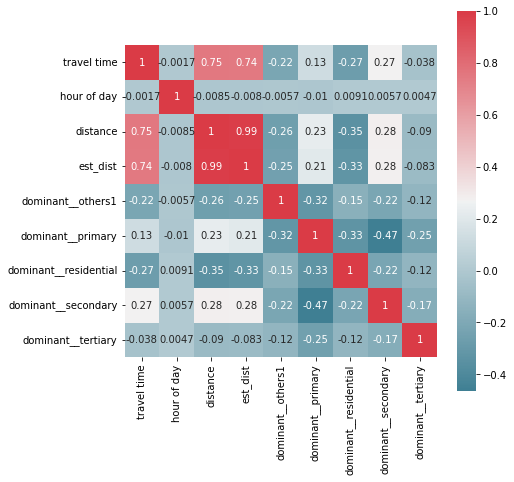

In [59]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df11.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [60]:
x = np.array(df11[['est_dist','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df11['travel time'])
x

array([[0.2973851 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.02341767, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.1427945 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.32470443, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.32141647, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.18431671, 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [61]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 6)
(3120, 6)


In [63]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
390/390 [==============================] - 1s 964us/step - loss: 1298220.1250 - mape: 98.8174 - rmse: 1139.3947 - val_loss: 1229148.0000 - val_mape: 96.4269 - val_rmse: 1108.6694
Epoch 2/500
390/390 [==============================] - 0s 825us/step - loss: 1194854.0000 - mape: 91.7601 - rmse: 1093.0938 - val_loss: 1083969.8750 - val_mape: 86.1946 - val_rmse: 1041.1388
Epoch 3/500
390/390 [==============================] - 0s 815us/step - loss: 1019133.1250 - mape: 78.8918 - rmse: 1009.5212 - val_loss: 889229.3125 - val_mape: 71.1225 - val_rmse: 942.9896
Epoch 4/500
390/390 [==============================] - 0s 776us/step - loss: 814142.9375 - mape: 63.0841 - rmse: 902.2987 - val_loss: 685954.6875 - val_mape: 55.2132 - val_rmse: 828.2238
Epoch 5/500
390/390 [==============================] - 0s 782us/step - loss: 618016.1875 - mape: 50.3106 - rmse: 786.1401 - val_loss: 507756.8438 - val_mape: 45.8900 - val_rmse: 712.5706
Epoch 6/500
390/390 [==============================] - 

Epoch 88/500
390/390 [==============================] - 0s 766us/step - loss: 130082.9531 - mape: 36.0803 - rmse: 360.6701 - val_loss: 121902.6641 - val_mape: 35.4525 - val_rmse: 349.1456
Epoch 89/500
390/390 [==============================] - 0s 818us/step - loss: 130075.4766 - mape: 35.9690 - rmse: 360.6598 - val_loss: 121929.9766 - val_mape: 35.5121 - val_rmse: 349.1847
Epoch 90/500
390/390 [==============================] - 0s 865us/step - loss: 130029.7656 - mape: 35.9426 - rmse: 360.5964 - val_loss: 121846.6484 - val_mape: 35.1354 - val_rmse: 349.0654
Epoch 91/500
390/390 [==============================] - 0s 819us/step - loss: 130044.6172 - mape: 35.7729 - rmse: 360.6170 - val_loss: 121978.9609 - val_mape: 35.7083 - val_rmse: 349.2549
Epoch 92/500
390/390 [==============================] - 0s 863us/step - loss: 130006.9297 - mape: 35.8741 - rmse: 360.5647 - val_loss: 121882.9766 - val_mape: 35.5248 - val_rmse: 349.1174
Epoch 93/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 823us/step - loss: 129431.5078 - mape: 35.6027 - rmse: 359.7659 - val_loss: 121655.9141 - val_mape: 35.0727 - val_rmse: 348.7921
Epoch 175/500
390/390 [==============================] - 0s 769us/step - loss: 129419.6641 - mape: 35.3545 - rmse: 359.7495 - val_loss: 121703.5312 - val_mape: 35.2697 - val_rmse: 348.8603
Epoch 176/500
390/390 [==============================] - 0s 825us/step - loss: 129424.1484 - mape: 35.4352 - rmse: 359.7557 - val_loss: 121687.8906 - val_mape: 35.2621 - val_rmse: 348.8379
Epoch 177/500
390/390 [==============================] - 0s 848us/step - loss: 129404.8750 - mape: 35.3773 - rmse: 359.7289 - val_loss: 121732.3359 - val_mape: 35.4236 - val_rmse: 348.9016
Epoch 178/500
390/390 [==============================] - 0s 829us/step - loss: 129417.2734 - mape: 35.5368 - rmse: 359.7461 - val_loss: 121663.9141 - val_mape: 35.0819 - val_rmse: 348.8036
Epoch 179/500
390/390 [==============================] - 0s 831us/ste

390/390 [==============================] - 0s 857us/step - loss: 129222.8125 - mape: 35.4138 - rmse: 359.4757 - val_loss: 121624.4375 - val_mape: 34.8938 - val_rmse: 348.7469
Epoch 261/500
390/390 [==============================] - 0s 904us/step - loss: 129218.6016 - mape: 35.3052 - rmse: 359.4699 - val_loss: 121647.8438 - val_mape: 35.0188 - val_rmse: 348.7805
Epoch 262/500
390/390 [==============================] - 0s 701us/step - loss: 129224.5703 - mape: 35.2165 - rmse: 359.4782 - val_loss: 121717.9922 - val_mape: 35.2772 - val_rmse: 348.8810
Epoch 263/500
390/390 [==============================] - 0s 890us/step - loss: 129229.6797 - mape: 35.4193 - rmse: 359.4853 - val_loss: 121611.1562 - val_mape: 34.8282 - val_rmse: 348.7279
Epoch 264/500
390/390 [==============================] - 0s 850us/step - loss: 129211.3047 - mape: 35.2734 - rmse: 359.4597 - val_loss: 121685.6406 - val_mape: 35.0810 - val_rmse: 348.8347
Epoch 265/500
390/390 [==============================] - 0s 830us/ste

390/390 [==============================] - 0s 862us/step - loss: 129134.6719 - mape: 35.3203 - rmse: 359.3531 - val_loss: 121646.7656 - val_mape: 34.7375 - val_rmse: 348.7790
Epoch 347/500
390/390 [==============================] - 0s 848us/step - loss: 129146.8750 - mape: 35.2459 - rmse: 359.3701 - val_loss: 121643.5078 - val_mape: 34.7190 - val_rmse: 348.7743
Epoch 348/500
390/390 [==============================] - 0s 773us/step - loss: 129130.9609 - mape: 35.1886 - rmse: 359.3480 - val_loss: 121675.0938 - val_mape: 35.0007 - val_rmse: 348.8196
Epoch 349/500
390/390 [==============================] - 0s 795us/step - loss: 129135.7656 - mape: 35.2732 - rmse: 359.3546 - val_loss: 121619.9922 - val_mape: 34.7211 - val_rmse: 348.7406
Epoch 350/500
390/390 [==============================] - 0s 790us/step - loss: 129147.7969 - mape: 35.1992 - rmse: 359.3714 - val_loss: 121650.5781 - val_mape: 34.8756 - val_rmse: 348.7844
Epoch 351/500
390/390 [==============================] - 0s 799us/ste

390/390 [==============================] - 0s 874us/step - loss: 129090.1172 - mape: 35.1404 - rmse: 359.2911 - val_loss: 121685.6719 - val_mape: 35.0406 - val_rmse: 348.8347
Epoch 433/500
390/390 [==============================] - 0s 909us/step - loss: 129087.7109 - mape: 35.2374 - rmse: 359.2878 - val_loss: 121742.8438 - val_mape: 35.1223 - val_rmse: 348.9167
Epoch 434/500
390/390 [==============================] - 0s 823us/step - loss: 129098.3516 - mape: 35.2581 - rmse: 359.3026 - val_loss: 121707.6797 - val_mape: 35.0481 - val_rmse: 348.8663
Epoch 435/500
390/390 [==============================] - 0s 829us/step - loss: 129097.7812 - mape: 35.2421 - rmse: 359.3018 - val_loss: 121670.2344 - val_mape: 34.9503 - val_rmse: 348.8126
Epoch 436/500
390/390 [==============================] - 0s 809us/step - loss: 129094.0156 - mape: 35.3160 - rmse: 359.2966 - val_loss: 121636.3672 - val_mape: 34.6200 - val_rmse: 348.7641
Epoch 437/500
390/390 [==============================] - 0s 810us/ste

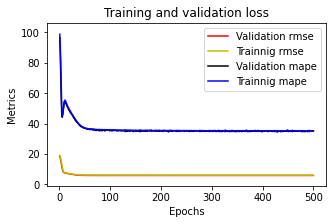

In [64]:
plotme(model3_1_1)


In [65]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
390/390 [==============================] - 0s 883us/step - loss: 1285412.0000 - mape: 97.9197 - rmse: 1133.7601 - val_loss: 1187161.1250 - val_mape: 93.4922 - val_rmse: 1089.5692
Epoch 2/500
390/390 [==============================] - 0s 747us/step - loss: 1097649.6250 - mape: 84.7166 - rmse: 1047.6877 - val_loss: 929469.3750 - val_mape: 74.2494 - val_rmse: 964.0899
Epoch 3/500
390/390 [==============================] - 0s 730us/step - loss: 807844.8125 - mape: 62.6822 - rmse: 898.8019 - val_loss: 634615.6250 - val_mape: 51.7451 - val_rmse: 796.6277
Epoch 4/500
390/390 [==============================] - 0s 734us/step - loss: 534418.6875 - mape: 47.3659 - rmse: 731.0394 - val_loss: 404717.1250 - val_mape: 44.2108 - val_rmse: 636.1738
Epoch 5/500
390/390 [==============================] - 0s 745us/step - loss: 350601.1250 - mape: 46.1206 - rmse: 592.1158 - val_loss: 276553.1562 - val_mape: 46.9758 - val_rmse: 525.8832
Epoch 6/500
390/390 [==============================] - 0s 6

Epoch 88/500
390/390 [==============================] - 0s 750us/step - loss: 129986.7734 - mape: 35.8220 - rmse: 360.5368 - val_loss: 121911.7266 - val_mape: 35.5935 - val_rmse: 349.1586
Epoch 89/500
390/390 [==============================] - 0s 721us/step - loss: 129969.3594 - mape: 35.7086 - rmse: 360.5126 - val_loss: 121920.8750 - val_mape: 35.7106 - val_rmse: 349.1717
Epoch 90/500
390/390 [==============================] - 0s 717us/step - loss: 129945.8516 - mape: 35.9351 - rmse: 360.4800 - val_loss: 121831.2891 - val_mape: 35.0275 - val_rmse: 349.0434
Epoch 91/500
390/390 [==============================] - 0s 750us/step - loss: 129959.7969 - mape: 35.6470 - rmse: 360.4994 - val_loss: 121884.9297 - val_mape: 35.4174 - val_rmse: 349.1202
Epoch 92/500
390/390 [==============================] - 0s 727us/step - loss: 129928.0078 - mape: 35.8089 - rmse: 360.4553 - val_loss: 121902.8906 - val_mape: 35.3161 - val_rmse: 349.1459
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 709us/step - loss: 129411.2734 - mape: 35.4769 - rmse: 359.7378 - val_loss: 121667.6328 - val_mape: 35.1904 - val_rmse: 348.8089
Epoch 175/500
390/390 [==============================] - 0s 758us/step - loss: 129401.9141 - mape: 35.4391 - rmse: 359.7248 - val_loss: 121625.5781 - val_mape: 35.0824 - val_rmse: 348.7486
Epoch 176/500
390/390 [==============================] - 0s 735us/step - loss: 129388.8984 - mape: 35.4507 - rmse: 359.7067 - val_loss: 121604.0703 - val_mape: 34.9679 - val_rmse: 348.7177
Epoch 177/500
390/390 [==============================] - 0s 700us/step - loss: 129368.3359 - mape: 35.5387 - rmse: 359.6781 - val_loss: 121598.8203 - val_mape: 34.5405 - val_rmse: 348.7102
Epoch 178/500
390/390 [==============================] - 0s 702us/step - loss: 129386.9531 - mape: 35.3123 - rmse: 359.7040 - val_loss: 121594.9844 - val_mape: 35.1282 - val_rmse: 348.7047
Epoch 179/500
390/390 [==============================] - 0s 758us/ste

390/390 [==============================] - 0s 737us/step - loss: 129199.0469 - mape: 35.0929 - rmse: 359.4427 - val_loss: 121763.7031 - val_mape: 35.7074 - val_rmse: 348.9466
Epoch 261/500
390/390 [==============================] - 0s 750us/step - loss: 129233.1172 - mape: 35.5679 - rmse: 359.4901 - val_loss: 121527.4375 - val_mape: 34.8850 - val_rmse: 348.6078
Epoch 262/500
390/390 [==============================] - 0s 737us/step - loss: 129226.6016 - mape: 35.3019 - rmse: 359.4810 - val_loss: 121555.0938 - val_mape: 34.9893 - val_rmse: 348.6475
Epoch 263/500
390/390 [==============================] - 0s 757us/step - loss: 129206.5859 - mape: 35.2404 - rmse: 359.4532 - val_loss: 121728.9609 - val_mape: 35.5458 - val_rmse: 348.8968
Epoch 264/500
390/390 [==============================] - 0s 771us/step - loss: 129208.0625 - mape: 35.2666 - rmse: 359.4552 - val_loss: 121839.3047 - val_mape: 35.7721 - val_rmse: 349.0549
Epoch 265/500
390/390 [==============================] - 0s 723us/ste

390/390 [==============================] - 0s 752us/step - loss: 129143.9062 - mape: 35.3388 - rmse: 359.3660 - val_loss: 121532.8203 - val_mape: 34.6336 - val_rmse: 348.6156
Epoch 347/500
390/390 [==============================] - 0s 746us/step - loss: 129156.1953 - mape: 35.2599 - rmse: 359.3831 - val_loss: 121603.0859 - val_mape: 35.0737 - val_rmse: 348.7163
Epoch 348/500
390/390 [==============================] - 0s 735us/step - loss: 129142.2734 - mape: 35.1779 - rmse: 359.3637 - val_loss: 121779.8594 - val_mape: 35.5536 - val_rmse: 348.9697
Epoch 349/500
390/390 [==============================] - 0s 731us/step - loss: 129147.2578 - mape: 35.2003 - rmse: 359.3706 - val_loss: 121833.9297 - val_mape: 35.7277 - val_rmse: 349.0472
Epoch 350/500
390/390 [==============================] - 0s 728us/step - loss: 129184.1172 - mape: 35.3419 - rmse: 359.4219 - val_loss: 121643.9688 - val_mape: 35.2698 - val_rmse: 348.7750
Epoch 351/500
390/390 [==============================] - 0s 744us/ste

390/390 [==============================] - 0s 738us/step - loss: 129132.7969 - mape: 35.3087 - rmse: 359.3505 - val_loss: 121659.7734 - val_mape: 34.8228 - val_rmse: 348.7976
Epoch 433/500
390/390 [==============================] - 0s 743us/step - loss: 129131.6719 - mape: 35.1641 - rmse: 359.3490 - val_loss: 121724.1094 - val_mape: 35.2256 - val_rmse: 348.8898
Epoch 434/500
390/390 [==============================] - 0s 728us/step - loss: 129153.8984 - mape: 35.2170 - rmse: 359.3799 - val_loss: 121763.5000 - val_mape: 35.3110 - val_rmse: 348.9463
Epoch 435/500
390/390 [==============================] - 0s 723us/step - loss: 129136.8828 - mape: 35.3217 - rmse: 359.3562 - val_loss: 121682.3828 - val_mape: 35.0328 - val_rmse: 348.8300
Epoch 436/500
390/390 [==============================] - 0s 731us/step - loss: 129146.1875 - mape: 35.1850 - rmse: 359.3691 - val_loss: 121759.5312 - val_mape: 35.3519 - val_rmse: 348.9406
Epoch 437/500
390/390 [==============================] - 0s 757us/ste

In [66]:
202.7127227783203/60

3.378545379638672

In [67]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
390/390 [==============================] - 0s 899us/step - loss: 1248651.7500 - mape: 95.4593 - rmse: 1117.4309 - val_loss: 1081513.0000 - val_mape: 85.9966 - val_rmse: 1039.9581
Epoch 2/500
390/390 [==============================] - 0s 787us/step - loss: 893591.2500 - mape: 69.1040 - rmse: 945.2996 - val_loss: 643702.6875 - val_mape: 52.3691 - val_rmse: 802.3109
Epoch 3/500
390/390 [==============================] - 0s 733us/step - loss: 489411.1875 - mape: 46.7607 - rmse: 699.5793 - val_loss: 330510.1875 - val_mape: 44.7303 - val_rmse: 574.9001
Epoch 4/500
390/390 [==============================] - 0s 745us/step - loss: 280247.7188 - mape: 48.9837 - rmse: 529.3843 - val_loss: 224979.5312 - val_mape: 51.3824 - val_rmse: 474.3201
Epoch 5/500
390/390 [==============================] - 0s 686us/step - loss: 222495.2656 - mape: 54.4462 - rmse: 471.6940 - val_loss: 203294.1406 - val_mape: 54.5157 - val_rmse: 450.8815
Epoch 6/500
390/390 [==============================] - 0s 776

Epoch 88/500
390/390 [==============================] - 0s 725us/step - loss: 129936.9688 - mape: 35.6095 - rmse: 360.4677 - val_loss: 121828.2266 - val_mape: 35.0982 - val_rmse: 349.0390
Epoch 89/500
390/390 [==============================] - 0s 729us/step - loss: 129905.1484 - mape: 35.6886 - rmse: 360.4236 - val_loss: 121747.0234 - val_mape: 35.0825 - val_rmse: 348.9227
Epoch 90/500
390/390 [==============================] - 0s 747us/step - loss: 129893.8203 - mape: 35.5277 - rmse: 360.4079 - val_loss: 122017.7266 - val_mape: 36.0137 - val_rmse: 349.3104
Epoch 91/500
390/390 [==============================] - 0s 758us/step - loss: 129885.2188 - mape: 35.7631 - rmse: 360.3959 - val_loss: 121861.8906 - val_mape: 35.4865 - val_rmse: 349.0872
Epoch 92/500
390/390 [==============================] - 0s 735us/step - loss: 129862.2812 - mape: 35.7828 - rmse: 360.3641 - val_loss: 121740.7812 - val_mape: 34.8950 - val_rmse: 348.9137
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 747us/step - loss: 129368.7891 - mape: 35.5624 - rmse: 359.6787 - val_loss: 121567.0703 - val_mape: 34.1752 - val_rmse: 348.6647
Epoch 175/500
390/390 [==============================] - 0s 756us/step - loss: 129394.6484 - mape: 35.2701 - rmse: 359.7147 - val_loss: 121757.4453 - val_mape: 35.4866 - val_rmse: 348.9376
Epoch 176/500
390/390 [==============================] - 0s 769us/step - loss: 129352.4141 - mape: 35.4864 - rmse: 359.6560 - val_loss: 121469.0234 - val_mape: 34.6435 - val_rmse: 348.5241
Epoch 177/500
390/390 [==============================] - 0s 730us/step - loss: 129395.4375 - mape: 35.1862 - rmse: 359.7158 - val_loss: 121532.4609 - val_mape: 35.2867 - val_rmse: 348.6151
Epoch 178/500
390/390 [==============================] - 0s 762us/step - loss: 129391.8125 - mape: 35.5960 - rmse: 359.7107 - val_loss: 121536.0391 - val_mape: 34.9231 - val_rmse: 348.6202
Epoch 179/500
390/390 [==============================] - 0s 766us/ste

390/390 [==============================] - 0s 745us/step - loss: 129288.5234 - mape: 35.3669 - rmse: 359.5671 - val_loss: 121667.8984 - val_mape: 35.0103 - val_rmse: 348.8093
Epoch 261/500
390/390 [==============================] - 0s 758us/step - loss: 129311.4375 - mape: 35.2356 - rmse: 359.5990 - val_loss: 121688.6250 - val_mape: 35.1812 - val_rmse: 348.8390
Epoch 262/500
390/390 [==============================] - 0s 755us/step - loss: 129273.7812 - mape: 35.3312 - rmse: 359.5466 - val_loss: 121578.6953 - val_mape: 35.0079 - val_rmse: 348.6814
Epoch 263/500
390/390 [==============================] - 0s 746us/step - loss: 129271.8594 - mape: 35.4045 - rmse: 359.5439 - val_loss: 121705.9297 - val_mape: 35.3493 - val_rmse: 348.8638
Epoch 264/500
390/390 [==============================] - 0s 824us/step - loss: 129275.1484 - mape: 35.3733 - rmse: 359.5485 - val_loss: 121535.8672 - val_mape: 34.5035 - val_rmse: 348.6199
Epoch 265/500
390/390 [==============================] - 0s 749us/ste

390/390 [==============================] - 0s 794us/step - loss: 129248.1172 - mape: 35.2018 - rmse: 359.5110 - val_loss: 121840.5156 - val_mape: 35.3653 - val_rmse: 349.0566
Epoch 347/500
390/390 [==============================] - 0s 772us/step - loss: 129274.4609 - mape: 35.3017 - rmse: 359.5476 - val_loss: 121771.2031 - val_mape: 35.0275 - val_rmse: 348.9573
Epoch 348/500
390/390 [==============================] - 0s 795us/step - loss: 129263.7422 - mape: 35.2473 - rmse: 359.5327 - val_loss: 121763.8281 - val_mape: 35.0855 - val_rmse: 348.9467
Epoch 349/500
390/390 [==============================] - 0s 787us/step - loss: 129279.4062 - mape: 35.2755 - rmse: 359.5544 - val_loss: 121765.5625 - val_mape: 35.0308 - val_rmse: 348.9492
Epoch 350/500
390/390 [==============================] - 0s 774us/step - loss: 129234.2812 - mape: 35.1711 - rmse: 359.4917 - val_loss: 121778.7969 - val_mape: 35.3688 - val_rmse: 348.9682
Epoch 351/500
390/390 [==============================] - 0s 917us/ste

390/390 [==============================] - 0s 792us/step - loss: 129208.5547 - mape: 35.2546 - rmse: 359.4559 - val_loss: 121656.9766 - val_mape: 34.9799 - val_rmse: 348.7936
Epoch 433/500
390/390 [==============================] - 0s 765us/step - loss: 129236.5625 - mape: 35.2806 - rmse: 359.4949 - val_loss: 121564.6250 - val_mape: 34.5857 - val_rmse: 348.6612
Epoch 434/500
390/390 [==============================] - 0s 731us/step - loss: 129240.8281 - mape: 35.1989 - rmse: 359.5008 - val_loss: 121608.9766 - val_mape: 35.0854 - val_rmse: 348.7248
Epoch 435/500
390/390 [==============================] - 0s 775us/step - loss: 129204.8984 - mape: 35.3434 - rmse: 359.4508 - val_loss: 121559.5703 - val_mape: 34.6925 - val_rmse: 348.6539
Epoch 436/500
390/390 [==============================] - 0s 753us/step - loss: 129224.9375 - mape: 35.1459 - rmse: 359.4787 - val_loss: 121790.1094 - val_mape: 35.4324 - val_rmse: 348.9844
Epoch 437/500
390/390 [==============================] - 0s 755us/ste

In [68]:
202.6893768310547/60

3.378156280517578

In [69]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
390/390 [==============================] - 1s 999us/step - loss: 886655.4375 - mape: 74.4274 - rmse: 941.6238 - val_loss: 226932.4531 - val_mape: 52.7722 - val_rmse: 476.3743
Epoch 2/500
390/390 [==============================] - 0s 809us/step - loss: 208212.4375 - mape: 55.3786 - rmse: 456.3030 - val_loss: 187409.1562 - val_mape: 52.8304 - val_rmse: 432.9078
Epoch 3/500
390/390 [==============================] - 0s 801us/step - loss: 188023.7500 - mape: 51.1969 - rmse: 433.6171 - val_loss: 172863.1250 - val_mape: 50.1913 - val_rmse: 415.7681
Epoch 4/500
390/390 [==============================] - 0s 795us/step - loss: 173250.7031 - mape: 48.5792 - rmse: 416.2339 - val_loss: 157678.8281 - val_mape: 46.8499 - val_rmse: 397.0879
Epoch 5/500
390/390 [==============================] - 0s 820us/step - loss: 158810.8125 - mape: 45.7656 - rmse: 398.5107 - val_loss: 143555.9844 - val_mape: 43.5285 - val_rmse: 378.8878
Epoch 6/500
390/390 [==============================] - 0s 790us/s

Epoch 45/500
390/390 [==============================] - 0s 809us/step - loss: 130651.5781 - mape: 35.5941 - rmse: 361.4576 - val_loss: 122562.0547 - val_mape: 36.2621 - val_rmse: 350.0887
Epoch 46/500
390/390 [==============================] - 0s 808us/step - loss: 130598.5156 - mape: 35.9869 - rmse: 361.3842 - val_loss: 121981.4766 - val_mape: 34.9899 - val_rmse: 349.2585
Epoch 47/500
390/390 [==============================] - 0s 790us/step - loss: 130497.0234 - mape: 35.7907 - rmse: 361.2437 - val_loss: 122168.8828 - val_mape: 35.9422 - val_rmse: 349.5266
Epoch 48/500
390/390 [==============================] - 0s 800us/step - loss: 130566.7969 - mape: 35.7448 - rmse: 361.3403 - val_loss: 122314.1953 - val_mape: 35.6188 - val_rmse: 349.7345
Epoch 49/500
390/390 [==============================] - 0s 754us/step - loss: 130518.7109 - mape: 35.9771 - rmse: 361.2737 - val_loss: 122284.8750 - val_mape: 34.4497 - val_rmse: 349.6925
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 765us/step - loss: 129572.3750 - mape: 35.3265 - rmse: 359.9616 - val_loss: 121465.8359 - val_mape: 34.8852 - val_rmse: 348.5195
Epoch 132/500
390/390 [==============================] - 0s 770us/step - loss: 129492.7266 - mape: 35.5346 - rmse: 359.8510 - val_loss: 121955.0781 - val_mape: 35.0575 - val_rmse: 349.2207
Epoch 133/500
390/390 [==============================] - 0s 760us/step - loss: 129534.5547 - mape: 35.3088 - rmse: 359.9091 - val_loss: 121385.8438 - val_mape: 34.9722 - val_rmse: 348.4047
Epoch 134/500
390/390 [==============================] - 0s 762us/step - loss: 129590.3672 - mape: 35.4663 - rmse: 359.9866 - val_loss: 121683.0391 - val_mape: 34.9164 - val_rmse: 348.8310
Epoch 135/500
390/390 [==============================] - 0s 776us/step - loss: 129635.1484 - mape: 35.4563 - rmse: 360.0488 - val_loss: 121650.4922 - val_mape: 34.7935 - val_rmse: 348.7843
Epoch 136/500
390/390 [==============================] - 0s 803us/ste

390/390 [==============================] - 0s 772us/step - loss: 129556.3594 - mape: 35.2742 - rmse: 359.9394 - val_loss: 121784.7812 - val_mape: 34.9723 - val_rmse: 348.9768
Epoch 218/500
390/390 [==============================] - 0s 742us/step - loss: 129435.9531 - mape: 35.3193 - rmse: 359.7721 - val_loss: 121586.6875 - val_mape: 34.8460 - val_rmse: 348.6928
Epoch 219/500
390/390 [==============================] - 0s 784us/step - loss: 129413.1562 - mape: 35.3260 - rmse: 359.7404 - val_loss: 122051.5625 - val_mape: 35.6466 - val_rmse: 349.3588
Epoch 220/500
390/390 [==============================] - 0s 776us/step - loss: 129525.0625 - mape: 35.3001 - rmse: 359.8959 - val_loss: 121538.7578 - val_mape: 34.5266 - val_rmse: 348.6241
Epoch 221/500
390/390 [==============================] - 0s 786us/step - loss: 129631.4141 - mape: 35.3541 - rmse: 360.0436 - val_loss: 121781.0703 - val_mape: 35.2922 - val_rmse: 348.9714
Epoch 222/500
390/390 [==============================] - 0s 766us/ste

390/390 [==============================] - 0s 792us/step - loss: 129460.3516 - mape: 35.2424 - rmse: 359.8060 - val_loss: 121649.8125 - val_mape: 35.3254 - val_rmse: 348.7833
Epoch 304/500
390/390 [==============================] - 0s 745us/step - loss: 129509.1328 - mape: 35.2666 - rmse: 359.8738 - val_loss: 122264.5312 - val_mape: 36.0572 - val_rmse: 349.6635
Epoch 305/500
390/390 [==============================] - 0s 757us/step - loss: 129484.4297 - mape: 35.4049 - rmse: 359.8394 - val_loss: 122620.3594 - val_mape: 36.3942 - val_rmse: 350.1719
Epoch 306/500
390/390 [==============================] - 0s 791us/step - loss: 129564.0547 - mape: 35.4302 - rmse: 359.9501 - val_loss: 121586.7266 - val_mape: 34.6769 - val_rmse: 348.6929
Epoch 307/500
390/390 [==============================] - 0s 771us/step - loss: 129506.8516 - mape: 35.3204 - rmse: 359.8706 - val_loss: 121644.3047 - val_mape: 34.9328 - val_rmse: 348.7754
Epoch 308/500
390/390 [==============================] - 0s 767us/ste

390/390 [==============================] - 0s 784us/step - loss: 129496.4141 - mape: 35.3326 - rmse: 359.8561 - val_loss: 121710.8125 - val_mape: 35.7248 - val_rmse: 348.8708
Epoch 390/500
390/390 [==============================] - 0s 795us/step - loss: 129584.8828 - mape: 35.2809 - rmse: 359.9790 - val_loss: 121726.8594 - val_mape: 35.2479 - val_rmse: 348.8938
Epoch 391/500
390/390 [==============================] - 0s 776us/step - loss: 129515.5234 - mape: 35.3539 - rmse: 359.8827 - val_loss: 121960.9141 - val_mape: 35.6737 - val_rmse: 349.2290
Epoch 392/500
390/390 [==============================] - 0s 810us/step - loss: 129486.9062 - mape: 35.3627 - rmse: 359.8429 - val_loss: 121440.2656 - val_mape: 35.0280 - val_rmse: 348.4828
Epoch 393/500
390/390 [==============================] - 0s 789us/step - loss: 129495.5078 - mape: 35.4052 - rmse: 359.8548 - val_loss: 121874.3672 - val_mape: 34.7598 - val_rmse: 349.1051
Epoch 394/500
390/390 [==============================] - 0s 841us/ste

390/390 [==============================] - 0s 792us/step - loss: 129587.3516 - mape: 35.2841 - rmse: 359.9824 - val_loss: 122155.3672 - val_mape: 36.1646 - val_rmse: 349.5073
Epoch 476/500
390/390 [==============================] - 0s 743us/step - loss: 129511.9141 - mape: 35.3866 - rmse: 359.8776 - val_loss: 121992.4844 - val_mape: 35.7432 - val_rmse: 349.2742
Epoch 477/500
390/390 [==============================] - 0s 787us/step - loss: 129503.3594 - mape: 35.3329 - rmse: 359.8658 - val_loss: 121956.6953 - val_mape: 34.8913 - val_rmse: 349.2230
Epoch 478/500
390/390 [==============================] - 0s 759us/step - loss: 129481.0312 - mape: 35.3498 - rmse: 359.8347 - val_loss: 121382.9922 - val_mape: 34.4814 - val_rmse: 348.4006
Epoch 479/500
390/390 [==============================] - 0s 769us/step - loss: 129492.3047 - mape: 35.3568 - rmse: 359.8504 - val_loss: 121984.2500 - val_mape: 35.2558 - val_rmse: 349.2625
Epoch 480/500
390/390 [==============================] - 0s 753us/ste

In [70]:
202.09515380859375/60

3.3682525634765623

In [71]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 630840.2500 - mape: 67.4767 - rmse: 794.2545 - val_loss: 190843.6094 - val_mape: 52.4547 - val_rmse: 436.8565
Epoch 2/500
390/390 [==============================] - 0s 849us/step - loss: 186061.5000 - mape: 50.8703 - rmse: 431.3485 - val_loss: 165541.6250 - val_mape: 48.7199 - val_rmse: 406.8681
Epoch 3/500
390/390 [==============================] - 0s 825us/step - loss: 161736.2031 - mape: 46.3582 - rmse: 402.1644 - val_loss: 144555.8125 - val_mape: 46.5768 - val_rmse: 380.2050
Epoch 4/500
390/390 [==============================] - 0s 865us/step - loss: 142250.0469 - mape: 41.8415 - rmse: 377.1605 - val_loss: 127323.8672 - val_mape: 38.1529 - val_rmse: 356.8247
Epoch 5/500
390/390 [==============================] - 0s 831us/step - loss: 133349.9844 - mape: 38.2552 - rmse: 365.1712 - val_loss: 123834.2578 - val_mape: 37.3207 - val_rmse: 351.9009
Epoch 6/500
390/390 [==============================] - 0s 869us/ste

Epoch 45/500
390/390 [==============================] - 0s 875us/step - loss: 131313.3594 - mape: 36.2746 - rmse: 362.3719 - val_loss: 122719.0859 - val_mape: 35.3513 - val_rmse: 350.3128
Epoch 46/500
390/390 [==============================] - 0s 870us/step - loss: 131353.5312 - mape: 36.0810 - rmse: 362.4273 - val_loss: 122959.9453 - val_mape: 37.3497 - val_rmse: 350.6565
Epoch 47/500
390/390 [==============================] - 0s 891us/step - loss: 131492.2969 - mape: 36.3401 - rmse: 362.6187 - val_loss: 122368.9453 - val_mape: 35.6401 - val_rmse: 349.8127
Epoch 48/500
390/390 [==============================] - 0s 850us/step - loss: 131267.9531 - mape: 36.2087 - rmse: 362.3092 - val_loss: 122616.8906 - val_mape: 34.2333 - val_rmse: 350.1670
Epoch 49/500
390/390 [==============================] - 0s 819us/step - loss: 131284.0000 - mape: 36.1900 - rmse: 362.3313 - val_loss: 122216.5938 - val_mape: 34.5648 - val_rmse: 349.5949
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 974us/step - loss: 131283.9688 - mape: 36.2768 - rmse: 362.3313 - val_loss: 122165.7500 - val_mape: 35.6785 - val_rmse: 349.5222
Epoch 132/500
390/390 [==============================] - 0s 894us/step - loss: 131284.5781 - mape: 36.1479 - rmse: 362.3321 - val_loss: 122150.8828 - val_mape: 35.0561 - val_rmse: 349.5009
Epoch 133/500
390/390 [==============================] - 0s 890us/step - loss: 131259.4688 - mape: 36.0307 - rmse: 362.2975 - val_loss: 121852.7969 - val_mape: 36.1249 - val_rmse: 349.0742
Epoch 134/500
390/390 [==============================] - 0s 926us/step - loss: 131429.3281 - mape: 36.3508 - rmse: 362.5318 - val_loss: 122054.0625 - val_mape: 35.7140 - val_rmse: 349.3624
Epoch 135/500
390/390 [==============================] - 0s 909us/step - loss: 131266.2969 - mape: 36.2372 - rmse: 362.3069 - val_loss: 123581.8359 - val_mape: 37.7806 - val_rmse: 351.5421
Epoch 136/500
390/390 [==============================] - 0s 971us/ste

390/390 [==============================] - 0s 877us/step - loss: 131264.5625 - mape: 36.1707 - rmse: 362.3045 - val_loss: 122341.8906 - val_mape: 35.7555 - val_rmse: 349.7740
Epoch 218/500
390/390 [==============================] - 0s 1ms/step - loss: 131325.6875 - mape: 36.0294 - rmse: 362.3889 - val_loss: 123314.8828 - val_mape: 37.9867 - val_rmse: 351.1622
Epoch 219/500
390/390 [==============================] - 0s 1ms/step - loss: 131373.8125 - mape: 36.2925 - rmse: 362.4553 - val_loss: 122402.4531 - val_mape: 34.9998 - val_rmse: 349.8606
Epoch 220/500
390/390 [==============================] - 0s 1ms/step - loss: 131339.3125 - mape: 36.1386 - rmse: 362.4077 - val_loss: 122656.4922 - val_mape: 36.3776 - val_rmse: 350.2235
Epoch 221/500
390/390 [==============================] - 0s 871us/step - loss: 131445.1875 - mape: 36.3785 - rmse: 362.5537 - val_loss: 122524.8438 - val_mape: 35.4317 - val_rmse: 350.0355
Epoch 222/500
390/390 [==============================] - 0s 920us/step - lo

390/390 [==============================] - 0s 1ms/step - loss: 131295.8906 - mape: 36.1568 - rmse: 362.3477 - val_loss: 122329.6484 - val_mape: 34.9042 - val_rmse: 349.7566
Epoch 304/500
390/390 [==============================] - 0s 1ms/step - loss: 131453.9844 - mape: 36.1466 - rmse: 362.5658 - val_loss: 122528.4297 - val_mape: 36.0057 - val_rmse: 350.0406
Epoch 305/500
390/390 [==============================] - 0s 859us/step - loss: 131274.7500 - mape: 36.2050 - rmse: 362.3186 - val_loss: 121921.3125 - val_mape: 35.8427 - val_rmse: 349.1723
Epoch 306/500
390/390 [==============================] - 0s 867us/step - loss: 131280.4062 - mape: 36.1855 - rmse: 362.3264 - val_loss: 122450.2891 - val_mape: 35.0120 - val_rmse: 349.9290
Epoch 307/500
390/390 [==============================] - 0s 861us/step - loss: 131214.1406 - mape: 36.1819 - rmse: 362.2349 - val_loss: 123768.4609 - val_mape: 37.4004 - val_rmse: 351.8074
Epoch 308/500
390/390 [==============================] - 0s 877us/step - 

390/390 [==============================] - 0s 945us/step - loss: 131315.1719 - mape: 36.2415 - rmse: 362.3744 - val_loss: 122927.1094 - val_mape: 36.4746 - val_rmse: 350.6096
Epoch 390/500
390/390 [==============================] - 0s 923us/step - loss: 131180.8281 - mape: 36.2271 - rmse: 362.1889 - val_loss: 123159.4844 - val_mape: 37.0938 - val_rmse: 350.9409
Epoch 391/500
390/390 [==============================] - 0s 922us/step - loss: 131296.6250 - mape: 36.1763 - rmse: 362.3488 - val_loss: 122553.9922 - val_mape: 36.0943 - val_rmse: 350.0771
Epoch 392/500
390/390 [==============================] - 0s 1ms/step - loss: 131362.8906 - mape: 36.2379 - rmse: 362.4402 - val_loss: 122952.4844 - val_mape: 36.9274 - val_rmse: 350.6458
Epoch 393/500
390/390 [==============================] - 0s 1ms/step - loss: 131275.9062 - mape: 36.1689 - rmse: 362.3202 - val_loss: 122706.5547 - val_mape: 36.3386 - val_rmse: 350.2950
Epoch 394/500
390/390 [==============================] - 0s 1ms/step - lo

390/390 [==============================] - 0s 875us/step - loss: 131344.1719 - mape: 36.2014 - rmse: 362.4144 - val_loss: 122992.1875 - val_mape: 36.9171 - val_rmse: 350.7024
Epoch 476/500
390/390 [==============================] - 0s 868us/step - loss: 131296.3750 - mape: 36.0777 - rmse: 362.3484 - val_loss: 123219.5781 - val_mape: 37.3842 - val_rmse: 351.0265
Epoch 477/500
390/390 [==============================] - 0s 869us/step - loss: 131288.6719 - mape: 36.2816 - rmse: 362.3378 - val_loss: 123929.7031 - val_mape: 37.8987 - val_rmse: 352.0365
Epoch 478/500
390/390 [==============================] - 0s 867us/step - loss: 131332.8438 - mape: 36.1956 - rmse: 362.3987 - val_loss: 122585.7266 - val_mape: 36.4838 - val_rmse: 350.1224
Epoch 479/500
390/390 [==============================] - 0s 859us/step - loss: 131328.5469 - mape: 36.2225 - rmse: 362.3928 - val_loss: 121894.9141 - val_mape: 35.1808 - val_rmse: 349.1345
Epoch 480/500
390/390 [==============================] - 0s 862us/ste

In [72]:
202.09852600097656/60

3.3683087666829428

#### 2. Target (mean) encoding of dominated roadtype

In [75]:
df22 = df1.iloc[:,0:7].copy()
df22 = df22.drop('hour of day',axis=1)
df22.head()

travel time  distance  est_dist  similarity  similarity_dijk    1st ranked
0         1163  0.578883  0.297385    0.810945         0.895604       primary
1          347  0.048963  0.023418    0.791667         0.863636       service
2          720  0.268455  0.142794    0.681159         0.758065       primary
3          355  0.056803  0.043956    0.406250         0.309524  unclassified
4          356  0.076939  0.058963    0.387755         0.452381   residential

In [76]:
te = TargetEncoder()
df22['1st ranked'] = te.fit_transform(df22['1st ranked'],df22['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [77]:
df22.head()

travel time  distance  est_dist  similarity  similarity_dijk   1st ranked
0         1163  0.578883  0.297385    0.810945         0.895604  1091.102661
1          347  0.048963  0.023418    0.791667         0.863636   567.669463
2          720  0.268455  0.142794    0.681159         0.758065  1091.102661
3          355  0.056803  0.043956    0.406250         0.309524   643.909535
4          356  0.076939  0.058963    0.387755         0.452381   637.383929

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

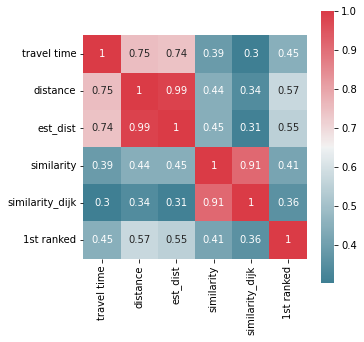

In [78]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df22.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [79]:
x = np.array(df22[['est_dist','1st ranked']])
y = np.array(df22['travel time'])
x

array([[2.97385102e-01, 1.09110266e+03],
       [2.34176744e-02, 5.67669463e+02],
       [1.42794495e-01, 1.09110266e+03],
       ...,
       [3.24704428e-01, 1.09110266e+03],
       [3.21416466e-01, 1.09110266e+03],
       [1.84316708e-01, 1.09110266e+03]])

In [80]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 2)
(3120, 2)


In [82]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
390/390 [==============================] - 0s 914us/step - loss: 385097.7188 - mape: 57.0326 - rmse: 620.5624 - val_loss: 229585.3906 - val_mape: 55.3613 - val_rmse: 479.1507
Epoch 2/500
390/390 [==============================] - 0s 713us/step - loss: 235833.8438 - mape: 55.8396 - rmse: 485.6273 - val_loss: 229565.6250 - val_mape: 54.6381 - val_rmse: 479.1301
Epoch 3/500
390/390 [==============================] - 0s 702us/step - loss: 235832.9688 - mape: 55.8807 - rmse: 485.6264 - val_loss: 229411.6875 - val_mape: 55.2823 - val_rmse: 478.9694
Epoch 4/500
390/390 [==============================] - 0s 752us/step - loss: 235612.8438 - mape: 55.7454 - rmse: 485.3997 - val_loss: 229365.7812 - val_mape: 55.6576 - val_rmse: 478.9215
Epoch 5/500
390/390 [==============================] - 0s 704us/step - loss: 235574.2188 - mape: 55.9118 - rmse: 485.3599 - val_loss: 229495.9375 - val_mape: 53.9856 - val_rmse: 479.0573
Epoch 6/500
390/390 [==============================] - 0s 742us/s

Epoch 45/500
390/390 [==============================] - 0s 733us/step - loss: 224855.4062 - mape: 54.2428 - rmse: 474.1892 - val_loss: 217883.8281 - val_mape: 55.1422 - val_rmse: 466.7803
Epoch 46/500
390/390 [==============================] - 0s 731us/step - loss: 224167.8281 - mape: 54.1781 - rmse: 473.4637 - val_loss: 216817.2031 - val_mape: 52.4321 - val_rmse: 465.6364
Epoch 47/500
390/390 [==============================] - 0s 760us/step - loss: 223249.6406 - mape: 54.0400 - rmse: 472.4930 - val_loss: 217097.8125 - val_mape: 51.1250 - val_rmse: 465.9376
Epoch 48/500
390/390 [==============================] - 0s 844us/step - loss: 223108.2188 - mape: 54.0246 - rmse: 472.3433 - val_loss: 215730.4219 - val_mape: 51.8303 - val_rmse: 464.4679
Epoch 49/500
390/390 [==============================] - 0s 828us/step - loss: 222412.6562 - mape: 53.7686 - rmse: 471.6065 - val_loss: 214691.2656 - val_mape: 52.5076 - val_rmse: 463.3479
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 756us/step - loss: 145633.3281 - mape: 39.6171 - rmse: 381.6194 - val_loss: 136838.4688 - val_mape: 36.7950 - val_rmse: 369.9168
Epoch 132/500
390/390 [==============================] - 0s 710us/step - loss: 145142.1875 - mape: 39.3795 - rmse: 380.9753 - val_loss: 135508.6406 - val_mape: 39.6132 - val_rmse: 368.1150
Epoch 133/500
390/390 [==============================] - 0s 666us/step - loss: 146246.9844 - mape: 39.4887 - rmse: 382.4225 - val_loss: 135264.0156 - val_mape: 37.2527 - val_rmse: 367.7826
Epoch 134/500
390/390 [==============================] - 0s 734us/step - loss: 144389.4844 - mape: 39.3268 - rmse: 379.9862 - val_loss: 136651.7344 - val_mape: 35.4134 - val_rmse: 369.6644
Epoch 135/500
390/390 [==============================] - 0s 717us/step - loss: 143933.7500 - mape: 39.1256 - rmse: 379.3860 - val_loss: 134012.1406 - val_mape: 38.9495 - val_rmse: 366.0767
Epoch 136/500
390/390 [==============================] - 0s 712us/ste

390/390 [==============================] - 0s 692us/step - loss: 134439.7031 - mape: 36.1070 - rmse: 366.6602 - val_loss: 127210.5469 - val_mape: 39.3432 - val_rmse: 356.6659
Epoch 218/500
390/390 [==============================] - 0s 685us/step - loss: 134500.7500 - mape: 36.2853 - rmse: 366.7434 - val_loss: 124692.1328 - val_mape: 36.8560 - val_rmse: 353.1177
Epoch 219/500
390/390 [==============================] - 0s 740us/step - loss: 134413.3906 - mape: 36.1938 - rmse: 366.6243 - val_loss: 129000.1094 - val_mape: 40.5234 - val_rmse: 359.1659
Epoch 220/500
390/390 [==============================] - 0s 731us/step - loss: 134893.0312 - mape: 36.3317 - rmse: 367.2779 - val_loss: 124275.6797 - val_mape: 35.9831 - val_rmse: 352.5276
Epoch 221/500
390/390 [==============================] - 0s 762us/step - loss: 135066.9531 - mape: 36.3262 - rmse: 367.5146 - val_loss: 124221.3984 - val_mape: 34.8731 - val_rmse: 352.4506
Epoch 222/500
390/390 [==============================] - 0s 687us/ste

390/390 [==============================] - 0s 687us/step - loss: 134804.0938 - mape: 36.5937 - rmse: 367.1568 - val_loss: 127644.8203 - val_mape: 40.2808 - val_rmse: 357.2741
Epoch 304/500
390/390 [==============================] - 0s 733us/step - loss: 134435.1875 - mape: 36.6077 - rmse: 366.6541 - val_loss: 127786.9219 - val_mape: 40.3748 - val_rmse: 357.4730
Epoch 305/500
390/390 [==============================] - 0s 727us/step - loss: 134048.2656 - mape: 36.6050 - rmse: 366.1260 - val_loss: 123661.3984 - val_mape: 35.7296 - val_rmse: 351.6552
Epoch 306/500
390/390 [==============================] - 0s 701us/step - loss: 134017.1094 - mape: 36.6240 - rmse: 366.0835 - val_loss: 124064.1953 - val_mape: 34.2487 - val_rmse: 352.2275
Epoch 307/500
390/390 [==============================] - 0s 726us/step - loss: 134957.3125 - mape: 36.7640 - rmse: 367.3654 - val_loss: 123677.3672 - val_mape: 35.9181 - val_rmse: 351.6779
Epoch 308/500
390/390 [==============================] - 0s 717us/ste

390/390 [==============================] - 0s 682us/step - loss: 133737.9844 - mape: 36.6050 - rmse: 365.7021 - val_loss: 133606.2188 - val_mape: 43.4491 - val_rmse: 365.5219
Epoch 390/500
390/390 [==============================] - 0s 680us/step - loss: 135009.2500 - mape: 36.8804 - rmse: 367.4360 - val_loss: 123636.9531 - val_mape: 35.1790 - val_rmse: 351.6205
Epoch 391/500
390/390 [==============================] - 0s 838us/step - loss: 134577.3438 - mape: 36.7901 - rmse: 366.8478 - val_loss: 123602.3047 - val_mape: 35.9832 - val_rmse: 351.5712
Epoch 392/500
390/390 [==============================] - 0s 736us/step - loss: 133981.6250 - mape: 36.7348 - rmse: 366.0350 - val_loss: 123750.9062 - val_mape: 36.5788 - val_rmse: 351.7825
Epoch 393/500
390/390 [==============================] - 0s 760us/step - loss: 134107.5625 - mape: 36.7006 - rmse: 366.2070 - val_loss: 123582.8281 - val_mape: 35.5902 - val_rmse: 351.5435
Epoch 394/500
390/390 [==============================] - 0s 701us/ste

390/390 [==============================] - 0s 707us/step - loss: 134134.7656 - mape: 36.7500 - rmse: 366.2441 - val_loss: 125819.6406 - val_mape: 39.1599 - val_rmse: 354.7106
Epoch 476/500
390/390 [==============================] - 0s 726us/step - loss: 134018.1406 - mape: 36.7514 - rmse: 366.0849 - val_loss: 126776.5781 - val_mape: 32.1663 - val_rmse: 356.0570
Epoch 477/500
390/390 [==============================] - 0s 726us/step - loss: 135081.3594 - mape: 36.8620 - rmse: 367.5341 - val_loss: 127960.1719 - val_mape: 40.6537 - val_rmse: 357.7152
Epoch 478/500
390/390 [==============================] - 0s 727us/step - loss: 135123.0156 - mape: 36.8900 - rmse: 367.5908 - val_loss: 125833.6719 - val_mape: 32.6829 - val_rmse: 354.7304
Epoch 479/500
390/390 [==============================] - 0s 685us/step - loss: 134262.4375 - mape: 36.7260 - rmse: 366.4184 - val_loss: 123777.6094 - val_mape: 34.7311 - val_rmse: 351.8204
Epoch 480/500
390/390 [==============================] - 0s 694us/ste

In [83]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
390/390 [==============================] - 1s 862us/step - loss: 325113.8438 - mape: 56.4928 - rmse: 570.1876 - val_loss: 229659.9531 - val_mape: 55.9169 - val_rmse: 479.2285
Epoch 2/500
390/390 [==============================] - 0s 699us/step - loss: 235915.9844 - mape: 55.8828 - rmse: 485.7118 - val_loss: 229854.5781 - val_mape: 56.5492 - val_rmse: 479.4315
Epoch 3/500
390/390 [==============================] - 0s 707us/step - loss: 235784.5781 - mape: 55.7980 - rmse: 485.5765 - val_loss: 229303.4688 - val_mape: 55.5071 - val_rmse: 478.8564
Epoch 4/500
390/390 [==============================] - 0s 693us/step - loss: 235873.6250 - mape: 55.9269 - rmse: 485.6682 - val_loss: 229238.8125 - val_mape: 54.4007 - val_rmse: 478.7889
Epoch 5/500
390/390 [==============================] - 0s 730us/step - loss: 235691.0312 - mape: 55.7328 - rmse: 485.4802 - val_loss: 229151.6562 - val_mape: 55.9880 - val_rmse: 478.6979
Epoch 6/500
390/390 [==============================] - 0s 777us/s

Epoch 45/500
390/390 [==============================] - 0s 741us/step - loss: 200557.4375 - mape: 50.3905 - rmse: 447.8364 - val_loss: 191128.3906 - val_mape: 50.3123 - val_rmse: 437.1823
Epoch 46/500
390/390 [==============================] - 0s 749us/step - loss: 198425.8125 - mape: 50.0450 - rmse: 445.4501 - val_loss: 188913.0469 - val_mape: 49.5386 - val_rmse: 434.6413
Epoch 47/500
390/390 [==============================] - 0s 844us/step - loss: 197281.7969 - mape: 49.6930 - rmse: 444.1642 - val_loss: 186881.4375 - val_mape: 49.2673 - val_rmse: 432.2979
Epoch 48/500
390/390 [==============================] - 0s 757us/step - loss: 194479.8750 - mape: 49.4971 - rmse: 440.9987 - val_loss: 185804.1406 - val_mape: 50.6807 - val_rmse: 431.0500
Epoch 49/500
390/390 [==============================] - 0s 708us/step - loss: 193006.3438 - mape: 49.0948 - rmse: 439.3249 - val_loss: 185425.3750 - val_mape: 44.8736 - val_rmse: 430.6105
Epoch 50/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 719us/step - loss: 136166.6094 - mape: 36.4100 - rmse: 369.0076 - val_loss: 124021.1484 - val_mape: 36.3682 - val_rmse: 352.1664
Epoch 132/500
390/390 [==============================] - 0s 741us/step - loss: 134974.4844 - mape: 36.1261 - rmse: 367.3887 - val_loss: 133199.0469 - val_mape: 29.6117 - val_rmse: 364.9644
Epoch 133/500
390/390 [==============================] - 0s 689us/step - loss: 134966.8438 - mape: 36.2630 - rmse: 367.3783 - val_loss: 123999.2734 - val_mape: 33.7640 - val_rmse: 352.1353
Epoch 134/500
390/390 [==============================] - 0s 740us/step - loss: 135194.4375 - mape: 36.2205 - rmse: 367.6880 - val_loss: 127262.5781 - val_mape: 31.1705 - val_rmse: 356.7388
Epoch 135/500
390/390 [==============================] - 0s 725us/step - loss: 133861.2969 - mape: 36.0564 - rmse: 365.8706 - val_loss: 123626.3281 - val_mape: 35.1274 - val_rmse: 351.6053
Epoch 136/500
390/390 [==============================] - 0s 727us/ste

390/390 [==============================] - 0s 696us/step - loss: 134130.2969 - mape: 36.3129 - rmse: 366.2380 - val_loss: 124752.9766 - val_mape: 38.7674 - val_rmse: 353.2039
Epoch 218/500
390/390 [==============================] - 0s 725us/step - loss: 134197.7188 - mape: 36.7354 - rmse: 366.3301 - val_loss: 123196.1641 - val_mape: 36.1226 - val_rmse: 350.9931
Epoch 219/500
390/390 [==============================] - 0s 723us/step - loss: 135886.2344 - mape: 36.8328 - rmse: 368.6275 - val_loss: 123961.7500 - val_mape: 33.5163 - val_rmse: 352.0820
Epoch 220/500
390/390 [==============================] - 0s 683us/step - loss: 134001.3906 - mape: 36.6342 - rmse: 366.0620 - val_loss: 127519.7812 - val_mape: 40.7116 - val_rmse: 357.0991
Epoch 221/500
390/390 [==============================] - 0s 759us/step - loss: 134115.4844 - mape: 36.6081 - rmse: 366.2178 - val_loss: 125293.0469 - val_mape: 33.5976 - val_rmse: 353.9676
Epoch 222/500
390/390 [==============================] - 0s 720us/ste

390/390 [==============================] - 0s 752us/step - loss: 132934.7188 - mape: 36.0069 - rmse: 364.6021 - val_loss: 124193.2109 - val_mape: 38.3817 - val_rmse: 352.4106
Epoch 304/500
390/390 [==============================] - 0s 712us/step - loss: 134694.8594 - mape: 36.4523 - rmse: 367.0080 - val_loss: 122867.5781 - val_mape: 35.9685 - val_rmse: 350.5247
Epoch 305/500
390/390 [==============================] - 0s 714us/step - loss: 133108.7344 - mape: 36.1674 - rmse: 364.8407 - val_loss: 123451.2344 - val_mape: 37.0979 - val_rmse: 351.3563
Epoch 306/500
390/390 [==============================] - 0s 731us/step - loss: 133550.5312 - mape: 36.3057 - rmse: 365.4456 - val_loss: 124091.1484 - val_mape: 32.5545 - val_rmse: 352.2657
Epoch 307/500
390/390 [==============================] - 0s 711us/step - loss: 134551.5781 - mape: 36.5257 - rmse: 366.8127 - val_loss: 123574.0234 - val_mape: 37.1574 - val_rmse: 351.5310
Epoch 308/500
390/390 [==============================] - 0s 725us/ste

390/390 [==============================] - 0s 704us/step - loss: 134415.3594 - mape: 36.4321 - rmse: 366.6270 - val_loss: 123297.3125 - val_mape: 36.4071 - val_rmse: 351.1372
Epoch 390/500
390/390 [==============================] - 0s 726us/step - loss: 133785.6719 - mape: 36.3459 - rmse: 365.7672 - val_loss: 123279.0156 - val_mape: 33.6504 - val_rmse: 351.1111
Epoch 391/500
390/390 [==============================] - 0s 728us/step - loss: 133129.6562 - mape: 36.2539 - rmse: 364.8694 - val_loss: 122659.5391 - val_mape: 35.4728 - val_rmse: 350.2278
Epoch 392/500
390/390 [==============================] - 0s 728us/step - loss: 134289.4531 - mape: 36.4025 - rmse: 366.4553 - val_loss: 123279.8750 - val_mape: 33.3312 - val_rmse: 351.1123
Epoch 393/500
390/390 [==============================] - 0s 718us/step - loss: 133420.9219 - mape: 36.2813 - rmse: 365.2683 - val_loss: 122866.2500 - val_mape: 35.8333 - val_rmse: 350.5228
Epoch 394/500
390/390 [==============================] - 0s 707us/ste

390/390 [==============================] - 0s 765us/step - loss: 133907.3125 - mape: 36.2943 - rmse: 365.9335 - val_loss: 124725.4531 - val_mape: 38.7030 - val_rmse: 353.1649
Epoch 476/500
390/390 [==============================] - 0s 742us/step - loss: 133102.5469 - mape: 36.0432 - rmse: 364.8322 - val_loss: 124346.6797 - val_mape: 38.2898 - val_rmse: 352.6282
Epoch 477/500
390/390 [==============================] - 0s 723us/step - loss: 133595.4375 - mape: 36.3230 - rmse: 365.5071 - val_loss: 124362.0000 - val_mape: 32.0949 - val_rmse: 352.6500
Epoch 478/500
390/390 [==============================] - 0s 694us/step - loss: 133860.8281 - mape: 36.3258 - rmse: 365.8700 - val_loss: 123727.3672 - val_mape: 37.4058 - val_rmse: 351.7490
Epoch 479/500
390/390 [==============================] - 0s 768us/step - loss: 133668.2188 - mape: 36.3225 - rmse: 365.6067 - val_loss: 122850.3359 - val_mape: 36.3647 - val_rmse: 350.5001
Epoch 480/500
390/390 [==============================] - 0s 721us/ste

In [84]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
390/390 [==============================] - 0s 909us/step - loss: 300736.3125 - mape: 56.7531 - rmse: 548.3943 - val_loss: 229865.2031 - val_mape: 53.8740 - val_rmse: 479.4426
Epoch 2/500
390/390 [==============================] - 0s 799us/step - loss: 236063.1562 - mape: 55.7731 - rmse: 485.8633 - val_loss: 230077.2344 - val_mape: 57.0320 - val_rmse: 479.6637
Epoch 3/500
390/390 [==============================] - 0s 784us/step - loss: 236087.7031 - mape: 55.8445 - rmse: 485.8886 - val_loss: 229207.6875 - val_mape: 54.2549 - val_rmse: 478.7564
Epoch 4/500
390/390 [==============================] - 0s 730us/step - loss: 235593.5000 - mape: 55.7387 - rmse: 485.3798 - val_loss: 229364.2500 - val_mape: 53.5369 - val_rmse: 478.9199
Epoch 5/500
390/390 [==============================] - 0s 778us/step - loss: 235523.3281 - mape: 55.7815 - rmse: 485.3075 - val_loss: 228707.7344 - val_mape: 55.8883 - val_rmse: 478.2340
Epoch 6/500
390/390 [==============================] - 0s 748us/s

Epoch 45/500
390/390 [==============================] - 0s 778us/step - loss: 149184.6562 - mape: 39.9214 - rmse: 386.2443 - val_loss: 149973.2031 - val_mape: 47.5534 - val_rmse: 387.2637
Epoch 46/500
390/390 [==============================] - 0s 750us/step - loss: 149724.0312 - mape: 39.7803 - rmse: 386.9419 - val_loss: 140468.7031 - val_mape: 43.5428 - val_rmse: 374.7915
Epoch 47/500
390/390 [==============================] - 0s 748us/step - loss: 147684.2656 - mape: 39.3736 - rmse: 384.2971 - val_loss: 134677.8281 - val_mape: 37.4979 - val_rmse: 366.9848
Epoch 48/500
390/390 [==============================] - 0s 778us/step - loss: 147113.3906 - mape: 38.9450 - rmse: 383.5536 - val_loss: 138616.1406 - val_mape: 43.2103 - val_rmse: 372.3119
Epoch 49/500
390/390 [==============================] - 0s 764us/step - loss: 144065.2969 - mape: 38.5733 - rmse: 379.5594 - val_loss: 138367.4531 - val_mape: 32.7920 - val_rmse: 371.9778
Epoch 50/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 777us/step - loss: 135017.6875 - mape: 36.9734 - rmse: 367.4475 - val_loss: 129030.6641 - val_mape: 41.3713 - val_rmse: 359.2084
Epoch 132/500
390/390 [==============================] - 0s 849us/step - loss: 135997.7500 - mape: 37.0542 - rmse: 368.7787 - val_loss: 123624.7188 - val_mape: 37.0775 - val_rmse: 351.6031
Epoch 133/500
390/390 [==============================] - 0s 812us/step - loss: 135269.7812 - mape: 37.0201 - rmse: 367.7904 - val_loss: 123734.8906 - val_mape: 36.9924 - val_rmse: 351.7597
Epoch 134/500
390/390 [==============================] - 0s 809us/step - loss: 135455.3594 - mape: 37.0145 - rmse: 368.0426 - val_loss: 139475.4219 - val_mape: 28.7429 - val_rmse: 373.4641
Epoch 135/500
390/390 [==============================] - 0s 774us/step - loss: 136372.9844 - mape: 36.9658 - rmse: 369.2871 - val_loss: 123774.6562 - val_mape: 37.3918 - val_rmse: 351.8162
Epoch 136/500
390/390 [==============================] - 0s 776us/ste

390/390 [==============================] - 0s 727us/step - loss: 135544.6094 - mape: 36.8428 - rmse: 368.1638 - val_loss: 123421.4766 - val_mape: 37.0729 - val_rmse: 351.3139
Epoch 218/500
390/390 [==============================] - 0s 722us/step - loss: 134641.4844 - mape: 36.6208 - rmse: 366.9353 - val_loss: 123420.4141 - val_mape: 36.7541 - val_rmse: 351.3124
Epoch 219/500
390/390 [==============================] - 0s 765us/step - loss: 134818.2344 - mape: 36.7120 - rmse: 367.1760 - val_loss: 123299.4141 - val_mape: 36.8447 - val_rmse: 351.1402
Epoch 220/500
390/390 [==============================] - 0s 746us/step - loss: 135478.0000 - mape: 36.8684 - rmse: 368.0734 - val_loss: 123426.6328 - val_mape: 33.9913 - val_rmse: 351.3213
Epoch 221/500
390/390 [==============================] - 0s 736us/step - loss: 135586.5938 - mape: 36.8147 - rmse: 368.2209 - val_loss: 123311.0234 - val_mape: 36.9288 - val_rmse: 351.1567
Epoch 222/500
390/390 [==============================] - 0s 756us/ste

390/390 [==============================] - 0s 769us/step - loss: 134887.9219 - mape: 36.8037 - rmse: 367.2709 - val_loss: 123163.9453 - val_mape: 36.2505 - val_rmse: 350.9472
Epoch 304/500
390/390 [==============================] - 0s 745us/step - loss: 134626.2656 - mape: 36.7408 - rmse: 366.9145 - val_loss: 123322.4609 - val_mape: 34.4075 - val_rmse: 351.1730
Epoch 305/500
390/390 [==============================] - 0s 798us/step - loss: 134867.1094 - mape: 36.6753 - rmse: 367.2426 - val_loss: 124585.8047 - val_mape: 32.9343 - val_rmse: 352.9671
Epoch 306/500
390/390 [==============================] - 0s 773us/step - loss: 135773.8594 - mape: 36.7913 - rmse: 368.4750 - val_loss: 132420.3125 - val_mape: 29.8085 - val_rmse: 363.8960
Epoch 307/500
390/390 [==============================] - 0s 761us/step - loss: 134518.2812 - mape: 36.6546 - rmse: 366.7673 - val_loss: 128289.3438 - val_mape: 41.0822 - val_rmse: 358.1750
Epoch 308/500
390/390 [==============================] - 0s 746us/ste

390/390 [==============================] - 0s 786us/step - loss: 135494.8281 - mape: 36.7480 - rmse: 368.0962 - val_loss: 125308.4922 - val_mape: 38.5860 - val_rmse: 353.9894
Epoch 390/500
390/390 [==============================] - 0s 786us/step - loss: 134764.4219 - mape: 36.5855 - rmse: 367.1028 - val_loss: 126586.4375 - val_mape: 39.8520 - val_rmse: 355.7899
Epoch 391/500
390/390 [==============================] - 0s 745us/step - loss: 134696.0156 - mape: 36.6935 - rmse: 367.0096 - val_loss: 123168.1016 - val_mape: 35.5737 - val_rmse: 350.9531
Epoch 392/500
390/390 [==============================] - 0s 838us/step - loss: 134890.0625 - mape: 36.6095 - rmse: 367.2738 - val_loss: 122962.9141 - val_mape: 35.4879 - val_rmse: 350.6607
Epoch 393/500
390/390 [==============================] - 0s 762us/step - loss: 135508.6250 - mape: 36.6276 - rmse: 368.1150 - val_loss: 127284.7812 - val_mape: 31.2384 - val_rmse: 356.7699
Epoch 394/500
390/390 [==============================] - 0s 782us/ste

390/390 [==============================] - 0s 756us/step - loss: 133903.6250 - mape: 36.3639 - rmse: 365.9284 - val_loss: 124180.1250 - val_mape: 38.1505 - val_rmse: 352.3920
Epoch 476/500
390/390 [==============================] - 0s 760us/step - loss: 134143.0000 - mape: 36.4518 - rmse: 366.2554 - val_loss: 124124.4609 - val_mape: 33.4246 - val_rmse: 352.3130
Epoch 477/500
390/390 [==============================] - 0s 772us/step - loss: 134186.3906 - mape: 36.4525 - rmse: 366.3146 - val_loss: 124422.3516 - val_mape: 37.9442 - val_rmse: 352.7355
Epoch 478/500
390/390 [==============================] - 0s 734us/step - loss: 134603.7344 - mape: 36.5605 - rmse: 366.8838 - val_loss: 133193.1406 - val_mape: 29.4847 - val_rmse: 364.9564
Epoch 479/500
390/390 [==============================] - 0s 786us/step - loss: 133759.3281 - mape: 36.2706 - rmse: 365.7312 - val_loss: 122899.0938 - val_mape: 35.2434 - val_rmse: 350.5697
Epoch 480/500
390/390 [==============================] - 0s 781us/ste

In [85]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
390/390 [==============================] - 1s 975us/step - loss: 270093.9375 - mape: 56.3687 - rmse: 519.7056 - val_loss: 231206.6250 - val_mape: 57.9352 - val_rmse: 480.8395
Epoch 2/500
390/390 [==============================] - 0s 809us/step - loss: 236310.9219 - mape: 55.8846 - rmse: 486.1182 - val_loss: 229465.1719 - val_mape: 55.8106 - val_rmse: 479.0252
Epoch 3/500
390/390 [==============================] - 0s 803us/step - loss: 236465.0000 - mape: 55.8035 - rmse: 486.2767 - val_loss: 229581.3281 - val_mape: 56.4230 - val_rmse: 479.1465
Epoch 4/500
390/390 [==============================] - 0s 803us/step - loss: 236398.0000 - mape: 55.9376 - rmse: 486.2078 - val_loss: 229380.8438 - val_mape: 53.8781 - val_rmse: 478.9372
Epoch 5/500
390/390 [==============================] - 0s 806us/step - loss: 235989.2344 - mape: 55.6884 - rmse: 485.7872 - val_loss: 233986.7969 - val_mape: 60.0410 - val_rmse: 483.7218
Epoch 6/500
390/390 [==============================] - 0s 806us/s

Epoch 45/500
390/390 [==============================] - 0s 800us/step - loss: 140986.1719 - mape: 36.5042 - rmse: 375.4813 - val_loss: 127313.8984 - val_mape: 38.5083 - val_rmse: 356.8107
Epoch 46/500
390/390 [==============================] - 0s 811us/step - loss: 138670.9062 - mape: 36.4909 - rmse: 372.3854 - val_loss: 142905.0469 - val_mape: 45.7896 - val_rmse: 378.0278
Epoch 47/500
390/390 [==============================] - 0s 814us/step - loss: 138423.2969 - mape: 36.4564 - rmse: 372.0528 - val_loss: 126483.6719 - val_mape: 37.9352 - val_rmse: 355.6454
Epoch 48/500
390/390 [==============================] - 0s 805us/step - loss: 141781.0938 - mape: 36.9943 - rmse: 376.5383 - val_loss: 125556.5625 - val_mape: 34.0004 - val_rmse: 354.3396
Epoch 49/500
390/390 [==============================] - 0s 799us/step - loss: 138467.8594 - mape: 36.5777 - rmse: 372.1127 - val_loss: 128277.8594 - val_mape: 31.7247 - val_rmse: 358.1590
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 805us/step - loss: 135695.7812 - mape: 37.0034 - rmse: 368.3691 - val_loss: 132560.3438 - val_mape: 43.2244 - val_rmse: 364.0884
Epoch 132/500
390/390 [==============================] - 0s 798us/step - loss: 135948.8594 - mape: 37.1673 - rmse: 368.7124 - val_loss: 125580.2031 - val_mape: 33.0104 - val_rmse: 354.3730
Epoch 133/500
390/390 [==============================] - 0s 809us/step - loss: 137089.0938 - mape: 37.1615 - rmse: 370.2554 - val_loss: 125283.3672 - val_mape: 33.3027 - val_rmse: 353.9539
Epoch 134/500
390/390 [==============================] - 0s 800us/step - loss: 137035.4531 - mape: 37.0897 - rmse: 370.1830 - val_loss: 143601.9062 - val_mape: 47.4835 - val_rmse: 378.9484
Epoch 135/500
390/390 [==============================] - 0s 808us/step - loss: 138671.7812 - mape: 37.5476 - rmse: 372.3866 - val_loss: 123664.1641 - val_mape: 35.6073 - val_rmse: 351.6591
Epoch 136/500
390/390 [==============================] - 0s 800us/ste

390/390 [==============================] - 0s 799us/step - loss: 134179.3594 - mape: 36.5690 - rmse: 366.3050 - val_loss: 135066.7969 - val_mape: 44.4979 - val_rmse: 367.5143
Epoch 218/500
390/390 [==============================] - 0s 805us/step - loss: 137125.5625 - mape: 36.9809 - rmse: 370.3047 - val_loss: 128458.2656 - val_mape: 41.2800 - val_rmse: 358.4107
Epoch 219/500
390/390 [==============================] - 0s 803us/step - loss: 135723.7188 - mape: 36.5768 - rmse: 368.4070 - val_loss: 133643.8125 - val_mape: 43.6791 - val_rmse: 365.5733
Epoch 220/500
390/390 [==============================] - 0s 806us/step - loss: 135886.1250 - mape: 36.7791 - rmse: 368.6273 - val_loss: 125603.4453 - val_mape: 31.6951 - val_rmse: 354.4058
Epoch 221/500
390/390 [==============================] - 0s 799us/step - loss: 135165.2656 - mape: 36.4824 - rmse: 367.6483 - val_loss: 126875.5391 - val_mape: 30.9518 - val_rmse: 356.1959
Epoch 222/500
390/390 [==============================] - 0s 792us/ste

390/390 [==============================] - 0s 789us/step - loss: 135892.1250 - mape: 36.5212 - rmse: 368.6355 - val_loss: 124844.5625 - val_mape: 38.5841 - val_rmse: 353.3335
Epoch 304/500
390/390 [==============================] - 0s 802us/step - loss: 133516.4375 - mape: 36.2798 - rmse: 365.3990 - val_loss: 126571.6953 - val_mape: 40.0954 - val_rmse: 355.7692
Epoch 305/500
390/390 [==============================] - 0s 801us/step - loss: 135045.7344 - mape: 36.5872 - rmse: 367.4857 - val_loss: 124155.2031 - val_mape: 32.9268 - val_rmse: 352.3566
Epoch 306/500
390/390 [==============================] - 0s 796us/step - loss: 135335.3125 - mape: 36.6835 - rmse: 367.8795 - val_loss: 131150.8750 - val_mape: 42.8290 - val_rmse: 362.1476
Epoch 307/500
390/390 [==============================] - 0s 795us/step - loss: 134619.5625 - mape: 36.4473 - rmse: 366.9054 - val_loss: 122629.1797 - val_mape: 35.4000 - val_rmse: 350.1845
Epoch 308/500
390/390 [==============================] - 0s 805us/ste

390/390 [==============================] - 0s 802us/step - loss: 134214.1875 - mape: 36.4626 - rmse: 366.3525 - val_loss: 124863.4141 - val_mape: 38.4180 - val_rmse: 353.3602
Epoch 390/500
390/390 [==============================] - 0s 798us/step - loss: 134802.5000 - mape: 36.2942 - rmse: 367.1546 - val_loss: 125621.4375 - val_mape: 39.2244 - val_rmse: 354.4312
Epoch 391/500
390/390 [==============================] - 0s 807us/step - loss: 135133.4375 - mape: 36.7341 - rmse: 367.6050 - val_loss: 127138.5156 - val_mape: 30.9885 - val_rmse: 356.5649
Epoch 392/500
390/390 [==============================] - 0s 802us/step - loss: 134081.0000 - mape: 36.3750 - rmse: 366.1707 - val_loss: 122735.3828 - val_mape: 35.2667 - val_rmse: 350.3361
Epoch 393/500
390/390 [==============================] - 0s 809us/step - loss: 133992.4375 - mape: 36.3226 - rmse: 366.0498 - val_loss: 124114.0547 - val_mape: 31.9493 - val_rmse: 352.2982
Epoch 394/500
390/390 [==============================] - 0s 799us/ste

390/390 [==============================] - 0s 803us/step - loss: 133986.7812 - mape: 36.3889 - rmse: 366.0421 - val_loss: 122583.6641 - val_mape: 35.5063 - val_rmse: 350.1195
Epoch 476/500
390/390 [==============================] - 0s 808us/step - loss: 134687.2969 - mape: 36.4092 - rmse: 366.9977 - val_loss: 138060.8594 - val_mape: 45.3102 - val_rmse: 371.5654
Epoch 477/500
390/390 [==============================] - 0s 808us/step - loss: 135122.7344 - mape: 36.6305 - rmse: 367.5905 - val_loss: 123054.7578 - val_mape: 33.4097 - val_rmse: 350.7916
Epoch 478/500
390/390 [==============================] - 0s 800us/step - loss: 133824.3125 - mape: 36.2955 - rmse: 365.8201 - val_loss: 122490.9062 - val_mape: 34.8457 - val_rmse: 349.9870
Epoch 479/500
390/390 [==============================] - 0s 807us/step - loss: 134759.9844 - mape: 36.4019 - rmse: 367.0967 - val_loss: 124789.5000 - val_mape: 32.8891 - val_rmse: 353.2556
Epoch 480/500
390/390 [==============================] - 0s 813us/ste

In [86]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 251110.2969 - mape: 56.1197 - rmse: 501.1091 - val_loss: 230349.7031 - val_mape: 57.1535 - val_rmse: 479.9476
Epoch 2/500
390/390 [==============================] - 0s 886us/step - loss: 236771.0312 - mape: 55.8977 - rmse: 486.5912 - val_loss: 229505.4531 - val_mape: 54.0640 - val_rmse: 479.0673
Epoch 3/500
390/390 [==============================] - 0s 890us/step - loss: 237307.5938 - mape: 55.9164 - rmse: 487.1423 - val_loss: 229592.4531 - val_mape: 56.7093 - val_rmse: 479.1581
Epoch 4/500
390/390 [==============================] - 0s 899us/step - loss: 236621.6094 - mape: 55.7480 - rmse: 486.4377 - val_loss: 229331.3438 - val_mape: 56.6644 - val_rmse: 478.8855
Epoch 5/500
390/390 [==============================] - 0s 896us/step - loss: 236689.4062 - mape: 55.8915 - rmse: 486.5074 - val_loss: 231499.8125 - val_mape: 58.7901 - val_rmse: 481.1443
Epoch 6/500
390/390 [==============================] - 0s 888us/ste

Epoch 45/500
390/390 [==============================] - 0s 896us/step - loss: 140141.1719 - mape: 36.9094 - rmse: 374.3543 - val_loss: 125222.4922 - val_mape: 32.7686 - val_rmse: 353.8679
Epoch 46/500
390/390 [==============================] - 0s 897us/step - loss: 142490.7969 - mape: 37.6312 - rmse: 377.4795 - val_loss: 135245.6094 - val_mape: 44.2132 - val_rmse: 367.7575
Epoch 47/500
390/390 [==============================] - 0s 892us/step - loss: 139652.2656 - mape: 37.1461 - rmse: 373.7008 - val_loss: 133038.0781 - val_mape: 29.6653 - val_rmse: 364.7439
Epoch 48/500
390/390 [==============================] - 0s 895us/step - loss: 138119.4375 - mape: 36.8106 - rmse: 371.6442 - val_loss: 179017.1562 - val_mape: 56.8055 - val_rmse: 423.1042
Epoch 49/500
390/390 [==============================] - 0s 894us/step - loss: 138212.8594 - mape: 36.7831 - rmse: 371.7699 - val_loss: 124383.6953 - val_mape: 37.4013 - val_rmse: 352.6807
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 884us/step - loss: 136131.0938 - mape: 36.6949 - rmse: 368.9595 - val_loss: 129014.2578 - val_mape: 41.6896 - val_rmse: 359.1855
Epoch 132/500
390/390 [==============================] - 0s 885us/step - loss: 137271.1250 - mape: 36.9084 - rmse: 370.5012 - val_loss: 126632.3203 - val_mape: 40.1822 - val_rmse: 355.8543
Epoch 133/500
390/390 [==============================] - 0s 882us/step - loss: 137875.8125 - mape: 36.9525 - rmse: 371.3163 - val_loss: 128067.5391 - val_mape: 41.1088 - val_rmse: 357.8653
Epoch 134/500
390/390 [==============================] - 0s 884us/step - loss: 137403.0938 - mape: 36.9539 - rmse: 370.6792 - val_loss: 133957.4062 - val_mape: 43.8112 - val_rmse: 366.0019
Epoch 135/500
390/390 [==============================] - 0s 882us/step - loss: 136568.3750 - mape: 36.8144 - rmse: 369.5516 - val_loss: 122817.5312 - val_mape: 34.4674 - val_rmse: 350.4533
Epoch 136/500
390/390 [==============================] - 0s 888us/ste

390/390 [==============================] - 0s 895us/step - loss: 136747.1250 - mape: 36.9661 - rmse: 369.7934 - val_loss: 126198.6484 - val_mape: 32.2000 - val_rmse: 355.2445
Epoch 218/500
390/390 [==============================] - 0s 888us/step - loss: 134520.4844 - mape: 36.3064 - rmse: 366.7704 - val_loss: 124115.2344 - val_mape: 38.0367 - val_rmse: 352.2999
Epoch 219/500
390/390 [==============================] - 0s 886us/step - loss: 135843.9062 - mape: 36.6308 - rmse: 368.5701 - val_loss: 126565.3672 - val_mape: 33.1937 - val_rmse: 355.7603
Epoch 220/500
390/390 [==============================] - 0s 886us/step - loss: 134362.6875 - mape: 36.3339 - rmse: 366.5552 - val_loss: 127805.2734 - val_mape: 30.7181 - val_rmse: 357.4986
Epoch 221/500
390/390 [==============================] - 0s 886us/step - loss: 134594.8125 - mape: 36.5661 - rmse: 366.8716 - val_loss: 122752.5469 - val_mape: 33.7161 - val_rmse: 350.3606
Epoch 222/500
390/390 [==============================] - 0s 906us/ste

390/390 [==============================] - 0s 888us/step - loss: 134910.2656 - mape: 36.5745 - rmse: 367.3013 - val_loss: 123615.7656 - val_mape: 32.9346 - val_rmse: 351.5903
Epoch 304/500
390/390 [==============================] - 0s 886us/step - loss: 133601.7344 - mape: 36.2020 - rmse: 365.5157 - val_loss: 123639.6406 - val_mape: 32.6967 - val_rmse: 351.6243
Epoch 305/500
390/390 [==============================] - 0s 884us/step - loss: 136560.9219 - mape: 36.7161 - rmse: 369.5415 - val_loss: 122719.3828 - val_mape: 35.4784 - val_rmse: 350.3133
Epoch 306/500
390/390 [==============================] - 0s 889us/step - loss: 135214.2188 - mape: 36.6129 - rmse: 367.7149 - val_loss: 125400.9766 - val_mape: 38.9454 - val_rmse: 354.1200
Epoch 307/500
390/390 [==============================] - 0s 884us/step - loss: 135366.7656 - mape: 36.5531 - rmse: 367.9222 - val_loss: 123880.9297 - val_mape: 38.0117 - val_rmse: 351.9672
Epoch 308/500
390/390 [==============================] - 0s 890us/ste

390/390 [==============================] - 0s 882us/step - loss: 133948.1562 - mape: 36.2766 - rmse: 365.9893 - val_loss: 136438.5781 - val_mape: 28.6067 - val_rmse: 369.3759
Epoch 390/500
390/390 [==============================] - 0s 879us/step - loss: 135524.6250 - mape: 36.6540 - rmse: 368.1367 - val_loss: 122857.6172 - val_mape: 35.9121 - val_rmse: 350.5105
Epoch 391/500
390/390 [==============================] - 0s 869us/step - loss: 134371.6094 - mape: 36.4014 - rmse: 366.5673 - val_loss: 122492.3516 - val_mape: 34.3148 - val_rmse: 349.9891
Epoch 392/500
390/390 [==============================] - 0s 874us/step - loss: 135218.8906 - mape: 36.4460 - rmse: 367.7212 - val_loss: 134121.8906 - val_mape: 43.8955 - val_rmse: 366.2266
Epoch 393/500
390/390 [==============================] - 0s 874us/step - loss: 134942.2969 - mape: 36.5783 - rmse: 367.3449 - val_loss: 124578.6250 - val_mape: 32.4227 - val_rmse: 352.9570
Epoch 394/500
390/390 [==============================] - 0s 880us/ste

390/390 [==============================] - 0s 894us/step - loss: 133779.1562 - mape: 36.2771 - rmse: 365.7583 - val_loss: 122761.9766 - val_mape: 35.6656 - val_rmse: 350.3741
Epoch 476/500
390/390 [==============================] - 0s 892us/step - loss: 133506.7812 - mape: 36.3508 - rmse: 365.3858 - val_loss: 140422.9375 - val_mape: 46.1657 - val_rmse: 374.7305
Epoch 477/500
390/390 [==============================] - 0s 903us/step - loss: 133924.6719 - mape: 36.3738 - rmse: 365.9572 - val_loss: 123245.9453 - val_mape: 33.0940 - val_rmse: 351.0640
Epoch 478/500
390/390 [==============================] - 0s 895us/step - loss: 134350.8906 - mape: 36.3398 - rmse: 366.5391 - val_loss: 125713.3438 - val_mape: 31.9220 - val_rmse: 354.5608
Epoch 479/500
390/390 [==============================] - 0s 897us/step - loss: 133083.4375 - mape: 36.0723 - rmse: 364.8060 - val_loss: 130452.9609 - val_mape: 42.0204 - val_rmse: 361.1827
Epoch 480/500
390/390 [==============================] - 0s 890us/ste

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [210]:
df4 = df1.iloc[:,0:9].copy()
# df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

     1st ranked    2nd ranked   3rd ranked  
0       primary       service  residential  
1       service  unclassified  residential  
2       primary  unclassified     tertiary  
3  unclassified       service      primary  
4   residential  unclassified      service

In [211]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

     1st ranked    2nd ranked   3rd ranked  
0       primary       service  residential  
1       service  unclassified  residential  
2       primary  unclassified     tertiary  
3  unclassified       service      primary  
4   residential  unclassified      service

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [212]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [213]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [214]:
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

   1st ranked  2nd ranked  3rd ranked  
0    0.587721    0.166915    0.344562  
1    0.000000    0.150069    0.344562  
2    0.587721    0.150069    0.690343  
3    0.085604    0.166915    0.106384  
4    0.078277    0.150069    0.262812

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

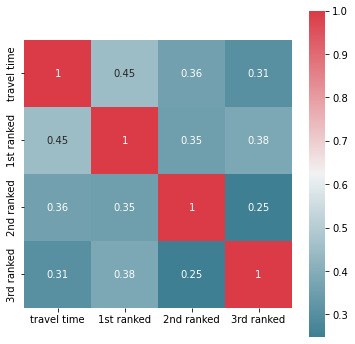

In [92]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4[['travel time','1st ranked','2nd ranked','3rd ranked']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [93]:
x = np.array(df4[['est_dist','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.2973851 , 0.58772071, 0.16691498, 0.34456246],
       [0.02341767, 0.        , 0.15006936, 0.34456246],
       [0.1427945 , 0.58772071, 0.15006936, 0.69034276],
       ...,
       [0.32470443, 0.58772071, 0.61113798, 0.69034276],
       [0.32141647, 0.58772071, 0.61113798, 0.69034276],
       [0.18431671, 0.58772071, 0.61113798, 0.57431377]])

In [94]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 4)
(3120, 4)


In [96]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
390/390 [==============================] - 1s 897us/step - loss: 1301451.8750 - mape: 99.1266 - rmse: 1140.8119 - val_loss: 1243480.7500 - val_mape: 97.6408 - val_rmse: 1115.1146
Epoch 2/500
390/390 [==============================] - 0s 744us/step - loss: 1230362.6250 - mape: 94.8149 - rmse: 1109.2172 - val_loss: 1144201.6250 - val_mape: 91.4452 - val_rmse: 1069.6736
Epoch 3/500
390/390 [==============================] - 0s 741us/step - loss: 1105933.0000 - mape: 86.8910 - rmse: 1051.6335 - val_loss: 1002668.8750 - val_mape: 82.0287 - val_rmse: 1001.3336
Epoch 4/500
390/390 [==============================] - 0s 735us/step - loss: 949500.8750 - mape: 76.3008 - rmse: 974.4233 - val_loss: 840435.7500 - val_mape: 70.3700 - val_rmse: 916.7528
Epoch 5/500
390/390 [==============================] - 0s 737us/step - loss: 781811.0000 - mape: 64.2544 - rmse: 884.2007 - val_loss: 676923.8750 - val_mape: 58.2304 - val_rmse: 822.7538
Epoch 6/500
390/390 [==============================] 

Epoch 88/500
390/390 [==============================] - 0s 730us/step - loss: 131997.7031 - mape: 36.3938 - rmse: 363.3149 - val_loss: 123307.1875 - val_mape: 36.1587 - val_rmse: 351.1512
Epoch 89/500
390/390 [==============================] - 0s 713us/step - loss: 131970.5625 - mape: 36.3518 - rmse: 363.2775 - val_loss: 123318.0234 - val_mape: 36.2508 - val_rmse: 351.1667
Epoch 90/500
390/390 [==============================] - 0s 737us/step - loss: 131947.1094 - mape: 36.3277 - rmse: 363.2452 - val_loss: 123279.9453 - val_mape: 36.1715 - val_rmse: 351.1124
Epoch 91/500
390/390 [==============================] - 0s 734us/step - loss: 131927.3594 - mape: 36.3318 - rmse: 363.2180 - val_loss: 123250.5547 - val_mape: 36.1228 - val_rmse: 351.0706
Epoch 92/500
390/390 [==============================] - 0s 732us/step - loss: 131911.4688 - mape: 36.2888 - rmse: 363.1962 - val_loss: 123371.9766 - val_mape: 36.4872 - val_rmse: 351.2435
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 722us/step - loss: 131668.6250 - mape: 36.0892 - rmse: 362.8617 - val_loss: 123066.4297 - val_mape: 36.1342 - val_rmse: 350.8083
Epoch 175/500
390/390 [==============================] - 0s 747us/step - loss: 131674.5625 - mape: 36.1991 - rmse: 362.8699 - val_loss: 122999.3203 - val_mape: 35.9135 - val_rmse: 350.7126
Epoch 176/500
390/390 [==============================] - 0s 716us/step - loss: 131678.4219 - mape: 36.2661 - rmse: 362.8752 - val_loss: 122946.9531 - val_mape: 35.6611 - val_rmse: 350.6379
Epoch 177/500
390/390 [==============================] - 0s 718us/step - loss: 131669.7812 - mape: 36.1741 - rmse: 362.8633 - val_loss: 122934.6562 - val_mape: 35.5644 - val_rmse: 350.6204
Epoch 178/500
390/390 [==============================] - 0s 721us/step - loss: 131683.2969 - mape: 36.0306 - rmse: 362.8819 - val_loss: 122999.5312 - val_mape: 35.9332 - val_rmse: 350.7129
Epoch 179/500
390/390 [==============================] - 0s 712us/ste

390/390 [==============================] - 0s 718us/step - loss: 131551.8594 - mape: 36.1081 - rmse: 362.7008 - val_loss: 123121.7344 - val_mape: 36.1585 - val_rmse: 350.8871
Epoch 261/500
390/390 [==============================] - 0s 722us/step - loss: 131543.9688 - mape: 36.1715 - rmse: 362.6899 - val_loss: 123003.1094 - val_mape: 35.7332 - val_rmse: 350.7180
Epoch 262/500
390/390 [==============================] - 0s 716us/step - loss: 131532.7969 - mape: 35.9881 - rmse: 362.6745 - val_loss: 123163.6484 - val_mape: 36.2795 - val_rmse: 350.9468
Epoch 263/500
390/390 [==============================] - 0s 721us/step - loss: 131523.5781 - mape: 36.2060 - rmse: 362.6618 - val_loss: 123032.7188 - val_mape: 35.9034 - val_rmse: 350.7602
Epoch 264/500
390/390 [==============================] - 0s 713us/step - loss: 131516.7500 - mape: 36.0293 - rmse: 362.6524 - val_loss: 123053.1250 - val_mape: 35.9982 - val_rmse: 350.7893
Epoch 265/500
390/390 [==============================] - 0s 724us/ste

390/390 [==============================] - 0s 721us/step - loss: 130999.9609 - mape: 35.9045 - rmse: 361.9392 - val_loss: 122760.0547 - val_mape: 35.6770 - val_rmse: 350.3713
Epoch 347/500
390/390 [==============================] - 0s 733us/step - loss: 130987.4766 - mape: 35.8425 - rmse: 361.9219 - val_loss: 122773.2344 - val_mape: 35.7573 - val_rmse: 350.3901
Epoch 348/500
390/390 [==============================] - 0s 720us/step - loss: 131002.3750 - mape: 35.9341 - rmse: 361.9425 - val_loss: 122731.0859 - val_mape: 35.5967 - val_rmse: 350.3300
Epoch 349/500
390/390 [==============================] - 0s 719us/step - loss: 130989.3906 - mape: 35.8119 - rmse: 361.9246 - val_loss: 122758.0938 - val_mape: 35.7012 - val_rmse: 350.3685
Epoch 350/500
390/390 [==============================] - 0s 724us/step - loss: 130965.1016 - mape: 35.8157 - rmse: 361.8910 - val_loss: 122781.4141 - val_mape: 35.7996 - val_rmse: 350.4018
Epoch 351/500
390/390 [==============================] - 0s 736us/ste

390/390 [==============================] - 0s 719us/step - loss: 130685.2578 - mape: 35.6824 - rmse: 361.5042 - val_loss: 122540.5781 - val_mape: 35.2681 - val_rmse: 350.0580
Epoch 433/500
390/390 [==============================] - 0s 727us/step - loss: 130684.8594 - mape: 35.7201 - rmse: 361.5036 - val_loss: 122506.7656 - val_mape: 34.9364 - val_rmse: 350.0097
Epoch 434/500
390/390 [==============================] - 0s 715us/step - loss: 130688.6797 - mape: 35.5283 - rmse: 361.5089 - val_loss: 122541.4844 - val_mape: 35.2893 - val_rmse: 350.0593
Epoch 435/500
390/390 [==============================] - 0s 714us/step - loss: 130679.1250 - mape: 35.6080 - rmse: 361.4957 - val_loss: 122543.7812 - val_mape: 35.3032 - val_rmse: 350.0625
Epoch 436/500
390/390 [==============================] - 0s 714us/step - loss: 130668.8672 - mape: 35.7161 - rmse: 361.4815 - val_loss: 122511.5703 - val_mape: 35.1025 - val_rmse: 350.0165
Epoch 437/500
390/390 [==============================] - 0s 708us/ste

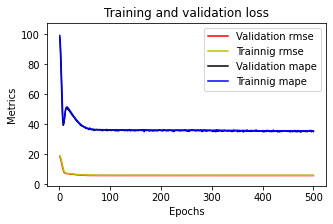

In [97]:
plotme(model4_1_1)

In [98]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
390/390 [==============================] - 1s 886us/step - loss: 1281853.5000 - mape: 97.9165 - rmse: 1132.1897 - val_loss: 1184499.5000 - val_mape: 93.9884 - val_rmse: 1088.3472
Epoch 2/500
390/390 [==============================] - 0s 739us/step - loss: 1098379.2500 - mape: 86.3751 - rmse: 1048.0359 - val_loss: 935366.0625 - val_mape: 77.2937 - val_rmse: 967.1432
Epoch 3/500
390/390 [==============================] - 0s 744us/step - loss: 807496.3125 - mape: 66.1861 - rmse: 898.6080 - val_loss: 633360.1875 - val_mape: 55.0528 - val_rmse: 795.8393
Epoch 4/500
390/390 [==============================] - 0s 739us/step - loss: 523217.6875 - mape: 47.1987 - rmse: 723.3379 - val_loss: 392148.2812 - val_mape: 41.1179 - val_rmse: 626.2175
Epoch 5/500
390/390 [==============================] - 0s 738us/step - loss: 328183.1875 - mape: 40.6033 - rmse: 572.8727 - val_loss: 254778.3594 - val_mape: 40.2794 - val_rmse: 504.7557
Epoch 6/500
390/390 [==============================] - 0s 7

Epoch 88/500
390/390 [==============================] - 0s 729us/step - loss: 131735.2031 - mape: 36.2172 - rmse: 362.9534 - val_loss: 123022.3281 - val_mape: 35.9928 - val_rmse: 350.7454
Epoch 89/500
390/390 [==============================] - 0s 731us/step - loss: 131759.3594 - mape: 36.2028 - rmse: 362.9867 - val_loss: 123020.9062 - val_mape: 35.9971 - val_rmse: 350.7433
Epoch 90/500
390/390 [==============================] - 0s 735us/step - loss: 131732.3438 - mape: 36.2389 - rmse: 362.9495 - val_loss: 122983.8047 - val_mape: 35.8384 - val_rmse: 350.6905
Epoch 91/500
390/390 [==============================] - 0s 727us/step - loss: 131741.4688 - mape: 36.1925 - rmse: 362.9621 - val_loss: 123029.3359 - val_mape: 36.0104 - val_rmse: 350.7554
Epoch 92/500
390/390 [==============================] - 0s 727us/step - loss: 131711.5312 - mape: 36.1427 - rmse: 362.9208 - val_loss: 123173.3750 - val_mape: 36.4049 - val_rmse: 350.9606
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 737us/step - loss: 131451.7188 - mape: 35.9809 - rmse: 362.5627 - val_loss: 123023.1562 - val_mape: 36.0258 - val_rmse: 350.7466
Epoch 175/500
390/390 [==============================] - 0s 736us/step - loss: 131456.4062 - mape: 36.0136 - rmse: 362.5692 - val_loss: 123068.7266 - val_mape: 36.1564 - val_rmse: 350.8115
Epoch 176/500
390/390 [==============================] - 0s 733us/step - loss: 131474.2656 - mape: 36.1771 - rmse: 362.5938 - val_loss: 122982.6797 - val_mape: 35.8922 - val_rmse: 350.6889
Epoch 177/500
390/390 [==============================] - 0s 728us/step - loss: 131463.9844 - mape: 36.0116 - rmse: 362.5796 - val_loss: 123029.6719 - val_mape: 36.0750 - val_rmse: 350.7559
Epoch 178/500
390/390 [==============================] - 0s 733us/step - loss: 131397.6875 - mape: 36.2193 - rmse: 362.4882 - val_loss: 122887.1797 - val_mape: 35.0253 - val_rmse: 350.5527
Epoch 179/500
390/390 [==============================] - 0s 737us/ste

390/390 [==============================] - 0s 751us/step - loss: 130829.5703 - mape: 35.6294 - rmse: 361.7037 - val_loss: 122631.6953 - val_mape: 35.4456 - val_rmse: 350.1881
Epoch 261/500
390/390 [==============================] - 0s 729us/step - loss: 130806.6953 - mape: 35.7715 - rmse: 361.6721 - val_loss: 122571.6719 - val_mape: 35.0320 - val_rmse: 350.1024
Epoch 262/500
390/390 [==============================] - 0s 732us/step - loss: 130802.0469 - mape: 35.6169 - rmse: 361.6656 - val_loss: 122687.3359 - val_mape: 35.6531 - val_rmse: 350.2675
Epoch 263/500
390/390 [==============================] - 0s 730us/step - loss: 130821.4688 - mape: 35.6342 - rmse: 361.6925 - val_loss: 122593.5391 - val_mape: 35.2980 - val_rmse: 350.1336
Epoch 264/500
390/390 [==============================] - 0s 729us/step - loss: 130806.7969 - mape: 35.6786 - rmse: 361.6722 - val_loss: 122613.5781 - val_mape: 35.3858 - val_rmse: 350.1622
Epoch 265/500
390/390 [==============================] - 0s 727us/ste

390/390 [==============================] - 0s 729us/step - loss: 130526.5000 - mape: 35.6434 - rmse: 361.2845 - val_loss: 122448.0859 - val_mape: 35.1811 - val_rmse: 349.9258
Epoch 347/500
390/390 [==============================] - 0s 729us/step - loss: 130520.8984 - mape: 35.5870 - rmse: 361.2768 - val_loss: 122440.8203 - val_mape: 35.1298 - val_rmse: 349.9154
Epoch 348/500
390/390 [==============================] - 0s 729us/step - loss: 130516.4453 - mape: 35.6449 - rmse: 361.2706 - val_loss: 122410.8594 - val_mape: 34.8104 - val_rmse: 349.8726
Epoch 349/500
390/390 [==============================] - 0s 732us/step - loss: 130498.0938 - mape: 35.5478 - rmse: 361.2452 - val_loss: 122409.1406 - val_mape: 34.8062 - val_rmse: 349.8702
Epoch 350/500
390/390 [==============================] - 0s 741us/step - loss: 130544.6641 - mape: 35.4544 - rmse: 361.3097 - val_loss: 122554.0625 - val_mape: 35.5935 - val_rmse: 350.0772
Epoch 351/500
390/390 [==============================] - 0s 735us/ste

390/390 [==============================] - 0s 736us/step - loss: 130340.6016 - mape: 35.5794 - rmse: 361.0272 - val_loss: 122316.3984 - val_mape: 34.9573 - val_rmse: 349.7376
Epoch 433/500
390/390 [==============================] - 0s 726us/step - loss: 130330.8438 - mape: 35.4401 - rmse: 361.0136 - val_loss: 122499.1250 - val_mape: 35.7018 - val_rmse: 349.9987
Epoch 434/500
390/390 [==============================] - 0s 737us/step - loss: 130339.0625 - mape: 35.4631 - rmse: 361.0250 - val_loss: 122522.9141 - val_mape: 35.7704 - val_rmse: 350.0327
Epoch 435/500
390/390 [==============================] - 0s 733us/step - loss: 130346.7500 - mape: 35.5803 - rmse: 361.0357 - val_loss: 122455.2734 - val_mape: 35.5773 - val_rmse: 349.9361
Epoch 436/500
390/390 [==============================] - 0s 733us/step - loss: 130333.3672 - mape: 35.6307 - rmse: 361.0171 - val_loss: 122356.1406 - val_mape: 35.2196 - val_rmse: 349.7944
Epoch 437/500
390/390 [==============================] - 0s 733us/ste

In [99]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
390/390 [==============================] - 1s 909us/step - loss: 1252124.5000 - mape: 96.0660 - rmse: 1118.9836 - val_loss: 1093529.2500 - val_mape: 88.1609 - val_rmse: 1045.7195
Epoch 2/500
390/390 [==============================] - 0s 774us/step - loss: 913317.8750 - mape: 73.6071 - rmse: 955.6766 - val_loss: 668312.8750 - val_mape: 57.6040 - val_rmse: 817.5040
Epoch 3/500
390/390 [==============================] - 0s 773us/step - loss: 500471.9375 - mape: 46.5360 - rmse: 707.4404 - val_loss: 331692.7500 - val_mape: 39.4847 - val_rmse: 575.9277
Epoch 4/500
390/390 [==============================] - 0s 775us/step - loss: 266848.4062 - mape: 41.8324 - rmse: 516.5737 - val_loss: 208462.1719 - val_mape: 44.0575 - val_rmse: 456.5766
Epoch 5/500
390/390 [==============================] - 0s 772us/step - loss: 203911.8906 - mape: 48.1373 - rmse: 451.5660 - val_loss: 189216.2812 - val_mape: 49.5558 - val_rmse: 434.9900
Epoch 6/500
390/390 [==============================] - 0s 766

Epoch 88/500
390/390 [==============================] - 0s 762us/step - loss: 131689.3281 - mape: 36.1196 - rmse: 362.8902 - val_loss: 123010.1562 - val_mape: 35.8932 - val_rmse: 350.7280
Epoch 89/500
390/390 [==============================] - 0s 755us/step - loss: 131691.3750 - mape: 36.0850 - rmse: 362.8931 - val_loss: 123228.2656 - val_mape: 36.4688 - val_rmse: 351.0388
Epoch 90/500
390/390 [==============================] - 0s 757us/step - loss: 131698.0469 - mape: 36.1969 - rmse: 362.9023 - val_loss: 123179.1172 - val_mape: 36.3583 - val_rmse: 350.9688
Epoch 91/500
390/390 [==============================] - 0s 769us/step - loss: 131666.0312 - mape: 36.0621 - rmse: 362.8582 - val_loss: 123574.4375 - val_mape: 37.0333 - val_rmse: 351.5316
Epoch 92/500
390/390 [==============================] - 0s 770us/step - loss: 131683.5938 - mape: 36.3555 - rmse: 362.8824 - val_loss: 122966.5625 - val_mape: 35.6210 - val_rmse: 350.6659
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 765us/step - loss: 131016.9922 - mape: 35.6135 - rmse: 361.9627 - val_loss: 122750.4922 - val_mape: 35.7685 - val_rmse: 350.3577
Epoch 175/500
390/390 [==============================] - 0s 762us/step - loss: 130957.6797 - mape: 35.7778 - rmse: 361.8808 - val_loss: 122620.0234 - val_mape: 35.0831 - val_rmse: 350.1714
Epoch 176/500
390/390 [==============================] - 0s 767us/step - loss: 130947.7578 - mape: 35.6831 - rmse: 361.8670 - val_loss: 122692.5938 - val_mape: 35.6085 - val_rmse: 350.2750
Epoch 177/500
390/390 [==============================] - 0s 768us/step - loss: 130902.2031 - mape: 35.8330 - rmse: 361.8041 - val_loss: 122666.8438 - val_mape: 35.4705 - val_rmse: 350.2383
Epoch 178/500
390/390 [==============================] - 0s 756us/step - loss: 130913.9062 - mape: 35.8270 - rmse: 361.8203 - val_loss: 122602.3906 - val_mape: 34.8447 - val_rmse: 350.1462
Epoch 179/500
390/390 [==============================] - 0s 763us/ste

390/390 [==============================] - 0s 768us/step - loss: 130505.2656 - mape: 35.5323 - rmse: 361.2551 - val_loss: 122556.3828 - val_mape: 35.6380 - val_rmse: 350.0805
Epoch 261/500
390/390 [==============================] - 0s 766us/step - loss: 130511.2031 - mape: 35.6644 - rmse: 361.2633 - val_loss: 122400.3594 - val_mape: 34.5988 - val_rmse: 349.8576
Epoch 262/500
390/390 [==============================] - 0s 771us/step - loss: 130494.4844 - mape: 35.4692 - rmse: 361.2402 - val_loss: 122497.5000 - val_mape: 35.4656 - val_rmse: 349.9964
Epoch 263/500
390/390 [==============================] - 0s 758us/step - loss: 130501.1328 - mape: 35.5404 - rmse: 361.2494 - val_loss: 122452.5312 - val_mape: 35.3162 - val_rmse: 349.9322
Epoch 264/500
390/390 [==============================] - 0s 769us/step - loss: 130460.3203 - mape: 35.5843 - rmse: 361.1929 - val_loss: 122648.7969 - val_mape: 35.8703 - val_rmse: 350.2125
Epoch 265/500
390/390 [==============================] - 0s 761us/ste

390/390 [==============================] - 0s 763us/step - loss: 130271.4062 - mape: 35.5095 - rmse: 360.9313 - val_loss: 122361.2344 - val_mape: 35.3888 - val_rmse: 349.8017
Epoch 347/500
390/390 [==============================] - 0s 765us/step - loss: 130260.1172 - mape: 35.5767 - rmse: 360.9157 - val_loss: 122291.1094 - val_mape: 35.0617 - val_rmse: 349.7014
Epoch 348/500
390/390 [==============================] - 0s 760us/step - loss: 130240.4844 - mape: 35.6469 - rmse: 360.8885 - val_loss: 122306.0547 - val_mape: 34.2724 - val_rmse: 349.7228
Epoch 349/500
390/390 [==============================] - 0s 766us/step - loss: 130246.5391 - mape: 35.4827 - rmse: 360.8969 - val_loss: 122278.2031 - val_mape: 34.9871 - val_rmse: 349.6830
Epoch 350/500
390/390 [==============================] - 0s 760us/step - loss: 130232.0547 - mape: 35.4160 - rmse: 360.8768 - val_loss: 122391.2422 - val_mape: 35.5015 - val_rmse: 349.8446
Epoch 351/500
390/390 [==============================] - 0s 759us/ste

390/390 [==============================] - 0s 763us/step - loss: 130115.9766 - mape: 35.5764 - rmse: 360.7159 - val_loss: 122231.9766 - val_mape: 35.1862 - val_rmse: 349.6169
Epoch 433/500
390/390 [==============================] - 0s 767us/step - loss: 130105.5625 - mape: 35.4325 - rmse: 360.7015 - val_loss: 122228.0312 - val_mape: 35.1524 - val_rmse: 349.6113
Epoch 434/500
390/390 [==============================] - 0s 768us/step - loss: 130105.6641 - mape: 35.5845 - rmse: 360.7016 - val_loss: 122185.5703 - val_mape: 34.5533 - val_rmse: 349.5505
Epoch 435/500
390/390 [==============================] - 0s 768us/step - loss: 130117.4531 - mape: 35.4154 - rmse: 360.7180 - val_loss: 122247.3750 - val_mape: 35.2321 - val_rmse: 349.6389
Epoch 436/500
390/390 [==============================] - 0s 767us/step - loss: 130165.8125 - mape: 35.5115 - rmse: 360.7850 - val_loss: 122207.0156 - val_mape: 34.9863 - val_rmse: 349.5812
Epoch 437/500
390/390 [==============================] - 0s 762us/ste

In [100]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
390/390 [==============================] - 1s 978us/step - loss: 806263.0625 - mape: 70.8819 - rmse: 897.9215 - val_loss: 190575.7188 - val_mape: 50.2964 - val_rmse: 436.5498
Epoch 2/500
390/390 [==============================] - 0s 880us/step - loss: 192731.7344 - mape: 51.7750 - rmse: 439.0122 - val_loss: 180045.5000 - val_mape: 50.6275 - val_rmse: 424.3177
Epoch 3/500
390/390 [==============================] - 0s 900us/step - loss: 181703.5000 - mape: 49.5503 - rmse: 426.2669 - val_loss: 168418.3438 - val_mape: 48.6495 - val_rmse: 410.3880
Epoch 4/500
390/390 [==============================] - 0s 898us/step - loss: 169697.5000 - mape: 46.9194 - rmse: 411.9436 - val_loss: 156616.5156 - val_mape: 46.3895 - val_rmse: 395.7480
Epoch 5/500
390/390 [==============================] - 0s 891us/step - loss: 158220.2656 - mape: 44.2886 - rmse: 397.7691 - val_loss: 144847.7188 - val_mape: 42.6034 - val_rmse: 380.5887
Epoch 6/500
390/390 [==============================] - 0s 813us/s

Epoch 45/500
390/390 [==============================] - 0s 793us/step - loss: 132314.0625 - mape: 36.5102 - rmse: 363.7500 - val_loss: 123410.9297 - val_mape: 36.3404 - val_rmse: 351.2989
Epoch 46/500
390/390 [==============================] - 0s 796us/step - loss: 132340.1562 - mape: 36.3632 - rmse: 363.7859 - val_loss: 123239.2031 - val_mape: 35.8698 - val_rmse: 351.0544
Epoch 47/500
390/390 [==============================] - 0s 792us/step - loss: 132273.2188 - mape: 36.3311 - rmse: 363.6938 - val_loss: 123399.7109 - val_mape: 36.4249 - val_rmse: 351.2830
Epoch 48/500
390/390 [==============================] - 0s 801us/step - loss: 132320.8594 - mape: 36.4540 - rmse: 363.7593 - val_loss: 123255.9297 - val_mape: 34.9358 - val_rmse: 351.0782
Epoch 49/500
390/390 [==============================] - 0s 787us/step - loss: 132128.2969 - mape: 36.3343 - rmse: 363.4946 - val_loss: 124382.1875 - val_mape: 37.5716 - val_rmse: 352.6786
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 806us/step - loss: 130854.0469 - mape: 35.6648 - rmse: 361.7375 - val_loss: 123520.1719 - val_mape: 36.8864 - val_rmse: 351.4544
Epoch 132/500
390/390 [==============================] - 0s 798us/step - loss: 130879.9219 - mape: 35.6921 - rmse: 361.7733 - val_loss: 123753.6719 - val_mape: 37.1754 - val_rmse: 351.7864
Epoch 133/500
390/390 [==============================] - 0s 806us/step - loss: 130755.8281 - mape: 35.6329 - rmse: 361.6017 - val_loss: 122727.3984 - val_mape: 36.0622 - val_rmse: 350.3247
Epoch 134/500
390/390 [==============================] - 0s 801us/step - loss: 130794.0156 - mape: 35.7399 - rmse: 361.6545 - val_loss: 122385.3047 - val_mape: 34.7757 - val_rmse: 349.8361
Epoch 135/500
390/390 [==============================] - 0s 796us/step - loss: 130724.1172 - mape: 35.4929 - rmse: 361.5579 - val_loss: 122362.2969 - val_mape: 34.8470 - val_rmse: 349.8032
Epoch 136/500
390/390 [==============================] - 0s 784us/ste

390/390 [==============================] - 0s 801us/step - loss: 130306.3672 - mape: 35.5655 - rmse: 360.9797 - val_loss: 122135.2344 - val_mape: 34.9463 - val_rmse: 349.4785
Epoch 218/500
390/390 [==============================] - 0s 803us/step - loss: 130284.4922 - mape: 35.4932 - rmse: 360.9494 - val_loss: 122593.2188 - val_mape: 36.0653 - val_rmse: 350.1331
Epoch 219/500
390/390 [==============================] - 0s 801us/step - loss: 130247.8750 - mape: 35.4790 - rmse: 360.8987 - val_loss: 123016.5469 - val_mape: 36.6447 - val_rmse: 350.7372
Epoch 220/500
390/390 [==============================] - 0s 803us/step - loss: 130384.6719 - mape: 35.6939 - rmse: 361.0882 - val_loss: 122183.9766 - val_mape: 35.2688 - val_rmse: 349.5482
Epoch 221/500
390/390 [==============================] - 0s 796us/step - loss: 130315.2344 - mape: 35.5384 - rmse: 360.9920 - val_loss: 122098.2578 - val_mape: 34.7168 - val_rmse: 349.4256
Epoch 222/500
390/390 [==============================] - 0s 821us/ste

390/390 [==============================] - 0s 808us/step - loss: 129955.9844 - mape: 35.4108 - rmse: 360.4941 - val_loss: 121982.7500 - val_mape: 34.5327 - val_rmse: 349.2603
Epoch 304/500
390/390 [==============================] - 0s 795us/step - loss: 129983.5000 - mape: 35.3880 - rmse: 360.5323 - val_loss: 123585.3516 - val_mape: 37.4288 - val_rmse: 351.5471
Epoch 305/500
390/390 [==============================] - 0s 754us/step - loss: 130088.5234 - mape: 35.6547 - rmse: 360.6779 - val_loss: 122233.5156 - val_mape: 33.6028 - val_rmse: 349.6191
Epoch 306/500
390/390 [==============================] - 0s 789us/step - loss: 130175.6328 - mape: 35.4292 - rmse: 360.7986 - val_loss: 122738.8203 - val_mape: 36.6508 - val_rmse: 350.3410
Epoch 307/500
390/390 [==============================] - 0s 771us/step - loss: 130110.8125 - mape: 35.6155 - rmse: 360.7088 - val_loss: 122134.5859 - val_mape: 35.3469 - val_rmse: 349.4776
Epoch 308/500
390/390 [==============================] - 0s 762us/ste

390/390 [==============================] - 0s 783us/step - loss: 129816.2578 - mape: 35.4430 - rmse: 360.3002 - val_loss: 122019.9297 - val_mape: 35.3390 - val_rmse: 349.3135
Epoch 390/500
390/390 [==============================] - 0s 772us/step - loss: 129892.8594 - mape: 35.4623 - rmse: 360.4065 - val_loss: 121952.7266 - val_mape: 35.2159 - val_rmse: 349.2173
Epoch 391/500
390/390 [==============================] - 0s 753us/step - loss: 129759.0938 - mape: 35.4909 - rmse: 360.2209 - val_loss: 122851.5859 - val_mape: 32.7356 - val_rmse: 350.5019
Epoch 392/500
390/390 [==============================] - 0s 781us/step - loss: 129952.8516 - mape: 35.4074 - rmse: 360.4897 - val_loss: 121962.6641 - val_mape: 35.0748 - val_rmse: 349.2315
Epoch 393/500
390/390 [==============================] - 0s 782us/step - loss: 129889.3281 - mape: 35.3187 - rmse: 360.4016 - val_loss: 122559.1406 - val_mape: 36.4216 - val_rmse: 350.0845
Epoch 394/500
390/390 [==============================] - 0s 759us/ste

390/390 [==============================] - 0s 755us/step - loss: 129678.1172 - mape: 35.3069 - rmse: 360.1085 - val_loss: 121883.8047 - val_mape: 34.5932 - val_rmse: 349.1186
Epoch 476/500
390/390 [==============================] - 0s 803us/step - loss: 129698.4297 - mape: 35.4532 - rmse: 360.1367 - val_loss: 122249.1484 - val_mape: 35.6887 - val_rmse: 349.6414
Epoch 477/500
390/390 [==============================] - 0s 770us/step - loss: 129670.6562 - mape: 35.2405 - rmse: 360.0981 - val_loss: 122402.3359 - val_mape: 36.1732 - val_rmse: 349.8604
Epoch 478/500
390/390 [==============================] - 0s 803us/step - loss: 129737.6875 - mape: 35.4793 - rmse: 360.1912 - val_loss: 123536.7188 - val_mape: 37.3870 - val_rmse: 351.4779
Epoch 479/500
390/390 [==============================] - 0s 771us/step - loss: 129917.6953 - mape: 35.2945 - rmse: 360.4410 - val_loss: 122577.7734 - val_mape: 36.4653 - val_rmse: 350.1111
Epoch 480/500
390/390 [==============================] - 0s 785us/ste

In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 643413.0000 - mape: 66.2682 - rmse: 802.1303 - val_loss: 186467.1719 - val_mape: 51.7604 - val_rmse: 431.8185
Epoch 2/500
390/390 [==============================] - 0s 859us/step - loss: 186520.9219 - mape: 50.5459 - rmse: 431.8807 - val_loss: 171285.0625 - val_mape: 47.3172 - val_rmse: 413.8660
Epoch 3/500
390/390 [==============================] - 0s 865us/step - loss: 170740.9688 - mape: 47.1739 - rmse: 413.2081 - val_loss: 154830.3906 - val_mape: 44.5299 - val_rmse: 393.4849
Epoch 4/500
390/390 [==============================] - 0s 889us/step - loss: 155488.1562 - mape: 43.4958 - rmse: 394.3199 - val_loss: 140643.5625 - val_mape: 40.6992 - val_rmse: 375.0247
Epoch 5/500
390/390 [==============================] - 0s 891us/step - loss: 143736.1250 - mape: 40.2244 - rmse: 379.1255 - val_loss: 130945.4141 - val_mape: 38.5390 - val_rmse: 361.8638
Epoch 6/500
390/390 [==============================] - 0s 868us/ste

Epoch 45/500
390/390 [==============================] - 0s 845us/step - loss: 132128.9219 - mape: 36.2959 - rmse: 363.4954 - val_loss: 123368.6562 - val_mape: 36.4394 - val_rmse: 351.2387
Epoch 46/500
390/390 [==============================] - 0s 884us/step - loss: 131893.0469 - mape: 36.1931 - rmse: 363.1708 - val_loss: 123436.9297 - val_mape: 36.4798 - val_rmse: 351.3359
Epoch 47/500
390/390 [==============================] - 0s 858us/step - loss: 132083.2969 - mape: 36.1251 - rmse: 363.4326 - val_loss: 123090.0312 - val_mape: 35.9260 - val_rmse: 350.8419
Epoch 48/500
390/390 [==============================] - 0s 834us/step - loss: 131870.9531 - mape: 36.0685 - rmse: 363.1404 - val_loss: 123589.0547 - val_mape: 36.9476 - val_rmse: 351.5523
Epoch 49/500
390/390 [==============================] - 0s 869us/step - loss: 131900.1719 - mape: 36.2267 - rmse: 363.1806 - val_loss: 122915.8047 - val_mape: 35.2282 - val_rmse: 350.5935
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 818us/step - loss: 130501.2891 - mape: 35.5724 - rmse: 361.2496 - val_loss: 122275.0078 - val_mape: 34.6786 - val_rmse: 349.6784
Epoch 132/500
390/390 [==============================] - 0s 846us/step - loss: 130672.0000 - mape: 35.4869 - rmse: 361.4858 - val_loss: 122923.3672 - val_mape: 36.5795 - val_rmse: 350.6043
Epoch 133/500
390/390 [==============================] - 0s 876us/step - loss: 130451.2734 - mape: 35.7398 - rmse: 361.1804 - val_loss: 122566.9922 - val_mape: 33.5764 - val_rmse: 350.0957
Epoch 134/500
390/390 [==============================] - 0s 868us/step - loss: 130584.7500 - mape: 35.4502 - rmse: 361.3651 - val_loss: 122536.3906 - val_mape: 35.6556 - val_rmse: 350.0520
Epoch 135/500
390/390 [==============================] - 0s 845us/step - loss: 130429.2031 - mape: 35.5962 - rmse: 361.1498 - val_loss: 122591.9688 - val_mape: 33.6229 - val_rmse: 350.1313
Epoch 136/500
390/390 [==============================] - 0s 838us/ste

390/390 [==============================] - 0s 859us/step - loss: 130183.5781 - mape: 35.3876 - rmse: 360.8096 - val_loss: 122432.3516 - val_mape: 35.7147 - val_rmse: 349.9034
Epoch 218/500
390/390 [==============================] - 0s 864us/step - loss: 130050.6562 - mape: 35.3443 - rmse: 360.6254 - val_loss: 122561.7734 - val_mape: 36.0831 - val_rmse: 350.0882
Epoch 219/500
390/390 [==============================] - 0s 851us/step - loss: 130149.7422 - mape: 35.5614 - rmse: 360.7627 - val_loss: 122196.4141 - val_mape: 35.1125 - val_rmse: 349.5660
Epoch 220/500
390/390 [==============================] - 0s 856us/step - loss: 130109.6172 - mape: 35.2827 - rmse: 360.7071 - val_loss: 122178.1094 - val_mape: 35.3781 - val_rmse: 349.5399
Epoch 221/500
390/390 [==============================] - 0s 848us/step - loss: 130154.6953 - mape: 35.4324 - rmse: 360.7696 - val_loss: 122833.8047 - val_mape: 36.7191 - val_rmse: 350.4765
Epoch 222/500
390/390 [==============================] - 0s 867us/ste

390/390 [==============================] - 0s 825us/step - loss: 129975.7266 - mape: 35.3443 - rmse: 360.5215 - val_loss: 125151.2422 - val_mape: 38.4635 - val_rmse: 353.7672
Epoch 304/500
390/390 [==============================] - 0s 838us/step - loss: 129885.3906 - mape: 35.3414 - rmse: 360.3961 - val_loss: 123253.3125 - val_mape: 37.0141 - val_rmse: 351.0745
Epoch 305/500
390/390 [==============================] - 0s 876us/step - loss: 130053.6484 - mape: 35.5116 - rmse: 360.6295 - val_loss: 123093.3359 - val_mape: 32.6304 - val_rmse: 350.8466
Epoch 306/500
390/390 [==============================] - 0s 859us/step - loss: 129880.1406 - mape: 35.3463 - rmse: 360.3889 - val_loss: 122071.6641 - val_mape: 34.2787 - val_rmse: 349.3875
Epoch 307/500
390/390 [==============================] - 0s 831us/step - loss: 129914.5625 - mape: 35.3874 - rmse: 360.4366 - val_loss: 122938.9531 - val_mape: 36.7318 - val_rmse: 350.6265
Epoch 308/500
390/390 [==============================] - 0s 873us/ste

390/390 [==============================] - 0s 868us/step - loss: 129879.1797 - mape: 35.4543 - rmse: 360.3875 - val_loss: 122206.8516 - val_mape: 35.1967 - val_rmse: 349.5810
Epoch 390/500
390/390 [==============================] - 0s 868us/step - loss: 129805.1875 - mape: 35.2235 - rmse: 360.2849 - val_loss: 122488.0859 - val_mape: 36.2209 - val_rmse: 349.9830
Epoch 391/500
390/390 [==============================] - 0s 879us/step - loss: 129790.6484 - mape: 35.4558 - rmse: 360.2647 - val_loss: 122079.4688 - val_mape: 35.1140 - val_rmse: 349.3987
Epoch 392/500
390/390 [==============================] - 0s 860us/step - loss: 129754.4453 - mape: 35.2401 - rmse: 360.2144 - val_loss: 122357.9297 - val_mape: 35.9324 - val_rmse: 349.7970
Epoch 393/500
390/390 [==============================] - 0s 840us/step - loss: 129887.4141 - mape: 35.4167 - rmse: 360.3990 - val_loss: 122338.0312 - val_mape: 35.9789 - val_rmse: 349.7686
Epoch 394/500
390/390 [==============================] - 0s 845us/ste

390/390 [==============================] - 0s 855us/step - loss: 129760.0312 - mape: 35.4709 - rmse: 360.2222 - val_loss: 121940.8203 - val_mape: 34.6791 - val_rmse: 349.2003
Epoch 476/500
390/390 [==============================] - 0s 867us/step - loss: 129695.8906 - mape: 35.4113 - rmse: 360.1331 - val_loss: 122183.3672 - val_mape: 35.4499 - val_rmse: 349.5474
Epoch 477/500
390/390 [==============================] - 0s 845us/step - loss: 129769.9375 - mape: 35.3113 - rmse: 360.2360 - val_loss: 122516.9062 - val_mape: 36.0949 - val_rmse: 350.0241
Epoch 478/500
390/390 [==============================] - 0s 892us/step - loss: 129674.7578 - mape: 35.4389 - rmse: 360.1038 - val_loss: 122053.0859 - val_mape: 33.9628 - val_rmse: 349.3610
Epoch 479/500
390/390 [==============================] - 0s 855us/step - loss: 129892.1328 - mape: 35.3803 - rmse: 360.4055 - val_loss: 122216.4609 - val_mape: 35.5077 - val_rmse: 349.5947
Epoch 480/500
390/390 [==============================] - 0s 887us/ste

### missing value handling approach 2: 

In [102]:
### missing value handling approach 2: 
df6 = df1.iloc[:,0:9].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

     1st ranked    2nd ranked   3rd ranked  
0       primary       service  residential  
1       service  unclassified  residential  
2       primary  unclassified     tertiary  
3  unclassified       service      primary  
4   residential  unclassified      service

#### 2. encoding of ranked roadtype with binary-encoding

In [103]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          1163           18  0.578883  0.297385    0.810945         0.895604   
1           347           21  0.048963  0.023418    0.791667         0.863636   
2           720           19  0.268455  0.142794    0.681159         0.758065   
3           355           16  0.056803  0.043956    0.406250         0.309524   
4           356           17  0.076939  0.058963    0.387755         0.452381   
5           457           16  0.145014  0.063410    0.547619         0.696970   
6          1590           22  0.934388  0.502542    0.723404         0.768362   
7          1720            1  0.831630  0.437875    0.750000         0.738693   
8           656           15  0.078470  0.035026    0.621622         0.958333   
9           402           23  0.150663  0.095621    0.558824         0.633333   
10         1234           18  0.085468  0.062056    0.259259         0.241379   
11         1046           16  0.170512  0.104051    0.180556         0.168831   
12          366           23  0.085953  0.064818    0.235294         0.272727   
13         1212           18  0.192141  0.098587    0.053333         0.056338   
14          404           20  0.110049  0.067499    0.169492         0.256410   
15         1055           12  0.000043  0.001445    0.800000         1.000000   
16          354           19  0.070200  0.017176    0.461538         1.000000   
17          247            3  0.052494  0.034527    0.411765         0.437500   
18          770           18  0.150841  0.095784    0.328125         0.350000   
19         1046           11  0.404958  0.063043    0.162500         0.419355   

     1st ranked   2nd ranked   3rd ranked  
0       primary      others2  residential  
1       others1      others2  residential  
2       primary      others2     tertiary  
3       others1      others2      others3  
4   residential      others2      others3  
5       primary  residential      others3  
6       primary    secondary      others3  
7       primary  residential      others3  
8       primary     tertiary      others3  
9      tertiary      others2      others3  
10  residential      others2      others3  
11     tertiary      others2  residential  
12      others1  residential      others3  
13      primary     tertiary  residential  
14      others1  residential      others3  
15  residential      others2      others3  
16  residential      others2            0  
17      others1      others2  residential  
18     tertiary      others2  residential  
19      primary      others2  residential

In [104]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  hour of day  distance  est_dist  similarity  \
0             1163           18  0.578883  0.297385    0.810945   
1              347           21  0.048963  0.023418    0.791667   
2              720           19  0.268455  0.142794    0.681159   
3              355           16  0.056803  0.043956    0.406250   
4              356           17  0.076939  0.058963    0.387755   
...            ...          ...       ...       ...         ...   
15628         1649           21  0.657683  0.362262    0.771654   
15629         1385            1  0.594228  0.320815    0.809160   
15630         1217            2  0.593117  0.324704    0.796460   
15631         1189           22  0.597302  0.321416    0.794643   
15632         1112            6  0.392350  0.184317    0.788732   

       similarity_dijk  1st ranked_0  1st ranked_1  1st ranked_2  \
0             0.895604             0             0             1   
1             0.863636             0             1             0   
2             0.758065             0             0             1   
3             0.309524             0             1             0   
4             0.452381             0             1             1   
...                ...           ...           ...           ...   
15628         0.748092             0             0             1   
15629         0.828125             0             0             1   
15630         0.841121             0             0             1   
15631         0.824074             0             0             1   
15632         0.788732             0             0             1   

       2nd ranked_0  2nd ranked_1  2nd ranked_2  3rd ranked_0  3rd ranked_1  \
0                 0             0             1             0             0   
1                 0             0             1             0             0   
2                 0             0             1             0             1   
3                 0             0             1             0             1   
4                 0             0             1             0             1   
...             ...           ...           ...           ...           ...   
15628             0             1             1             0             0   
15629             1             0             0             0             1   
15630             0             1             1             0             1   
15631             0             1             1             0             1   
15632             0             1             1             1             0   

       3rd ranked_2  
0                 1  
1                 1  
2                 0  
3                 1  
4                 1  
...             ...  
15628             1  
15629             1  
15630             0  
15631             0  
15632             0  

[15599 rows x 15 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

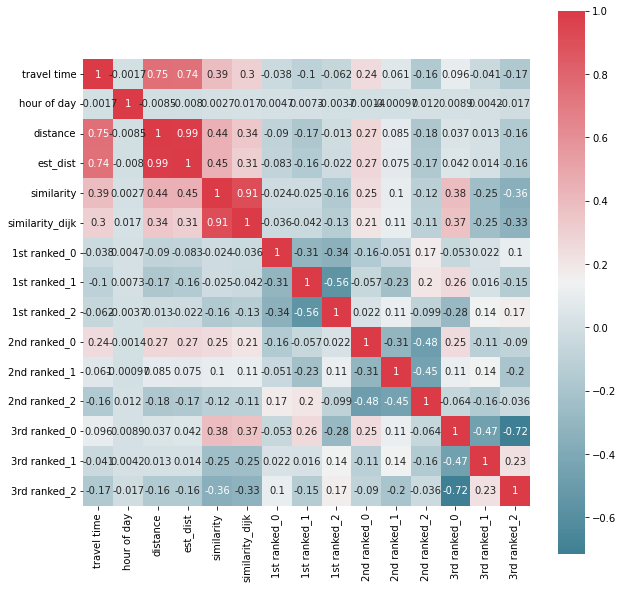

In [105]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [106]:
x = np.array(df6[['est_dist','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(15599, 10)

In [107]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 10)
(3120, 10)


In [109]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
390/390 [==============================] - 0s 884us/step - loss: 1276590.7500 - mape: 97.2196 - rmse: 1129.8632 - val_loss: 1167353.1250 - val_mape: 91.5885 - val_rmse: 1080.4412
Epoch 2/500
390/390 [==============================] - 0s 713us/step - loss: 1064166.0000 - mape: 81.0406 - rmse: 1031.5842 - val_loss: 880307.0625 - val_mape: 68.2566 - val_rmse: 938.2468
Epoch 3/500
390/390 [==============================] - 0s 724us/step - loss: 752471.1875 - mape: 57.7808 - rmse: 867.4510 - val_loss: 579613.9375 - val_mape: 50.5158 - val_rmse: 761.3238
Epoch 4/500
390/390 [==============================] - 0s 746us/step - loss: 496573.2188 - mape: 50.6948 - rmse: 704.6795 - val_loss: 389501.8750 - val_mape: 51.5985 - val_rmse: 624.1008
Epoch 5/500
390/390 [==============================] - 0s 724us/step - loss: 362245.6875 - mape: 56.0350 - rmse: 601.8685 - val_loss: 314842.8438 - val_mape: 58.7441 - val_rmse: 561.1086
Epoch 6/500
390/390 [==============================] - 0s 7

Epoch 88/500
390/390 [==============================] - 0s 742us/step - loss: 130740.2188 - mape: 36.1672 - rmse: 361.5802 - val_loss: 120737.2500 - val_mape: 35.4800 - val_rmse: 347.4727
Epoch 89/500
390/390 [==============================] - 0s 739us/step - loss: 130741.7656 - mape: 36.2481 - rmse: 361.5823 - val_loss: 120703.3750 - val_mape: 35.3232 - val_rmse: 347.4239
Epoch 90/500
390/390 [==============================] - 0s 736us/step - loss: 130715.8828 - mape: 36.3298 - rmse: 361.5465 - val_loss: 120739.8672 - val_mape: 35.4029 - val_rmse: 347.4764
Epoch 91/500
390/390 [==============================] - 0s 855us/step - loss: 130656.2031 - mape: 36.1177 - rmse: 361.4640 - val_loss: 120884.6328 - val_mape: 35.9819 - val_rmse: 347.6847
Epoch 92/500
390/390 [==============================] - 0s 855us/step - loss: 130692.2344 - mape: 36.2711 - rmse: 361.5138 - val_loss: 120740.5000 - val_mape: 35.4617 - val_rmse: 347.4773
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 758us/step - loss: 130073.9531 - mape: 36.1408 - rmse: 360.6577 - val_loss: 120683.0703 - val_mape: 35.4612 - val_rmse: 347.3947
Epoch 175/500
390/390 [==============================] - 0s 731us/step - loss: 129996.1562 - mape: 36.1810 - rmse: 360.5498 - val_loss: 120612.3828 - val_mape: 35.3414 - val_rmse: 347.2929
Epoch 176/500
390/390 [==============================] - 0s 744us/step - loss: 129966.6094 - mape: 36.1589 - rmse: 360.5088 - val_loss: 120617.8438 - val_mape: 34.6823 - val_rmse: 347.3008
Epoch 177/500
390/390 [==============================] - 0s 747us/step - loss: 130049.6953 - mape: 35.9956 - rmse: 360.6240 - val_loss: 120573.0234 - val_mape: 35.1761 - val_rmse: 347.2363
Epoch 178/500
390/390 [==============================] - 0s 770us/step - loss: 129993.9141 - mape: 35.9156 - rmse: 360.5467 - val_loss: 120757.6016 - val_mape: 35.8546 - val_rmse: 347.5020
Epoch 179/500
390/390 [==============================] - 0s 745us/ste

390/390 [==============================] - 0s 751us/step - loss: 129442.1562 - mape: 35.8741 - rmse: 359.7807 - val_loss: 120540.0391 - val_mape: 35.5832 - val_rmse: 347.1888
Epoch 261/500
390/390 [==============================] - 0s 721us/step - loss: 129441.5234 - mape: 35.9171 - rmse: 359.7798 - val_loss: 120479.3828 - val_mape: 34.8309 - val_rmse: 347.1014
Epoch 262/500
390/390 [==============================] - 0s 690us/step - loss: 129403.5000 - mape: 35.6899 - rmse: 359.7270 - val_loss: 120562.1719 - val_mape: 35.6422 - val_rmse: 347.2206
Epoch 263/500
390/390 [==============================] - 0s 736us/step - loss: 129412.1641 - mape: 35.9158 - rmse: 359.7390 - val_loss: 120468.4219 - val_mape: 35.2761 - val_rmse: 347.0856
Epoch 264/500
390/390 [==============================] - 0s 748us/step - loss: 129388.8203 - mape: 35.8331 - rmse: 359.7066 - val_loss: 120407.1250 - val_mape: 34.9132 - val_rmse: 346.9973
Epoch 265/500
390/390 [==============================] - 0s 751us/ste

390/390 [==============================] - 0s 779us/step - loss: 128794.9844 - mape: 35.6676 - rmse: 358.8802 - val_loss: 120218.6562 - val_mape: 34.7959 - val_rmse: 346.7256
Epoch 347/500
390/390 [==============================] - 0s 754us/step - loss: 128793.6250 - mape: 35.3694 - rmse: 358.8783 - val_loss: 120271.2891 - val_mape: 35.3479 - val_rmse: 346.8015
Epoch 348/500
390/390 [==============================] - 0s 755us/step - loss: 128778.3281 - mape: 35.5796 - rmse: 358.8570 - val_loss: 120273.9062 - val_mape: 35.2453 - val_rmse: 346.8053
Epoch 349/500
390/390 [==============================] - 0s 766us/step - loss: 128780.7500 - mape: 35.4907 - rmse: 358.8604 - val_loss: 120274.0625 - val_mape: 35.3485 - val_rmse: 346.8055
Epoch 350/500
390/390 [==============================] - 0s 1ms/step - loss: 128778.4453 - mape: 35.6133 - rmse: 358.8571 - val_loss: 120283.4062 - val_mape: 35.2488 - val_rmse: 346.8190
Epoch 351/500
390/390 [==============================] - 0s 819us/step 

390/390 [==============================] - 0s 736us/step - loss: 128362.0703 - mape: 35.3815 - rmse: 358.2765 - val_loss: 120175.8750 - val_mape: 35.0437 - val_rmse: 346.6639
Epoch 433/500
390/390 [==============================] - 0s 719us/step - loss: 128343.8125 - mape: 35.3937 - rmse: 358.2510 - val_loss: 120126.0625 - val_mape: 34.6792 - val_rmse: 346.5921
Epoch 434/500
390/390 [==============================] - 0s 764us/step - loss: 128354.0312 - mape: 35.2216 - rmse: 358.2653 - val_loss: 120212.2969 - val_mape: 35.2749 - val_rmse: 346.7165
Epoch 435/500
390/390 [==============================] - 0s 748us/step - loss: 128358.7188 - mape: 35.4663 - rmse: 358.2719 - val_loss: 120134.8594 - val_mape: 35.0689 - val_rmse: 346.6048
Epoch 436/500
390/390 [==============================] - 0s 781us/step - loss: 128345.8672 - mape: 35.3587 - rmse: 358.2539 - val_loss: 120118.9531 - val_mape: 34.8095 - val_rmse: 346.5818
Epoch 437/500
390/390 [==============================] - 0s 760us/ste

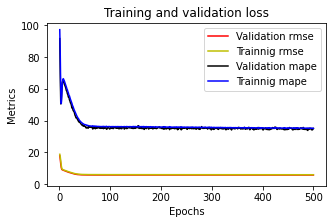

In [110]:
plotme(model4_4_1)
    

In [111]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
390/390 [==============================] - 1s 897us/step - loss: 1240108.5000 - mape: 94.5015 - rmse: 1113.6016 - val_loss: 1057813.1250 - val_mape: 83.1316 - val_rmse: 1028.5004
Epoch 2/500
390/390 [==============================] - 0s 750us/step - loss: 862047.6875 - mape: 65.6959 - rmse: 928.4652 - val_loss: 610634.8125 - val_mape: 51.2466 - val_rmse: 781.4313
Epoch 3/500
390/390 [==============================] - 0s 790us/step - loss: 479218.0938 - mape: 51.2953 - rmse: 692.2558 - val_loss: 350528.7812 - val_mape: 53.9285 - val_rmse: 592.0547
Epoch 4/500
390/390 [==============================] - 0s 751us/step - loss: 329620.9062 - mape: 59.7835 - rmse: 574.1262 - val_loss: 295924.7812 - val_mape: 63.0712 - val_rmse: 543.9897
Epoch 5/500
390/390 [==============================] - 0s 738us/step - loss: 301927.9375 - mape: 65.7343 - rmse: 549.4797 - val_loss: 283979.5625 - val_mape: 65.3910 - val_rmse: 532.8973
Epoch 6/500
390/390 [==============================] - 0s 792

Epoch 88/500
390/390 [==============================] - 0s 760us/step - loss: 130478.0234 - mape: 36.2501 - rmse: 361.2174 - val_loss: 120655.3359 - val_mape: 35.3601 - val_rmse: 347.3548
Epoch 89/500
390/390 [==============================] - 0s 765us/step - loss: 130458.7188 - mape: 36.2765 - rmse: 361.1907 - val_loss: 120714.5156 - val_mape: 35.3941 - val_rmse: 347.4399
Epoch 90/500
390/390 [==============================] - 0s 765us/step - loss: 130453.1484 - mape: 36.1332 - rmse: 361.1830 - val_loss: 120656.5781 - val_mape: 35.6247 - val_rmse: 347.3566
Epoch 91/500
390/390 [==============================] - 0s 760us/step - loss: 130453.8906 - mape: 36.1958 - rmse: 361.1840 - val_loss: 120667.2578 - val_mape: 35.5619 - val_rmse: 347.3719
Epoch 92/500
390/390 [==============================] - 0s 799us/step - loss: 130403.0859 - mape: 36.1279 - rmse: 361.1137 - val_loss: 120915.3125 - val_mape: 36.4289 - val_rmse: 347.7288
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 758us/step - loss: 129458.0234 - mape: 35.9486 - rmse: 359.8028 - val_loss: 120334.4375 - val_mape: 34.9731 - val_rmse: 346.8925
Epoch 175/500
390/390 [==============================] - 0s 757us/step - loss: 129484.6953 - mape: 35.8665 - rmse: 359.8398 - val_loss: 120399.8906 - val_mape: 35.6053 - val_rmse: 346.9869
Epoch 176/500
390/390 [==============================] - 0s 771us/step - loss: 129463.0078 - mape: 35.8372 - rmse: 359.8097 - val_loss: 120338.9141 - val_mape: 35.5062 - val_rmse: 346.8990
Epoch 177/500
390/390 [==============================] - 0s 761us/step - loss: 129482.2656 - mape: 35.9721 - rmse: 359.8365 - val_loss: 120315.8984 - val_mape: 34.7723 - val_rmse: 346.8658
Epoch 178/500
390/390 [==============================] - 0s 744us/step - loss: 129478.6953 - mape: 35.7959 - rmse: 359.8315 - val_loss: 120538.3281 - val_mape: 35.8500 - val_rmse: 347.1863
Epoch 179/500
390/390 [==============================] - 0s 776us/ste

390/390 [==============================] - 0s 902us/step - loss: 128587.5000 - mape: 35.4857 - rmse: 358.5910 - val_loss: 120002.0000 - val_mape: 35.0614 - val_rmse: 346.4131
Epoch 261/500
390/390 [==============================] - 0s 769us/step - loss: 128629.9062 - mape: 35.5726 - rmse: 358.6501 - val_loss: 120067.6094 - val_mape: 35.4279 - val_rmse: 346.5077
Epoch 262/500
390/390 [==============================] - 0s 778us/step - loss: 128571.0703 - mape: 35.5254 - rmse: 358.5681 - val_loss: 119979.7969 - val_mape: 34.5940 - val_rmse: 346.3810
Epoch 263/500
390/390 [==============================] - 0s 737us/step - loss: 128621.3828 - mape: 35.4873 - rmse: 358.6382 - val_loss: 120106.8281 - val_mape: 35.5204 - val_rmse: 346.5643
Epoch 264/500
390/390 [==============================] - 0s 859us/step - loss: 128545.1094 - mape: 35.4173 - rmse: 358.5319 - val_loss: 120311.6328 - val_mape: 35.9835 - val_rmse: 346.8597
Epoch 265/500
390/390 [==============================] - 0s 849us/ste

390/390 [==============================] - 0s 918us/step - loss: 127977.2812 - mape: 35.2632 - rmse: 357.7391 - val_loss: 119714.0312 - val_mape: 34.5147 - val_rmse: 345.9972
Epoch 347/500
390/390 [==============================] - 0s 919us/step - loss: 127979.1953 - mape: 35.1026 - rmse: 357.7418 - val_loss: 120039.8438 - val_mape: 35.6552 - val_rmse: 346.4677
Epoch 348/500
390/390 [==============================] - 0s 929us/step - loss: 127967.8438 - mape: 35.3638 - rmse: 357.7259 - val_loss: 119787.8594 - val_mape: 33.9923 - val_rmse: 346.1038
Epoch 349/500
390/390 [==============================] - 0s 901us/step - loss: 127986.9766 - mape: 35.1352 - rmse: 357.7527 - val_loss: 119894.5469 - val_mape: 35.3852 - val_rmse: 346.2579
Epoch 350/500
390/390 [==============================] - 0s 902us/step - loss: 127968.5234 - mape: 35.2445 - rmse: 357.7269 - val_loss: 119863.9766 - val_mape: 35.1734 - val_rmse: 346.2138
Epoch 351/500
390/390 [==============================] - 0s 958us/ste

390/390 [==============================] - 0s 771us/step - loss: 127602.9766 - mape: 35.1295 - rmse: 357.2156 - val_loss: 119713.0781 - val_mape: 34.5647 - val_rmse: 345.9958
Epoch 433/500
390/390 [==============================] - 0s 874us/step - loss: 127646.4141 - mape: 35.0733 - rmse: 357.2764 - val_loss: 119738.8516 - val_mape: 34.8033 - val_rmse: 346.0330
Epoch 434/500
390/390 [==============================] - 0s 777us/step - loss: 127626.7109 - mape: 35.1057 - rmse: 357.2488 - val_loss: 119632.9219 - val_mape: 34.4869 - val_rmse: 345.8799
Epoch 435/500
390/390 [==============================] - 0s 781us/step - loss: 127581.1797 - mape: 35.1156 - rmse: 357.1851 - val_loss: 119655.1094 - val_mape: 34.3138 - val_rmse: 345.9120
Epoch 436/500
390/390 [==============================] - 0s 742us/step - loss: 127620.1094 - mape: 35.0308 - rmse: 357.2396 - val_loss: 119670.6641 - val_mape: 34.6065 - val_rmse: 345.9345
Epoch 437/500
390/390 [==============================] - 0s 749us/ste

In [112]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
390/390 [==============================] - 0s 877us/step - loss: 1175582.0000 - mape: 89.4840 - rmse: 1084.2426 - val_loss: 880806.7500 - val_mape: 68.3447 - val_rmse: 938.5131
Epoch 2/500
390/390 [==============================] - 0s 782us/step - loss: 613171.6875 - mape: 54.0310 - rmse: 783.0528 - val_loss: 375288.5312 - val_mape: 52.3090 - val_rmse: 612.6080
Epoch 3/500
390/390 [==============================] - 0s 782us/step - loss: 332003.4062 - mape: 60.1301 - rmse: 576.1974 - val_loss: 293001.0312 - val_mape: 64.2818 - val_rmse: 541.2957
Epoch 4/500
390/390 [==============================] - 0s 770us/step - loss: 297373.3750 - mape: 66.1162 - rmse: 545.3195 - val_loss: 277391.1250 - val_mape: 65.1512 - val_rmse: 526.6793
Epoch 5/500
390/390 [==============================] - 0s 754us/step - loss: 282321.0938 - mape: 65.3137 - rmse: 531.3390 - val_loss: 261125.7031 - val_mape: 63.1516 - val_rmse: 511.0046
Epoch 6/500
390/390 [==============================] - 0s 803us

Epoch 45/500
390/390 [==============================] - 0s 780us/step - loss: 130484.9375 - mape: 36.2659 - rmse: 361.2270 - val_loss: 120548.9531 - val_mape: 35.1237 - val_rmse: 347.2016
Epoch 46/500
390/390 [==============================] - 0s 797us/step - loss: 130485.7188 - mape: 36.1915 - rmse: 361.2281 - val_loss: 120668.5938 - val_mape: 35.4881 - val_rmse: 347.3738
Epoch 47/500
390/390 [==============================] - 0s 767us/step - loss: 130443.5938 - mape: 36.2475 - rmse: 361.1698 - val_loss: 120636.5234 - val_mape: 34.4226 - val_rmse: 347.3277
Epoch 48/500
390/390 [==============================] - 0s 774us/step - loss: 130466.9062 - mape: 36.1146 - rmse: 361.2020 - val_loss: 120554.2891 - val_mape: 35.3945 - val_rmse: 347.2093
Epoch 49/500
390/390 [==============================] - 0s 767us/step - loss: 130387.4141 - mape: 36.2052 - rmse: 361.0920 - val_loss: 120459.5625 - val_mape: 35.0390 - val_rmse: 347.0728
Epoch 50/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 734us/step - loss: 128980.6406 - mape: 35.4381 - rmse: 359.1388 - val_loss: 120350.0859 - val_mape: 35.8870 - val_rmse: 346.9151
Epoch 132/500
390/390 [==============================] - 0s 803us/step - loss: 128900.9375 - mape: 35.8075 - rmse: 359.0278 - val_loss: 120064.5547 - val_mape: 34.4271 - val_rmse: 346.5033
Epoch 133/500
390/390 [==============================] - 0s 772us/step - loss: 128870.7031 - mape: 35.6596 - rmse: 358.9857 - val_loss: 120025.3984 - val_mape: 34.6699 - val_rmse: 346.4468
Epoch 134/500
390/390 [==============================] - 0s 736us/step - loss: 128843.7422 - mape: 35.5295 - rmse: 358.9481 - val_loss: 120156.2031 - val_mape: 35.4290 - val_rmse: 346.6356
Epoch 135/500
390/390 [==============================] - 0s 784us/step - loss: 128825.7344 - mape: 35.6720 - rmse: 358.9230 - val_loss: 120070.0859 - val_mape: 34.3259 - val_rmse: 346.5113
Epoch 136/500
390/390 [==============================] - 0s 751us/ste

390/390 [==============================] - 0s 800us/step - loss: 127985.8281 - mape: 35.3529 - rmse: 357.7511 - val_loss: 119662.1719 - val_mape: 34.7744 - val_rmse: 345.9222
Epoch 218/500
390/390 [==============================] - 0s 758us/step - loss: 127942.1875 - mape: 35.2058 - rmse: 357.6901 - val_loss: 119756.0859 - val_mape: 34.8374 - val_rmse: 346.0579
Epoch 219/500
390/390 [==============================] - 0s 772us/step - loss: 127962.5703 - mape: 35.3033 - rmse: 357.7186 - val_loss: 119742.5156 - val_mape: 34.8706 - val_rmse: 346.0383
Epoch 220/500
390/390 [==============================] - 0s 745us/step - loss: 127955.2656 - mape: 35.2753 - rmse: 357.7083 - val_loss: 119683.5312 - val_mape: 34.1828 - val_rmse: 345.9531
Epoch 221/500
390/390 [==============================] - 0s 757us/step - loss: 127941.7969 - mape: 35.2845 - rmse: 357.6895 - val_loss: 119693.4453 - val_mape: 34.5480 - val_rmse: 345.9674
Epoch 222/500
390/390 [==============================] - 0s 759us/ste

390/390 [==============================] - 0s 761us/step - loss: 127348.4609 - mape: 35.0425 - rmse: 356.8592 - val_loss: 119736.4141 - val_mape: 35.1200 - val_rmse: 346.0295
Epoch 304/500
390/390 [==============================] - 0s 768us/step - loss: 127460.6406 - mape: 35.0143 - rmse: 357.0163 - val_loss: 119719.7109 - val_mape: 34.2859 - val_rmse: 346.0054
Epoch 305/500
390/390 [==============================] - 0s 759us/step - loss: 127391.6562 - mape: 34.9695 - rmse: 356.9197 - val_loss: 119829.8125 - val_mape: 35.1931 - val_rmse: 346.1644
Epoch 306/500
390/390 [==============================] - 0s 804us/step - loss: 127476.1250 - mape: 35.0117 - rmse: 357.0380 - val_loss: 119748.3984 - val_mape: 35.3667 - val_rmse: 346.0468
Epoch 307/500
390/390 [==============================] - 0s 757us/step - loss: 127444.3047 - mape: 35.1538 - rmse: 356.9934 - val_loss: 119665.2344 - val_mape: 34.4094 - val_rmse: 345.9266
Epoch 308/500
390/390 [==============================] - 0s 775us/ste

390/390 [==============================] - 0s 771us/step - loss: 127157.0703 - mape: 34.9350 - rmse: 356.5909 - val_loss: 119928.9062 - val_mape: 35.0796 - val_rmse: 346.3075
Epoch 390/500
390/390 [==============================] - 0s 771us/step - loss: 127174.7578 - mape: 34.9869 - rmse: 356.6157 - val_loss: 119790.8594 - val_mape: 34.4830 - val_rmse: 346.1082
Epoch 391/500
390/390 [==============================] - 0s 764us/step - loss: 127115.7031 - mape: 34.7508 - rmse: 356.5329 - val_loss: 120235.3125 - val_mape: 36.0397 - val_rmse: 346.7496
Epoch 392/500
390/390 [==============================] - 0s 778us/step - loss: 127198.0859 - mape: 34.9749 - rmse: 356.6484 - val_loss: 119727.0469 - val_mape: 34.8875 - val_rmse: 346.0160
Epoch 393/500
390/390 [==============================] - 0s 772us/step - loss: 127137.5625 - mape: 34.9237 - rmse: 356.5635 - val_loss: 119824.4375 - val_mape: 34.4932 - val_rmse: 346.1567
Epoch 394/500
390/390 [==============================] - 0s 832us/ste

390/390 [==============================] - 0s 761us/step - loss: 126981.3516 - mape: 34.8767 - rmse: 356.3444 - val_loss: 119903.7422 - val_mape: 34.5917 - val_rmse: 346.2712
Epoch 476/500
390/390 [==============================] - 0s 773us/step - loss: 126966.3516 - mape: 34.8503 - rmse: 356.3234 - val_loss: 119883.3438 - val_mape: 34.5027 - val_rmse: 346.2417
Epoch 477/500
390/390 [==============================] - 0s 752us/step - loss: 127011.9219 - mape: 34.7984 - rmse: 356.3873 - val_loss: 119801.8047 - val_mape: 34.4971 - val_rmse: 346.1240
Epoch 478/500
390/390 [==============================] - 0s 793us/step - loss: 127009.2812 - mape: 34.8312 - rmse: 356.3836 - val_loss: 119779.5312 - val_mape: 34.4662 - val_rmse: 346.0918
Epoch 479/500
390/390 [==============================] - 0s 743us/step - loss: 126992.1172 - mape: 34.7593 - rmse: 356.3595 - val_loss: 120027.1250 - val_mape: 35.3251 - val_rmse: 346.4493
Epoch 480/500
390/390 [==============================] - 0s 787us/ste

In [113]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
390/390 [==============================] - 1s 933us/step - loss: 709979.5000 - mape: 73.8375 - rmse: 842.6028 - val_loss: 279448.7188 - val_mape: 65.3686 - val_rmse: 528.6291
Epoch 2/500
390/390 [==============================] - 0s 819us/step - loss: 268327.5000 - mape: 64.1651 - rmse: 518.0034 - val_loss: 232497.5312 - val_mape: 60.2082 - val_rmse: 482.1800
Epoch 3/500
390/390 [==============================] - 0s 790us/step - loss: 229684.5000 - mape: 58.7006 - rmse: 479.2541 - val_loss: 196421.0000 - val_mape: 54.1303 - val_rmse: 443.1941
Epoch 4/500
390/390 [==============================] - 0s 853us/step - loss: 194599.3125 - mape: 52.8495 - rmse: 441.1341 - val_loss: 163439.5938 - val_mape: 48.6566 - val_rmse: 404.2766
Epoch 5/500
390/390 [==============================] - 0s 792us/step - loss: 163139.8281 - mape: 46.4941 - rmse: 403.9057 - val_loss: 139292.6562 - val_mape: 42.9197 - val_rmse: 373.2193
Epoch 6/500
390/390 [==============================] - 0s 795us/s

Epoch 45/500
390/390 [==============================] - 0s 835us/step - loss: 130118.7266 - mape: 36.1575 - rmse: 360.7197 - val_loss: 120190.7109 - val_mape: 35.7220 - val_rmse: 346.6853
Epoch 46/500
390/390 [==============================] - 0s 825us/step - loss: 130142.0391 - mape: 36.1717 - rmse: 360.7520 - val_loss: 120311.1094 - val_mape: 34.5616 - val_rmse: 346.8589
Epoch 47/500
390/390 [==============================] - 0s 810us/step - loss: 130058.4453 - mape: 36.1158 - rmse: 360.6362 - val_loss: 120719.6328 - val_mape: 36.3452 - val_rmse: 347.4473
Epoch 48/500
390/390 [==============================] - 0s 787us/step - loss: 129984.4375 - mape: 36.1606 - rmse: 360.5335 - val_loss: 120229.9609 - val_mape: 34.9636 - val_rmse: 346.7419
Epoch 49/500
390/390 [==============================] - 0s 779us/step - loss: 129980.1094 - mape: 36.1449 - rmse: 360.5276 - val_loss: 120724.3359 - val_mape: 37.3358 - val_rmse: 347.4541
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 977us/step - loss: 129436.3203 - mape: 35.9920 - rmse: 359.7726 - val_loss: 120466.0625 - val_mape: 35.7007 - val_rmse: 347.0822
Epoch 132/500
390/390 [==============================] - 0s 804us/step - loss: 129516.2266 - mape: 35.9140 - rmse: 359.8836 - val_loss: 120449.4375 - val_mape: 34.4966 - val_rmse: 347.0583
Epoch 133/500
390/390 [==============================] - 0s 879us/step - loss: 129568.1953 - mape: 35.9207 - rmse: 359.9558 - val_loss: 121005.7812 - val_mape: 37.0811 - val_rmse: 347.8589
Epoch 134/500
390/390 [==============================] - 0s 854us/step - loss: 129478.4844 - mape: 36.0299 - rmse: 359.8312 - val_loss: 120200.4922 - val_mape: 36.1066 - val_rmse: 346.6994
Epoch 135/500
390/390 [==============================] - 0s 862us/step - loss: 129477.4609 - mape: 36.0590 - rmse: 359.8298 - val_loss: 120147.9766 - val_mape: 34.3723 - val_rmse: 346.6237
Epoch 136/500
390/390 [==============================] - 0s 825us/ste

390/390 [==============================] - 0s 808us/step - loss: 129181.6875 - mape: 35.8147 - rmse: 359.4185 - val_loss: 120310.3047 - val_mape: 35.1921 - val_rmse: 346.8578
Epoch 218/500
390/390 [==============================] - 0s 779us/step - loss: 129162.3594 - mape: 35.7242 - rmse: 359.3917 - val_loss: 121568.0078 - val_mape: 38.0012 - val_rmse: 348.6660
Epoch 219/500
390/390 [==============================] - 0s 825us/step - loss: 129169.0469 - mape: 35.8990 - rmse: 359.4010 - val_loss: 120017.0469 - val_mape: 36.1396 - val_rmse: 346.4348
Epoch 220/500
390/390 [==============================] - 0s 756us/step - loss: 129085.2734 - mape: 35.8524 - rmse: 359.2844 - val_loss: 121119.7656 - val_mape: 37.1902 - val_rmse: 348.0226
Epoch 221/500
390/390 [==============================] - 0s 764us/step - loss: 129021.0469 - mape: 35.9707 - rmse: 359.1950 - val_loss: 120252.7812 - val_mape: 34.3117 - val_rmse: 346.7748
Epoch 222/500
390/390 [==============================] - 0s 818us/ste

390/390 [==============================] - 0s 842us/step - loss: 128533.6406 - mape: 35.6019 - rmse: 358.5159 - val_loss: 120102.0000 - val_mape: 33.5403 - val_rmse: 346.5573
Epoch 304/500
390/390 [==============================] - 0s 797us/step - loss: 128448.8594 - mape: 35.5059 - rmse: 358.3976 - val_loss: 120155.3125 - val_mape: 33.9061 - val_rmse: 346.6343
Epoch 305/500
390/390 [==============================] - 0s 826us/step - loss: 128440.5156 - mape: 35.6750 - rmse: 358.3860 - val_loss: 120301.5156 - val_mape: 35.4958 - val_rmse: 346.8451
Epoch 306/500
390/390 [==============================] - 0s 781us/step - loss: 128331.8203 - mape: 35.4643 - rmse: 358.2343 - val_loss: 120122.7656 - val_mape: 34.5965 - val_rmse: 346.5873
Epoch 307/500
390/390 [==============================] - 0s 834us/step - loss: 128530.6094 - mape: 35.5425 - rmse: 358.5117 - val_loss: 119940.3359 - val_mape: 35.1976 - val_rmse: 346.3240
Epoch 308/500
390/390 [==============================] - 0s 798us/ste

390/390 [==============================] - 0s 765us/step - loss: 127504.9766 - mape: 35.0218 - rmse: 357.0784 - val_loss: 120800.4219 - val_mape: 36.3541 - val_rmse: 347.5635
Epoch 390/500
390/390 [==============================] - 0s 825us/step - loss: 127155.6250 - mape: 34.9660 - rmse: 356.5889 - val_loss: 120568.9062 - val_mape: 34.3516 - val_rmse: 347.2303
Epoch 391/500
390/390 [==============================] - 0s 792us/step - loss: 127299.0625 - mape: 35.0175 - rmse: 356.7899 - val_loss: 119935.0234 - val_mape: 35.2813 - val_rmse: 346.3164
Epoch 392/500
390/390 [==============================] - 0s 838us/step - loss: 127249.8750 - mape: 35.0354 - rmse: 356.7210 - val_loss: 119988.5781 - val_mape: 34.4504 - val_rmse: 346.3937
Epoch 393/500
390/390 [==============================] - 0s 778us/step - loss: 127387.7031 - mape: 35.0406 - rmse: 356.9142 - val_loss: 120726.6484 - val_mape: 36.4704 - val_rmse: 347.4574
Epoch 394/500
390/390 [==============================] - 0s 847us/ste

390/390 [==============================] - 0s 862us/step - loss: 127116.6875 - mape: 35.0042 - rmse: 356.5343 - val_loss: 120819.2188 - val_mape: 36.3827 - val_rmse: 347.5906
Epoch 476/500
390/390 [==============================] - 0s 819us/step - loss: 127227.6328 - mape: 34.9154 - rmse: 356.6898 - val_loss: 120193.1484 - val_mape: 34.8713 - val_rmse: 346.6888
Epoch 477/500
390/390 [==============================] - 0s 869us/step - loss: 127174.8672 - mape: 35.0448 - rmse: 356.6158 - val_loss: 120765.8984 - val_mape: 35.8249 - val_rmse: 347.5139
Epoch 478/500
390/390 [==============================] - 0s 834us/step - loss: 127211.7109 - mape: 34.9772 - rmse: 356.6675 - val_loss: 121363.3047 - val_mape: 36.4274 - val_rmse: 348.3724
Epoch 479/500
390/390 [==============================] - 0s 863us/step - loss: 127243.6094 - mape: 34.8572 - rmse: 356.7122 - val_loss: 120251.3516 - val_mape: 35.5129 - val_rmse: 346.7728
Epoch 480/500
390/390 [==============================] - 0s 859us/ste

In [114]:
# plotme(model4_4_4)

In [115]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 579009.6875 - mape: 71.3478 - rmse: 760.9269 - val_loss: 252909.3750 - val_mape: 62.4944 - val_rmse: 502.9010
Epoch 2/500
390/390 [==============================] - 0s 876us/step - loss: 238059.2656 - mape: 59.8296 - rmse: 487.9132 - val_loss: 194743.8125 - val_mape: 54.0996 - val_rmse: 441.2979
Epoch 3/500
390/390 [==============================] - 0s 903us/step - loss: 184579.7812 - mape: 50.8119 - rmse: 429.6275 - val_loss: 147757.0000 - val_mape: 45.7822 - val_rmse: 384.3917
Epoch 4/500
390/390 [==============================] - 0s 845us/step - loss: 147285.4688 - mape: 42.3721 - rmse: 383.7779 - val_loss: 127001.9062 - val_mape: 36.7615 - val_rmse: 356.3733
Epoch 5/500
390/390 [==============================] - 0s 877us/step - loss: 135427.7969 - mape: 38.1401 - rmse: 368.0052 - val_loss: 123168.2188 - val_mape: 37.1529 - val_rmse: 350.9533
Epoch 6/500
390/390 [==============================] - 0s 909us/ste

Epoch 45/500
390/390 [==============================] - 0s 896us/step - loss: 129785.2031 - mape: 36.3031 - rmse: 360.2571 - val_loss: 120049.2734 - val_mape: 35.5095 - val_rmse: 346.4813
Epoch 46/500
390/390 [==============================] - 0s 959us/step - loss: 129857.2188 - mape: 36.0681 - rmse: 360.3571 - val_loss: 120630.2969 - val_mape: 35.7812 - val_rmse: 347.3187
Epoch 47/500
390/390 [==============================] - 0s 878us/step - loss: 129780.6172 - mape: 36.0015 - rmse: 360.2508 - val_loss: 120110.1562 - val_mape: 34.2105 - val_rmse: 346.5691
Epoch 48/500
390/390 [==============================] - 0s 867us/step - loss: 129704.5078 - mape: 35.9331 - rmse: 360.1451 - val_loss: 119813.0859 - val_mape: 34.6965 - val_rmse: 346.1403
Epoch 49/500
390/390 [==============================] - 0s 838us/step - loss: 129789.7422 - mape: 36.1338 - rmse: 360.2634 - val_loss: 120125.9141 - val_mape: 35.0768 - val_rmse: 346.5919
Epoch 50/500
390/390 [==============================] - 0s 9

390/390 [==============================] - 0s 914us/step - loss: 129044.3984 - mape: 35.7755 - rmse: 359.2275 - val_loss: 120433.1797 - val_mape: 36.4669 - val_rmse: 347.0349
Epoch 132/500
390/390 [==============================] - 0s 862us/step - loss: 129031.8594 - mape: 35.9060 - rmse: 359.2101 - val_loss: 120744.5547 - val_mape: 36.7480 - val_rmse: 347.4832
Epoch 133/500
390/390 [==============================] - 0s 861us/step - loss: 128919.0469 - mape: 35.7956 - rmse: 359.0530 - val_loss: 119806.2969 - val_mape: 34.7963 - val_rmse: 346.1305
Epoch 134/500
390/390 [==============================] - 0s 868us/step - loss: 129064.0000 - mape: 35.9569 - rmse: 359.2548 - val_loss: 120647.2578 - val_mape: 32.9713 - val_rmse: 347.3431
Epoch 135/500
390/390 [==============================] - 0s 883us/step - loss: 128989.7500 - mape: 35.7132 - rmse: 359.1514 - val_loss: 120484.9141 - val_mape: 35.3170 - val_rmse: 347.1094
Epoch 136/500
390/390 [==============================] - 0s 864us/ste

390/390 [==============================] - 0s 902us/step - loss: 127683.4531 - mape: 34.9605 - rmse: 357.3282 - val_loss: 120155.7812 - val_mape: 36.2988 - val_rmse: 346.6349
Epoch 218/500
390/390 [==============================] - 0s 882us/step - loss: 127696.2344 - mape: 35.2548 - rmse: 357.3461 - val_loss: 119688.1953 - val_mape: 34.3713 - val_rmse: 345.9598
Epoch 219/500
390/390 [==============================] - 0s 904us/step - loss: 127542.0469 - mape: 35.0430 - rmse: 357.1303 - val_loss: 120513.6719 - val_mape: 33.1185 - val_rmse: 347.1508
Epoch 220/500
390/390 [==============================] - 0s 853us/step - loss: 127654.1172 - mape: 35.2179 - rmse: 357.2872 - val_loss: 120526.3203 - val_mape: 36.9328 - val_rmse: 347.1690
Epoch 221/500
390/390 [==============================] - 0s 906us/step - loss: 127456.0625 - mape: 35.1085 - rmse: 357.0099 - val_loss: 119847.7500 - val_mape: 35.4723 - val_rmse: 346.1903
Epoch 222/500
390/390 [==============================] - 0s 883us/ste

390/390 [==============================] - 0s 866us/step - loss: 126596.8281 - mape: 34.8893 - rmse: 355.8045 - val_loss: 119960.9062 - val_mape: 33.9755 - val_rmse: 346.3537
Epoch 304/500
390/390 [==============================] - 0s 878us/step - loss: 126335.4766 - mape: 34.6539 - rmse: 355.4370 - val_loss: 120581.1875 - val_mape: 35.8171 - val_rmse: 347.2480
Epoch 305/500
390/390 [==============================] - 0s 895us/step - loss: 126443.2500 - mape: 34.6435 - rmse: 355.5886 - val_loss: 119455.2734 - val_mape: 35.0260 - val_rmse: 345.6230
Epoch 306/500
390/390 [==============================] - 0s 923us/step - loss: 126567.1328 - mape: 34.7179 - rmse: 355.7628 - val_loss: 119890.8828 - val_mape: 35.3054 - val_rmse: 346.2526
Epoch 307/500
390/390 [==============================] - 0s 948us/step - loss: 126576.2891 - mape: 34.6822 - rmse: 355.7756 - val_loss: 119495.4141 - val_mape: 35.4651 - val_rmse: 345.6811
Epoch 308/500
390/390 [==============================] - 0s 912us/ste

390/390 [==============================] - 0s 906us/step - loss: 125654.3594 - mape: 34.4659 - rmse: 354.4776 - val_loss: 120153.7422 - val_mape: 34.7599 - val_rmse: 346.6320
Epoch 390/500
390/390 [==============================] - 0s 884us/step - loss: 125793.7734 - mape: 34.5903 - rmse: 354.6742 - val_loss: 119891.7109 - val_mape: 35.1522 - val_rmse: 346.2538
Epoch 391/500
390/390 [==============================] - 0s 884us/step - loss: 125970.9453 - mape: 34.4949 - rmse: 354.9239 - val_loss: 119953.7031 - val_mape: 32.8956 - val_rmse: 346.3433
Epoch 392/500
390/390 [==============================] - 0s 910us/step - loss: 125987.4219 - mape: 34.5550 - rmse: 354.9471 - val_loss: 120462.2344 - val_mape: 36.2933 - val_rmse: 347.0767
Epoch 393/500
390/390 [==============================] - 0s 900us/step - loss: 125731.8516 - mape: 34.6727 - rmse: 354.5869 - val_loss: 119685.5391 - val_mape: 34.3920 - val_rmse: 345.9560
Epoch 394/500
390/390 [==============================] - 0s 887us/ste

390/390 [==============================] - 0s 877us/step - loss: 125428.4609 - mape: 34.4853 - rmse: 354.1588 - val_loss: 119437.2578 - val_mape: 33.1063 - val_rmse: 345.5970
Epoch 476/500
390/390 [==============================] - 0s 857us/step - loss: 125475.0703 - mape: 34.4679 - rmse: 354.2246 - val_loss: 119329.2188 - val_mape: 34.1617 - val_rmse: 345.4406
Epoch 477/500
390/390 [==============================] - 0s 921us/step - loss: 125480.0859 - mape: 34.6257 - rmse: 354.2317 - val_loss: 120035.7734 - val_mape: 35.5048 - val_rmse: 346.4618
Epoch 478/500
390/390 [==============================] - 0s 928us/step - loss: 125445.5938 - mape: 34.5144 - rmse: 354.1830 - val_loss: 119208.4844 - val_mape: 34.1207 - val_rmse: 345.2658
Epoch 479/500
390/390 [==============================] - 0s 926us/step - loss: 125372.4375 - mape: 34.4825 - rmse: 354.0797 - val_loss: 119725.1094 - val_mape: 35.0235 - val_rmse: 346.0132
Epoch 480/500
390/390 [==============================] - 0s 1ms/step 

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [116]:
df7 = df1.iloc[:,:].copy()
# df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1163           18  0.578883  0.297385    0.810945         0.895604   
1          347           21  0.048963  0.023418    0.791667         0.863636   
2          720           19  0.268455  0.142794    0.681159         0.758065   
3          355           16  0.056803  0.043956    0.406250         0.309524   
4          356           17  0.076939  0.058963    0.387755         0.452381   

     1st ranked    2nd ranked   3rd ranked  1st dist  2nd dist  3rd dist  \
0       primary       service  residential  0.942077  0.038438  0.019485   
1       service  unclassified  residential  0.329781  0.247697  0.233717   
2       primary  unclassified     tertiary  0.848450  0.070327  0.036221   
3  unclassified       service      primary  0.458768  0.292752  0.165359   
4   residential  unclassified      service  0.351629  0.270712  0.208898   

     hr_sin        hr_cos  
0 -1.000000 -1.836970e-16  
1 -0.707107  7.071068e-01  
2 -0.965926  2.588190e-01  
3 -0.866025 -5.000000e-01  
4 -0.965926 -2.588190e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

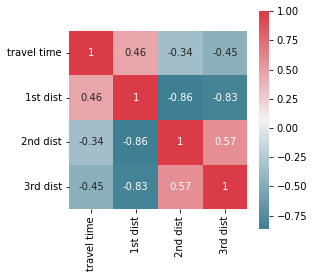

In [117]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7[['travel time','1st dist','2nd dist','3rd dist']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [118]:
x = np.array(df7[['est_dist','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.2973851 , 0.94207722, 0.0384379 , 0.01948487],
       [0.02341767, 0.32978142, 0.24769673, 0.23371714],
       [0.1427945 , 0.8484496 , 0.07032717, 0.03622133],
       ...,
       [0.32470443, 0.9223731 , 0.06718749, 0.00808443],
       [0.32141647, 0.91597878, 0.07490417, 0.00802838],
       [0.18431671, 0.92943486, 0.07056514, 0.        ]])

In [119]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 4)
(3120, 4)


In [121]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
390/390 [==============================] - 0s 883us/step - loss: 1313130.3750 - mape: 99.8026 - rmse: 1145.9191 - val_loss: 1274962.7500 - val_mape: 99.4984 - val_rmse: 1129.1425
Epoch 2/500
390/390 [==============================] - 0s 737us/step - loss: 1299154.8750 - mape: 98.8937 - rmse: 1139.8048 - val_loss: 1254485.3750 - val_mape: 98.1381 - val_rmse: 1120.0381
Epoch 3/500
390/390 [==============================] - 0s 785us/step - loss: 1272790.5000 - mape: 97.1356 - rmse: 1128.1802 - val_loss: 1223201.3750 - val_mape: 96.0320 - val_rmse: 1105.9844
Epoch 4/500
390/390 [==============================] - 0s 751us/step - loss: 1236653.5000 - mape: 94.6896 - rmse: 1112.0492 - val_loss: 1183227.8750 - val_mape: 93.2914 - val_rmse: 1087.7628
Epoch 5/500
390/390 [==============================] - 0s 773us/step - loss: 1192552.3750 - mape: 91.6623 - rmse: 1092.0404 - val_loss: 1136245.5000 - val_mape: 89.9952 - val_rmse: 1065.9481
Epoch 6/500
390/390 [========================

Epoch 88/500
390/390 [==============================] - 0s 731us/step - loss: 151727.3438 - mape: 43.9970 - rmse: 389.5219 - val_loss: 139597.8594 - val_mape: 42.9941 - val_rmse: 373.6280
Epoch 89/500
390/390 [==============================] - 0s 728us/step - loss: 151147.7188 - mape: 43.9125 - rmse: 388.7772 - val_loss: 139061.1562 - val_mape: 42.7822 - val_rmse: 372.9091
Epoch 90/500
390/390 [==============================] - 0s 740us/step - loss: 150575.3125 - mape: 43.7734 - rmse: 388.0403 - val_loss: 138550.0156 - val_mape: 42.6278 - val_rmse: 372.2231
Epoch 91/500
390/390 [==============================] - 0s 739us/step - loss: 150013.3594 - mape: 43.5721 - rmse: 387.3156 - val_loss: 138048.2344 - val_mape: 42.4735 - val_rmse: 371.5484
Epoch 92/500
390/390 [==============================] - 0s 738us/step - loss: 149464.2188 - mape: 43.5170 - rmse: 386.6060 - val_loss: 137532.0469 - val_mape: 42.1645 - val_rmse: 370.8531
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 758us/step - loss: 133193.2188 - mape: 37.4098 - rmse: 364.9565 - val_loss: 123607.2031 - val_mape: 36.7728 - val_rmse: 351.5782
Epoch 175/500
390/390 [==============================] - 0s 713us/step - loss: 133166.0625 - mape: 37.3297 - rmse: 364.9193 - val_loss: 123592.4375 - val_mape: 36.7811 - val_rmse: 351.5572
Epoch 176/500
390/390 [==============================] - 0s 732us/step - loss: 133141.4531 - mape: 37.3127 - rmse: 364.8855 - val_loss: 123573.2422 - val_mape: 36.7622 - val_rmse: 351.5298
Epoch 177/500
390/390 [==============================] - 0s 728us/step - loss: 133120.3750 - mape: 37.2623 - rmse: 364.8567 - val_loss: 123566.9531 - val_mape: 36.7950 - val_rmse: 351.5209
Epoch 178/500
390/390 [==============================] - 0s 756us/step - loss: 133094.8281 - mape: 37.2007 - rmse: 364.8216 - val_loss: 123574.7422 - val_mape: 36.8772 - val_rmse: 351.5320
Epoch 179/500
390/390 [==============================] - 0s 682us/ste

390/390 [==============================] - 0s 736us/step - loss: 132606.8594 - mape: 36.7408 - rmse: 364.1523 - val_loss: 123241.4375 - val_mape: 36.1997 - val_rmse: 351.0576
Epoch 261/500
390/390 [==============================] - 0s 719us/step - loss: 132604.0625 - mape: 36.5585 - rmse: 364.1484 - val_loss: 123279.2344 - val_mape: 36.3660 - val_rmse: 351.1114
Epoch 262/500
390/390 [==============================] - 0s 714us/step - loss: 132601.6875 - mape: 36.6891 - rmse: 364.1451 - val_loss: 123286.9219 - val_mape: 36.3951 - val_rmse: 351.1224
Epoch 263/500
390/390 [==============================] - 0s 735us/step - loss: 132604.6875 - mape: 36.7579 - rmse: 364.1493 - val_loss: 123279.5781 - val_mape: 36.3653 - val_rmse: 351.1119
Epoch 264/500
390/390 [==============================] - 0s 751us/step - loss: 132599.4688 - mape: 36.6964 - rmse: 364.1421 - val_loss: 123287.5781 - val_mape: 36.3949 - val_rmse: 351.1233
Epoch 265/500
390/390 [==============================] - 0s 725us/ste

390/390 [==============================] - 0s 718us/step - loss: 132568.0938 - mape: 36.6543 - rmse: 364.0990 - val_loss: 123258.2031 - val_mape: 36.2405 - val_rmse: 351.0815
Epoch 347/500
390/390 [==============================] - 0s 794us/step - loss: 132574.7656 - mape: 36.6719 - rmse: 364.1082 - val_loss: 123261.8984 - val_mape: 36.2600 - val_rmse: 351.0867
Epoch 348/500
390/390 [==============================] - 0s 731us/step - loss: 132571.5312 - mape: 36.6841 - rmse: 364.1037 - val_loss: 123261.9062 - val_mape: 36.2492 - val_rmse: 351.0868
Epoch 349/500
390/390 [==============================] - 0s 750us/step - loss: 132570.0312 - mape: 36.5839 - rmse: 364.1017 - val_loss: 123271.9609 - val_mape: 36.2976 - val_rmse: 351.1011
Epoch 350/500
390/390 [==============================] - 0s 744us/step - loss: 132572.0781 - mape: 36.6310 - rmse: 364.1045 - val_loss: 123283.4453 - val_mape: 36.3453 - val_rmse: 351.1174
Epoch 351/500
390/390 [==============================] - 0s 708us/ste

390/390 [==============================] - 0s 717us/step - loss: 132562.0938 - mape: 36.6497 - rmse: 364.0908 - val_loss: 123260.2344 - val_mape: 36.2392 - val_rmse: 351.0844
Epoch 433/500
390/390 [==============================] - 0s 702us/step - loss: 132565.9062 - mape: 36.6651 - rmse: 364.0960 - val_loss: 123247.5781 - val_mape: 36.1904 - val_rmse: 351.0663
Epoch 434/500
390/390 [==============================] - 0s 723us/step - loss: 132558.9531 - mape: 36.6104 - rmse: 364.0865 - val_loss: 123275.7500 - val_mape: 36.3116 - val_rmse: 351.1065
Epoch 435/500
390/390 [==============================] - 0s 774us/step - loss: 132563.4688 - mape: 36.6577 - rmse: 364.0927 - val_loss: 123270.7578 - val_mape: 36.2940 - val_rmse: 351.0994
Epoch 436/500
390/390 [==============================] - 0s 747us/step - loss: 132562.5938 - mape: 36.6862 - rmse: 364.0915 - val_loss: 123253.9922 - val_mape: 36.2212 - val_rmse: 351.0755
Epoch 437/500
390/390 [==============================] - 0s 703us/ste

In [122]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
390/390 [==============================] - 1s 963us/step - loss: 1300277.3750 - mape: 98.9578 - rmse: 1140.2970 - val_loss: 1238710.0000 - val_mape: 97.0869 - val_rmse: 1112.9735
Epoch 2/500
390/390 [==============================] - 0s 723us/step - loss: 1218778.8750 - mape: 93.4176 - rmse: 1103.9832 - val_loss: 1123355.3750 - val_mape: 89.0945 - val_rmse: 1059.8846
Epoch 3/500
390/390 [==============================] - 0s 756us/step - loss: 1076181.8750 - mape: 83.3612 - rmse: 1037.3918 - val_loss: 961416.7500 - val_mape: 76.9753 - val_rmse: 980.5186
Epoch 4/500
390/390 [==============================] - 0s 685us/step - loss: 901402.4375 - mape: 70.0150 - rmse: 949.4222 - val_loss: 782532.1250 - val_mape: 62.6831 - val_rmse: 884.6085
Epoch 5/500
390/390 [==============================] - 0s 705us/step - loss: 722151.5000 - mape: 56.5184 - rmse: 849.7950 - val_loss: 611472.6875 - val_mape: 50.5001 - val_rmse: 781.9672
Epoch 6/500
390/390 [==============================] - 

Epoch 88/500
390/390 [==============================] - 0s 771us/step - loss: 131794.8438 - mape: 36.7592 - rmse: 363.0356 - val_loss: 122684.2031 - val_mape: 36.1928 - val_rmse: 350.2631
Epoch 89/500
390/390 [==============================] - 0s 775us/step - loss: 131757.2031 - mape: 36.6566 - rmse: 362.9838 - val_loss: 122649.9062 - val_mape: 36.0421 - val_rmse: 350.2141
Epoch 90/500
390/390 [==============================] - 0s 734us/step - loss: 131720.6250 - mape: 36.4983 - rmse: 362.9333 - val_loss: 122694.0078 - val_mape: 36.3393 - val_rmse: 350.2770
Epoch 91/500
390/390 [==============================] - 0s 756us/step - loss: 131680.9844 - mape: 36.6788 - rmse: 362.8788 - val_loss: 122627.7422 - val_mape: 36.0902 - val_rmse: 350.1824
Epoch 92/500
390/390 [==============================] - 0s 731us/step - loss: 131643.3906 - mape: 36.5224 - rmse: 362.8269 - val_loss: 122648.4531 - val_mape: 36.2742 - val_rmse: 350.2120
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 701us/step - loss: 130581.4375 - mape: 35.9688 - rmse: 361.3605 - val_loss: 122376.0391 - val_mape: 35.1230 - val_rmse: 349.8229
Epoch 175/500
390/390 [==============================] - 0s 729us/step - loss: 130594.5859 - mape: 35.7593 - rmse: 361.3787 - val_loss: 122407.5312 - val_mape: 35.4307 - val_rmse: 349.8679
Epoch 176/500
390/390 [==============================] - 0s 710us/step - loss: 130588.6094 - mape: 35.6497 - rmse: 361.3705 - val_loss: 122507.8906 - val_mape: 35.8326 - val_rmse: 350.0113
Epoch 177/500
390/390 [==============================] - 0s 717us/step - loss: 130585.2656 - mape: 35.8554 - rmse: 361.3658 - val_loss: 122446.7812 - val_mape: 35.6051 - val_rmse: 349.9240
Epoch 178/500
390/390 [==============================] - 0s 713us/step - loss: 130574.9141 - mape: 35.8622 - rmse: 361.3515 - val_loss: 122407.5781 - val_mape: 35.3464 - val_rmse: 349.8680
Epoch 179/500
390/390 [==============================] - 0s 717us/ste

390/390 [==============================] - 0s 721us/step - loss: 130372.4062 - mape: 35.7218 - rmse: 361.0712 - val_loss: 122445.1875 - val_mape: 35.2123 - val_rmse: 349.9217
Epoch 261/500
390/390 [==============================] - 0s 729us/step - loss: 130355.1016 - mape: 35.5760 - rmse: 361.0472 - val_loss: 122453.8281 - val_mape: 35.2751 - val_rmse: 349.9340
Epoch 262/500
390/390 [==============================] - 0s 717us/step - loss: 130333.5234 - mape: 35.7568 - rmse: 361.0173 - val_loss: 122415.0703 - val_mape: 34.8558 - val_rmse: 349.8787
Epoch 263/500
390/390 [==============================] - 0s 729us/step - loss: 130360.8828 - mape: 35.4575 - rmse: 361.0552 - val_loss: 122439.8125 - val_mape: 35.1967 - val_rmse: 349.9140
Epoch 264/500
390/390 [==============================] - 0s 727us/step - loss: 130337.7578 - mape: 35.5219 - rmse: 361.0232 - val_loss: 122490.7578 - val_mape: 35.4563 - val_rmse: 349.9868
Epoch 265/500
390/390 [==============================] - 0s 720us/ste

390/390 [==============================] - 0s 689us/step - loss: 130204.0703 - mape: 35.2667 - rmse: 360.8380 - val_loss: 122629.2422 - val_mape: 35.7114 - val_rmse: 350.1846
Epoch 347/500
390/390 [==============================] - 0s 713us/step - loss: 130236.8281 - mape: 35.5431 - rmse: 360.8834 - val_loss: 122591.7344 - val_mape: 35.6156 - val_rmse: 350.1310
Epoch 348/500
390/390 [==============================] - 0s 726us/step - loss: 130214.7344 - mape: 35.7243 - rmse: 360.8528 - val_loss: 122471.9688 - val_mape: 34.8999 - val_rmse: 349.9600
Epoch 349/500
390/390 [==============================] - 0s 727us/step - loss: 130230.6406 - mape: 35.4735 - rmse: 360.8748 - val_loss: 122480.7266 - val_mape: 34.9880 - val_rmse: 349.9725
Epoch 350/500
390/390 [==============================] - 0s 666us/step - loss: 130219.8203 - mape: 35.3742 - rmse: 360.8598 - val_loss: 122528.8281 - val_mape: 35.3055 - val_rmse: 350.0412
Epoch 351/500
390/390 [==============================] - 0s 725us/ste

390/390 [==============================] - 0s 698us/step - loss: 130171.0781 - mape: 35.4228 - rmse: 360.7923 - val_loss: 122615.0469 - val_mape: 35.4605 - val_rmse: 350.1643
Epoch 433/500
390/390 [==============================] - 0s 716us/step - loss: 130180.6328 - mape: 35.5094 - rmse: 360.8055 - val_loss: 122571.7344 - val_mape: 35.2451 - val_rmse: 350.1024
Epoch 434/500
390/390 [==============================] - 0s 724us/step - loss: 130183.2891 - mape: 35.4708 - rmse: 360.8092 - val_loss: 122563.5391 - val_mape: 35.2022 - val_rmse: 350.0908
Epoch 435/500
390/390 [==============================] - 0s 726us/step - loss: 130182.0234 - mape: 35.5061 - rmse: 360.8075 - val_loss: 122539.4219 - val_mape: 35.0237 - val_rmse: 350.0563
Epoch 436/500
390/390 [==============================] - 0s 729us/step - loss: 130165.7656 - mape: 35.2954 - rmse: 360.7849 - val_loss: 122625.8750 - val_mape: 35.4947 - val_rmse: 350.1798
Epoch 437/500
390/390 [==============================] - 0s 805us/ste

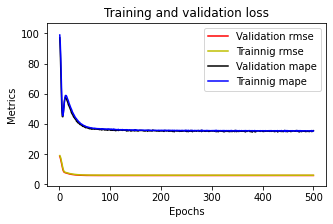

In [123]:
plotme(model6_1_3)

In [124]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
390/390 [==============================] - 0s 879us/step - loss: 1287682.3750 - mape: 98.0798 - rmse: 1134.7610 - val_loss: 1199187.7500 - val_mape: 94.3943 - val_rmse: 1095.0743
Epoch 2/500
390/390 [==============================] - 0s 790us/step - loss: 1130106.2500 - mape: 87.2106 - rmse: 1063.0646 - val_loss: 981678.7500 - val_mape: 78.5278 - val_rmse: 990.7971
Epoch 3/500
390/390 [==============================] - 0s 740us/step - loss: 879033.8125 - mape: 68.0675 - rmse: 937.5681 - val_loss: 717811.6250 - val_mape: 57.6400 - val_rmse: 847.2377
Epoch 4/500
390/390 [==============================] - 0s 771us/step - loss: 621514.0625 - mape: 50.8916 - rmse: 788.3616 - val_loss: 485406.4688 - val_mape: 45.3211 - val_rmse: 696.7112
Epoch 5/500
390/390 [==============================] - 0s 757us/step - loss: 421718.7188 - mape: 45.6828 - rmse: 649.3987 - val_loss: 330297.3438 - val_mape: 45.4035 - val_rmse: 574.7150
Epoch 6/500
390/390 [==============================] - 0s 7

Epoch 88/500
390/390 [==============================] - 0s 811us/step - loss: 130581.7969 - mape: 36.0285 - rmse: 361.3610 - val_loss: 122421.0547 - val_mape: 36.0192 - val_rmse: 349.8872
Epoch 89/500
390/390 [==============================] - 0s 792us/step - loss: 130575.5938 - mape: 36.0583 - rmse: 361.3524 - val_loss: 122309.2344 - val_mape: 35.3312 - val_rmse: 349.7274
Epoch 90/500
390/390 [==============================] - 0s 772us/step - loss: 130546.2969 - mape: 35.8730 - rmse: 361.3119 - val_loss: 122351.1094 - val_mape: 35.6634 - val_rmse: 349.7872
Epoch 91/500
390/390 [==============================] - 0s 718us/step - loss: 130544.9844 - mape: 36.0781 - rmse: 361.3101 - val_loss: 122310.9453 - val_mape: 35.1101 - val_rmse: 349.7298
Epoch 92/500
390/390 [==============================] - 0s 779us/step - loss: 130521.7266 - mape: 35.8426 - rmse: 361.2779 - val_loss: 122329.4375 - val_mape: 35.4278 - val_rmse: 349.7563
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 773us/step - loss: 130217.0078 - mape: 35.4804 - rmse: 360.8559 - val_loss: 122541.8672 - val_mape: 35.3239 - val_rmse: 350.0598
Epoch 175/500
390/390 [==============================] - 0s 719us/step - loss: 130220.7500 - mape: 35.4289 - rmse: 360.8611 - val_loss: 122613.0859 - val_mape: 35.6264 - val_rmse: 350.1615
Epoch 176/500
390/390 [==============================] - 0s 738us/step - loss: 130227.1406 - mape: 35.6834 - rmse: 360.8700 - val_loss: 122499.2578 - val_mape: 34.6819 - val_rmse: 349.9989
Epoch 177/500
390/390 [==============================] - 0s 777us/step - loss: 130194.3438 - mape: 35.2856 - rmse: 360.8245 - val_loss: 122679.4688 - val_mape: 35.7748 - val_rmse: 350.2563
Epoch 178/500
390/390 [==============================] - 0s 749us/step - loss: 130239.7969 - mape: 35.5800 - rmse: 360.8875 - val_loss: 122564.8438 - val_mape: 35.3731 - val_rmse: 350.0926
Epoch 179/500
390/390 [==============================] - 0s 777us/ste

390/390 [==============================] - 0s 781us/step - loss: 130143.5781 - mape: 35.4796 - rmse: 360.7542 - val_loss: 122539.0469 - val_mape: 34.8170 - val_rmse: 350.0558
Epoch 261/500
390/390 [==============================] - 0s 730us/step - loss: 130165.1562 - mape: 35.3901 - rmse: 360.7841 - val_loss: 122629.0703 - val_mape: 35.4101 - val_rmse: 350.1843
Epoch 262/500
390/390 [==============================] - 0s 774us/step - loss: 130170.8125 - mape: 35.4568 - rmse: 360.7919 - val_loss: 122570.1406 - val_mape: 35.1722 - val_rmse: 350.1002
Epoch 263/500
390/390 [==============================] - 0s 710us/step - loss: 130164.8984 - mape: 35.4183 - rmse: 360.7837 - val_loss: 122562.4141 - val_mape: 35.0779 - val_rmse: 350.0891
Epoch 264/500
390/390 [==============================] - 0s 749us/step - loss: 130154.0156 - mape: 35.4904 - rmse: 360.7686 - val_loss: 122541.8438 - val_mape: 34.8074 - val_rmse: 350.0598
Epoch 265/500
390/390 [==============================] - 0s 766us/ste

390/390 [==============================] - 0s 726us/step - loss: 130142.9922 - mape: 35.2895 - rmse: 360.7534 - val_loss: 122637.8438 - val_mape: 35.3772 - val_rmse: 350.1969
Epoch 347/500
390/390 [==============================] - 0s 748us/step - loss: 130122.2656 - mape: 35.5417 - rmse: 360.7246 - val_loss: 122571.7344 - val_mape: 34.6957 - val_rmse: 350.1024
Epoch 348/500
390/390 [==============================] - 0s 763us/step - loss: 130143.4219 - mape: 35.2937 - rmse: 360.7540 - val_loss: 122605.8359 - val_mape: 35.1161 - val_rmse: 350.1512
Epoch 349/500
390/390 [==============================] - 0s 776us/step - loss: 130148.1641 - mape: 35.4868 - rmse: 360.7605 - val_loss: 122566.4922 - val_mape: 34.8724 - val_rmse: 350.0950
Epoch 350/500
390/390 [==============================] - 0s 754us/step - loss: 130136.6016 - mape: 35.3747 - rmse: 360.7445 - val_loss: 122570.3984 - val_mape: 34.9341 - val_rmse: 350.1006
Epoch 351/500
390/390 [==============================] - 0s 747us/ste

390/390 [==============================] - 0s 741us/step - loss: 130135.2812 - mape: 35.4904 - rmse: 360.7427 - val_loss: 122594.4375 - val_mape: 34.8826 - val_rmse: 350.1349
Epoch 433/500
390/390 [==============================] - 0s 735us/step - loss: 130128.1016 - mape: 35.4254 - rmse: 360.7327 - val_loss: 122590.4219 - val_mape: 34.5761 - val_rmse: 350.1292
Epoch 434/500
390/390 [==============================] - 0s 755us/step - loss: 130147.9297 - mape: 35.3465 - rmse: 360.7602 - val_loss: 122593.3984 - val_mape: 34.9064 - val_rmse: 350.1334
Epoch 435/500
390/390 [==============================] - 0s 732us/step - loss: 130122.0859 - mape: 35.3740 - rmse: 360.7244 - val_loss: 122626.4688 - val_mape: 35.0710 - val_rmse: 350.1806
Epoch 436/500
390/390 [==============================] - 0s 719us/step - loss: 130125.7578 - mape: 35.3857 - rmse: 360.7295 - val_loss: 122617.1250 - val_mape: 35.1217 - val_rmse: 350.1673
Epoch 437/500
390/390 [==============================] - 0s 746us/ste

In [125]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
390/390 [==============================] - 1s 944us/step - loss: 1001200.1250 - mape: 78.4814 - rmse: 1000.5999 - val_loss: 351903.9688 - val_mape: 44.8109 - val_rmse: 593.2150
Epoch 2/500
390/390 [==============================] - 0s 800us/step - loss: 241650.7031 - mape: 57.3808 - rmse: 491.5798 - val_loss: 202008.1250 - val_mape: 57.4746 - val_rmse: 449.4531
Epoch 3/500
390/390 [==============================] - 0s 841us/step - loss: 201629.2500 - mape: 56.8719 - rmse: 449.0315 - val_loss: 176523.9219 - val_mape: 53.4780 - val_rmse: 420.1475
Epoch 4/500
390/390 [==============================] - 0s 876us/step - loss: 179405.5000 - mape: 52.1764 - rmse: 423.5629 - val_loss: 157605.0625 - val_mape: 48.4268 - val_rmse: 396.9951
Epoch 5/500
390/390 [==============================] - 0s 829us/step - loss: 163781.6250 - mape: 47.8660 - rmse: 404.6994 - val_loss: 145301.1562 - val_mape: 44.4101 - val_rmse: 381.1839
Epoch 6/500
390/390 [==============================] - 0s 776us

Epoch 88/500
390/390 [==============================] - 0s 803us/step - loss: 130316.6484 - mape: 35.3149 - rmse: 360.9940 - val_loss: 123355.7969 - val_mape: 37.0198 - val_rmse: 351.2204
Epoch 89/500
390/390 [==============================] - 0s 823us/step - loss: 130427.5781 - mape: 35.6454 - rmse: 361.1476 - val_loss: 122611.5625 - val_mape: 35.4529 - val_rmse: 350.1593
Epoch 90/500
390/390 [==============================] - 0s 801us/step - loss: 130380.4141 - mape: 35.4998 - rmse: 361.0823 - val_loss: 122578.1719 - val_mape: 35.0409 - val_rmse: 350.1117
Epoch 91/500
390/390 [==============================] - 0s 834us/step - loss: 130396.4062 - mape: 35.4617 - rmse: 361.1044 - val_loss: 122625.1172 - val_mape: 35.4391 - val_rmse: 350.1787
Epoch 92/500
390/390 [==============================] - 0s 782us/step - loss: 130331.0156 - mape: 35.4230 - rmse: 361.0139 - val_loss: 122567.9688 - val_mape: 35.4334 - val_rmse: 350.0971
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 769us/step - loss: 130323.8359 - mape: 35.2895 - rmse: 361.0039 - val_loss: 122591.6953 - val_mape: 34.6695 - val_rmse: 350.1310
Epoch 175/500
390/390 [==============================] - 0s 802us/step - loss: 130296.8281 - mape: 35.4830 - rmse: 360.9665 - val_loss: 122977.2812 - val_mape: 33.3146 - val_rmse: 350.6812
Epoch 176/500
390/390 [==============================] - 0s 789us/step - loss: 130323.7734 - mape: 35.3482 - rmse: 361.0038 - val_loss: 122620.9141 - val_mape: 35.1723 - val_rmse: 350.1727
Epoch 177/500
390/390 [==============================] - 0s 795us/step - loss: 130319.8594 - mape: 35.4252 - rmse: 360.9984 - val_loss: 123450.3203 - val_mape: 36.8156 - val_rmse: 351.3550
Epoch 178/500
390/390 [==============================] - 0s 786us/step - loss: 130373.2266 - mape: 35.5117 - rmse: 361.0723 - val_loss: 122707.6016 - val_mape: 33.8521 - val_rmse: 350.2964
Epoch 179/500
390/390 [==============================] - 0s 990us/ste

390/390 [==============================] - 0s 835us/step - loss: 130252.3359 - mape: 35.4840 - rmse: 360.9049 - val_loss: 122605.3750 - val_mape: 34.5018 - val_rmse: 350.1505
Epoch 261/500
390/390 [==============================] - 0s 835us/step - loss: 130292.7188 - mape: 35.4717 - rmse: 360.9608 - val_loss: 122633.0234 - val_mape: 34.2327 - val_rmse: 350.1900
Epoch 262/500
390/390 [==============================] - 0s 844us/step - loss: 130194.5078 - mape: 35.4550 - rmse: 360.8248 - val_loss: 122834.0625 - val_mape: 33.4796 - val_rmse: 350.4769
Epoch 263/500
390/390 [==============================] - 0s 843us/step - loss: 130260.0000 - mape: 35.3055 - rmse: 360.9155 - val_loss: 123091.3750 - val_mape: 36.2765 - val_rmse: 350.8438
Epoch 264/500
390/390 [==============================] - 0s 839us/step - loss: 130199.2031 - mape: 35.4086 - rmse: 360.8313 - val_loss: 122748.3984 - val_mape: 35.6975 - val_rmse: 350.3547
Epoch 265/500
390/390 [==============================] - 0s 839us/ste

390/390 [==============================] - 0s 785us/step - loss: 130283.7188 - mape: 35.4815 - rmse: 360.9484 - val_loss: 122493.2891 - val_mape: 34.5960 - val_rmse: 349.9904
Epoch 347/500
390/390 [==============================] - 0s 822us/step - loss: 130248.4766 - mape: 35.3944 - rmse: 360.8995 - val_loss: 122557.6172 - val_mape: 35.0688 - val_rmse: 350.0823
Epoch 348/500
390/390 [==============================] - 0s 773us/step - loss: 130198.3203 - mape: 35.3937 - rmse: 360.8300 - val_loss: 122875.2891 - val_mape: 36.1106 - val_rmse: 350.5357
Epoch 349/500
390/390 [==============================] - 0s 811us/step - loss: 130233.6172 - mape: 35.4143 - rmse: 360.8789 - val_loss: 122441.7500 - val_mape: 34.6118 - val_rmse: 349.9168
Epoch 350/500
390/390 [==============================] - 0s 774us/step - loss: 130170.6016 - mape: 35.3824 - rmse: 360.7916 - val_loss: 122482.7500 - val_mape: 34.3367 - val_rmse: 349.9753
Epoch 351/500
390/390 [==============================] - 0s 818us/ste

390/390 [==============================] - 0s 832us/step - loss: 130112.7109 - mape: 35.3902 - rmse: 360.7114 - val_loss: 122456.8438 - val_mape: 34.8425 - val_rmse: 349.9384
Epoch 433/500
390/390 [==============================] - 0s 770us/step - loss: 130089.2344 - mape: 35.3445 - rmse: 360.6789 - val_loss: 122693.4844 - val_mape: 35.7715 - val_rmse: 350.2763
Epoch 434/500
390/390 [==============================] - 0s 773us/step - loss: 130087.2344 - mape: 35.3278 - rmse: 360.6761 - val_loss: 123866.1016 - val_mape: 37.6625 - val_rmse: 351.9462
Epoch 435/500
390/390 [==============================] - 0s 760us/step - loss: 130203.0781 - mape: 35.5444 - rmse: 360.8366 - val_loss: 122643.3047 - val_mape: 33.7553 - val_rmse: 350.2047
Epoch 436/500
390/390 [==============================] - 0s 812us/step - loss: 130164.5547 - mape: 35.4266 - rmse: 360.7833 - val_loss: 122711.7031 - val_mape: 33.5113 - val_rmse: 350.3023
Epoch 437/500
390/390 [==============================] - 0s 779us/ste

In [126]:
# plotme(model6_1_1)

In [127]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 705682.9375 - mape: 70.4310 - rmse: 840.0494 - val_loss: 209085.7188 - val_mape: 58.2271 - val_rmse: 457.2589
Epoch 2/500
390/390 [==============================] - 0s 878us/step - loss: 199306.3125 - mape: 56.4632 - rmse: 446.4373 - val_loss: 167412.7500 - val_mape: 50.5407 - val_rmse: 409.1610
Epoch 3/500
390/390 [==============================] - 0s 879us/step - loss: 167743.2188 - mape: 49.0704 - rmse: 409.5647 - val_loss: 145742.0000 - val_mape: 45.9347 - val_rmse: 381.7617
Epoch 4/500
390/390 [==============================] - 0s 888us/step - loss: 150772.9062 - mape: 43.8200 - rmse: 388.2949 - val_loss: 133654.2500 - val_mape: 41.3148 - val_rmse: 365.5876
Epoch 5/500
390/390 [==============================] - 0s 861us/step - loss: 140789.3438 - mape: 40.5533 - rmse: 375.2191 - val_loss: 126997.4766 - val_mape: 38.5029 - val_rmse: 356.3671
Epoch 6/500
390/390 [==============================] - 0s 891us/ste

Epoch 45/500
390/390 [==============================] - 0s 898us/step - loss: 131925.7344 - mape: 36.3972 - rmse: 363.2158 - val_loss: 122775.7422 - val_mape: 35.4411 - val_rmse: 350.3937
Epoch 46/500
390/390 [==============================] - 0s 899us/step - loss: 131825.7031 - mape: 36.1866 - rmse: 363.0781 - val_loss: 122918.5938 - val_mape: 36.4998 - val_rmse: 350.5975
Epoch 47/500
390/390 [==============================] - 0s 881us/step - loss: 131803.7344 - mape: 36.3053 - rmse: 363.0479 - val_loss: 122739.7422 - val_mape: 36.1523 - val_rmse: 350.3423
Epoch 48/500
390/390 [==============================] - 0s 856us/step - loss: 131896.1406 - mape: 36.3143 - rmse: 363.1751 - val_loss: 123329.9922 - val_mape: 37.1176 - val_rmse: 351.1837
Epoch 49/500
390/390 [==============================] - 0s 901us/step - loss: 131730.2656 - mape: 36.3305 - rmse: 362.9467 - val_loss: 122768.7812 - val_mape: 36.0010 - val_rmse: 350.3838
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 891us/step - loss: 130473.8516 - mape: 35.5854 - rmse: 361.2116 - val_loss: 122554.9844 - val_mape: 35.7341 - val_rmse: 350.0786
Epoch 132/500
390/390 [==============================] - 0s 853us/step - loss: 130479.2578 - mape: 35.6292 - rmse: 361.2191 - val_loss: 122609.9375 - val_mape: 36.1331 - val_rmse: 350.1570
Epoch 133/500
390/390 [==============================] - 0s 867us/step - loss: 130344.8125 - mape: 35.7383 - rmse: 361.0330 - val_loss: 122485.8281 - val_mape: 34.0482 - val_rmse: 349.9798
Epoch 134/500
390/390 [==============================] - 0s 860us/step - loss: 130435.1562 - mape: 35.4992 - rmse: 361.1581 - val_loss: 122417.4688 - val_mape: 34.9848 - val_rmse: 349.8821
Epoch 135/500
390/390 [==============================] - 0s 914us/step - loss: 130448.5234 - mape: 35.5444 - rmse: 361.1766 - val_loss: 124992.0703 - val_mape: 38.4660 - val_rmse: 353.5422
Epoch 136/500
390/390 [==============================] - 0s 877us/ste

390/390 [==============================] - 0s 887us/step - loss: 130435.4141 - mape: 35.4740 - rmse: 361.1584 - val_loss: 122785.7031 - val_mape: 36.0476 - val_rmse: 350.4079
Epoch 218/500
390/390 [==============================] - 0s 863us/step - loss: 130479.9453 - mape: 35.5185 - rmse: 361.2201 - val_loss: 122872.7656 - val_mape: 36.0050 - val_rmse: 350.5321
Epoch 219/500
390/390 [==============================] - 0s 852us/step - loss: 130591.6250 - mape: 35.5188 - rmse: 361.3746 - val_loss: 122926.1719 - val_mape: 36.1825 - val_rmse: 350.6083
Epoch 220/500
390/390 [==============================] - 0s 857us/step - loss: 130243.5156 - mape: 35.3547 - rmse: 360.8927 - val_loss: 122702.1016 - val_mape: 36.1848 - val_rmse: 350.2886
Epoch 221/500
390/390 [==============================] - 0s 854us/step - loss: 130424.9453 - mape: 35.5762 - rmse: 361.1440 - val_loss: 122588.9062 - val_mape: 35.3564 - val_rmse: 350.1270
Epoch 222/500
390/390 [==============================] - 0s 869us/ste

390/390 [==============================] - 0s 893us/step - loss: 130305.7578 - mape: 35.3899 - rmse: 360.9789 - val_loss: 122269.6094 - val_mape: 34.7261 - val_rmse: 349.6707
Epoch 304/500
390/390 [==============================] - 0s 870us/step - loss: 130120.3203 - mape: 35.3368 - rmse: 360.7220 - val_loss: 122950.5000 - val_mape: 36.8839 - val_rmse: 350.6430
Epoch 305/500
390/390 [==============================] - 0s 892us/step - loss: 130216.9062 - mape: 35.6281 - rmse: 360.8558 - val_loss: 123543.4531 - val_mape: 37.0335 - val_rmse: 351.4875
Epoch 306/500
390/390 [==============================] - 0s 859us/step - loss: 130227.2344 - mape: 35.2802 - rmse: 360.8701 - val_loss: 122201.2500 - val_mape: 34.8642 - val_rmse: 349.5730
Epoch 307/500
390/390 [==============================] - 0s 853us/step - loss: 130227.1641 - mape: 35.4668 - rmse: 360.8700 - val_loss: 122765.5781 - val_mape: 36.6373 - val_rmse: 350.3792
Epoch 308/500
390/390 [==============================] - 0s 876us/ste

Epoch 390/500
390/390 [==============================] - 0s 1ms/step - loss: 129933.7578 - mape: 35.4744 - rmse: 360.4633 - val_loss: 121665.1406 - val_mape: 34.7857 - val_rmse: 348.8053
Epoch 391/500
390/390 [==============================] - 0s 1ms/step - loss: 129907.5781 - mape: 35.3751 - rmse: 360.4269 - val_loss: 122716.7656 - val_mape: 36.9425 - val_rmse: 350.3095
Epoch 392/500
390/390 [==============================] - 0s 1ms/step - loss: 129876.0078 - mape: 35.6210 - rmse: 360.3831 - val_loss: 121696.2188 - val_mape: 34.1664 - val_rmse: 348.8499
Epoch 393/500
390/390 [==============================] - 0s 1ms/step - loss: 129908.5625 - mape: 35.3538 - rmse: 360.4283 - val_loss: 121779.3203 - val_mape: 35.5102 - val_rmse: 348.9689
Epoch 394/500
390/390 [==============================] - 0s 1ms/step - loss: 129909.1719 - mape: 35.5121 - rmse: 360.4291 - val_loss: 122013.2344 - val_mape: 35.5653 - val_rmse: 349.3039
Epoch 395/500
390/390 [==============================] - 0s 1ms/s

Epoch 434/500
390/390 [==============================] - 0s 1ms/step - loss: 129993.6562 - mape: 35.4038 - rmse: 360.5463 - val_loss: 122123.2812 - val_mape: 36.3944 - val_rmse: 349.4614
Epoch 435/500
390/390 [==============================] - 0s 1ms/step - loss: 130043.1250 - mape: 35.4940 - rmse: 360.6149 - val_loss: 121572.3906 - val_mape: 34.1749 - val_rmse: 348.6723
Epoch 436/500
390/390 [==============================] - 0s 1ms/step - loss: 129807.4453 - mape: 35.4215 - rmse: 360.2880 - val_loss: 123291.7266 - val_mape: 37.7578 - val_rmse: 351.1292
Epoch 437/500
390/390 [==============================] - 0s 1ms/step - loss: 129996.1484 - mape: 35.6032 - rmse: 360.5498 - val_loss: 121699.6172 - val_mape: 33.6814 - val_rmse: 348.8547
Epoch 438/500
390/390 [==============================] - 0s 1ms/step - loss: 129964.9609 - mape: 35.3533 - rmse: 360.5065 - val_loss: 121540.8828 - val_mape: 34.9949 - val_rmse: 348.6271
Epoch 439/500
390/390 [==============================] - 0s 1ms/s

Epoch 478/500
390/390 [==============================] - 0s 1ms/step - loss: 129913.2500 - mape: 35.6639 - rmse: 360.4348 - val_loss: 121667.6797 - val_mape: 33.6541 - val_rmse: 348.8089
Epoch 479/500
390/390 [==============================] - 0s 1ms/step - loss: 129879.7109 - mape: 35.3289 - rmse: 360.3883 - val_loss: 121681.4375 - val_mape: 33.6265 - val_rmse: 348.8287
Epoch 480/500
390/390 [==============================] - 0s 1ms/step - loss: 129982.5078 - mape: 35.4736 - rmse: 360.5309 - val_loss: 121896.4219 - val_mape: 33.2712 - val_rmse: 349.1367
Epoch 481/500
390/390 [==============================] - 0s 1ms/step - loss: 129785.6719 - mape: 35.4642 - rmse: 360.2578 - val_loss: 121500.7422 - val_mape: 34.6697 - val_rmse: 348.5696
Epoch 482/500
390/390 [==============================] - 0s 1ms/step - loss: 129977.7188 - mape: 35.4021 - rmse: 360.5242 - val_loss: 121442.0000 - val_mape: 34.7013 - val_rmse: 348.4853
Epoch 483/500
390/390 [==============================] - 0s 1ms/s

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [215]:
df8 = df2.iloc[:,:].copy()
# df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          1163           18  0.578883  0.297385    0.810945         0.895604   
1           347           21  0.048963  0.023418    0.791667         0.863636   
2           720           19  0.268455  0.142794    0.681159         0.758065   
3           355           16  0.056803  0.043956    0.406250         0.309524   
4           356           17  0.076939  0.058963    0.387755         0.452381   
5           457           16  0.145014  0.063410    0.547619         0.696970   
6          1590           22  0.934388  0.502542    0.723404         0.768362   
7          1720            1  0.831630  0.437875    0.750000         0.738693   
8           656           15  0.078470  0.035026    0.621622         0.958333   
9           402           23  0.150663  0.095621    0.558824         0.633333   
10         1234           18  0.085468  0.062056    0.259259         0.241379   
11         1046           16  0.170512  0.104051    0.180556         0.168831   
12          366           23  0.085953  0.064818    0.235294         0.272727   
13         1212           18  0.192141  0.098587    0.053333         0.056338   
14          404           20  0.110049  0.067499    0.169492         0.256410   
15         1055           12  0.000043  0.001445    0.800000         1.000000   
16          354           19  0.070200  0.017176    0.461538         1.000000   
17          247            3  0.052494  0.034527    0.411765         0.437500   
18          770           18  0.150841  0.095784    0.328125         0.350000   
19         1046           11  0.404958  0.063043    0.162500         0.419355   

    living_street  motorway  motorway_link    primary  ...  road  secondary  \
0             0.0       0.0            0.0  20416.446  ...   0.0      0.000   
1             0.0       0.0            0.0    386.602  ...   0.0      0.000   
2             0.0       0.0            0.0   8633.723  ...   0.0      0.000   
3             0.0       0.0            0.0    386.602  ...   0.0      0.000   
4             0.0       0.0            0.0    291.863  ...   0.0      0.000   
5             0.0       0.0            0.0   3162.342  ...   0.0      0.000   
6             0.0       0.0            0.0  32858.317  ...   0.0   1770.293   
7             0.0       0.0            0.0  28328.731  ...   0.0      0.000   
8             0.0       0.0            0.0   1794.717  ...   0.0      0.000   
9             0.0       0.0            0.0   1031.740  ...   0.0      0.000   
10            0.0       0.0            0.0    291.863  ...   0.0      0.000   
11            0.0       0.0            0.0   1794.658  ...   0.0      0.000   
12            0.0       0.0            0.0    386.602  ...   0.0      0.000   
13            0.0       0.0            0.0   2338.434  ...   0.0      0.000   
14            0.0       0.0            0.0    386.602  ...   0.0      0.000   
15            0.0       0.0            0.0      0.000  ...   0.0      0.000   
16            0.0       0.0            0.0   1147.912  ...   0.0      0.000   
17            0.0       0.0            0.0    291.863  ...   0.0      0.000   
18            0.0       0.0            0.0    291.863  ...   0.0      0.000   
19            0.0       0.0            0.0  14772.972  ...   0.0      0.000   

    secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0              0.0  833.016     0.000    0.0    0.0         0.0         0.000   
1              0.0  675.270     0.000    0.0    0.0         0.0       507.191   
2              0.0  278.634   368.584    0.0    0.0         0.0       715.641   
3              0.0  684.440     0.000    0.0    0.0         0.0      1072.578   
4              0.0  644.164     0.000    0.0    0.0         0.0       834.774   
5              0.0    0.000    44.532    0.0    0.0         0.0         0.000   
6              0.0  127.126     0.000    0.0    0.0         0.0         0.0

In [216]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  hour of day  distance  est_dist  similarity  \
0             1163           18  0.578883  0.297385    0.810945   
1              347           21  0.048963  0.023418    0.791667   
2              720           19  0.268455  0.142794    0.681159   
3              355           16  0.056803  0.043956    0.406250   
4              356           17  0.076939  0.058963    0.387755   
...            ...          ...       ...       ...         ...   
15628         1649           21  0.657683  0.362262    0.771654   
15629         1385            1  0.594228  0.320815    0.809160   
15630         1217            2  0.593117  0.324704    0.796460   
15631         1189           22  0.597302  0.321416    0.794643   
15632         1112            6  0.392350  0.184317    0.788732   

       similarity_dijk  living_street  motorway  motorway_link   primary  ...  \
0             0.895604            0.0       0.0            0.0  0.584321  ...   
1             0.863636            0.0       0.0            0.0  0.011065  ...   
2             0.758065            0.0       0.0            0.0  0.247098  ...   
3             0.309524            0.0       0.0            0.0  0.011065  ...   
4             0.452381            0.0       0.0            0.0  0.008353  ...   
...                ...            ...       ...            ...       ...  ...   
15628         0.748092            0.0       0.0            0.0  0.586014  ...   
15629         0.828125            0.0       0.0            0.0  0.433400  ...   
15630         0.841121            0.0       0.0            0.0  0.586014  ...   
15631         0.824074            0.0       0.0            0.0  0.586014  ...   
15632         0.788732            0.0       0.0            0.0  0.392731  ...   

       road  secondary  secondary_link   service  tertiary  track  trunk  \
0       0.0   0.000000             0.0  0.215169  0.000000    0.0    0.0   
1       0.0   0.000000             0.0  0.174423  0.000000    0.0    0.0   
2       0.0   0.000000             0.0  0.071972  0.027701    0.0    0.0   
3       0.0   0.000000             0.0  0.176792  0.000000    0.0    0.0   
4       0.0   0.000000             0.0  0.166388  0.000000    0.0    0.0   
...     ...        ...             ...       ...       ...    ...    ...   
15628   0.0   0.053914             0.0  0.000000  0.067902    0.0    0.0   
15629   0.0   0.040785             0.0  0.025864  0.408181    0.0    0.0   
15630   0.0   0.048025             0.0  0.000000  0.013488    0.0    0.0   
15631   0.0   0.053914             0.0  0.000000  0.013488    0.0    0.0   
15632   0.0   0.033546             0.0  0.000000  0.000000    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0      0.000000     0.0  
1             0.0      0.088106     0.0  
2             0.0      0.124317     0.0  
3             0.0      0.186321     0.0  
4             0.0      0.145012     0.0  
...           ...           ...     ...  
15628         0.0      0.000000     0.0  
15629         0.0      0.000000     0.0  
15630         0.0      0.000000     0.0  
15631         0.0      0.000000     0.0  
15632         0.0      0.000000     0.0  

[15599 rows x 22 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

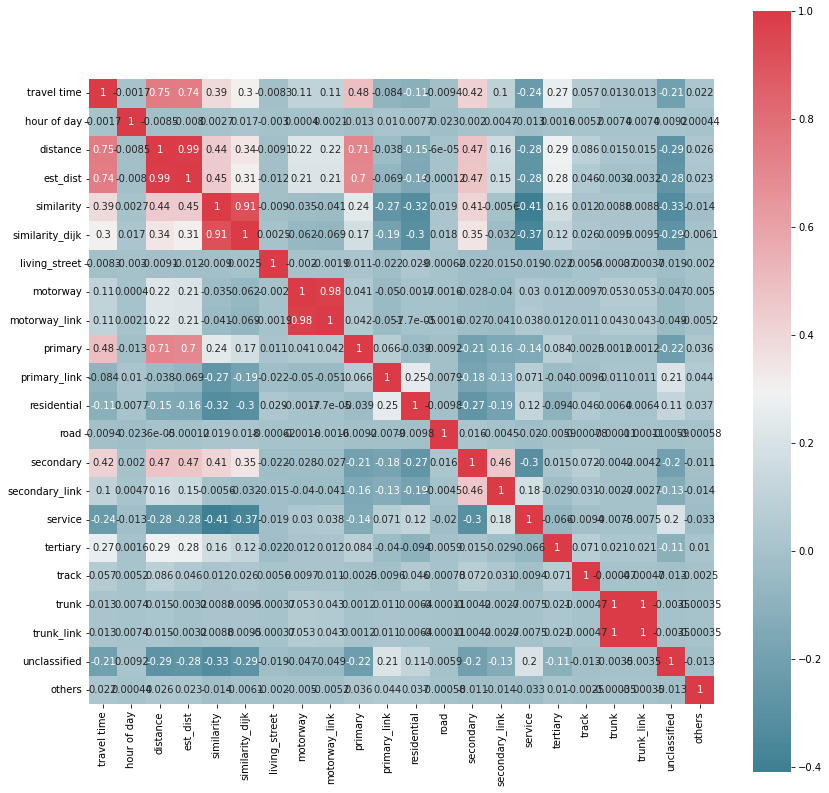

In [217]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [132]:
x = np.array(df8.iloc[:,3:])
y = np.array(df8['travel time'])
x

array([[0.2973851 , 0.81094527, 0.8956044 , ..., 0.        , 0.        ,
        0.        ],
       [0.02341767, 0.79166667, 0.86363636, ..., 0.        , 0.08810598,
        0.        ],
       [0.1427945 , 0.68115942, 0.75806452, ..., 0.        , 0.12431659,
        0.        ],
       ...,
       [0.32470443, 0.79646018, 0.8411215 , ..., 0.        , 0.        ,
        0.        ],
       [0.32141647, 0.79464286, 0.82407407, ..., 0.        , 0.        ,
        0.        ],
       [0.18431671, 0.78873239, 0.78873239, ..., 0.        , 0.        ,
        0.        ]])

In [133]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 19)
(3120, 19)


In [135]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
390/390 [==============================] - 1s 938us/step - loss: 736358.3125 - mape: 68.9896 - rmse: 858.1132 - val_loss: 173111.2812 - val_mape: 51.8425 - val_rmse: 416.0664
Epoch 2/500
390/390 [==============================] - 0s 771us/step - loss: 168990.9844 - mape: 49.3815 - rmse: 411.0851 - val_loss: 146717.5469 - val_mape: 44.8191 - val_rmse: 383.0373
Epoch 3/500
390/390 [==============================] - 0s 796us/step - loss: 146815.0938 - mape: 43.6273 - rmse: 383.1646 - val_loss: 130425.6641 - val_mape: 40.5142 - val_rmse: 361.1449
Epoch 4/500
390/390 [==============================] - 0s 822us/step - loss: 134418.8438 - mape: 39.1249 - rmse: 366.6317 - val_loss: 123046.8203 - val_mape: 38.4398 - val_rmse: 350.7803
Epoch 5/500
390/390 [==============================] - 0s 803us/step - loss: 128809.6641 - mape: 36.7777 - rmse: 358.9006 - val_loss: 119155.9297 - val_mape: 35.3622 - val_rmse: 345.1897
Epoch 6/500
390/390 [==============================] - 0s 791us/s

Epoch 45/500
390/390 [==============================] - 0s 788us/step - loss: 124225.1094 - mape: 34.9713 - rmse: 352.4558 - val_loss: 116334.5469 - val_mape: 33.7369 - val_rmse: 341.0785
Epoch 46/500
390/390 [==============================] - 0s 773us/step - loss: 124272.5703 - mape: 34.8602 - rmse: 352.5232 - val_loss: 116250.8125 - val_mape: 34.0412 - val_rmse: 340.9557
Epoch 47/500
390/390 [==============================] - 0s 817us/step - loss: 124197.4219 - mape: 34.8987 - rmse: 352.4165 - val_loss: 116337.9609 - val_mape: 34.9437 - val_rmse: 341.0835
Epoch 48/500
390/390 [==============================] - 0s 763us/step - loss: 124285.7031 - mape: 34.9970 - rmse: 352.5418 - val_loss: 116442.4688 - val_mape: 34.6724 - val_rmse: 341.2367
Epoch 49/500
390/390 [==============================] - 0s 784us/step - loss: 124066.0781 - mape: 35.0121 - rmse: 352.2302 - val_loss: 116302.1875 - val_mape: 33.9846 - val_rmse: 341.0311
Epoch 50/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 773us/step - loss: 123494.1172 - mape: 34.7243 - rmse: 351.4173 - val_loss: 116419.3438 - val_mape: 35.1893 - val_rmse: 341.2028
Epoch 132/500
390/390 [==============================] - 0s 789us/step - loss: 123405.5078 - mape: 34.5976 - rmse: 351.2912 - val_loss: 116832.7109 - val_mape: 35.8395 - val_rmse: 341.8080
Epoch 133/500
390/390 [==============================] - 0s 790us/step - loss: 123432.0234 - mape: 34.8160 - rmse: 351.3289 - val_loss: 116099.6406 - val_mape: 33.4300 - val_rmse: 340.7340
Epoch 134/500
390/390 [==============================] - 0s 777us/step - loss: 123416.0156 - mape: 34.6776 - rmse: 351.3062 - val_loss: 116142.4219 - val_mape: 34.6090 - val_rmse: 340.7968
Epoch 135/500
390/390 [==============================] - 0s 800us/step - loss: 123406.8906 - mape: 34.7707 - rmse: 351.2932 - val_loss: 116804.8906 - val_mape: 32.1573 - val_rmse: 341.7673
Epoch 136/500
390/390 [==============================] - 0s 803us/ste

390/390 [==============================] - 0s 797us/step - loss: 123158.8125 - mape: 34.4543 - rmse: 350.9399 - val_loss: 116049.9609 - val_mape: 34.7207 - val_rmse: 340.6611
Epoch 218/500
390/390 [==============================] - 0s 766us/step - loss: 123234.0000 - mape: 34.6860 - rmse: 351.0470 - val_loss: 116191.3750 - val_mape: 34.5696 - val_rmse: 340.8686
Epoch 219/500
390/390 [==============================] - 0s 752us/step - loss: 123161.6719 - mape: 34.6131 - rmse: 350.9440 - val_loss: 116145.1172 - val_mape: 34.2506 - val_rmse: 340.8007
Epoch 220/500
390/390 [==============================] - 0s 784us/step - loss: 123154.8438 - mape: 34.4976 - rmse: 350.9342 - val_loss: 116198.4688 - val_mape: 33.1437 - val_rmse: 340.8790
Epoch 221/500
390/390 [==============================] - 0s 779us/step - loss: 123089.7812 - mape: 34.6666 - rmse: 350.8415 - val_loss: 116244.8906 - val_mape: 33.1129 - val_rmse: 340.9471
Epoch 222/500
390/390 [==============================] - 0s 781us/ste

390/390 [==============================] - 0s 766us/step - loss: 123040.3906 - mape: 34.6389 - rmse: 350.7711 - val_loss: 116293.1094 - val_mape: 33.6952 - val_rmse: 341.0178
Epoch 304/500
390/390 [==============================] - 0s 763us/step - loss: 123007.7500 - mape: 34.4278 - rmse: 350.7246 - val_loss: 116350.3828 - val_mape: 34.4265 - val_rmse: 341.1017
Epoch 305/500
390/390 [==============================] - 0s 784us/step - loss: 123152.7812 - mape: 34.4824 - rmse: 350.9313 - val_loss: 116810.8906 - val_mape: 35.3619 - val_rmse: 341.7761
Epoch 306/500
390/390 [==============================] - 0s 781us/step - loss: 123083.9062 - mape: 34.5900 - rmse: 350.8332 - val_loss: 116208.8203 - val_mape: 34.2131 - val_rmse: 340.8941
Epoch 307/500
390/390 [==============================] - 0s 803us/step - loss: 123104.1719 - mape: 34.3767 - rmse: 350.8620 - val_loss: 116169.9453 - val_mape: 34.3871 - val_rmse: 340.8371
Epoch 308/500
390/390 [==============================] - 0s 782us/ste

390/390 [==============================] - 0s 790us/step - loss: 122948.7266 - mape: 34.5460 - rmse: 350.6404 - val_loss: 116318.9141 - val_mape: 32.7018 - val_rmse: 341.0556
Epoch 390/500
390/390 [==============================] - 0s 785us/step - loss: 122976.7344 - mape: 34.3677 - rmse: 350.6804 - val_loss: 116010.5547 - val_mape: 33.4243 - val_rmse: 340.6032
Epoch 391/500
390/390 [==============================] - 0s 784us/step - loss: 122944.5312 - mape: 34.4238 - rmse: 350.6345 - val_loss: 116148.2969 - val_mape: 34.5238 - val_rmse: 340.8054
Epoch 392/500
390/390 [==============================] - 0s 800us/step - loss: 122845.3750 - mape: 34.4734 - rmse: 350.4930 - val_loss: 116362.1641 - val_mape: 34.7620 - val_rmse: 341.1190
Epoch 393/500
390/390 [==============================] - 0s 787us/step - loss: 122952.7109 - mape: 34.5577 - rmse: 350.6461 - val_loss: 116197.9766 - val_mape: 33.4911 - val_rmse: 340.8782
Epoch 394/500
390/390 [==============================] - 0s 799us/ste

390/390 [==============================] - 0s 768us/step - loss: 122897.0078 - mape: 34.3101 - rmse: 350.5667 - val_loss: 116091.7969 - val_mape: 33.2966 - val_rmse: 340.7225
Epoch 476/500
390/390 [==============================] - 0s 795us/step - loss: 122894.5547 - mape: 34.5317 - rmse: 350.5632 - val_loss: 115930.5859 - val_mape: 33.8536 - val_rmse: 340.4858
Epoch 477/500
390/390 [==============================] - 0s 790us/step - loss: 122996.9141 - mape: 34.4862 - rmse: 350.7092 - val_loss: 117124.7812 - val_mape: 35.8825 - val_rmse: 342.2350
Epoch 478/500
390/390 [==============================] - 0s 804us/step - loss: 122989.1250 - mape: 34.5636 - rmse: 350.6981 - val_loss: 116089.7734 - val_mape: 33.8193 - val_rmse: 340.7195
Epoch 479/500
390/390 [==============================] - 0s 762us/step - loss: 122849.3203 - mape: 34.3860 - rmse: 350.4987 - val_loss: 116102.8203 - val_mape: 34.3107 - val_rmse: 340.7386
Epoch 480/500
390/390 [==============================] - 0s 805us/ste

In [136]:
# plotme(model7_1_1)

In [137]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 536227.0625 - mape: 62.9455 - rmse: 732.2753 - val_loss: 155710.1719 - val_mape: 49.2461 - val_rmse: 394.6013
Epoch 2/500
390/390 [==============================] - 0s 1ms/step - loss: 147635.8750 - mape: 43.9074 - rmse: 384.2341 - val_loss: 129018.2578 - val_mape: 41.7006 - val_rmse: 359.1911
Epoch 3/500
390/390 [==============================] - 0s 932us/step - loss: 130981.2344 - mape: 37.7035 - rmse: 361.9133 - val_loss: 119523.4141 - val_mape: 35.7831 - val_rmse: 345.7216
Epoch 4/500
390/390 [==============================] - 0s 933us/step - loss: 126578.3281 - mape: 35.6075 - rmse: 355.7785 - val_loss: 117599.7812 - val_mape: 35.3830 - val_rmse: 342.9283
Epoch 5/500
390/390 [==============================] - 0s 941us/step - loss: 125616.1562 - mape: 35.1452 - rmse: 354.4237 - val_loss: 117238.2578 - val_mape: 35.4824 - val_rmse: 342.4007
Epoch 6/500
390/390 [==============================] - 0s 1ms/step - 

Epoch 45/500
390/390 [==============================] - 0s 926us/step - loss: 123821.4531 - mape: 34.9975 - rmse: 351.8827 - val_loss: 116122.2344 - val_mape: 33.0427 - val_rmse: 340.7671
Epoch 46/500
390/390 [==============================] - 0s 889us/step - loss: 123901.6094 - mape: 34.6422 - rmse: 351.9966 - val_loss: 115903.9609 - val_mape: 33.4919 - val_rmse: 340.4467
Epoch 47/500
390/390 [==============================] - 0s 913us/step - loss: 123862.0781 - mape: 34.8790 - rmse: 351.9405 - val_loss: 116138.3359 - val_mape: 34.7007 - val_rmse: 340.7907
Epoch 48/500
390/390 [==============================] - 0s 911us/step - loss: 123777.5312 - mape: 34.7542 - rmse: 351.8203 - val_loss: 116103.8594 - val_mape: 33.0596 - val_rmse: 340.7402
Epoch 49/500
390/390 [==============================] - 0s 913us/step - loss: 123803.5234 - mape: 34.6973 - rmse: 351.8572 - val_loss: 115803.3438 - val_mape: 34.6275 - val_rmse: 340.2989
Epoch 50/500
390/390 [==============================] - 0s 9

390/390 [==============================] - 0s 962us/step - loss: 123214.0781 - mape: 34.5919 - rmse: 351.0186 - val_loss: 115951.5859 - val_mape: 32.7355 - val_rmse: 340.5166
Epoch 132/500
390/390 [==============================] - 0s 869us/step - loss: 122975.5938 - mape: 34.5867 - rmse: 350.6788 - val_loss: 115974.2734 - val_mape: 34.7937 - val_rmse: 340.5500
Epoch 133/500
390/390 [==============================] - 0s 919us/step - loss: 123086.3516 - mape: 34.3096 - rmse: 350.8366 - val_loss: 115980.4844 - val_mape: 35.3300 - val_rmse: 340.5591
Epoch 134/500
390/390 [==============================] - 0s 878us/step - loss: 123071.2734 - mape: 34.7614 - rmse: 350.8152 - val_loss: 116011.1172 - val_mape: 34.8758 - val_rmse: 340.6040
Epoch 135/500
390/390 [==============================] - 0s 891us/step - loss: 123087.2578 - mape: 34.5666 - rmse: 350.8380 - val_loss: 116236.2500 - val_mape: 34.6282 - val_rmse: 340.9344
Epoch 136/500
390/390 [==============================] - 0s 908us/ste

390/390 [==============================] - 0s 881us/step - loss: 122495.8438 - mape: 34.4397 - rmse: 349.9940 - val_loss: 115754.0938 - val_mape: 32.3213 - val_rmse: 340.2265
Epoch 218/500
390/390 [==============================] - 0s 883us/step - loss: 122673.7500 - mape: 34.3518 - rmse: 350.2481 - val_loss: 115279.6719 - val_mape: 33.6060 - val_rmse: 339.5286
Epoch 219/500
390/390 [==============================] - 0s 889us/step - loss: 122663.9531 - mape: 34.3124 - rmse: 350.2341 - val_loss: 115539.5859 - val_mape: 34.7024 - val_rmse: 339.9111
Epoch 220/500
390/390 [==============================] - 0s 885us/step - loss: 122516.3984 - mape: 34.4138 - rmse: 350.0234 - val_loss: 115440.2188 - val_mape: 34.2577 - val_rmse: 339.7650
Epoch 221/500
390/390 [==============================] - 0s 880us/step - loss: 122471.3281 - mape: 34.5124 - rmse: 349.9590 - val_loss: 116017.6172 - val_mape: 34.4800 - val_rmse: 340.6136
Epoch 222/500
390/390 [==============================] - 0s 878us/ste

390/390 [==============================] - 0s 910us/step - loss: 122286.8750 - mape: 34.2214 - rmse: 349.6954 - val_loss: 115341.7969 - val_mape: 34.4690 - val_rmse: 339.6201
Epoch 304/500
390/390 [==============================] - 0s 956us/step - loss: 122188.4688 - mape: 34.2788 - rmse: 349.5547 - val_loss: 115118.6328 - val_mape: 33.9225 - val_rmse: 339.2914
Epoch 305/500
390/390 [==============================] - 0s 1ms/step - loss: 122358.6328 - mape: 34.3107 - rmse: 349.7980 - val_loss: 115937.9062 - val_mape: 35.0272 - val_rmse: 340.4966
Epoch 306/500
390/390 [==============================] - 0s 938us/step - loss: 122160.5703 - mape: 34.2449 - rmse: 349.5148 - val_loss: 115286.6641 - val_mape: 33.0904 - val_rmse: 339.5389
Epoch 307/500
390/390 [==============================] - 0s 970us/step - loss: 122152.4766 - mape: 34.2525 - rmse: 349.5032 - val_loss: 115633.5859 - val_mape: 34.5667 - val_rmse: 340.0494
Epoch 308/500
390/390 [==============================] - 0s 948us/step 

390/390 [==============================] - 0s 996us/step - loss: 121220.0859 - mape: 33.8433 - rmse: 348.1667 - val_loss: 115003.9453 - val_mape: 32.5550 - val_rmse: 339.1223
Epoch 390/500
390/390 [==============================] - 0s 937us/step - loss: 121219.2422 - mape: 33.8382 - rmse: 348.1655 - val_loss: 114883.8750 - val_mape: 32.7883 - val_rmse: 338.9453
Epoch 391/500
390/390 [==============================] - 1s 1ms/step - loss: 121041.9062 - mape: 33.8230 - rmse: 347.9108 - val_loss: 116359.2031 - val_mape: 34.9454 - val_rmse: 341.1147
Epoch 392/500
390/390 [==============================] - 0s 988us/step - loss: 121197.2812 - mape: 33.6406 - rmse: 348.1340 - val_loss: 115498.3984 - val_mape: 34.5253 - val_rmse: 339.8506
Epoch 393/500
390/390 [==============================] - 0s 1ms/step - loss: 121094.2578 - mape: 33.7436 - rmse: 347.9860 - val_loss: 116118.0078 - val_mape: 34.7238 - val_rmse: 340.7609
Epoch 394/500
390/390 [==============================] - 0s 1ms/step - lo

390/390 [==============================] - 0s 942us/step - loss: 120668.2500 - mape: 33.6253 - rmse: 347.3734 - val_loss: 114974.9297 - val_mape: 32.2449 - val_rmse: 339.0795
Epoch 476/500
390/390 [==============================] - 0s 938us/step - loss: 120738.8984 - mape: 33.5659 - rmse: 347.4750 - val_loss: 114524.0938 - val_mape: 33.2438 - val_rmse: 338.4141
Epoch 477/500
390/390 [==============================] - 0s 949us/step - loss: 120490.2734 - mape: 33.5043 - rmse: 347.1171 - val_loss: 114787.3984 - val_mape: 34.6391 - val_rmse: 338.8029
Epoch 478/500
390/390 [==============================] - 0s 939us/step - loss: 120532.8984 - mape: 33.5863 - rmse: 347.1785 - val_loss: 115614.4141 - val_mape: 35.0813 - val_rmse: 340.0212
Epoch 479/500
390/390 [==============================] - 0s 954us/step - loss: 120506.5078 - mape: 33.6567 - rmse: 347.1405 - val_loss: 114994.9141 - val_mape: 31.9761 - val_rmse: 339.1090
Epoch 480/500
390/390 [==============================] - 0s 943us/ste

In [138]:
# plotme(model7_1_2)

In [139]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
390/390 [==============================] - 1s 911us/step - loss: 1287107.8750 - mape: 98.2681 - rmse: 1134.5078 - val_loss: 1199118.0000 - val_mape: 94.9086 - val_rmse: 1095.0425
Epoch 2/500
390/390 [==============================] - 0s 786us/step - loss: 1129738.7500 - mape: 88.3856 - rmse: 1062.8917 - val_loss: 980178.1875 - val_mape: 80.4882 - val_rmse: 990.0395
Epoch 3/500
390/390 [==============================] - 0s 778us/step - loss: 874126.7500 - mape: 70.9413 - rmse: 934.9474 - val_loss: 709235.6875 - val_mape: 60.7843 - val_rmse: 842.1613
Epoch 4/500
390/390 [==============================] - 0s 791us/step - loss: 608566.4375 - mape: 52.6152 - rmse: 780.1067 - val_loss: 467956.5938 - val_mape: 45.0438 - val_rmse: 684.0735
Epoch 5/500
390/390 [==============================] - 0s 783us/step - loss: 397816.2500 - mape: 42.4448 - rmse: 630.7267 - val_loss: 301389.0312 - val_mape: 39.7683 - val_rmse: 548.9891
Epoch 6/500
390/390 [==============================] - 0s 7

Epoch 88/500
390/390 [==============================] - 0s 781us/step - loss: 123964.7422 - mape: 34.8294 - rmse: 352.0863 - val_loss: 116395.7812 - val_mape: 34.5024 - val_rmse: 341.1683
Epoch 89/500
390/390 [==============================] - 0s 752us/step - loss: 123948.1484 - mape: 34.7461 - rmse: 352.0627 - val_loss: 116379.2344 - val_mape: 34.4524 - val_rmse: 341.1440
Epoch 90/500
390/390 [==============================] - 0s 785us/step - loss: 123926.2891 - mape: 34.6764 - rmse: 352.0316 - val_loss: 116420.1406 - val_mape: 34.6873 - val_rmse: 341.2039
Epoch 91/500
390/390 [==============================] - 0s 775us/step - loss: 123905.8594 - mape: 34.6431 - rmse: 352.0027 - val_loss: 116511.6797 - val_mape: 34.9733 - val_rmse: 341.3381
Epoch 92/500
390/390 [==============================] - 0s 754us/step - loss: 123859.1953 - mape: 34.7859 - rmse: 351.9363 - val_loss: 116368.1875 - val_mape: 34.5485 - val_rmse: 341.1278
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 795us/step - loss: 122656.1875 - mape: 34.1766 - rmse: 350.2231 - val_loss: 115845.8359 - val_mape: 34.0237 - val_rmse: 340.3613
Epoch 175/500
390/390 [==============================] - 0s 894us/step - loss: 122647.3750 - mape: 34.1769 - rmse: 350.2105 - val_loss: 115864.6172 - val_mape: 34.1440 - val_rmse: 340.3889
Epoch 176/500
390/390 [==============================] - 0s 920us/step - loss: 122632.0234 - mape: 34.1693 - rmse: 350.1886 - val_loss: 115842.8516 - val_mape: 34.0587 - val_rmse: 340.3569
Epoch 177/500
390/390 [==============================] - 0s 852us/step - loss: 122605.1875 - mape: 34.2480 - rmse: 350.1502 - val_loss: 115792.2188 - val_mape: 33.5787 - val_rmse: 340.2826
Epoch 178/500
390/390 [==============================] - 0s 871us/step - loss: 122613.8594 - mape: 33.9755 - rmse: 350.1626 - val_loss: 115895.3047 - val_mape: 34.3100 - val_rmse: 340.4340
Epoch 179/500
390/390 [==============================] - 0s 897us/ste

390/390 [==============================] - 0s 795us/step - loss: 122214.1797 - mape: 33.9087 - rmse: 349.5915 - val_loss: 115616.4219 - val_mape: 33.6356 - val_rmse: 340.0241
Epoch 261/500
390/390 [==============================] - 0s 769us/step - loss: 122203.8359 - mape: 33.9549 - rmse: 349.5767 - val_loss: 115648.0234 - val_mape: 33.8229 - val_rmse: 340.0706
Epoch 262/500
390/390 [==============================] - 0s 800us/step - loss: 122187.5469 - mape: 33.8820 - rmse: 349.5533 - val_loss: 115705.4688 - val_mape: 34.0908 - val_rmse: 340.1551
Epoch 263/500
390/390 [==============================] - 0s 808us/step - loss: 122202.4062 - mape: 34.0317 - rmse: 349.5746 - val_loss: 115604.4219 - val_mape: 33.5502 - val_rmse: 340.0065
Epoch 264/500
390/390 [==============================] - 0s 777us/step - loss: 122142.2969 - mape: 34.0591 - rmse: 349.4886 - val_loss: 115634.3594 - val_mape: 33.0292 - val_rmse: 340.0505
Epoch 265/500
390/390 [==============================] - 0s 791us/ste

390/390 [==============================] - 0s 757us/step - loss: 122053.8203 - mape: 33.9479 - rmse: 349.3620 - val_loss: 115651.0078 - val_mape: 33.6364 - val_rmse: 340.0750
Epoch 347/500
390/390 [==============================] - 0s 760us/step - loss: 122058.7969 - mape: 33.9020 - rmse: 349.3691 - val_loss: 115619.7969 - val_mape: 33.3558 - val_rmse: 340.0291
Epoch 348/500
390/390 [==============================] - 0s 785us/step - loss: 122029.4531 - mape: 33.8725 - rmse: 349.3271 - val_loss: 115624.2031 - val_mape: 33.3912 - val_rmse: 340.0356
Epoch 349/500
390/390 [==============================] - 0s 755us/step - loss: 122045.9844 - mape: 33.7384 - rmse: 349.3508 - val_loss: 115678.6016 - val_mape: 33.8749 - val_rmse: 340.1156
Epoch 350/500
390/390 [==============================] - 0s 745us/step - loss: 122060.6250 - mape: 33.8896 - rmse: 349.3718 - val_loss: 115655.6797 - val_mape: 33.7003 - val_rmse: 340.0819
Epoch 351/500
390/390 [==============================] - 0s 751us/ste

390/390 [==============================] - 0s 778us/step - loss: 121955.0781 - mape: 33.8920 - rmse: 349.2207 - val_loss: 115648.5000 - val_mape: 33.5327 - val_rmse: 340.0713
Epoch 433/500
390/390 [==============================] - 0s 738us/step - loss: 121959.0859 - mape: 33.7754 - rmse: 349.2264 - val_loss: 115655.8906 - val_mape: 33.6248 - val_rmse: 340.0822
Epoch 434/500
390/390 [==============================] - 0s 759us/step - loss: 121966.4297 - mape: 33.8710 - rmse: 349.2369 - val_loss: 115636.4219 - val_mape: 33.4935 - val_rmse: 340.0536
Epoch 435/500
390/390 [==============================] - 0s 777us/step - loss: 121953.8672 - mape: 33.9162 - rmse: 349.2189 - val_loss: 115633.8438 - val_mape: 33.3219 - val_rmse: 340.0498
Epoch 436/500
390/390 [==============================] - 0s 754us/step - loss: 121955.6016 - mape: 33.5638 - rmse: 349.2214 - val_loss: 115765.3984 - val_mape: 34.0776 - val_rmse: 340.2431
Epoch 437/500
390/390 [==============================] - 0s 753us/ste

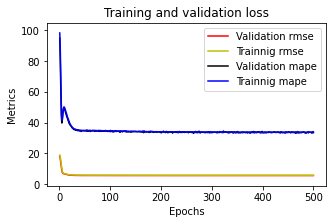

In [140]:
plotme(model7_1_3)

In [141]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
390/390 [==============================] - 0s 884us/step - loss: 1309959.8750 - mape: 99.6303 - rmse: 1144.5348 - val_loss: 1264868.3750 - val_mape: 98.9324 - val_rmse: 1124.6637
Epoch 2/500
390/390 [==============================] - 0s 718us/step - loss: 1278961.2500 - mape: 97.7667 - rmse: 1130.9117 - val_loss: 1223256.5000 - val_mape: 96.3984 - val_rmse: 1106.0093
Epoch 3/500
390/390 [==============================] - 0s 745us/step - loss: 1227319.8750 - mape: 94.5964 - rmse: 1107.8447 - val_loss: 1163334.6250 - val_mape: 92.6610 - val_rmse: 1078.5800
Epoch 4/500
390/390 [==============================] - 0s 745us/step - loss: 1159129.6250 - mape: 90.2998 - rmse: 1076.6288 - val_loss: 1089110.1250 - val_mape: 87.8732 - val_rmse: 1043.6044
Epoch 5/500
390/390 [==============================] - 0s 735us/step - loss: 1078627.0000 - mape: 85.0491 - rmse: 1038.5697 - val_loss: 1004888.0625 - val_mape: 82.1995 - val_rmse: 1002.4410
Epoch 6/500
390/390 [========================

Epoch 88/500
390/390 [==============================] - 0s 766us/step - loss: 125658.8984 - mape: 35.1911 - rmse: 354.4840 - val_loss: 117782.6641 - val_mape: 34.7910 - val_rmse: 343.1948
Epoch 89/500
390/390 [==============================] - 0s 736us/step - loss: 125617.1797 - mape: 35.0047 - rmse: 354.4251 - val_loss: 117755.1250 - val_mape: 34.8902 - val_rmse: 343.1547
Epoch 90/500
390/390 [==============================] - 0s 779us/step - loss: 125563.7969 - mape: 34.9709 - rmse: 354.3498 - val_loss: 117772.8438 - val_mape: 35.1038 - val_rmse: 343.1805
Epoch 91/500
390/390 [==============================] - 0s 739us/step - loss: 125517.4219 - mape: 35.1804 - rmse: 354.2844 - val_loss: 117655.6406 - val_mape: 34.8464 - val_rmse: 343.0097
Epoch 92/500
390/390 [==============================] - 0s 756us/step - loss: 125477.4375 - mape: 35.0196 - rmse: 354.2279 - val_loss: 117590.6484 - val_mape: 34.7212 - val_rmse: 342.9149
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 724us/step - loss: 124305.3672 - mape: 34.9229 - rmse: 352.5697 - val_loss: 116670.4688 - val_mape: 34.7336 - val_rmse: 341.5706
Epoch 175/500
390/390 [==============================] - 0s 749us/step - loss: 124286.9141 - mape: 34.9596 - rmse: 352.5435 - val_loss: 116625.4844 - val_mape: 34.5164 - val_rmse: 341.5047
Epoch 176/500
390/390 [==============================] - 0s 730us/step - loss: 124285.2344 - mape: 34.7311 - rmse: 352.5411 - val_loss: 116663.0391 - val_mape: 34.7222 - val_rmse: 341.5597
Epoch 177/500
390/390 [==============================] - 0s 755us/step - loss: 124284.1250 - mape: 34.8772 - rmse: 352.5396 - val_loss: 116633.6953 - val_mape: 34.6183 - val_rmse: 341.5168
Epoch 178/500
390/390 [==============================] - 0s 725us/step - loss: 124272.9766 - mape: 34.8213 - rmse: 352.5237 - val_loss: 116620.4219 - val_mape: 34.5550 - val_rmse: 341.4973
Epoch 179/500
390/390 [==============================] - 0s 734us/ste

390/390 [==============================] - 0s 746us/step - loss: 123654.8281 - mape: 34.6663 - rmse: 351.6459 - val_loss: 116425.6484 - val_mape: 34.4318 - val_rmse: 341.2120
Epoch 261/500
390/390 [==============================] - 0s 760us/step - loss: 123641.8438 - mape: 34.6029 - rmse: 351.6274 - val_loss: 116461.9609 - val_mape: 34.6175 - val_rmse: 341.2652
Epoch 262/500
390/390 [==============================] - 0s 720us/step - loss: 123631.0000 - mape: 34.6967 - rmse: 351.6120 - val_loss: 116422.3516 - val_mape: 34.4419 - val_rmse: 341.2072
Epoch 263/500
390/390 [==============================] - 0s 729us/step - loss: 123626.8516 - mape: 34.5892 - rmse: 351.6061 - val_loss: 116440.7188 - val_mape: 34.5521 - val_rmse: 341.2341
Epoch 264/500
390/390 [==============================] - 0s 812us/step - loss: 123612.7031 - mape: 34.6721 - rmse: 351.5860 - val_loss: 116436.5781 - val_mape: 34.5389 - val_rmse: 341.2281
Epoch 265/500
390/390 [==============================] - 0s 782us/ste

390/390 [==============================] - 0s 730us/step - loss: 123072.2031 - mape: 34.3987 - rmse: 350.8165 - val_loss: 116206.1094 - val_mape: 34.2323 - val_rmse: 340.8902
Epoch 347/500
390/390 [==============================] - 0s 770us/step - loss: 123066.4141 - mape: 34.3251 - rmse: 350.8082 - val_loss: 116208.2578 - val_mape: 34.2462 - val_rmse: 340.8933
Epoch 348/500
390/390 [==============================] - 0s 744us/step - loss: 123059.3984 - mape: 34.2930 - rmse: 350.7982 - val_loss: 116212.5781 - val_mape: 34.3060 - val_rmse: 340.8997
Epoch 349/500
390/390 [==============================] - 0s 717us/step - loss: 123047.9844 - mape: 34.4531 - rmse: 350.7820 - val_loss: 116180.3516 - val_mape: 34.1466 - val_rmse: 340.8524
Epoch 350/500
390/390 [==============================] - 0s 731us/step - loss: 123049.5547 - mape: 34.2356 - rmse: 350.7842 - val_loss: 116203.0234 - val_mape: 34.2831 - val_rmse: 340.8857
Epoch 351/500
390/390 [==============================] - 0s 749us/ste

390/390 [==============================] - 0s 708us/step - loss: 122620.6172 - mape: 34.0891 - rmse: 350.1723 - val_loss: 115810.8438 - val_mape: 34.0054 - val_rmse: 340.3099
Epoch 433/500
390/390 [==============================] - 0s 737us/step - loss: 122611.3047 - mape: 34.0264 - rmse: 350.1590 - val_loss: 115850.4922 - val_mape: 34.1961 - val_rmse: 340.3682
Epoch 434/500
390/390 [==============================] - 0s 740us/step - loss: 122612.6484 - mape: 34.1856 - rmse: 350.1609 - val_loss: 115836.5469 - val_mape: 34.1538 - val_rmse: 340.3477
Epoch 435/500
390/390 [==============================] - 0s 749us/step - loss: 122611.6406 - mape: 34.1790 - rmse: 350.1595 - val_loss: 115822.5625 - val_mape: 34.0873 - val_rmse: 340.3271
Epoch 436/500
390/390 [==============================] - 0s 724us/step - loss: 122603.6562 - mape: 34.1399 - rmse: 350.1480 - val_loss: 115803.3125 - val_mape: 34.0242 - val_rmse: 340.2989
Epoch 437/500
390/390 [==============================] - 0s 755us/ste

In [142]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
390/390 [==============================] - 1s 932us/step - loss: 1272190.7500 - mape: 97.3065 - rmse: 1127.9143 - val_loss: 1151158.2500 - val_mape: 91.8861 - val_rmse: 1072.9204
Epoch 2/500
390/390 [==============================] - 0s 744us/step - loss: 1022247.1875 - mape: 81.0658 - rmse: 1011.0624 - val_loss: 813159.8750 - val_mape: 68.4486 - val_rmse: 901.7538
Epoch 3/500
390/390 [==============================] - 0s 770us/step - loss: 655690.3125 - mape: 56.0144 - rmse: 809.7471 - val_loss: 463126.1562 - val_mape: 44.8038 - val_rmse: 680.5338
Epoch 4/500
390/390 [==============================] - 0s 859us/step - loss: 366036.0625 - mape: 41.9298 - rmse: 605.0092 - val_loss: 257691.2188 - val_mape: 40.1340 - val_rmse: 507.6330
Epoch 5/500
390/390 [==============================] - 0s 767us/step - loss: 228529.6562 - mape: 43.6410 - rmse: 478.0478 - val_loss: 186986.5000 - val_mape: 45.3536 - val_rmse: 432.4193
Epoch 6/500
390/390 [==============================] - 0s 7

Epoch 88/500
390/390 [==============================] - 0s 761us/step - loss: 123327.6328 - mape: 34.5443 - rmse: 351.1803 - val_loss: 116359.4141 - val_mape: 34.6008 - val_rmse: 341.1150
Epoch 89/500
390/390 [==============================] - 0s 745us/step - loss: 123296.8672 - mape: 34.5634 - rmse: 351.1365 - val_loss: 116226.8125 - val_mape: 33.8717 - val_rmse: 340.9205
Epoch 90/500
390/390 [==============================] - 0s 754us/step - loss: 123285.0859 - mape: 34.4309 - rmse: 351.1198 - val_loss: 116222.9609 - val_mape: 33.9658 - val_rmse: 340.9149
Epoch 91/500
390/390 [==============================] - 0s 761us/step - loss: 123256.8125 - mape: 34.3961 - rmse: 351.0795 - val_loss: 116241.4375 - val_mape: 34.2890 - val_rmse: 340.9420
Epoch 92/500
390/390 [==============================] - 0s 751us/step - loss: 123217.4844 - mape: 34.4353 - rmse: 351.0235 - val_loss: 116254.2188 - val_mape: 34.3575 - val_rmse: 340.9607
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 725us/step - loss: 122299.7656 - mape: 34.0025 - rmse: 349.7138 - val_loss: 115829.6328 - val_mape: 34.1423 - val_rmse: 340.3375
Epoch 175/500
390/390 [==============================] - 0s 740us/step - loss: 122286.7969 - mape: 34.0515 - rmse: 349.6953 - val_loss: 115805.0703 - val_mape: 34.0232 - val_rmse: 340.3015
Epoch 176/500
390/390 [==============================] - 0s 766us/step - loss: 122297.8594 - mape: 33.9835 - rmse: 349.7111 - val_loss: 115831.8594 - val_mape: 34.1215 - val_rmse: 340.3408
Epoch 177/500
390/390 [==============================] - 0s 760us/step - loss: 122286.0156 - mape: 34.0242 - rmse: 349.6942 - val_loss: 115733.4062 - val_mape: 33.6814 - val_rmse: 340.1961
Epoch 178/500
390/390 [==============================] - 0s 800us/step - loss: 122280.2422 - mape: 34.0055 - rmse: 349.6859 - val_loss: 115717.7656 - val_mape: 33.4267 - val_rmse: 340.1731
Epoch 179/500
390/390 [==============================] - 0s 738us/ste

390/390 [==============================] - 0s 766us/step - loss: 122074.9297 - mape: 33.8703 - rmse: 349.3922 - val_loss: 115684.6875 - val_mape: 33.5926 - val_rmse: 340.1245
Epoch 261/500
390/390 [==============================] - 0s 768us/step - loss: 122059.5547 - mape: 33.8503 - rmse: 349.3702 - val_loss: 115676.4609 - val_mape: 33.4818 - val_rmse: 340.1124
Epoch 262/500
390/390 [==============================] - 0s 768us/step - loss: 122061.1250 - mape: 33.8264 - rmse: 349.3725 - val_loss: 115760.8594 - val_mape: 34.0282 - val_rmse: 340.2365
Epoch 263/500
390/390 [==============================] - 0s 767us/step - loss: 122037.3984 - mape: 34.0658 - rmse: 349.3385 - val_loss: 115688.5938 - val_mape: 33.0851 - val_rmse: 340.1302
Epoch 264/500
390/390 [==============================] - 0s 732us/step - loss: 122068.0000 - mape: 33.7395 - rmse: 349.3823 - val_loss: 115681.4531 - val_mape: 33.5257 - val_rmse: 340.1198
Epoch 265/500
390/390 [==============================] - 0s 783us/ste

390/390 [==============================] - 0s 803us/step - loss: 121928.6953 - mape: 33.9479 - rmse: 349.1829 - val_loss: 115668.0938 - val_mape: 33.2474 - val_rmse: 340.1001
Epoch 347/500
390/390 [==============================] - 0s 760us/step - loss: 121939.4531 - mape: 33.6675 - rmse: 349.1983 - val_loss: 115680.7812 - val_mape: 33.6431 - val_rmse: 340.1188
Epoch 348/500
390/390 [==============================] - 0s 736us/step - loss: 121917.7891 - mape: 33.7785 - rmse: 349.1673 - val_loss: 115743.7109 - val_mape: 33.9114 - val_rmse: 340.2113
Epoch 349/500
390/390 [==============================] - 0s 924us/step - loss: 121906.3828 - mape: 33.9313 - rmse: 349.1509 - val_loss: 115667.1250 - val_mape: 33.1198 - val_rmse: 340.0987
Epoch 350/500
390/390 [==============================] - 0s 792us/step - loss: 121940.0234 - mape: 33.6920 - rmse: 349.1991 - val_loss: 115672.6172 - val_mape: 33.5237 - val_rmse: 340.1068
Epoch 351/500
390/390 [==============================] - 0s 753us/ste

390/390 [==============================] - 0s 803us/step - loss: 121851.1719 - mape: 33.5962 - rmse: 349.0719 - val_loss: 115686.4688 - val_mape: 33.8048 - val_rmse: 340.1271
Epoch 433/500
390/390 [==============================] - 0s 807us/step - loss: 121856.1406 - mape: 33.7895 - rmse: 349.0790 - val_loss: 115659.7109 - val_mape: 33.7017 - val_rmse: 340.0878
Epoch 434/500
390/390 [==============================] - 0s 805us/step - loss: 121849.3125 - mape: 33.7163 - rmse: 349.0692 - val_loss: 115631.1562 - val_mape: 33.5345 - val_rmse: 340.0458
Epoch 435/500
390/390 [==============================] - 0s 797us/step - loss: 121856.5781 - mape: 33.8453 - rmse: 349.0796 - val_loss: 115628.9297 - val_mape: 33.3470 - val_rmse: 340.0425
Epoch 436/500
390/390 [==============================] - 0s 798us/step - loss: 121834.9766 - mape: 33.7747 - rmse: 349.0487 - val_loss: 115629.8125 - val_mape: 32.9765 - val_rmse: 340.0439
Epoch 437/500
390/390 [==============================] - 0s 798us/ste

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [218]:
df_ = pd.concat([df1, df2], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','tertiary','service']]
df_ = df_.T.drop_duplicates().T
df_

travel time   distance    1st ranked    2nd ranked   3rd ranked  \
0            1163   0.578883       primary       service  residential   
1             347  0.0489635       service  unclassified  residential   
2             720   0.268455       primary  unclassified     tertiary   
3             355  0.0568032  unclassified       service      primary   
4             356   0.076939   residential  unclassified      service   
...           ...        ...           ...           ...          ...   
15628        1649   0.657683       primary     secondary  residential   
15629        1385   0.594228       primary      tertiary    secondary   
15630        1217   0.593117       primary     secondary     tertiary   
15631        1189   0.597302       primary     secondary     tertiary   
15632        1112    0.39235       primary     secondary          NaN   

       primary secondary tertiary  service  
0      20416.4         0        0  833.016  
1      386.602         0        0   675.27  
2      8633.72         0  368.584  278.634  
3      386.602         0        0   684.44  
4      291.863         0        0  644.164  
...        ...       ...      ...      ...  
15628  20475.6   1674.39  903.493        0  
15629  15143.2   1266.65  5431.19   100.13  
15630  20475.6   1491.48  179.465        0  
15631  20475.6   1674.39  179.465        0  
15632  13722.2   1041.83        0        0  

[15599 rows x 9 columns]

In [219]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15599 entries, 0 to 15632
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  15599 non-null  object
 1   distance     15599 non-null  object
 2   1st ranked   15599 non-null  object
 3   2nd ranked   14994 non-null  object
 4   3rd ranked   14014 non-null  object
 5   primary      15599 non-null  object
 6   secondary    15599 non-null  object
 7   tertiary     15599 non-null  object
 8   service      15599 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [220]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['tertiary'] = df_['tertiary'].astype(float)
df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15599 entries, 0 to 15632
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  15599 non-null  float64
 1   distance     15599 non-null  float64
 2   1st ranked   15599 non-null  object 
 3   2nd ranked   14994 non-null  object 
 4   3rd ranked   14014 non-null  object 
 5   primary      15599 non-null  float64
 6   secondary    15599 non-null  float64
 7   tertiary     15599 non-null  float64
 8   service      15599 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.8+ MB


In [221]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         200.0
primary         6351.0
residential     2128.0
secondary       3746.0
service          596.0
tertiary        1349.0
track              2.0
unclassified    1227.0
Name: travel time, dtype: float64

In [222]:
option = ['residential','tertiary','primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        2025.0
primary        6351.0
residential    2128.0
secondary      3746.0
tertiary       1349.0
Name: travel time, dtype: float64

In [223]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street       2.0
motorway           21.0
primary          4061.0
primary_link       32.0
residential      2992.0
road                2.0
secondary        1150.0
service          3451.0
tertiary         2647.0
track              14.0
unclassified      622.0
Name: travel time, dtype: float64

In [224]:
option = ['residential','tertiary','secondary','primary','service',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        1298.0
primary        4061.0
residential    2992.0
secondary      1150.0
service        3451.0
tertiary       2647.0
Name: travel time, dtype: float64

In [225]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       21.0
motorway_link      115.0
primary           2050.0
primary_link       607.0
residential       3651.0
road                 1.0
secondary          643.0
secondary_link      23.0
service           5207.0
tertiary          1235.0
track               39.0
unclassified       422.0
Name: travel time, dtype: float64

In [226]:
option = ['residential','tertiary','primary','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3        3456.0
primary        2050.0
residential    3651.0
service        5207.0
tertiary       1235.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [227]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [228]:
normalized_distance2=(df_['1st ranked']-df_['1st ranked'].min())/(df_['1st ranked'].max()-df_['1st ranked'].min())
df_['1st ranked'] = normalized_distance2
normalize=(df_['2nd ranked']-df_['2nd ranked'].min())/(df_['2nd ranked'].max()-df_['2nd ranked'].min())
df_['2nd ranked'] = normalize

normalize=(df_['3rd ranked']-df_['3rd ranked'].min())/(df_['3rd ranked'].max()-df_['3rd ranked'].min())
df_['3rd ranked'] = normalize

normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

normalize=(df_['tertiary']-df_['tertiary'].min())/(df_['tertiary'].max()-df_['tertiary'].min())
df_['tertiary'] = normalize

normalize=(df_['service']-df_['service'].min())/(df_['service'].max()-df_['service'].min())
df_['service'] = normalize

df_
df_.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0       1163.0  0.578883    0.719997    0.000000    0.407868  0.584321   
1        347.0  0.048963    0.103753    0.299799    0.407868  0.011065   
2        720.0  0.268455    0.719997    0.299799    1.000000  0.247098   
3        355.0  0.056803    0.103753    0.000000    0.000000  0.011065   
4        356.0  0.076939    0.000000    0.299799    0.267874  0.008353   

   secondary  tertiary   service  
0        0.0  0.000000  0.215169  
1        0.0  0.000000  0.174423  
2        0.0  0.027701  0.071972  
3        0.0  0.000000  0.176792  
4        0.0  0.000000  0.166388

In [229]:
df_.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0       1163.0  0.578883    0.719997    0.000000    0.407868  0.584321   
1        347.0  0.048963    0.103753    0.299799    0.407868  0.011065   
2        720.0  0.268455    0.719997    0.299799    1.000000  0.247098   
3        355.0  0.056803    0.103753    0.000000    0.000000  0.011065   
4        356.0  0.076939    0.000000    0.299799    0.267874  0.008353   

   secondary  tertiary   service  
0        0.0  0.000000  0.215169  
1        0.0  0.000000  0.174423  
2        0.0  0.027701  0.071972  
3        0.0  0.000000  0.176792  
4        0.0  0.000000  0.166388

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

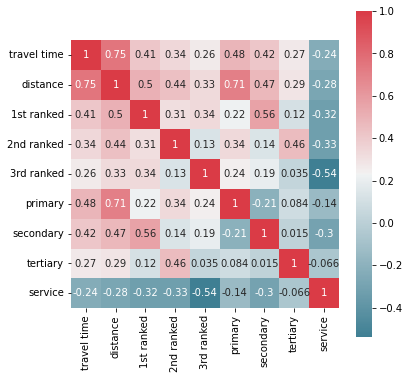

In [230]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [231]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.57888295, 0.71999693, 0.        , ..., 0.        , 0.        ,
        0.21516922],
       [0.04896347, 0.10375335, 0.29979928, ..., 0.        , 0.        ,
        0.1744232 ],
       [0.26845474, 0.71999693, 0.29979928, ..., 0.        , 0.02770091,
        0.07197156],
       ...,
       [0.59311695, 0.71999693, 1.        , ..., 0.04802456, 0.01348768,
        0.        ],
       [0.5973016 , 0.71999693, 1.        , ..., 0.05391407, 0.01348768,
        0.        ],
       [0.3923505 , 0.71999693, 1.        , ..., 0.03354589, 0.        ,
        0.        ]])

In [232]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [233]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 8)
(3120, 8)


In [234]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=1000)
model8_1_3

Epoch 1/1000
390/390 [==============================] - 1s 1ms/step - loss: 1287003.0000 - mape: 98.3903 - rmse: 1134.4615 - val_loss: 1199277.0000 - val_mape: 95.3428 - val_rmse: 1095.1151
Epoch 2/1000
390/390 [==============================] - 0s 875us/step - loss: 1128673.5000 - mape: 89.2675 - rmse: 1062.3905 - val_loss: 980763.3125 - val_mape: 82.1746 - val_rmse: 990.3350
Epoch 3/1000
390/390 [==============================] - 0s 851us/step - loss: 871771.9375 - mape: 73.0885 - rmse: 933.6873 - val_loss: 709517.8750 - val_mape: 63.5780 - val_rmse: 842.3289
Epoch 4/1000
390/390 [==============================] - 0s 841us/step - loss: 602258.1250 - mape: 54.7363 - rmse: 776.0529 - val_loss: 464053.5938 - val_mape: 46.2545 - val_rmse: 681.2148
Epoch 5/1000
390/390 [==============================] - 0s 821us/step - loss: 386437.7812 - mape: 41.2076 - rmse: 621.6412 - val_loss: 293039.6562 - val_mape: 37.2055 - val_rmse: 541.3314
Epoch 6/1000
390/390 [==============================] - 

390/390 [==============================] - 0s 770us/step - loss: 126624.1484 - mape: 35.3602 - rmse: 355.8429 - val_loss: 119405.1250 - val_mape: 35.2423 - val_rmse: 345.5505
Epoch 88/1000
390/390 [==============================] - 0s 764us/step - loss: 126589.5391 - mape: 35.2660 - rmse: 355.7943 - val_loss: 119460.8203 - val_mape: 35.3909 - val_rmse: 345.6310
Epoch 89/1000
390/390 [==============================] - 0s 767us/step - loss: 126601.0703 - mape: 35.3839 - rmse: 355.8105 - val_loss: 119294.6797 - val_mape: 35.0081 - val_rmse: 345.3906
Epoch 90/1000
390/390 [==============================] - 0s 766us/step - loss: 126595.9766 - mape: 35.3273 - rmse: 355.8033 - val_loss: 119299.8594 - val_mape: 35.0589 - val_rmse: 345.3981
Epoch 91/1000
390/390 [==============================] - 0s 772us/step - loss: 126567.5547 - mape: 35.3349 - rmse: 355.7633 - val_loss: 119267.3672 - val_mape: 35.0040 - val_rmse: 345.3511
Epoch 92/1000
390/390 [==============================] - 0s 772us/ste

390/390 [==============================] - 0s 771us/step - loss: 125614.1406 - mape: 35.0305 - rmse: 354.4208 - val_loss: 118526.0078 - val_mape: 34.9363 - val_rmse: 344.2761
Epoch 174/1000
390/390 [==============================] - 0s 742us/step - loss: 125611.2578 - mape: 35.1170 - rmse: 354.4168 - val_loss: 118509.4766 - val_mape: 34.9182 - val_rmse: 344.2520
Epoch 175/1000
390/390 [==============================] - 0s 758us/step - loss: 125594.9688 - mape: 35.0010 - rmse: 354.3938 - val_loss: 118627.8672 - val_mape: 35.2359 - val_rmse: 344.4240
Epoch 176/1000
390/390 [==============================] - 0s 739us/step - loss: 125600.3438 - mape: 35.1754 - rmse: 354.4014 - val_loss: 118561.1484 - val_mape: 35.0847 - val_rmse: 344.3271
Epoch 177/1000
390/390 [==============================] - 0s 753us/step - loss: 125594.1016 - mape: 35.0341 - rmse: 354.3926 - val_loss: 118544.3828 - val_mape: 35.0696 - val_rmse: 344.3027
Epoch 178/1000
390/390 [==============================] - 0s 769u

390/390 [==============================] - 0s 738us/step - loss: 125054.9609 - mape: 34.8342 - rmse: 353.6311 - val_loss: 118312.6797 - val_mape: 34.9925 - val_rmse: 343.9661
Epoch 260/1000
390/390 [==============================] - 0s 759us/step - loss: 125066.4531 - mape: 34.9000 - rmse: 353.6474 - val_loss: 118266.4297 - val_mape: 34.8741 - val_rmse: 343.8989
Epoch 261/1000
390/390 [==============================] - 0s 738us/step - loss: 125051.0234 - mape: 34.8470 - rmse: 353.6255 - val_loss: 118347.9297 - val_mape: 35.0899 - val_rmse: 344.0173
Epoch 262/1000
390/390 [==============================] - 0s 750us/step - loss: 125060.3906 - mape: 34.8554 - rmse: 353.6388 - val_loss: 118241.9609 - val_mape: 34.8176 - val_rmse: 343.8633
Epoch 263/1000
390/390 [==============================] - 0s 758us/step - loss: 125043.6172 - mape: 34.9257 - rmse: 353.6151 - val_loss: 118232.1406 - val_mape: 34.8131 - val_rmse: 343.8490
Epoch 264/1000
390/390 [==============================] - 0s 749u

390/390 [==============================] - 0s 755us/step - loss: 124697.9219 - mape: 34.7644 - rmse: 353.1259 - val_loss: 117991.9297 - val_mape: 34.5234 - val_rmse: 343.4995
Epoch 346/1000
390/390 [==============================] - 0s 774us/step - loss: 124686.9688 - mape: 34.6693 - rmse: 353.1104 - val_loss: 117986.0547 - val_mape: 34.5060 - val_rmse: 343.4910
Epoch 347/1000
390/390 [==============================] - 0s 722us/step - loss: 124676.2188 - mape: 34.7028 - rmse: 353.0952 - val_loss: 117988.2500 - val_mape: 34.5269 - val_rmse: 343.4942
Epoch 348/1000
390/390 [==============================] - 0s 744us/step - loss: 124677.8594 - mape: 34.6365 - rmse: 353.0975 - val_loss: 118002.6484 - val_mape: 34.5648 - val_rmse: 343.5151
Epoch 349/1000
390/390 [==============================] - 0s 740us/step - loss: 124678.1172 - mape: 34.6225 - rmse: 353.0979 - val_loss: 118022.9766 - val_mape: 34.6708 - val_rmse: 343.5447
Epoch 350/1000
390/390 [==============================] - 0s 763u

390/390 [==============================] - 0s 764us/step - loss: 124354.1250 - mape: 34.6512 - rmse: 352.6388 - val_loss: 117858.6875 - val_mape: 34.2604 - val_rmse: 343.3055
Epoch 432/1000
390/390 [==============================] - 0s 746us/step - loss: 124358.2344 - mape: 34.5261 - rmse: 352.6446 - val_loss: 117893.6953 - val_mape: 34.4315 - val_rmse: 343.3565
Epoch 433/1000
390/390 [==============================] - 0s 727us/step - loss: 124344.8438 - mape: 34.5023 - rmse: 352.6256 - val_loss: 118065.3516 - val_mape: 34.8830 - val_rmse: 343.6064
Epoch 434/1000
390/390 [==============================] - 0s 746us/step - loss: 124321.0625 - mape: 34.7562 - rmse: 352.5919 - val_loss: 117834.1328 - val_mape: 33.9890 - val_rmse: 343.2698
Epoch 435/1000
390/390 [==============================] - 0s 720us/step - loss: 124341.0703 - mape: 34.4698 - rmse: 352.6203 - val_loss: 117829.6406 - val_mape: 34.0005 - val_rmse: 343.2632
Epoch 436/1000
390/390 [==============================] - 0s 726u

390/390 [==============================] - 0s 745us/step - loss: 124129.6094 - mape: 34.4435 - rmse: 352.3203 - val_loss: 117817.5625 - val_mape: 34.1450 - val_rmse: 343.2456
Epoch 518/1000
390/390 [==============================] - 0s 747us/step - loss: 124129.3906 - mape: 34.5982 - rmse: 352.3200 - val_loss: 117795.0078 - val_mape: 33.9671 - val_rmse: 343.2128
Epoch 519/1000
390/390 [==============================] - 0s 712us/step - loss: 124138.8516 - mape: 34.3124 - rmse: 352.3334 - val_loss: 117939.8750 - val_mape: 34.6034 - val_rmse: 343.4238
Epoch 520/1000
390/390 [==============================] - 0s 772us/step - loss: 124140.5312 - mape: 34.4580 - rmse: 352.3358 - val_loss: 117880.8594 - val_mape: 34.4226 - val_rmse: 343.3378
Epoch 521/1000
390/390 [==============================] - 0s 741us/step - loss: 124120.7109 - mape: 34.4361 - rmse: 352.3077 - val_loss: 117842.5312 - val_mape: 34.2404 - val_rmse: 343.2820
Epoch 522/1000
390/390 [==============================] - 0s 747u

390/390 [==============================] - 0s 781us/step - loss: 123924.9844 - mape: 34.4031 - rmse: 352.0298 - val_loss: 117852.3828 - val_mape: 34.5254 - val_rmse: 343.2964
Epoch 604/1000
390/390 [==============================] - 0s 729us/step - loss: 123934.4297 - mape: 34.3679 - rmse: 352.0432 - val_loss: 117876.5469 - val_mape: 34.6084 - val_rmse: 343.3315
Epoch 605/1000
390/390 [==============================] - 0s 748us/step - loss: 123931.4688 - mape: 34.3929 - rmse: 352.0390 - val_loss: 117767.0859 - val_mape: 34.2850 - val_rmse: 343.1721
Epoch 606/1000
390/390 [==============================] - 0s 757us/step - loss: 123933.2344 - mape: 34.3513 - rmse: 352.0415 - val_loss: 117852.5625 - val_mape: 34.5563 - val_rmse: 343.2966
Epoch 607/1000
390/390 [==============================] - 0s 786us/step - loss: 123923.9688 - mape: 34.3319 - rmse: 352.0284 - val_loss: 117831.1484 - val_mape: 34.5171 - val_rmse: 343.2654
Epoch 608/1000
390/390 [==============================] - 0s 770u

390/390 [==============================] - 0s 764us/step - loss: 123741.0547 - mape: 34.2789 - rmse: 351.7685 - val_loss: 117791.3672 - val_mape: 34.5474 - val_rmse: 343.2075
Epoch 690/1000
390/390 [==============================] - 0s 772us/step - loss: 123744.7344 - mape: 34.4687 - rmse: 351.7737 - val_loss: 117650.3828 - val_mape: 34.0233 - val_rmse: 343.0020
Epoch 691/1000
390/390 [==============================] - 0s 867us/step - loss: 123733.6484 - mape: 34.1639 - rmse: 351.7579 - val_loss: 117874.5859 - val_mape: 34.7428 - val_rmse: 343.3287
Epoch 692/1000
390/390 [==============================] - 0s 779us/step - loss: 123755.6016 - mape: 34.2872 - rmse: 351.7892 - val_loss: 117827.1797 - val_mape: 34.6594 - val_rmse: 343.2596
Epoch 693/1000
390/390 [==============================] - 0s 776us/step - loss: 123736.6094 - mape: 34.3618 - rmse: 351.7621 - val_loss: 117753.4688 - val_mape: 34.4944 - val_rmse: 343.1523
Epoch 694/1000
390/390 [==============================] - 0s 757u

390/390 [==============================] - 0s 740us/step - loss: 123616.8516 - mape: 34.2882 - rmse: 351.5919 - val_loss: 117626.8125 - val_mape: 34.1582 - val_rmse: 342.9677
Epoch 776/1000
390/390 [==============================] - 0s 748us/step - loss: 123622.8594 - mape: 34.2902 - rmse: 351.6004 - val_loss: 117620.1562 - val_mape: 34.0982 - val_rmse: 342.9579
Epoch 777/1000
390/390 [==============================] - 0s 743us/step - loss: 123606.2734 - mape: 34.1449 - rmse: 351.5768 - val_loss: 117780.4141 - val_mape: 34.5822 - val_rmse: 343.1915
Epoch 778/1000
390/390 [==============================] - 0s 744us/step - loss: 123631.8359 - mape: 34.3828 - rmse: 351.6132 - val_loss: 117606.0312 - val_mape: 34.0415 - val_rmse: 342.9373
Epoch 779/1000
390/390 [==============================] - 0s 732us/step - loss: 123603.6562 - mape: 34.2208 - rmse: 351.5731 - val_loss: 117771.7422 - val_mape: 34.5824 - val_rmse: 343.1789
Epoch 780/1000
390/390 [==============================] - 0s 757u

390/390 [==============================] - 0s 793us/step - loss: 123534.8750 - mape: 34.2157 - rmse: 351.4753 - val_loss: 117667.9141 - val_mape: 34.3968 - val_rmse: 343.0276
Epoch 862/1000
390/390 [==============================] - 0s 735us/step - loss: 123545.0859 - mape: 34.2912 - rmse: 351.4898 - val_loss: 117621.3516 - val_mape: 34.2705 - val_rmse: 342.9597
Epoch 863/1000
390/390 [==============================] - 0s 765us/step - loss: 123523.2656 - mape: 34.2980 - rmse: 351.4588 - val_loss: 117549.1172 - val_mape: 33.9573 - val_rmse: 342.8544
Epoch 864/1000
390/390 [==============================] - 0s 748us/step - loss: 123511.7656 - mape: 34.1115 - rmse: 351.4424 - val_loss: 117723.4219 - val_mape: 34.5528 - val_rmse: 343.1085
Epoch 865/1000
390/390 [==============================] - 0s 725us/step - loss: 123540.6406 - mape: 34.3281 - rmse: 351.4835 - val_loss: 117578.9844 - val_mape: 34.1156 - val_rmse: 342.8979
Epoch 866/1000
390/390 [==============================] - 0s 782u

390/390 [==============================] - 0s 737us/step - loss: 123431.7266 - mape: 34.2109 - rmse: 351.3285 - val_loss: 117468.9453 - val_mape: 33.9289 - val_rmse: 342.7374
Epoch 948/1000
390/390 [==============================] - 0s 755us/step - loss: 123412.1328 - mape: 34.3265 - rmse: 351.3006 - val_loss: 117458.0312 - val_mape: 33.7246 - val_rmse: 342.7215
Epoch 949/1000
390/390 [==============================] - 0s 768us/step - loss: 123447.7266 - mape: 34.1832 - rmse: 351.3513 - val_loss: 117502.0000 - val_mape: 34.0889 - val_rmse: 342.7856
Epoch 950/1000
390/390 [==============================] - 0s 732us/step - loss: 123420.2891 - mape: 34.0565 - rmse: 351.3122 - val_loss: 117649.7266 - val_mape: 34.5599 - val_rmse: 343.0011
Epoch 951/1000
390/390 [==============================] - 0s 731us/step - loss: 123438.4062 - mape: 34.2761 - rmse: 351.3380 - val_loss: 117529.9375 - val_mape: 34.2425 - val_rmse: 342.8264
Epoch 952/1000
390/390 [==============================] - 0s 744u

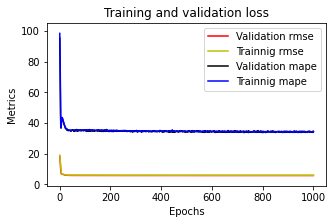

In [235]:
plotme(model8_1_3)

In [236]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=1000)
model8_1_5

Epoch 1/1000
390/390 [==============================] - 1s 941us/step - loss: 1269548.7500 - mape: 97.4067 - rmse: 1126.7426 - val_loss: 1145242.1250 - val_mape: 92.2372 - val_rmse: 1070.1599
Epoch 2/1000
390/390 [==============================] - 0s 816us/step - loss: 1012592.6250 - mape: 82.2717 - rmse: 1006.2766 - val_loss: 804280.6875 - val_mape: 70.3584 - val_rmse: 896.8170
Epoch 3/1000
390/390 [==============================] - 0s 799us/step - loss: 643722.7500 - mape: 57.6572 - rmse: 802.3234 - val_loss: 456116.3125 - val_mape: 45.7161 - val_rmse: 675.3638
Epoch 4/1000
390/390 [==============================] - 0s 813us/step - loss: 351866.9375 - mape: 39.6180 - rmse: 593.1837 - val_loss: 246896.6094 - val_mape: 36.0723 - val_rmse: 496.8869
Epoch 5/1000
390/390 [==============================] - 0s 793us/step - loss: 211578.0625 - mape: 37.3274 - rmse: 459.9762 - val_loss: 174724.5156 - val_mape: 38.7480 - val_rmse: 418.0006
Epoch 6/1000
390/390 [==============================] 

390/390 [==============================] - 0s 742us/step - loss: 126501.3125 - mape: 35.3165 - rmse: 355.6702 - val_loss: 119305.4375 - val_mape: 35.2750 - val_rmse: 345.4062
Epoch 88/1000
390/390 [==============================] - 0s 771us/step - loss: 126483.0000 - mape: 35.4420 - rmse: 355.6445 - val_loss: 119205.7812 - val_mape: 34.9985 - val_rmse: 345.2619
Epoch 89/1000
390/390 [==============================] - 0s 810us/step - loss: 126471.4375 - mape: 35.2467 - rmse: 355.6282 - val_loss: 119483.7344 - val_mape: 35.6292 - val_rmse: 345.6642
Epoch 90/1000
390/390 [==============================] - 0s 772us/step - loss: 126472.9531 - mape: 35.4417 - rmse: 355.6304 - val_loss: 119196.4531 - val_mape: 35.0224 - val_rmse: 345.2484
Epoch 91/1000
390/390 [==============================] - 0s 739us/step - loss: 126444.7344 - mape: 35.4119 - rmse: 355.5907 - val_loss: 119130.3984 - val_mape: 34.7138 - val_rmse: 345.1527
Epoch 92/1000
390/390 [==============================] - 0s 774us/ste

390/390 [==============================] - 0s 846us/step - loss: 125610.8047 - mape: 35.0198 - rmse: 354.4161 - val_loss: 118837.0781 - val_mape: 35.0306 - val_rmse: 344.7275
Epoch 174/1000
390/390 [==============================] - 0s 915us/step - loss: 125578.8750 - mape: 35.1483 - rmse: 354.3711 - val_loss: 118687.2109 - val_mape: 34.3845 - val_rmse: 344.5101
Epoch 175/1000
390/390 [==============================] - 0s 855us/step - loss: 125600.7109 - mape: 34.9564 - rmse: 354.4019 - val_loss: 118775.9453 - val_mape: 34.8819 - val_rmse: 344.6389
Epoch 176/1000
390/390 [==============================] - 0s 805us/step - loss: 125585.4141 - mape: 35.0532 - rmse: 354.3803 - val_loss: 118707.2344 - val_mape: 34.5603 - val_rmse: 344.5392
Epoch 177/1000
390/390 [==============================] - 0s 811us/step - loss: 125574.0625 - mape: 34.9423 - rmse: 354.3643 - val_loss: 118704.3359 - val_mape: 34.5957 - val_rmse: 344.5349
Epoch 178/1000
390/390 [==============================] - 0s 808u

390/390 [==============================] - 0s 765us/step - loss: 125314.8906 - mape: 34.8646 - rmse: 353.9984 - val_loss: 118699.9297 - val_mape: 34.4827 - val_rmse: 344.5286
Epoch 260/1000
390/390 [==============================] - 0s 755us/step - loss: 125317.4453 - mape: 34.7406 - rmse: 354.0020 - val_loss: 118718.6172 - val_mape: 34.5936 - val_rmse: 344.5557
Epoch 261/1000
390/390 [==============================] - 0s 770us/step - loss: 125325.2500 - mape: 34.7511 - rmse: 354.0131 - val_loss: 118705.0234 - val_mape: 34.5620 - val_rmse: 344.5359
Epoch 262/1000
390/390 [==============================] - 0s 754us/step - loss: 125327.2344 - mape: 34.7373 - rmse: 354.0159 - val_loss: 118772.8516 - val_mape: 34.7713 - val_rmse: 344.6344
Epoch 263/1000
390/390 [==============================] - 0s 747us/step - loss: 125299.5234 - mape: 34.9055 - rmse: 353.9767 - val_loss: 118653.6172 - val_mape: 34.2677 - val_rmse: 344.4613
Epoch 264/1000
390/390 [==============================] - 0s 743u

390/390 [==============================] - 0s 821us/step - loss: 125162.5391 - mape: 34.7197 - rmse: 353.7832 - val_loss: 118678.6172 - val_mape: 34.5511 - val_rmse: 344.4976
Epoch 346/1000
390/390 [==============================] - 0s 841us/step - loss: 125154.3672 - mape: 34.7778 - rmse: 353.7716 - val_loss: 118752.2266 - val_mape: 34.7609 - val_rmse: 344.6045
Epoch 347/1000
390/390 [==============================] - 0s 862us/step - loss: 125168.9141 - mape: 34.6937 - rmse: 353.7922 - val_loss: 118687.5703 - val_mape: 34.5357 - val_rmse: 344.5106
Epoch 348/1000
390/390 [==============================] - 0s 832us/step - loss: 125150.3281 - mape: 34.6968 - rmse: 353.7659 - val_loss: 118713.3203 - val_mape: 34.6137 - val_rmse: 344.5480
Epoch 349/1000
390/390 [==============================] - 0s 802us/step - loss: 125169.0078 - mape: 34.7409 - rmse: 353.7923 - val_loss: 118671.9453 - val_mape: 34.4706 - val_rmse: 344.4879
Epoch 350/1000
390/390 [==============================] - 0s 794u

390/390 [==============================] - 0s 751us/step - loss: 124934.0938 - mape: 34.5759 - rmse: 353.4602 - val_loss: 118780.9922 - val_mape: 35.0746 - val_rmse: 344.6462
Epoch 432/1000
390/390 [==============================] - 0s 756us/step - loss: 124949.3984 - mape: 34.8042 - rmse: 353.4818 - val_loss: 118700.1016 - val_mape: 34.8839 - val_rmse: 344.5288
Epoch 433/1000
390/390 [==============================] - 0s 828us/step - loss: 124940.2656 - mape: 34.6144 - rmse: 353.4689 - val_loss: 118540.1094 - val_mape: 34.4973 - val_rmse: 344.2965
Epoch 434/1000
390/390 [==============================] - 0s 791us/step - loss: 124921.6797 - mape: 34.6980 - rmse: 353.4426 - val_loss: 118500.1406 - val_mape: 34.3427 - val_rmse: 344.2385
Epoch 435/1000
390/390 [==============================] - 0s 732us/step - loss: 124916.3906 - mape: 34.6668 - rmse: 353.4351 - val_loss: 118471.8125 - val_mape: 34.1344 - val_rmse: 344.1974
Epoch 436/1000
390/390 [==============================] - 0s 790u

390/390 [==============================] - 0s 771us/step - loss: 124496.7344 - mape: 34.5724 - rmse: 352.8409 - val_loss: 118278.7109 - val_mape: 34.6562 - val_rmse: 343.9167
Epoch 518/1000
390/390 [==============================] - 0s 760us/step - loss: 124489.8438 - mape: 34.5412 - rmse: 352.8312 - val_loss: 118183.1875 - val_mape: 34.3970 - val_rmse: 343.7778
Epoch 519/1000
390/390 [==============================] - 0s 764us/step - loss: 124480.3359 - mape: 34.5484 - rmse: 352.8177 - val_loss: 118225.0859 - val_mape: 34.5337 - val_rmse: 343.8387
Epoch 520/1000
390/390 [==============================] - 0s 773us/step - loss: 124481.2969 - mape: 34.5642 - rmse: 352.8191 - val_loss: 118289.2891 - val_mape: 34.7059 - val_rmse: 343.9321
Epoch 521/1000
390/390 [==============================] - 0s 766us/step - loss: 124481.0391 - mape: 34.5761 - rmse: 352.8187 - val_loss: 118398.1641 - val_mape: 34.9500 - val_rmse: 344.0903
Epoch 522/1000
390/390 [==============================] - 0s 767u

390/390 [==============================] - 0s 786us/step - loss: 124144.8125 - mape: 34.5437 - rmse: 352.3419 - val_loss: 118007.8125 - val_mape: 34.6077 - val_rmse: 343.5226
Epoch 604/1000
390/390 [==============================] - 0s 787us/step - loss: 124146.2891 - mape: 34.4062 - rmse: 352.3440 - val_loss: 118082.0078 - val_mape: 34.7839 - val_rmse: 343.6306
Epoch 605/1000
390/390 [==============================] - 0s 782us/step - loss: 124121.7031 - mape: 34.4049 - rmse: 352.3091 - val_loss: 118082.1562 - val_mape: 34.8278 - val_rmse: 343.6308
Epoch 606/1000
390/390 [==============================] - 0s 771us/step - loss: 124135.8359 - mape: 34.4676 - rmse: 352.3292 - val_loss: 117980.6250 - val_mape: 34.5933 - val_rmse: 343.4831
Epoch 607/1000
390/390 [==============================] - 0s 759us/step - loss: 124121.0625 - mape: 34.4844 - rmse: 352.3082 - val_loss: 117922.4844 - val_mape: 34.4118 - val_rmse: 343.3984
Epoch 608/1000
390/390 [==============================] - 0s 780u

390/390 [==============================] - 0s 776us/step - loss: 123918.8828 - mape: 34.5604 - rmse: 352.0211 - val_loss: 117801.0391 - val_mape: 33.8810 - val_rmse: 343.2216
Epoch 690/1000
390/390 [==============================] - 0s 783us/step - loss: 123928.0625 - mape: 34.2738 - rmse: 352.0342 - val_loss: 117941.3359 - val_mape: 34.5150 - val_rmse: 343.4259
Epoch 691/1000
390/390 [==============================] - 0s 769us/step - loss: 123954.9297 - mape: 34.4629 - rmse: 352.0723 - val_loss: 117838.6484 - val_mape: 34.1159 - val_rmse: 343.2763
Epoch 692/1000
390/390 [==============================] - 0s 776us/step - loss: 123966.6641 - mape: 34.2758 - rmse: 352.0890 - val_loss: 117905.8125 - val_mape: 34.3898 - val_rmse: 343.3741
Epoch 693/1000
390/390 [==============================] - 0s 774us/step - loss: 123936.0859 - mape: 34.4441 - rmse: 352.0456 - val_loss: 117868.6484 - val_mape: 34.2660 - val_rmse: 343.3200
Epoch 694/1000
390/390 [==============================] - 0s 769u

390/390 [==============================] - 0s 768us/step - loss: 123766.8203 - mape: 34.4723 - rmse: 351.8051 - val_loss: 117774.7109 - val_mape: 33.7871 - val_rmse: 343.1832
Epoch 776/1000
390/390 [==============================] - 0s 772us/step - loss: 123832.5859 - mape: 34.3166 - rmse: 351.8986 - val_loss: 117786.8828 - val_mape: 33.9956 - val_rmse: 343.2009
Epoch 777/1000
390/390 [==============================] - 0s 775us/step - loss: 123806.9844 - mape: 34.2568 - rmse: 351.8622 - val_loss: 117778.4922 - val_mape: 33.9293 - val_rmse: 343.1887
Epoch 778/1000
390/390 [==============================] - 0s 771us/step - loss: 123862.1328 - mape: 34.3314 - rmse: 351.9405 - val_loss: 117918.0703 - val_mape: 34.4410 - val_rmse: 343.3920
Epoch 779/1000
390/390 [==============================] - 0s 758us/step - loss: 123859.6562 - mape: 34.3453 - rmse: 351.9370 - val_loss: 117970.8281 - val_mape: 34.5737 - val_rmse: 343.4688
Epoch 780/1000
390/390 [==============================] - 0s 767u

390/390 [==============================] - 0s 777us/step - loss: 123781.9375 - mape: 34.1393 - rmse: 351.8266 - val_loss: 117780.8516 - val_mape: 34.1870 - val_rmse: 343.1921
Epoch 862/1000
390/390 [==============================] - 0s 765us/step - loss: 123753.2734 - mape: 34.3588 - rmse: 351.7858 - val_loss: 117748.3516 - val_mape: 34.0150 - val_rmse: 343.1448
Epoch 863/1000
390/390 [==============================] - 0s 770us/step - loss: 123768.1562 - mape: 34.2168 - rmse: 351.8070 - val_loss: 117786.9922 - val_mape: 34.1681 - val_rmse: 343.2011
Epoch 864/1000
390/390 [==============================] - 0s 762us/step - loss: 123755.5703 - mape: 34.2648 - rmse: 351.7891 - val_loss: 117830.3672 - val_mape: 34.3610 - val_rmse: 343.2643
Epoch 865/1000
390/390 [==============================] - 0s 765us/step - loss: 123757.8516 - mape: 34.3532 - rmse: 351.7923 - val_loss: 117782.7656 - val_mape: 34.1803 - val_rmse: 343.1949
Epoch 866/1000
390/390 [==============================] - 0s 761u

390/390 [==============================] - 0s 774us/step - loss: 123722.8594 - mape: 34.2729 - rmse: 351.7426 - val_loss: 117753.2812 - val_mape: 33.9945 - val_rmse: 343.1520
Epoch 948/1000
390/390 [==============================] - 0s 778us/step - loss: 123707.8438 - mape: 34.1292 - rmse: 351.7213 - val_loss: 117862.2188 - val_mape: 34.4429 - val_rmse: 343.3107
Epoch 949/1000
390/390 [==============================] - 0s 776us/step - loss: 123719.6562 - mape: 34.3167 - rmse: 351.7380 - val_loss: 117893.2891 - val_mape: 34.4902 - val_rmse: 343.3559
Epoch 950/1000
390/390 [==============================] - 0s 768us/step - loss: 123687.9297 - mape: 34.1929 - rmse: 351.6930 - val_loss: 117904.5938 - val_mape: 34.4794 - val_rmse: 343.3724
Epoch 951/1000
390/390 [==============================] - 0s 773us/step - loss: 123704.0234 - mape: 34.2907 - rmse: 351.7158 - val_loss: 117744.4219 - val_mape: 33.9779 - val_rmse: 343.1391
Epoch 952/1000
390/390 [==============================] - 0s 770u

In [237]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=1000)
model8_1_1

Epoch 1/1000
390/390 [==============================] - 1s 1ms/step - loss: 703994.4375 - mape: 66.2207 - rmse: 839.0438 - val_loss: 161327.8438 - val_mape: 44.0678 - val_rmse: 401.6564
Epoch 2/1000
390/390 [==============================] - 0s 857us/step - loss: 159310.1250 - mape: 43.0949 - rmse: 399.1367 - val_loss: 147068.6094 - val_mape: 42.3475 - val_rmse: 383.4952
Epoch 3/1000
390/390 [==============================] - 0s 858us/step - loss: 145574.5781 - mape: 40.3333 - rmse: 381.5424 - val_loss: 134249.8281 - val_mape: 38.0846 - val_rmse: 366.4012
Epoch 4/1000
390/390 [==============================] - 0s 877us/step - loss: 135818.7188 - mape: 37.7543 - rmse: 368.5359 - val_loss: 126619.9766 - val_mape: 35.8442 - val_rmse: 355.8370
Epoch 5/1000
390/390 [==============================] - 0s 853us/step - loss: 130762.8672 - mape: 36.2883 - rmse: 361.6115 - val_loss: 122969.1797 - val_mape: 34.8177 - val_rmse: 350.6696
Epoch 6/1000
390/390 [==============================] - 0s 853

390/390 [==============================] - 0s 842us/step - loss: 125406.4453 - mape: 34.8721 - rmse: 354.1277 - val_loss: 118454.5234 - val_mape: 35.3500 - val_rmse: 344.1722
Epoch 88/1000
390/390 [==============================] - 0s 835us/step - loss: 125478.6562 - mape: 34.8250 - rmse: 354.2297 - val_loss: 118192.9531 - val_mape: 35.1532 - val_rmse: 343.7920
Epoch 89/1000
390/390 [==============================] - 0s 846us/step - loss: 125473.1797 - mape: 34.9879 - rmse: 354.2219 - val_loss: 118038.8125 - val_mape: 34.3631 - val_rmse: 343.5678
Epoch 90/1000
390/390 [==============================] - 0s 840us/step - loss: 125347.7500 - mape: 34.9750 - rmse: 354.0448 - val_loss: 118222.5625 - val_mape: 35.0579 - val_rmse: 343.8351
Epoch 91/1000
390/390 [==============================] - 0s 832us/step - loss: 125432.6641 - mape: 34.7820 - rmse: 354.1647 - val_loss: 118906.3828 - val_mape: 36.1795 - val_rmse: 344.8280
Epoch 92/1000
390/390 [==============================] - 0s 843us/ste

390/390 [==============================] - 0s 844us/step - loss: 124241.2344 - mape: 34.2622 - rmse: 352.4787 - val_loss: 117862.1406 - val_mape: 32.9624 - val_rmse: 343.3105
Epoch 174/1000
390/390 [==============================] - 0s 845us/step - loss: 124222.3672 - mape: 34.6104 - rmse: 352.4519 - val_loss: 117660.8750 - val_mape: 34.5862 - val_rmse: 343.0173
Epoch 175/1000
390/390 [==============================] - 0s 845us/step - loss: 124139.7188 - mape: 34.4076 - rmse: 352.3347 - val_loss: 117541.9922 - val_mape: 33.5513 - val_rmse: 342.8440
Epoch 176/1000
390/390 [==============================] - 0s 838us/step - loss: 124190.5938 - mape: 34.5024 - rmse: 352.4069 - val_loss: 117596.8281 - val_mape: 33.2934 - val_rmse: 342.9240
Epoch 177/1000
390/390 [==============================] - 0s 855us/step - loss: 124188.8828 - mape: 34.4789 - rmse: 352.4044 - val_loss: 117486.8828 - val_mape: 34.3802 - val_rmse: 342.7636
Epoch 178/1000
390/390 [==============================] - 0s 841u

390/390 [==============================] - 0s 830us/step - loss: 123599.9766 - mape: 34.2542 - rmse: 351.5679 - val_loss: 116966.9219 - val_mape: 33.7829 - val_rmse: 342.0043
Epoch 260/1000
390/390 [==============================] - 0s 847us/step - loss: 123607.7812 - mape: 34.3586 - rmse: 351.5790 - val_loss: 117145.2422 - val_mape: 33.4403 - val_rmse: 342.2649
Epoch 261/1000
390/390 [==============================] - 0s 840us/step - loss: 123585.2031 - mape: 34.3281 - rmse: 351.5469 - val_loss: 117030.1562 - val_mape: 34.2414 - val_rmse: 342.0967
Epoch 262/1000
390/390 [==============================] - 0s 846us/step - loss: 123503.4062 - mape: 34.3953 - rmse: 351.4305 - val_loss: 117051.2500 - val_mape: 34.3402 - val_rmse: 342.1275
Epoch 263/1000
390/390 [==============================] - 0s 834us/step - loss: 123526.9844 - mape: 34.3021 - rmse: 351.4641 - val_loss: 117027.3438 - val_mape: 33.6224 - val_rmse: 342.0926
Epoch 264/1000
390/390 [==============================] - 0s 848u

390/390 [==============================] - 0s 875us/step - loss: 123361.2266 - mape: 34.1952 - rmse: 351.2282 - val_loss: 117361.2031 - val_mape: 35.2217 - val_rmse: 342.5802
Epoch 346/1000
390/390 [==============================] - 0s 845us/step - loss: 123111.5469 - mape: 34.2884 - rmse: 350.8726 - val_loss: 116868.4375 - val_mape: 33.7742 - val_rmse: 341.8603
Epoch 347/1000
390/390 [==============================] - 0s 837us/step - loss: 123153.8047 - mape: 34.1587 - rmse: 350.9328 - val_loss: 117260.8750 - val_mape: 34.8578 - val_rmse: 342.4337
Epoch 348/1000
390/390 [==============================] - 0s 850us/step - loss: 123165.0781 - mape: 34.1396 - rmse: 350.9488 - val_loss: 116844.5625 - val_mape: 34.0843 - val_rmse: 341.8253
Epoch 349/1000
390/390 [==============================] - 0s 844us/step - loss: 123214.3516 - mape: 34.3619 - rmse: 351.0190 - val_loss: 117029.3828 - val_mape: 34.3088 - val_rmse: 342.0956
Epoch 350/1000
390/390 [==============================] - 0s 832u

390/390 [==============================] - 0s 848us/step - loss: 123048.0859 - mape: 34.2218 - rmse: 350.7821 - val_loss: 116693.5625 - val_mape: 33.5567 - val_rmse: 341.6044
Epoch 432/1000
390/390 [==============================] - 0s 860us/step - loss: 123143.3203 - mape: 34.0668 - rmse: 350.9178 - val_loss: 117040.0625 - val_mape: 34.6050 - val_rmse: 342.1112
Epoch 433/1000
390/390 [==============================] - 0s 836us/step - loss: 123044.2266 - mape: 34.2338 - rmse: 350.7766 - val_loss: 116852.4375 - val_mape: 33.9714 - val_rmse: 341.8369
Epoch 434/1000
390/390 [==============================] - 0s 844us/step - loss: 123019.4297 - mape: 34.0337 - rmse: 350.7413 - val_loss: 116756.0859 - val_mape: 34.0027 - val_rmse: 341.6959
Epoch 435/1000
390/390 [==============================] - 0s 831us/step - loss: 122973.7734 - mape: 34.2246 - rmse: 350.6762 - val_loss: 116863.5156 - val_mape: 33.0409 - val_rmse: 341.8531
Epoch 436/1000
390/390 [==============================] - 0s 846u

390/390 [==============================] - 0s 844us/step - loss: 122994.9531 - mape: 34.0030 - rmse: 350.7064 - val_loss: 116600.6016 - val_mape: 33.9330 - val_rmse: 341.4683
Epoch 518/1000
390/390 [==============================] - 0s 849us/step - loss: 122958.2344 - mape: 34.1648 - rmse: 350.6540 - val_loss: 117019.3203 - val_mape: 34.8006 - val_rmse: 342.0809
Epoch 519/1000
390/390 [==============================] - 0s 842us/step - loss: 122915.4297 - mape: 34.0975 - rmse: 350.5930 - val_loss: 116720.7266 - val_mape: 33.8761 - val_rmse: 341.6442
Epoch 520/1000
390/390 [==============================] - 0s 844us/step - loss: 122831.9219 - mape: 34.1311 - rmse: 350.4738 - val_loss: 116665.0859 - val_mape: 33.1748 - val_rmse: 341.5627
Epoch 521/1000
390/390 [==============================] - 0s 836us/step - loss: 123025.2656 - mape: 33.9679 - rmse: 350.7496 - val_loss: 117358.9531 - val_mape: 35.3408 - val_rmse: 342.5769
Epoch 522/1000
390/390 [==============================] - 0s 846u

390/390 [==============================] - 0s 845us/step - loss: 122873.6328 - mape: 34.0290 - rmse: 350.5334 - val_loss: 117854.6484 - val_mape: 35.8812 - val_rmse: 343.2997
Epoch 604/1000
390/390 [==============================] - 0s 869us/step - loss: 122743.6641 - mape: 34.1732 - rmse: 350.3479 - val_loss: 116414.5625 - val_mape: 32.7637 - val_rmse: 341.1958
Epoch 605/1000
390/390 [==============================] - 0s 847us/step - loss: 122692.1016 - mape: 34.0816 - rmse: 350.2743 - val_loss: 116384.1641 - val_mape: 33.3439 - val_rmse: 341.1512
Epoch 606/1000
390/390 [==============================] - 0s 845us/step - loss: 122748.7109 - mape: 34.2314 - rmse: 350.3551 - val_loss: 116368.9844 - val_mape: 33.3392 - val_rmse: 341.1290
Epoch 607/1000
390/390 [==============================] - 0s 848us/step - loss: 122928.8672 - mape: 33.8788 - rmse: 350.6121 - val_loss: 116830.8906 - val_mape: 35.0822 - val_rmse: 341.8053
Epoch 608/1000
390/390 [==============================] - 0s 846u

390/390 [==============================] - 0s 841us/step - loss: 122623.6328 - mape: 33.9625 - rmse: 350.1766 - val_loss: 116186.4922 - val_mape: 33.7636 - val_rmse: 340.8614
Epoch 690/1000
390/390 [==============================] - 0s 827us/step - loss: 122697.8594 - mape: 34.0316 - rmse: 350.2825 - val_loss: 116277.5703 - val_mape: 33.1247 - val_rmse: 340.9950
Epoch 691/1000
390/390 [==============================] - 0s 843us/step - loss: 122659.4453 - mape: 34.1345 - rmse: 350.2277 - val_loss: 116208.1094 - val_mape: 33.3279 - val_rmse: 340.8931
Epoch 692/1000
390/390 [==============================] - 0s 833us/step - loss: 122693.3281 - mape: 34.1613 - rmse: 350.2761 - val_loss: 116265.5781 - val_mape: 33.5371 - val_rmse: 340.9774
Epoch 693/1000
390/390 [==============================] - 0s 851us/step - loss: 122640.2266 - mape: 33.9288 - rmse: 350.2003 - val_loss: 116249.5391 - val_mape: 33.5003 - val_rmse: 340.9539
Epoch 694/1000
390/390 [==============================] - 0s 841u

390/390 [==============================] - 0s 845us/step - loss: 122800.6016 - mape: 34.0330 - rmse: 350.4292 - val_loss: 117545.2422 - val_mape: 35.7806 - val_rmse: 342.8487
Epoch 776/1000
390/390 [==============================] - 0s 851us/step - loss: 122659.5547 - mape: 34.0492 - rmse: 350.2279 - val_loss: 117140.9141 - val_mape: 35.5098 - val_rmse: 342.2585
Epoch 777/1000
390/390 [==============================] - 0s 848us/step - loss: 122595.2812 - mape: 34.0713 - rmse: 350.1361 - val_loss: 118084.7188 - val_mape: 36.2519 - val_rmse: 343.6346
Epoch 778/1000
390/390 [==============================] - 0s 840us/step - loss: 122719.8984 - mape: 34.2509 - rmse: 350.3140 - val_loss: 116420.9297 - val_mape: 33.7381 - val_rmse: 341.2051
Epoch 779/1000
390/390 [==============================] - 0s 846us/step - loss: 122649.9609 - mape: 33.9054 - rmse: 350.2142 - val_loss: 116328.2188 - val_mape: 34.1413 - val_rmse: 341.0692
Epoch 780/1000
390/390 [==============================] - 0s 849u

390/390 [==============================] - 0s 851us/step - loss: 122445.1719 - mape: 34.0009 - rmse: 349.9217 - val_loss: 116437.1797 - val_mape: 34.7092 - val_rmse: 341.2289
Epoch 862/1000
390/390 [==============================] - 0s 839us/step - loss: 122572.7656 - mape: 34.1009 - rmse: 350.1039 - val_loss: 117214.7578 - val_mape: 35.5153 - val_rmse: 342.3664
Epoch 863/1000
390/390 [==============================] - 0s 843us/step - loss: 122525.2031 - mape: 34.0449 - rmse: 350.0360 - val_loss: 116664.8281 - val_mape: 34.9226 - val_rmse: 341.5623
Epoch 864/1000
390/390 [==============================] - 0s 837us/step - loss: 122384.2812 - mape: 34.0404 - rmse: 349.8347 - val_loss: 116324.8125 - val_mape: 33.0243 - val_rmse: 341.0642
Epoch 865/1000
390/390 [==============================] - 0s 836us/step - loss: 122613.9922 - mape: 33.8522 - rmse: 350.1628 - val_loss: 116576.5625 - val_mape: 35.0206 - val_rmse: 341.4331
Epoch 866/1000
390/390 [==============================] - 0s 845u

390/390 [==============================] - 0s 847us/step - loss: 122411.7656 - mape: 33.9867 - rmse: 349.8739 - val_loss: 116383.6328 - val_mape: 33.0998 - val_rmse: 341.1505
Epoch 948/1000
390/390 [==============================] - 0s 843us/step - loss: 122326.8906 - mape: 34.0088 - rmse: 349.7526 - val_loss: 116346.1250 - val_mape: 33.7189 - val_rmse: 341.0955
Epoch 949/1000
390/390 [==============================] - 0s 857us/step - loss: 122350.4375 - mape: 34.0290 - rmse: 349.7863 - val_loss: 116559.4531 - val_mape: 34.5427 - val_rmse: 341.4081
Epoch 950/1000
390/390 [==============================] - 0s 840us/step - loss: 122335.1250 - mape: 34.0517 - rmse: 349.7644 - val_loss: 116330.9297 - val_mape: 33.5555 - val_rmse: 341.0732
Epoch 951/1000
390/390 [==============================] - 0s 842us/step - loss: 122405.6094 - mape: 33.9521 - rmse: 349.8651 - val_loss: 116322.0234 - val_mape: 33.0273 - val_rmse: 341.0602
Epoch 952/1000
390/390 [==============================] - 0s 848u

In [ ]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=1000)
model8_1_2

Epoch 1/1000
390/390 [==============================] - 1s 1ms/step - loss: 525074.3750 - mape: 58.6674 - rmse: 724.6202 - val_loss: 153388.2344 - val_mape: 43.0871 - val_rmse: 391.6481
Epoch 2/1000
390/390 [==============================] - 0s 1ms/step - loss: 149060.5000 - mape: 40.9019 - rmse: 386.0835 - val_loss: 135964.3906 - val_mape: 40.0131 - val_rmse: 368.7335
Epoch 3/1000
390/390 [==============================] - 0s 1ms/step - loss: 135511.7031 - mape: 37.6048 - rmse: 368.1191 - val_loss: 125284.9922 - val_mape: 36.1038 - val_rmse: 353.9562
Epoch 4/1000
390/390 [==============================] - 0s 1ms/step - loss: 129793.1406 - mape: 35.9834 - rmse: 360.2682 - val_loss: 121892.2031 - val_mape: 35.3045 - val_rmse: 349.1306
Epoch 5/1000
390/390 [==============================] - 0s 1ms/step - loss: 128070.5000 - mape: 35.3832 - rmse: 357.8694 - val_loss: 120683.3359 - val_mape: 34.1802 - val_rmse: 347.3951
Epoch 6/1000
390/390 [==============================] - 0s 1ms/step - 

Epoch 45/1000
342/390 [=========================>....] - ETA: 0s - loss: 125078.1719 - mape: 35.5876 - rmse: 353.6639

In [ ]:
plotme(model8_1_2)

In [ ]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=1000)
model8_1_4

# Feature selection

## Lasso

In [167]:
df0 = pd.merge(df4,df8, on=['travel time','distance','hour of day'])
df0.shape
df0

travel time  hour of day  distance  est_dist_x  similarity_x  \
0             1163           18  0.578883    0.297385      0.810945   
1              347           21  0.048963    0.023418      0.791667   
2              720           19  0.268455    0.142794      0.681159   
3              355           16  0.056803    0.043956      0.406250   
4              356           17  0.076939    0.058963      0.387755   
...            ...          ...       ...         ...           ...   
15594         1649           21  0.657683    0.362262      0.771654   
15595         1385            1  0.594228    0.320815      0.809160   
15596         1217            2  0.593117    0.324704      0.796460   
15597         1189           22  0.597302    0.321416      0.794643   
15598         1112            6  0.392350    0.184317      0.788732   

       similarity_dijk_x  1st ranked  2nd ranked  3rd ranked  est_dist_y  ...  \
0               0.895604    0.587721    0.166915    0.344562    0.297385  ...   
1               0.863636    0.000000    0.150069    0.344562    0.023418  ...   
2               0.758065    0.587721    0.150069    0.690343    0.142794  ...   
3               0.309524    0.085604    0.166915    0.106384    0.043956  ...   
4               0.452381    0.078277    0.150069    0.262812    0.058963  ...   
...                  ...         ...         ...         ...         ...  ...   
15594           0.748092    0.587721    0.611138    0.344562    0.362262  ...   
15595           0.828125    0.587721    0.605655    1.000000    0.320815  ...   
15596           0.841121    0.587721    0.611138    0.690343    0.324704  ...   
15597           0.824074    0.587721    0.611138    0.690343    0.321416  ...   
15598           0.788732    0.587721    0.611138    0.574314    0.184317  ...   

       road  secondary  secondary_link   service  tertiary  track  trunk  \
0       0.0   0.000000             0.0  0.215169  0.000000    0.0    0.0   
1       0.0   0.000000             0.0  0.174423  0.000000    0.0    0.0   
2       0.0   0.000000             0.0  0.071972  0.027701    0.0    0.0   
3       0.0   0.000000             0.0  0.176792  0.000000    0.0    0.0   
4       0.0   0.000000             0.0  0.166388  0.000000    0.0    0.0   
...     ...        ...             ...       ...       ...    ...    ...   
15594   0.0   0.053914             0.0  0.000000  0.067902    0.0    0.0   
15595   0.0   0.040785             0.0  0.025864  0.408181    0.0    0.0   
15596   0.0   0.048025             0.0  0.000000  0.013488    0.0    0.0   
15597   0.0   0.053914             0.0  0.000000  0.013488    0.0    0.0   
15598   0.0   0.033546             0.0  0.000000  0.000000    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0      0.000000     0.0  
1             0.0      0.088106     0.0  
2             0.0      0.124317     0.0  
3             0.0      0.186321     0.0  
4             0.0      0.145012     0.0  
...           ...           ...     ...  
15594         0.0      0.000000     0.0  
15595         0.0      0.000000     0.0  
15596         0.0      0.000000     0.0  
15597         0.0      0.000000     0.0  
15598         0.0      0.000000     0.0  

[15599 rows x 28 columns]

In [168]:
x = np.array(df0.iloc[:,1:])
y = np.array(df0['travel time'])
x

array([[18.        ,  0.57888295,  0.2973851 , ...,  0.        ,
         0.        ,  0.        ],
       [21.        ,  0.04896347,  0.02341767, ...,  0.        ,
         0.08810598,  0.        ],
       [19.        ,  0.26845474,  0.1427945 , ...,  0.        ,
         0.12431659,  0.        ],
       ...,
       [ 2.        ,  0.59311695,  0.32470443, ...,  0.        ,
         0.        ,  0.        ],
       [22.        ,  0.5973016 ,  0.32141647, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  0.3923505 ,  0.18431671, ...,  0.        ,
         0.        ,  0.        ]])

In [169]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [170]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 27)
(3120, 27)


In [171]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)
# sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [172]:
df0.iloc[:,1:].columns[feature_idx]

Index(['hour of day', 'distance', 'est_dist_x', 'similarity_x',
       'similarity_dijk_x', '1st ranked', '2nd ranked', '3rd ranked',
       'est_dist_y', 'similarity_y', 'similarity_dijk_y', 'motorway',
       'motorway_link', 'primary_link', 'residential', 'road', 'secondary',
       'secondary_link', 'service', 'tertiary', 'track', 'trunk',
       'unclassified', 'others'],
      dtype='object')

In [173]:
df0.iloc[:,1:].columns[~feature_idx]

Index(['living_street', 'primary', 'trunk_link'], dtype='object')

In [174]:
feature_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

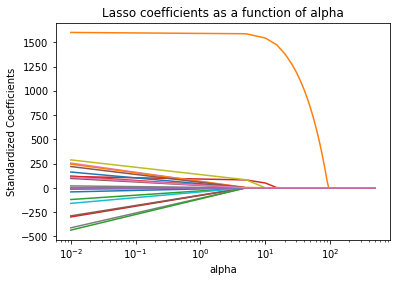

In [175]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [176]:
feature_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [177]:
df0.iloc[:,1:].columns[feature_idx]

Index(['hour of day', 'distance', 'est_dist_x', 'similarity_x',
       'similarity_dijk_x', '1st ranked', '2nd ranked', '3rd ranked',
       'est_dist_y', 'similarity_y', 'similarity_dijk_y', 'motorway',
       'motorway_link', 'primary_link', 'residential', 'road', 'secondary',
       'secondary_link', 'service', 'tertiary', 'track', 'trunk',
       'unclassified', 'others'],
      dtype='object')

In [178]:
df0[df0.iloc[:,1:].columns[feature_idx]]

hour of day  distance  est_dist_x  similarity_x  similarity_dijk_x  \
0               18  0.578883    0.297385      0.810945           0.895604   
1               21  0.048963    0.023418      0.791667           0.863636   
2               19  0.268455    0.142794      0.681159           0.758065   
3               16  0.056803    0.043956      0.406250           0.309524   
4               17  0.076939    0.058963      0.387755           0.452381   
...            ...       ...         ...           ...                ...   
15594           21  0.657683    0.362262      0.771654           0.748092   
15595            1  0.594228    0.320815      0.809160           0.828125   
15596            2  0.593117    0.324704      0.796460           0.841121   
15597           22  0.597302    0.321416      0.794643           0.824074   
15598            6  0.392350    0.184317      0.788732           0.788732   

       1st ranked  2nd ranked  3rd ranked  est_dist_y  similarity_y  ...  \
0        0.587721    0.166915    0.344562    0.297385      0.810945  ...   
1        0.000000    0.150069    0.344562    0.023418      0.791667  ...   
2        0.587721    0.150069    0.690343    0.142794      0.681159  ...   
3        0.085604    0.166915    0.106384    0.043956      0.406250  ...   
4        0.078277    0.150069    0.262812    0.058963      0.387755  ...   
...           ...         ...         ...         ...           ...  ...   
15594    0.587721    0.611138    0.344562    0.362262      0.771654  ...   
15595    0.587721    0.605655    1.000000    0.320815      0.809160  ...   
15596    0.587721    0.611138    0.690343    0.324704      0.796460  ...   
15597    0.587721    0.611138    0.690343    0.321416      0.794643  ...   
15598    0.587721    0.611138    0.574314    0.184317      0.788732  ...   

       residential  road  secondary  secondary_link   service  tertiary  \
0         0.059172   0.0   0.000000             0.0  0.215169  0.000000   
1         0.067061   0.0   0.000000             0.0  0.174423  0.000000   
2         0.025125   0.0   0.000000             0.0  0.071972  0.027701   
3         0.027231   0.0   0.000000             0.0  0.176792  0.000000   
4         0.151940   0.0   0.000000             0.0  0.166388  0.000000   
...            ...   ...        ...             ...       ...       ...   
15594     0.215288   0.0   0.053914             0.0  0.000000  0.067902   
15595     0.041875   0.0   0.040785             0.0  0.025864  0.408181   
15596     0.007326   0.0   0.048025             0.0  0.000000  0.013488   
15597     0.003410   0.0   0.053914             0.0  0.000000  0.013488   
15598     0.000000   0.0   0.033546             0.0  0.000000  0.000000   

       track  trunk  unclassified  others  
0        0.0    0.0      0.000000     0.0  
1        0.0    0.0      0.088106     0.0  
2        0.0    0.0      0.124317     0.0  
3        0.0    0.0      0.186321     0.0  
4        0.0    0.0      0.145012     0.0  
...      ...    ...           ...     ...  
15594    0.0    0.0      0.000000     0.0  
15595    0.0    0.0      0.000000     0.0  
15596    0.0    0.0      0.000000     0.0  
15597    0.0    0.0      0.000000     0.0  
15598    0.0    0.0      0.000000     0.0  

[15599 rows x 24 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

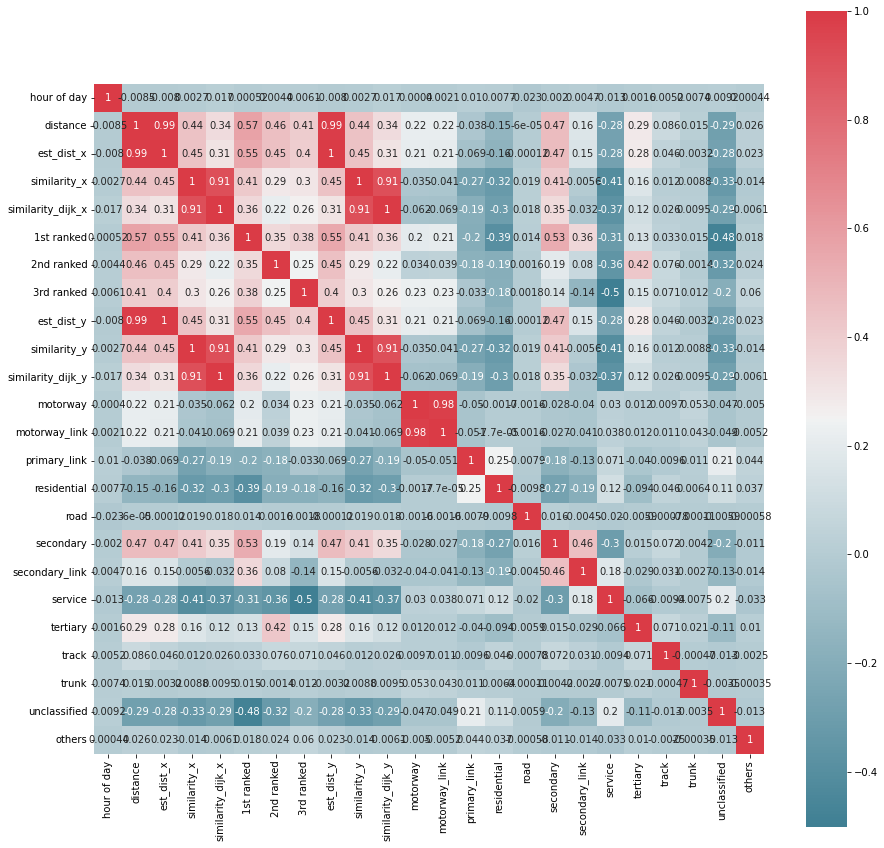

In [179]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(15,15))
# corr = df0[['travel time','distance','motorway','residential','secondary_link','service','track','trunk']].corr()
corr = df0[df0.iloc[:,1:].columns[feature_idx]].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [180]:
x = np.array(df0[df0.iloc[:,1:].columns[feature_idx]])
y = np.array(df0['travel time'])
x

array([[18.        ,  0.57888295,  0.2973851 , ...,  0.        ,
         0.        ,  0.        ],
       [21.        ,  0.04896347,  0.02341767, ...,  0.        ,
         0.08810598,  0.        ],
       [19.        ,  0.26845474,  0.1427945 , ...,  0.        ,
         0.12431659,  0.        ],
       ...,
       [ 2.        ,  0.59311695,  0.32470443, ...,  0.        ,
         0.        ,  0.        ],
       [22.        ,  0.5973016 ,  0.32141647, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  0.3923505 ,  0.18431671, ...,  0.        ,
         0.        ,  0.        ]])

In [181]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [182]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12479, 24)
(3120, 24)


In [183]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
390/390 [==============================] - 1s 900us/step - loss: 1195667.6250 - mape: 91.5395 - rmse: 1093.4658 - val_loss: 945004.3125 - val_mape: 75.5311 - val_rmse: 972.1133
Epoch 2/500
390/390 [==============================] - 0s 776us/step - loss: 701236.3125 - mape: 59.3581 - rmse: 837.3986 - val_loss: 450020.5000 - val_mape: 50.4457 - val_rmse: 670.8357
Epoch 3/500
390/390 [==============================] - 0s 773us/step - loss: 390847.8438 - mape: 55.9388 - rmse: 625.1782 - val_loss: 327270.3438 - val_mape: 58.0545 - val_rmse: 572.0755
Epoch 4/500
390/390 [==============================] - 0s 762us/step - loss: 333492.6562 - mape: 60.8961 - rmse: 577.4882 - val_loss: 301876.1562 - val_mape: 59.0320 - val_rmse: 549.4326
Epoch 5/500
390/390 [==============================] - 0s 742us/step - loss: 304941.4375 - mape: 59.2867 - rmse: 552.2150 - val_loss: 271502.1250 - val_mape: 56.2483 - val_rmse: 521.0587
Epoch 6/500
390/390 [==============================] - 0s 798us

Epoch 88/500
390/390 [==============================] - 0s 760us/step - loss: 124190.2109 - mape: 34.4788 - rmse: 352.4063 - val_loss: 116926.3828 - val_mape: 34.6595 - val_rmse: 341.9450
Epoch 89/500
390/390 [==============================] - 0s 735us/step - loss: 124100.3438 - mape: 34.4052 - rmse: 352.2788 - val_loss: 117343.8281 - val_mape: 35.5488 - val_rmse: 342.5548
Epoch 90/500
390/390 [==============================] - 0s 742us/step - loss: 124136.2422 - mape: 34.5073 - rmse: 352.3297 - val_loss: 117247.2734 - val_mape: 35.4343 - val_rmse: 342.4139
Epoch 91/500
390/390 [==============================] - 0s 764us/step - loss: 124062.1172 - mape: 34.5837 - rmse: 352.2245 - val_loss: 116814.7188 - val_mape: 33.8066 - val_rmse: 341.7817
Epoch 92/500
390/390 [==============================] - 0s 742us/step - loss: 124082.0156 - mape: 34.4889 - rmse: 352.2528 - val_loss: 116801.9688 - val_mape: 33.6614 - val_rmse: 341.7630
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 759us/step - loss: 122863.7500 - mape: 34.2283 - rmse: 350.5193 - val_loss: 116166.4531 - val_mape: 33.8837 - val_rmse: 340.8320
Epoch 175/500
390/390 [==============================] - 0s 765us/step - loss: 122793.2578 - mape: 34.2313 - rmse: 350.4187 - val_loss: 116147.6094 - val_mape: 33.3421 - val_rmse: 340.8044
Epoch 176/500
390/390 [==============================] - 0s 784us/step - loss: 122766.8438 - mape: 34.0990 - rmse: 350.3810 - val_loss: 116421.9609 - val_mape: 34.9305 - val_rmse: 341.2066
Epoch 177/500
390/390 [==============================] - 0s 761us/step - loss: 122789.6562 - mape: 34.1447 - rmse: 350.4135 - val_loss: 116304.5625 - val_mape: 34.7348 - val_rmse: 341.0345
Epoch 178/500
390/390 [==============================] - 0s 731us/step - loss: 122817.4141 - mape: 34.1532 - rmse: 350.4532 - val_loss: 116709.4844 - val_mape: 35.4874 - val_rmse: 341.6277
Epoch 179/500
390/390 [==============================] - 0s 787us/ste

390/390 [==============================] - 0s 710us/step - loss: 121657.2031 - mape: 33.8116 - rmse: 348.7939 - val_loss: 115543.3516 - val_mape: 34.3058 - val_rmse: 339.9167
Epoch 261/500
390/390 [==============================] - 0s 738us/step - loss: 121572.5547 - mape: 33.9536 - rmse: 348.6725 - val_loss: 115517.0234 - val_mape: 32.5731 - val_rmse: 339.8780
Epoch 262/500
390/390 [==============================] - 0s 759us/step - loss: 121553.6250 - mape: 33.7452 - rmse: 348.6454 - val_loss: 115556.3203 - val_mape: 34.3661 - val_rmse: 339.9358
Epoch 263/500
390/390 [==============================] - 0s 724us/step - loss: 121560.7266 - mape: 33.8353 - rmse: 348.6556 - val_loss: 115376.9766 - val_mape: 33.0597 - val_rmse: 339.6719
Epoch 264/500
390/390 [==============================] - 0s 788us/step - loss: 121566.8828 - mape: 33.7987 - rmse: 348.6644 - val_loss: 115529.8594 - val_mape: 34.2588 - val_rmse: 339.8969
Epoch 265/500
390/390 [==============================] - 0s 774us/ste

390/390 [==============================] - 0s 753us/step - loss: 120849.0156 - mape: 33.5248 - rmse: 347.6335 - val_loss: 115170.3984 - val_mape: 34.3822 - val_rmse: 339.3676
Epoch 347/500
390/390 [==============================] - 0s 772us/step - loss: 120852.9688 - mape: 33.6026 - rmse: 347.6391 - val_loss: 114918.0625 - val_mape: 33.4046 - val_rmse: 338.9957
Epoch 348/500
390/390 [==============================] - 0s 785us/step - loss: 120817.4766 - mape: 33.5886 - rmse: 347.5881 - val_loss: 115255.7266 - val_mape: 34.5145 - val_rmse: 339.4933
Epoch 349/500
390/390 [==============================] - 0s 749us/step - loss: 120789.2969 - mape: 33.6263 - rmse: 347.5475 - val_loss: 114893.4141 - val_mape: 33.0515 - val_rmse: 338.9593
Epoch 350/500
390/390 [==============================] - 0s 770us/step - loss: 120760.4688 - mape: 33.4137 - rmse: 347.5061 - val_loss: 115577.8047 - val_mape: 35.0526 - val_rmse: 339.9673
Epoch 351/500
390/390 [==============================] - 0s 761us/ste

390/390 [==============================] - 0s 750us/step - loss: 120416.3906 - mape: 33.4567 - rmse: 347.0107 - val_loss: 114723.7266 - val_mape: 33.3062 - val_rmse: 338.7089
Epoch 433/500
390/390 [==============================] - 0s 761us/step - loss: 120417.6719 - mape: 33.5210 - rmse: 347.0125 - val_loss: 114836.4141 - val_mape: 32.2660 - val_rmse: 338.8752
Epoch 434/500
390/390 [==============================] - 0s 752us/step - loss: 120446.2891 - mape: 33.4696 - rmse: 347.0537 - val_loss: 114800.7188 - val_mape: 32.3866 - val_rmse: 338.8225
Epoch 435/500
390/390 [==============================] - 0s 788us/step - loss: 120461.6094 - mape: 33.4145 - rmse: 347.0758 - val_loss: 114696.9766 - val_mape: 33.2886 - val_rmse: 338.6694
Epoch 436/500
390/390 [==============================] - 0s 773us/step - loss: 120415.9453 - mape: 33.4591 - rmse: 347.0100 - val_loss: 114772.4219 - val_mape: 33.5659 - val_rmse: 338.7808
Epoch 437/500
390/390 [==============================] - 0s 741us/ste

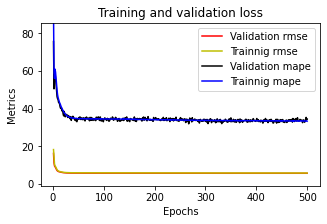

In [184]:
plotme(model8_1_3)

In [185]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
390/390 [==============================] - 1s 902us/step - loss: 1065366.2500 - mape: 82.4377 - rmse: 1032.1658 - val_loss: 639642.6875 - val_mape: 55.1374 - val_rmse: 799.7767
Epoch 2/500
390/390 [==============================] - 0s 785us/step - loss: 445197.2188 - mape: 55.8451 - rmse: 667.2310 - val_loss: 328814.0312 - val_mape: 58.4672 - val_rmse: 573.4231
Epoch 3/500
390/390 [==============================] - 0s 740us/step - loss: 329108.9688 - mape: 61.0734 - rmse: 573.6802 - val_loss: 291684.9688 - val_mape: 58.4030 - val_rmse: 540.0787
Epoch 4/500
390/390 [==============================] - 0s 791us/step - loss: 287265.1250 - mape: 57.8148 - rmse: 535.9712 - val_loss: 247963.2969 - val_mape: 54.2175 - val_rmse: 497.9591
Epoch 5/500
390/390 [==============================] - 0s 747us/step - loss: 240056.3594 - mape: 52.9695 - rmse: 489.9555 - val_loss: 204907.7812 - val_mape: 50.1386 - val_rmse: 452.6674
Epoch 6/500
390/390 [==============================] - 0s 792us

Epoch 88/500
390/390 [==============================] - 0s 739us/step - loss: 123580.1406 - mape: 34.4346 - rmse: 351.5397 - val_loss: 116507.3203 - val_mape: 33.3444 - val_rmse: 341.3317
Epoch 89/500
390/390 [==============================] - 0s 755us/step - loss: 123576.2188 - mape: 34.3882 - rmse: 351.5341 - val_loss: 116463.8125 - val_mape: 34.1767 - val_rmse: 341.2679
Epoch 90/500
390/390 [==============================] - 0s 771us/step - loss: 123496.8281 - mape: 34.3130 - rmse: 351.4211 - val_loss: 116686.7109 - val_mape: 34.9153 - val_rmse: 341.5944
Epoch 91/500
390/390 [==============================] - 0s 741us/step - loss: 123476.3281 - mape: 34.3756 - rmse: 351.3920 - val_loss: 116428.7500 - val_mape: 33.7285 - val_rmse: 341.2166
Epoch 92/500
390/390 [==============================] - 0s 773us/step - loss: 123474.1094 - mape: 34.3546 - rmse: 351.3888 - val_loss: 116534.3516 - val_mape: 34.4677 - val_rmse: 341.3713
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 742us/step - loss: 121536.0391 - mape: 33.8799 - rmse: 348.6202 - val_loss: 115361.1875 - val_mape: 33.8564 - val_rmse: 339.6486
Epoch 175/500
390/390 [==============================] - 0s 723us/step - loss: 121531.7969 - mape: 33.7661 - rmse: 348.6141 - val_loss: 115288.9531 - val_mape: 33.1887 - val_rmse: 339.5423
Epoch 176/500
390/390 [==============================] - 0s 780us/step - loss: 121446.3672 - mape: 33.7477 - rmse: 348.4915 - val_loss: 115299.4453 - val_mape: 33.5348 - val_rmse: 339.5577
Epoch 177/500
390/390 [==============================] - 0s 766us/step - loss: 121408.9922 - mape: 33.7294 - rmse: 348.4379 - val_loss: 115533.3750 - val_mape: 34.4816 - val_rmse: 339.9020
Epoch 178/500
390/390 [==============================] - 0s 777us/step - loss: 121444.9141 - mape: 33.7833 - rmse: 348.4895 - val_loss: 115285.3125 - val_mape: 33.0044 - val_rmse: 339.5369
Epoch 179/500
390/390 [==============================] - 0s 764us/ste

390/390 [==============================] - 0s 763us/step - loss: 120513.1094 - mape: 33.5000 - rmse: 347.1500 - val_loss: 115003.9375 - val_mape: 32.1019 - val_rmse: 339.1223
Epoch 261/500
390/390 [==============================] - 0s 773us/step - loss: 120582.8750 - mape: 33.3673 - rmse: 347.2505 - val_loss: 114821.8281 - val_mape: 33.1838 - val_rmse: 338.8537
Epoch 262/500
390/390 [==============================] - 0s 759us/step - loss: 120478.9531 - mape: 33.4550 - rmse: 347.1008 - val_loss: 114903.6016 - val_mape: 33.4727 - val_rmse: 338.9743
Epoch 263/500
390/390 [==============================] - 0s 784us/step - loss: 120639.1719 - mape: 33.4960 - rmse: 347.3315 - val_loss: 114820.5234 - val_mape: 32.9302 - val_rmse: 338.8518
Epoch 264/500
390/390 [==============================] - 0s 802us/step - loss: 120562.4219 - mape: 33.5561 - rmse: 347.2210 - val_loss: 114864.4922 - val_mape: 32.4717 - val_rmse: 338.9167
Epoch 265/500
390/390 [==============================] - 0s 753us/ste

390/390 [==============================] - 0s 752us/step - loss: 120176.6719 - mape: 33.4151 - rmse: 346.6651 - val_loss: 114910.7656 - val_mape: 33.9283 - val_rmse: 338.9849
Epoch 347/500
390/390 [==============================] - 0s 764us/step - loss: 120241.1953 - mape: 33.4131 - rmse: 346.7581 - val_loss: 114816.0703 - val_mape: 33.4826 - val_rmse: 338.8452
Epoch 348/500
390/390 [==============================] - 0s 754us/step - loss: 120196.5234 - mape: 33.3590 - rmse: 346.6937 - val_loss: 114760.6172 - val_mape: 32.7465 - val_rmse: 338.7634
Epoch 349/500
390/390 [==============================] - 0s 756us/step - loss: 120193.9609 - mape: 33.3796 - rmse: 346.6900 - val_loss: 114782.1094 - val_mape: 32.5261 - val_rmse: 338.7951
Epoch 350/500
390/390 [==============================] - 0s 778us/step - loss: 120183.5391 - mape: 33.3314 - rmse: 346.6750 - val_loss: 114810.2344 - val_mape: 33.4851 - val_rmse: 338.8366
Epoch 351/500
390/390 [==============================] - 0s 784us/ste

390/390 [==============================] - 0s 792us/step - loss: 119966.8828 - mape: 33.3759 - rmse: 346.3624 - val_loss: 114766.4531 - val_mape: 32.8281 - val_rmse: 338.7720
Epoch 433/500
390/390 [==============================] - 0s 724us/step - loss: 119930.2031 - mape: 33.1826 - rmse: 346.3094 - val_loss: 114899.4844 - val_mape: 33.8274 - val_rmse: 338.9683
Epoch 434/500
390/390 [==============================] - 0s 754us/step - loss: 120004.1719 - mape: 33.3608 - rmse: 346.4162 - val_loss: 115170.7109 - val_mape: 31.5846 - val_rmse: 339.3681
Epoch 435/500
390/390 [==============================] - 0s 756us/step - loss: 120024.4453 - mape: 33.2772 - rmse: 346.4454 - val_loss: 114772.9062 - val_mape: 33.1984 - val_rmse: 338.7815
Epoch 436/500
390/390 [==============================] - 0s 747us/step - loss: 120011.7812 - mape: 33.2189 - rmse: 346.4272 - val_loss: 114974.9766 - val_mape: 34.1696 - val_rmse: 339.0796
Epoch 437/500
390/390 [==============================] - 0s 773us/ste

In [186]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
390/390 [==============================] - 1s 962us/step - loss: 625658.8125 - mape: 69.3213 - rmse: 790.9860 - val_loss: 231039.2031 - val_mape: 54.9573 - val_rmse: 480.6654
Epoch 2/500
390/390 [==============================] - 0s 800us/step - loss: 186315.4062 - mape: 49.2335 - rmse: 431.6427 - val_loss: 153392.9375 - val_mape: 43.7458 - val_rmse: 391.6541
Epoch 3/500
390/390 [==============================] - 0s 835us/step - loss: 153606.2656 - mape: 43.5301 - rmse: 391.9264 - val_loss: 138713.2969 - val_mape: 42.4222 - val_rmse: 372.4424
Epoch 4/500
390/390 [==============================] - 0s 800us/step - loss: 140813.9688 - mape: 40.1796 - rmse: 375.2519 - val_loss: 128092.3281 - val_mape: 37.8597 - val_rmse: 357.8999
Epoch 5/500
390/390 [==============================] - 0s 786us/step - loss: 133495.6562 - mape: 37.8102 - rmse: 365.3706 - val_loss: 123002.7188 - val_mape: 36.3326 - val_rmse: 350.7174
Epoch 6/500
390/390 [==============================] - 0s 838us/s

Epoch 45/500
390/390 [==============================] - 0s 814us/step - loss: 123586.0391 - mape: 34.5244 - rmse: 351.5481 - val_loss: 117120.8125 - val_mape: 34.9546 - val_rmse: 342.2292
Epoch 46/500
390/390 [==============================] - 0s 842us/step - loss: 123759.0312 - mape: 34.4380 - rmse: 351.7940 - val_loss: 117445.5469 - val_mape: 35.7090 - val_rmse: 342.7033
Epoch 47/500
390/390 [==============================] - 0s 823us/step - loss: 123595.2266 - mape: 34.4236 - rmse: 351.5611 - val_loss: 116656.2266 - val_mape: 34.1156 - val_rmse: 341.5497
Epoch 48/500
390/390 [==============================] - 0s 817us/step - loss: 123457.0000 - mape: 34.5154 - rmse: 351.3645 - val_loss: 116766.9844 - val_mape: 32.9505 - val_rmse: 341.7119
Epoch 49/500
390/390 [==============================] - 0s 784us/step - loss: 123540.7578 - mape: 34.3632 - rmse: 351.4836 - val_loss: 116701.1875 - val_mape: 34.8034 - val_rmse: 341.6156
Epoch 50/500
390/390 [==============================] - 0s 8

390/390 [==============================] - 0s 804us/step - loss: 120431.3438 - mape: 33.4808 - rmse: 347.0322 - val_loss: 115212.8438 - val_mape: 33.5783 - val_rmse: 339.4302
Epoch 132/500
390/390 [==============================] - 0s 795us/step - loss: 120331.1016 - mape: 33.2866 - rmse: 346.8877 - val_loss: 115968.9297 - val_mape: 35.1763 - val_rmse: 340.5421
Epoch 133/500
390/390 [==============================] - 0s 813us/step - loss: 120498.5234 - mape: 33.4858 - rmse: 347.1290 - val_loss: 115130.3906 - val_mape: 33.3646 - val_rmse: 339.3087
Epoch 134/500
390/390 [==============================] - 0s 820us/step - loss: 120353.0312 - mape: 33.4142 - rmse: 346.9193 - val_loss: 115208.2031 - val_mape: 32.4717 - val_rmse: 339.4233
Epoch 135/500
390/390 [==============================] - 0s 808us/step - loss: 120409.9141 - mape: 33.3685 - rmse: 347.0013 - val_loss: 115568.3594 - val_mape: 34.4646 - val_rmse: 339.9535
Epoch 136/500
390/390 [==============================] - 0s 770us/ste

390/390 [==============================] - 0s 834us/step - loss: 119723.5391 - mape: 33.1508 - rmse: 346.0109 - val_loss: 115091.2734 - val_mape: 33.5021 - val_rmse: 339.2510
Epoch 218/500
390/390 [==============================] - 0s 787us/step - loss: 119900.9531 - mape: 33.3395 - rmse: 346.2672 - val_loss: 115069.7500 - val_mape: 32.5390 - val_rmse: 339.2193
Epoch 219/500
390/390 [==============================] - 0s 786us/step - loss: 119960.3438 - mape: 33.3232 - rmse: 346.3529 - val_loss: 115176.3359 - val_mape: 33.1083 - val_rmse: 339.3764
Epoch 220/500
390/390 [==============================] - 0s 839us/step - loss: 119751.2969 - mape: 33.1927 - rmse: 346.0510 - val_loss: 115045.6484 - val_mape: 33.2473 - val_rmse: 339.1838
Epoch 221/500
390/390 [==============================] - 0s 801us/step - loss: 119862.1406 - mape: 33.2800 - rmse: 346.2111 - val_loss: 115141.0078 - val_mape: 32.7173 - val_rmse: 339.3243
Epoch 222/500
390/390 [==============================] - 0s 822us/ste

390/390 [==============================] - 0s 823us/step - loss: 119192.0859 - mape: 33.1926 - rmse: 345.2421 - val_loss: 116101.3047 - val_mape: 35.3593 - val_rmse: 340.7364
Epoch 304/500
390/390 [==============================] - 0s 789us/step - loss: 119307.4766 - mape: 33.1580 - rmse: 345.4091 - val_loss: 115161.9688 - val_mape: 32.1575 - val_rmse: 339.3552
Epoch 305/500
390/390 [==============================] - 0s 804us/step - loss: 119241.4141 - mape: 33.1141 - rmse: 345.3135 - val_loss: 114994.4297 - val_mape: 32.4654 - val_rmse: 339.1083
Epoch 306/500
390/390 [==============================] - 0s 797us/step - loss: 119176.6953 - mape: 33.0657 - rmse: 345.2198 - val_loss: 114939.3828 - val_mape: 33.6707 - val_rmse: 339.0271
Epoch 307/500
390/390 [==============================] - 0s 814us/step - loss: 119229.8281 - mape: 33.1069 - rmse: 345.2967 - val_loss: 115427.5156 - val_mape: 34.6640 - val_rmse: 339.7462
Epoch 308/500
390/390 [==============================] - 0s 812us/ste

390/390 [==============================] - 0s 811us/step - loss: 118359.6875 - mape: 32.9026 - rmse: 344.0344 - val_loss: 117520.3594 - val_mape: 36.7090 - val_rmse: 342.8124
Epoch 390/500
390/390 [==============================] - 0s 779us/step - loss: 118489.1172 - mape: 33.0242 - rmse: 344.2225 - val_loss: 115511.6172 - val_mape: 34.6630 - val_rmse: 339.8700
Epoch 391/500
390/390 [==============================] - 0s 823us/step - loss: 118471.6172 - mape: 32.9142 - rmse: 344.1971 - val_loss: 115003.6406 - val_mape: 32.7099 - val_rmse: 339.1219
Epoch 392/500
390/390 [==============================] - 0s 781us/step - loss: 118593.6875 - mape: 33.0662 - rmse: 344.3743 - val_loss: 115297.0234 - val_mape: 31.7358 - val_rmse: 339.5542
Epoch 393/500
390/390 [==============================] - 0s 778us/step - loss: 118605.0625 - mape: 32.9562 - rmse: 344.3909 - val_loss: 114993.8047 - val_mape: 32.3090 - val_rmse: 339.1074
Epoch 394/500
390/390 [==============================] - 0s 790us/ste

390/390 [==============================] - 0s 830us/step - loss: 118021.7266 - mape: 32.8475 - rmse: 343.5429 - val_loss: 114977.1172 - val_mape: 33.8005 - val_rmse: 339.0828
Epoch 476/500
390/390 [==============================] - 0s 805us/step - loss: 117955.2266 - mape: 33.0352 - rmse: 343.4461 - val_loss: 116255.6094 - val_mape: 35.6077 - val_rmse: 340.9628
Epoch 477/500
390/390 [==============================] - 0s 764us/step - loss: 118217.4453 - mape: 33.0065 - rmse: 343.8276 - val_loss: 115090.5234 - val_mape: 33.6370 - val_rmse: 339.2499
Epoch 478/500
390/390 [==============================] - 0s 781us/step - loss: 118135.2031 - mape: 32.9091 - rmse: 343.7080 - val_loss: 117105.8594 - val_mape: 36.6386 - val_rmse: 342.2073
Epoch 479/500
390/390 [==============================] - 0s 804us/step - loss: 118007.6094 - mape: 32.7219 - rmse: 343.5224 - val_loss: 115369.2891 - val_mape: 34.7966 - val_rmse: 339.6606
Epoch 480/500
390/390 [==============================] - 0s 806us/ste

In [188]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
390/390 [==============================] - 1s 1ms/step - loss: 481989.8750 - mape: 62.9763 - rmse: 694.2549 - val_loss: 161133.0625 - val_mape: 47.0187 - val_rmse: 401.4138
Epoch 2/500
390/390 [==============================] - 0s 950us/step - loss: 154164.9844 - mape: 43.6498 - rmse: 392.6385 - val_loss: 134702.2969 - val_mape: 41.0764 - val_rmse: 367.0181
Epoch 3/500
390/390 [==============================] - 0s 1ms/step - loss: 136099.0938 - mape: 38.7030 - rmse: 368.9161 - val_loss: 124166.6797 - val_mape: 38.6080 - val_rmse: 352.3729
Epoch 4/500
390/390 [==============================] - 0s 980us/step - loss: 129059.6641 - mape: 36.2342 - rmse: 359.2487 - val_loss: 119803.3750 - val_mape: 35.5518 - val_rmse: 346.1263
Epoch 5/500
390/390 [==============================] - 0s 1ms/step - loss: 127221.6406 - mape: 35.3515 - rmse: 356.6814 - val_loss: 119798.0078 - val_mape: 32.2136 - val_rmse: 346.1185
Epoch 6/500
390/390 [==============================] - 0s 937us/step - 

Epoch 45/500
390/390 [==============================] - 0s 969us/step - loss: 123214.4609 - mape: 34.3745 - rmse: 351.0192 - val_loss: 117320.3516 - val_mape: 36.3789 - val_rmse: 342.5206
Epoch 46/500
390/390 [==============================] - 0s 999us/step - loss: 123076.9688 - mape: 34.2501 - rmse: 350.8233 - val_loss: 115939.2500 - val_mape: 33.7806 - val_rmse: 340.4985
Epoch 47/500
390/390 [==============================] - 0s 991us/step - loss: 122978.5234 - mape: 34.1947 - rmse: 350.6830 - val_loss: 115938.7500 - val_mape: 34.2991 - val_rmse: 340.4978
Epoch 48/500
390/390 [==============================] - 0s 964us/step - loss: 123211.2578 - mape: 34.4424 - rmse: 351.0146 - val_loss: 116458.1094 - val_mape: 31.8158 - val_rmse: 341.2596
Epoch 49/500
390/390 [==============================] - 0s 982us/step - loss: 122905.5391 - mape: 34.1169 - rmse: 350.5789 - val_loss: 115934.9062 - val_mape: 33.9894 - val_rmse: 340.4922
Epoch 50/500
390/390 [==============================] - 0s 9

Epoch 89/500
390/390 [==============================] - 0s 963us/step - loss: 120846.1719 - mape: 33.5766 - rmse: 347.6294 - val_loss: 115926.5156 - val_mape: 35.7009 - val_rmse: 340.4798
Epoch 90/500
390/390 [==============================] - 0s 964us/step - loss: 121108.1328 - mape: 33.7395 - rmse: 348.0060 - val_loss: 114917.8125 - val_mape: 34.2251 - val_rmse: 338.9953
Epoch 91/500
390/390 [==============================] - 0s 975us/step - loss: 121014.0234 - mape: 33.5132 - rmse: 347.8707 - val_loss: 115460.9531 - val_mape: 34.7303 - val_rmse: 339.7955
Epoch 92/500
390/390 [==============================] - 0s 982us/step - loss: 120869.8203 - mape: 33.4498 - rmse: 347.6634 - val_loss: 117381.4375 - val_mape: 36.3811 - val_rmse: 342.6097
Epoch 93/500
390/390 [==============================] - 0s 971us/step - loss: 121021.3984 - mape: 33.5424 - rmse: 347.8813 - val_loss: 114620.9062 - val_mape: 32.5872 - val_rmse: 338.5571
Epoch 94/500
390/390 [==============================] - 0s 9

390/390 [==============================] - 0s 990us/step - loss: 119445.5469 - mape: 33.0611 - rmse: 345.6089 - val_loss: 115178.1953 - val_mape: 35.6251 - val_rmse: 339.3791
Epoch 176/500
390/390 [==============================] - 0s 971us/step - loss: 119039.0078 - mape: 33.2413 - rmse: 345.0203 - val_loss: 114738.1406 - val_mape: 33.9761 - val_rmse: 338.7302
Epoch 177/500
390/390 [==============================] - 0s 962us/step - loss: 119131.3516 - mape: 33.0135 - rmse: 345.1541 - val_loss: 114234.0078 - val_mape: 33.2743 - val_rmse: 337.9852
Epoch 178/500
390/390 [==============================] - 0s 994us/step - loss: 118881.7500 - mape: 33.0388 - rmse: 344.7923 - val_loss: 114407.5469 - val_mape: 32.8977 - val_rmse: 338.2419
Epoch 179/500
390/390 [==============================] - 0s 1ms/step - loss: 119098.9062 - mape: 33.0932 - rmse: 345.1071 - val_loss: 114726.6250 - val_mape: 33.4382 - val_rmse: 338.7132
Epoch 180/500
390/390 [==============================] - 0s 967us/step 

390/390 [==============================] - 0s 962us/step - loss: 117504.5547 - mape: 32.8044 - rmse: 342.7894 - val_loss: 114426.6250 - val_mape: 33.6331 - val_rmse: 338.2701
Epoch 262/500
390/390 [==============================] - 0s 1ms/step - loss: 117477.0625 - mape: 32.5973 - rmse: 342.7493 - val_loss: 114725.4141 - val_mape: 31.8227 - val_rmse: 338.7114
Epoch 263/500
390/390 [==============================] - 0s 1ms/step - loss: 117809.0703 - mape: 32.9317 - rmse: 343.2332 - val_loss: 114558.1328 - val_mape: 33.8743 - val_rmse: 338.4644
Epoch 264/500
390/390 [==============================] - 0s 966us/step - loss: 117281.5547 - mape: 32.6809 - rmse: 342.4640 - val_loss: 114373.8594 - val_mape: 33.4682 - val_rmse: 338.1920
Epoch 265/500
390/390 [==============================] - 0s 975us/step - loss: 117340.7422 - mape: 32.7564 - rmse: 342.5504 - val_loss: 114737.3125 - val_mape: 33.2054 - val_rmse: 338.7290
Epoch 266/500
390/390 [==============================] - 0s 986us/step - 

390/390 [==============================] - 0s 979us/step - loss: 116125.2969 - mape: 32.5464 - rmse: 340.7716 - val_loss: 116174.4141 - val_mape: 33.4998 - val_rmse: 340.8437
Epoch 348/500
390/390 [==============================] - 0s 973us/step - loss: 116168.6641 - mape: 32.4019 - rmse: 340.8352 - val_loss: 114751.2188 - val_mape: 32.9679 - val_rmse: 338.7495
Epoch 349/500
390/390 [==============================] - 0s 973us/step - loss: 115839.6484 - mape: 32.5709 - rmse: 340.3522 - val_loss: 115188.3672 - val_mape: 32.0959 - val_rmse: 339.3941
Epoch 350/500
390/390 [==============================] - 0s 950us/step - loss: 116046.2656 - mape: 32.5171 - rmse: 340.6556 - val_loss: 114982.4141 - val_mape: 31.9203 - val_rmse: 339.0906
Epoch 351/500
390/390 [==============================] - 0s 978us/step - loss: 115960.4297 - mape: 32.5730 - rmse: 340.5296 - val_loss: 114542.3203 - val_mape: 32.7771 - val_rmse: 338.4410
Epoch 352/500
390/390 [==============================] - 0s 983us/ste

390/390 [==============================] - 0s 964us/step - loss: 114788.6641 - mape: 32.3866 - rmse: 338.8047 - val_loss: 115126.3516 - val_mape: 32.3384 - val_rmse: 339.3027
Epoch 434/500
390/390 [==============================] - 0s 998us/step - loss: 114544.3281 - mape: 32.2913 - rmse: 338.4440 - val_loss: 115509.9062 - val_mape: 34.0721 - val_rmse: 339.8675
Epoch 435/500
390/390 [==============================] - 0s 968us/step - loss: 114404.5078 - mape: 32.2716 - rmse: 338.2374 - val_loss: 114570.9062 - val_mape: 32.0200 - val_rmse: 338.4832
Epoch 436/500
390/390 [==============================] - 0s 987us/step - loss: 114471.1094 - mape: 32.2647 - rmse: 338.3358 - val_loss: 114546.1875 - val_mape: 32.1743 - val_rmse: 338.4467
Epoch 437/500
390/390 [==============================] - 0s 991us/step - loss: 114517.1953 - mape: 32.2267 - rmse: 338.4039 - val_loss: 116055.1797 - val_mape: 35.7810 - val_rmse: 340.6687
Epoch 438/500
390/390 [==============================] - 0s 979us/ste

In [190]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
390/390 [==============================] - 0s 874us/step - loss: 1280932.8750 - mape: 97.6639 - rmse: 1131.7831 - val_loss: 1183956.2500 - val_mape: 93.3280 - val_rmse: 1088.0975
Epoch 2/500
390/390 [==============================] - 0s 769us/step - loss: 1123179.5000 - mape: 86.4999 - rmse: 1059.8016 - val_loss: 984283.2500 - val_mape: 78.5319 - val_rmse: 992.1105
Epoch 3/500
390/390 [==============================] - 0s 720us/step - loss: 900584.0625 - mape: 70.2625 - rmse: 948.9911 - val_loss: 752245.4375 - val_mape: 61.3403 - val_rmse: 867.3209
Epoch 4/500
390/390 [==============================] - 0s 750us/step - loss: 678693.3750 - mape: 57.2522 - rmse: 823.8285 - val_loss: 553135.7500 - val_mape: 51.8695 - val_rmse: 743.7310
Epoch 5/500
390/390 [==============================] - 0s 760us/step - loss: 509072.0000 - mape: 52.6015 - rmse: 713.4928 - val_loss: 421413.2500 - val_mape: 50.8709 - val_rmse: 649.1635
Epoch 6/500
390/390 [==============================] - 0s 7

Epoch 88/500
390/390 [==============================] - 0s 768us/step - loss: 125548.1719 - mape: 34.8314 - rmse: 354.3278 - val_loss: 117955.9766 - val_mape: 35.1898 - val_rmse: 343.4472
Epoch 89/500
390/390 [==============================] - 0s 741us/step - loss: 125517.6953 - mape: 34.9166 - rmse: 354.2848 - val_loss: 117760.6250 - val_mape: 33.9486 - val_rmse: 343.1627
Epoch 90/500
390/390 [==============================] - 0s 789us/step - loss: 125473.1641 - mape: 34.7851 - rmse: 354.2219 - val_loss: 117709.7109 - val_mape: 34.1927 - val_rmse: 343.0885
Epoch 91/500
390/390 [==============================] - 0s 757us/step - loss: 125427.4766 - mape: 34.6300 - rmse: 354.1574 - val_loss: 117704.7422 - val_mape: 34.6427 - val_rmse: 343.0812
Epoch 92/500
390/390 [==============================] - 0s 757us/step - loss: 125416.4297 - mape: 34.7695 - rmse: 354.1418 - val_loss: 117706.2656 - val_mape: 34.7791 - val_rmse: 343.0835
Epoch 93/500
390/390 [==============================] - 0s 7

390/390 [==============================] - 0s 714us/step - loss: 124448.6406 - mape: 34.6377 - rmse: 352.7728 - val_loss: 116832.5469 - val_mape: 34.0226 - val_rmse: 341.8078
Epoch 175/500
390/390 [==============================] - 0s 730us/step - loss: 124483.2500 - mape: 34.5055 - rmse: 352.8218 - val_loss: 116842.3906 - val_mape: 34.2455 - val_rmse: 341.8222
Epoch 176/500
390/390 [==============================] - 0s 744us/step - loss: 124446.4609 - mape: 34.4898 - rmse: 352.7697 - val_loss: 116905.2031 - val_mape: 34.6318 - val_rmse: 341.9140
Epoch 177/500
390/390 [==============================] - 0s 770us/step - loss: 124419.1797 - mape: 34.5781 - rmse: 352.7310 - val_loss: 116901.1406 - val_mape: 34.6125 - val_rmse: 341.9081
Epoch 178/500
390/390 [==============================] - 0s 715us/step - loss: 124428.4453 - mape: 34.6637 - rmse: 352.7442 - val_loss: 116836.1016 - val_mape: 34.2566 - val_rmse: 341.8130
Epoch 179/500
390/390 [==============================] - 0s 716us/ste

390/390 [==============================] - 0s 728us/step - loss: 124081.9844 - mape: 34.5453 - rmse: 352.2527 - val_loss: 116904.8281 - val_mape: 35.0897 - val_rmse: 341.9135
Epoch 261/500
390/390 [==============================] - 0s 758us/step - loss: 124067.4375 - mape: 34.6185 - rmse: 352.2321 - val_loss: 116709.9297 - val_mape: 34.4375 - val_rmse: 341.6284
Epoch 262/500
390/390 [==============================] - 0s 715us/step - loss: 124089.3047 - mape: 34.6854 - rmse: 352.2631 - val_loss: 116675.6797 - val_mape: 33.9907 - val_rmse: 341.5782
Epoch 263/500
390/390 [==============================] - 0s 734us/step - loss: 124079.4844 - mape: 34.4678 - rmse: 352.2492 - val_loss: 116854.5312 - val_mape: 34.9759 - val_rmse: 341.8399
Epoch 264/500
390/390 [==============================] - 0s 749us/step - loss: 124035.2031 - mape: 34.6752 - rmse: 352.1863 - val_loss: 116677.6484 - val_mape: 34.1891 - val_rmse: 341.5811
Epoch 265/500
390/390 [==============================] - 0s 724us/ste

390/390 [==============================] - 0s 733us/step - loss: 123561.8047 - mape: 34.4962 - rmse: 351.5136 - val_loss: 116930.9297 - val_mape: 35.2543 - val_rmse: 341.9517
Epoch 347/500
390/390 [==============================] - 0s 690us/step - loss: 123548.3125 - mape: 34.6201 - rmse: 351.4944 - val_loss: 116603.2109 - val_mape: 34.2816 - val_rmse: 341.4721
Epoch 348/500
390/390 [==============================] - 0s 719us/step - loss: 123527.0547 - mape: 34.4735 - rmse: 351.4642 - val_loss: 116616.3047 - val_mape: 34.3462 - val_rmse: 341.4913
Epoch 349/500
390/390 [==============================] - 0s 676us/step - loss: 123502.7812 - mape: 34.4933 - rmse: 351.4296 - val_loss: 116606.3906 - val_mape: 34.2900 - val_rmse: 341.4768
Epoch 350/500
390/390 [==============================] - 0s 702us/step - loss: 123501.2188 - mape: 34.5302 - rmse: 351.4274 - val_loss: 116616.1250 - val_mape: 34.3433 - val_rmse: 341.4910
Epoch 351/500
390/390 [==============================] - 0s 747us/ste

390/390 [==============================] - 0s 728us/step - loss: 123221.4141 - mape: 34.5027 - rmse: 351.0291 - val_loss: 116449.1484 - val_mape: 34.1892 - val_rmse: 341.2465
Epoch 433/500
390/390 [==============================] - 0s 729us/step - loss: 123226.2969 - mape: 34.4365 - rmse: 351.0360 - val_loss: 116537.6094 - val_mape: 34.6544 - val_rmse: 341.3760
Epoch 434/500
390/390 [==============================] - 0s 714us/step - loss: 123241.8750 - mape: 34.5066 - rmse: 351.0582 - val_loss: 116487.3516 - val_mape: 34.4909 - val_rmse: 341.3024
Epoch 435/500
390/390 [==============================] - 0s 765us/step - loss: 123204.2734 - mape: 34.5125 - rmse: 351.0047 - val_loss: 116467.5859 - val_mape: 34.3622 - val_rmse: 341.2735
Epoch 436/500
390/390 [==============================] - 0s 722us/step - loss: 123224.4141 - mape: 34.5335 - rmse: 351.0334 - val_loss: 116433.3828 - val_mape: 34.0123 - val_rmse: 341.2234
Epoch 437/500
390/390 [==============================] - 0s 758us/ste